#**Morphometric and Morphological Sex Identification of *Tegillarca granosa (T. granosa)* Blood Cockles**

## CNN Design

## **References**


*   code: https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

*   website: https://www.analyticsvidhya.com/blog/2021/06/mnist-dataset-prediction-using-keras/



In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Displaying samples in different angles

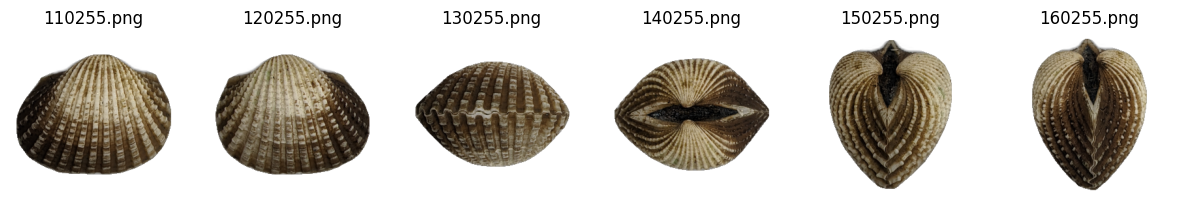

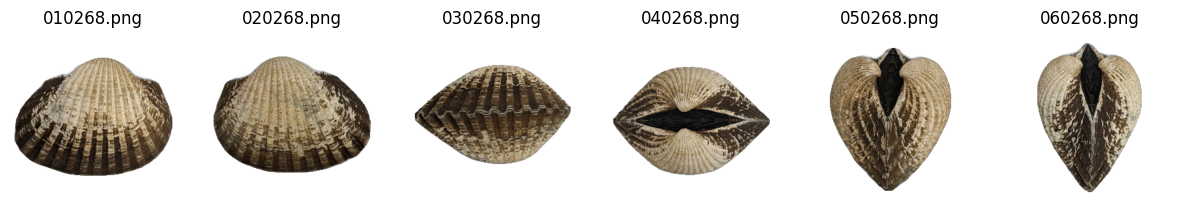

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths to the male and female datasets
male_litob = "/content/drive/My Drive/SP 2024/sample/Male-Removed-Shadows"
female_litob = "/content/drive/My Drive/SP 2024/sample/Female-Removed-Shadows"

# Specify the filenames for male and female images
male_filenames = ['110255.png', '120255.png', '130255.png', '140255.png', '150255.png', '160255.png']
female_filenames = ['010268.png', '020268.png', '030268.png', '040268.png', '050268.png', '060268.png']

# Display male images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(male_filenames):
    img_path = os.path.join(male_litob, filename)
    img = mpimg.imread(img_path)
    plt.subplot(1, len(male_filenames), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(filename)  # Display filename as title
    plt.axis('off')

plt.show()

# Display female images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(female_filenames):
    img_path = os.path.join(female_litob, filename)
    img = mpimg.imread(img_path)
    plt.subplot(1, len(female_filenames), i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(filename)  # Display filename as title
    plt.axis('off')

plt.show()

## Dsiplaying the Left Lateral angle

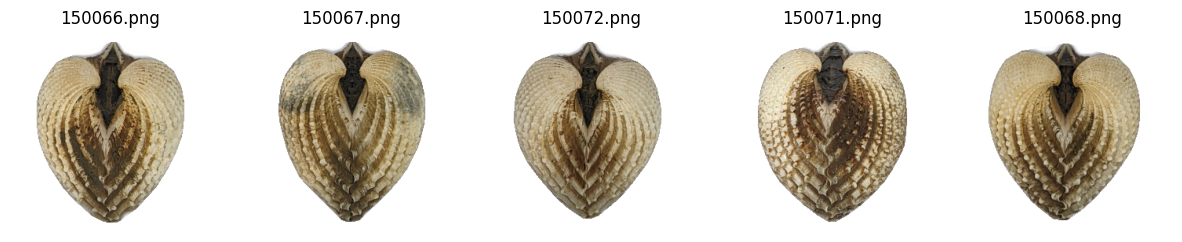

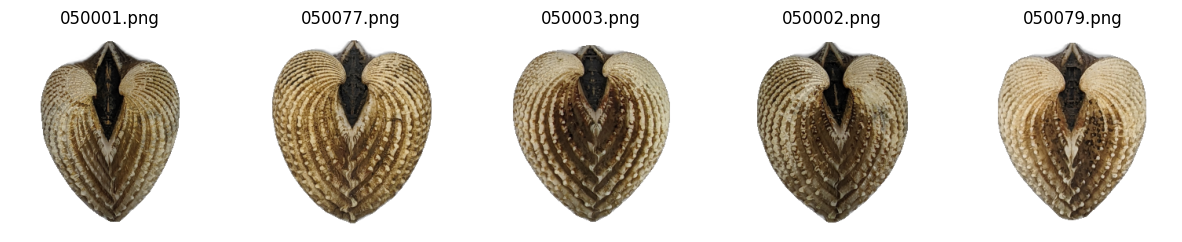

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths to the male and female datasets
male_litob = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Male"
female_litob = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/Female"

# Get list of image files in male folder
image_files_male = [f for f in os.listdir(male_litob)
                    if os.path.isfile(os.path.join(male_litob, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display first 5 images from male dataset
num_images_to_show = min(5, len(image_files_male))

plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    img_path = os.path.join(male_litob, image_files_male[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(image_files_male[i])
    plt.axis('off')

plt.show()

# Get list of image files in female folder
image_files_female = [f for f in os.listdir(female_litob)
                      if os.path.isfile(os.path.join(female_litob, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# Display first 5 images from female dataset
plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    img_path = os.path.join(female_litob, image_files_female[i])
    img = mpimg.imread(img_path)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(image_files_female[i])
    plt.axis('off')

plt.show()

## Performed Random Undersampling

In [ ]:
# Imports
import random
import os
import shutil

# Define paths
male_folder = '/content/drive/My Drive/SP 2024/Angles/Colored/Right_Lateral_Colored/Male'
female_folder = '/content/drive/My Drive/SP 2024/Angles/Colored/Right_Lateral_Colored/Female'
output_dir = '/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Right_Lateral_Colored/Balanced_Dataset'

# Random seed for reproducibility
random.seed(42)

def random_undersample_and_save(male_folder, female_folder, output_dir, undersample_size):

    # Output directory creation if it doensn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    balanced_male_dir = os.path.join(output_dir, 'Male')
    balanced_female_dir = os.path.join(output_dir, 'Female')

    os.makedirs(balanced_male_dir, exist_ok=True)
    os.makedirs(balanced_female_dir, exist_ok=True)

    # Get male and female filenames
    male_samples = sorted(os.listdir(male_folder))
    female_samples = sorted(os.listdir(female_folder))

    # Randomly sample 127 male samples to match female sample size
    male_samples_to_keep = random.sample(male_samples, undersample_size)

    # Copy the selected male samples to the balanced male directory
    for file in male_samples_to_keep:
        shutil.copy(os.path.join(male_folder, file), os.path.join(balanced_male_dir, file))

    # Copy all female samples to the balanced female directory (since it's already balanced)
    for file in female_samples:
        shutil.copy(os.path.join(female_folder, file), os.path.join(balanced_female_dir, file))

    print(f"Balanced dataset saved to {output_dir} with {undersample_size} male and {len(female_samples)} female samples.")


# Call Random Sampling Functions
random_undersample_and_save(male_folder, female_folder, output_dir, undersample_size=127)

Balanced dataset saved to /content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Right_Lateral_Colored/Balanced_Dataset with 127 male and 127 female samples.


## Visualizing the Data Augmentation

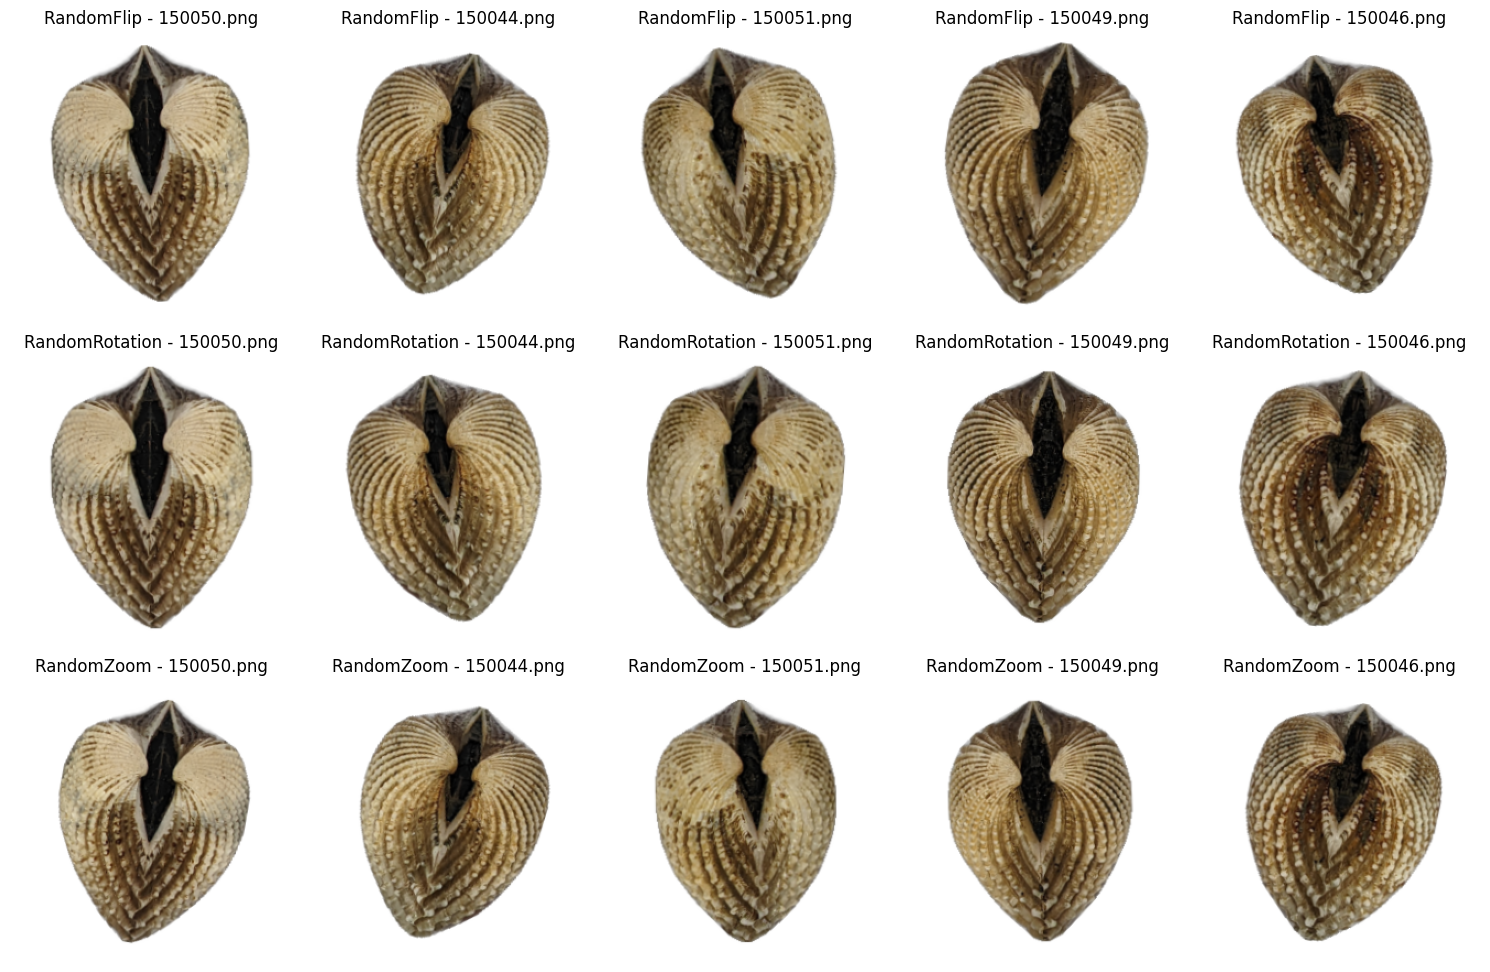

In [ ]:
# Imports

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras import layers

image_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/Left_Lateral_Colored/"
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.05),
])

# Get all image file paths recursively in the image dir
image_files = []
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            image_files.append(os.path.join(root, file))


num_images_to_show = 5
plt.figure(figsize=(15, 10))

for i in range(min(num_images_to_show, len(image_files))):
    img_path = image_files[i]
    img = mpimg.imread(img_path)
    img = tf.expand_dims(img, axis=0)

    # Apply augmentations and display
    augmented_img_flip = data_augmentation(img, training=True).numpy()[0]
    plt.subplot(3, num_images_to_show, i + 1)
    plt.imshow(augmented_img_flip)
    plt.title(f"RandomFlip - {os.path.basename(image_files[i])}")
    plt.axis("off")

    augmented_img_rotation = data_augmentation(img, training=True).numpy()[0]
    plt.subplot(3, num_images_to_show, i + 1 + num_images_to_show)
    plt.imshow(augmented_img_rotation)
    plt.title(f"RandomRotation - {os.path.basename(image_files[i])}")
    plt.axis("off")

    augmented_img_zoom = data_augmentation(img, training=True).numpy()[0]
    plt.subplot(3, num_images_to_show, i + 1 + 2 * num_images_to_show)
    plt.imshow(augmented_img_zoom)
    plt.title(f"RandomZoom - {os.path.basename(image_files[i])}")
    plt.axis("off")

# Display
plt.tight_layout()
plt.show()

## --------------Convolutional Neural Network (CNN) --------------------

## Final adapted result : batch size = 32, epoch = 50

In [ ]:
# CNN with batch size of 32 and epoch = 50

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_30.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=32,
    no_epochs=50,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.4660 - auc: 0.4935 - loss: 1.1605 - precision: 0.3989 - recall: 0.2939
Epoch 1: val_loss improved from inf to 0.70058, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 602ms/step - accuracy: 0.4663 - auc: 0.4941 - loss: 1.1604 - precision: 0.4052 - recall: 0.2955 - val_accuracy: 0.5098 - val_auc: 0.5731 - val_loss: 0.7006 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.4716 - auc: 0.5383 - loss: 0.6995 - precision: 0.4700 - recall: 0.8763
Epoch 2: val_loss improved from 0.70058 to 0.69102, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 613ms/step - accuracy: 0.4705 - auc: 0.5305 - loss: 0.6996 - precision: 0.4701 - recall: 0.8460 - val_accuracy: 0.5294 - val_auc: 0.6608 - val_loss: 0.6910 - val_precision: 0.6667 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5286 - auc: 0.5279 - loss: 0.6922 - precision: 0.5603 - recall: 0.7060
Epoch 3: val_loss did not improve from 0.69102
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.5272 - auc: 0.5262 - loss: 0.6922 - precision: 0.5543 - recall: 0.6970 - val_accuracy: 0.4902 - val_auc: 0.6523 - val_loss: 0.6979 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.4838 - auc: 0.5638 - loss: 0.6925 - precision: 0.4237 - recall: 0.3044
Epoch 4: val_loss improved from 0.69102 to 0.68910, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 665ms/step - accuracy: 0.4849 - auc: 0.5583 - loss: 0.6925 - precision: 0.4320 - recall: 0.3245 - val_accuracy: 0.5098 - val_auc: 0.6092 - val_loss: 0.6891 - val_precision: 0.5714 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5524 - auc: 0.6368 - loss: 0.6858 - precision: 0.6400 - recall: 0.4717
Epoch 5: val_loss improved from 0.68910 to 0.68552, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.5530 - auc: 0.6295 - loss: 0.6860 - precision: 0.6295 - recall: 0.4808 - val_accuracy: 0.5098 - val_auc: 0.6362 - val_loss: 0.6855 - val_precision: 0.6000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.6129 - auc: 0.6280 - loss: 0.6736 - precision: 0.8576 - recall: 0.2216
Epoch 6: val_loss improved from 0.68552 to 0.67693, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.6071 - auc: 0.6268 - loss: 0.6743 - precision: 0.8410 - recall: 0.2199 - val_accuracy: 0.5686 - val_auc: 0.6854 - val_loss: 0.6769 - val_precision: 0.5417 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.5929 - auc: 0.6604 - loss: 0.6597 - precision: 0.5847 - recall: 0.8472
Epoch 7: val_loss did not improve from 0.67693
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 666ms/step - accuracy: 0.5902 - auc: 0.6559 - loss: 0.6609 - precision: 0.5814 - recall: 0.8242 - val_accuracy: 0.4902 - val_auc: 0.6323 - val_loss: 0.7461 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.5484 - auc: 0.6490 - loss: 0.6662 - precision: 0.4585 - recall: 0.3694
Epoch 8: val_loss improved from 0.67693 to 0.66658, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step - accuracy: 0.5513 - auc: 0.6453 - loss: 0.6669 - precision: 0.4728 - recall: 0.3913 - val_accuracy: 0.5686 - val_auc: 0.6846 - val_loss: 0.6666 - val_precision: 0.6429 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.6818 - auc: 0.7341 - loss: 0.6532 - precision: 0.6474 - recall: 0.8695
Epoch 9: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.6797 - auc: 0.7304 - loss: 0.6531 - precision: 0.6452 - recall: 0.8599 - val_accuracy: 0.4902 - val_auc: 0.6415 - val_loss: 1.0331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.6526 - auc: 0.7008 - loss: 0.6449 - precision: 0.7001 - recall: 0.4297
Epoch 10: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 656ms/step - accuracy: 0.6535 - auc: 0.7023 - loss: 0.6426 - precision: 0.6964 - recall: 0.4

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - accuracy: 0.6031 - auc: 0.6709 - loss: 0.6436 - precision: 0.5533 - recall: 0.4611 - val_accuracy: 0.7647 - val_auc: 0.7123 - val_loss: 0.6358 - val_precision: 0.7188 - val_recall: 0.8846 - learning_rate: 0.0010
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 553ms/step - accuracy: 0.6774 - auc: 0.7362 - loss: 0.6250 - precision: 0.6562 - recall: 0.7838
Epoch 12: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 619ms/step - accuracy: 0.6789 - auc: 0.7389 - loss: 0.6232 - precision: 0.6620 - recall: 0.7675 - val_accuracy: 0.4706 - val_auc: 0.6738 - val_loss: 0.7714 - val_precision: 0.4286 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.5817 - auc: 0.6735 - loss: 0.6327 - precision: 0.6099 - recall: 0.5171
Epoch 13: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.5853 - auc: 0.6750 - loss: 0.6327 - precision: 0.6121 - recall: 0.5193 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - accuracy: 0.7049 - auc: 0.8033 - loss: 0.5740 - precision: 0.7204 - recall: 0.6339 - val_accuracy: 0.6275 - val_auc: 0.7223 - val_loss: 0.6321 - val_precision: 0.6522 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.7368 - auc: 0.8209 - loss: 0.5380 - precision: 0.7048 - recall: 0.7887
Epoch 15: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 717ms/step - accuracy: 0.7333 - auc: 0.8173 - loss: 0.5400 - precision: 0.7055 - recall: 0.7780 - val_accuracy: 0.5882 - val_auc: 0.7377 - val_loss: 0.6349 - val_precision: 0.6316 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.6927 - auc: 0.7758 - loss: 0.5742 - precision: 0.6647 - recall: 0.7899
Epoch 16: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.6923 - auc: 0.7750 - loss: 0.5734 - precision: 0.6670 - recall: 0.7791 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 582ms/step - accuracy: 0.7481 - auc: 0.7998 - loss: 0.5510 - precision: 0.7454 - recall: 0.7092 - val_accuracy: 0.7647 - val_auc: 0.7315 - val_loss: 0.5975 - val_precision: 0.7059 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.5703 - auc: 0.6799 - loss: 0.6859 - precision: 0.5337 - recall: 0.8512
Epoch 18: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 690ms/step - accuracy: 0.5747 - auc: 0.6810 - loss: 0.6799 - precision: 0.5399 - recall: 0.8351 - val_accuracy: 0.5294 - val_auc: 0.7285 - val_loss: 0.6682 - val_precision: 0.5625 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.7832 - auc: 0.8528 - loss: 0.5008 - precision: 0.8301 - recall: 0.6717
Epoch 19: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.7789 - auc: 0.8489 - loss: 0.5039 - precision: 0.8244 - recall: 0.6731 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 633ms/step - accuracy: 0.5456 - auc: 0.5173 - loss: 1.9037 - precision: 0.4921 - recall: 0.5383
Epoch 1: val_loss improved from inf to 0.69600, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 734ms/step - accuracy: 0.5433 - auc: 0.5157 - loss: 1.8778 - precision: 0.4956 - recall: 0.5515 - val_accuracy: 0.4902 - val_auc: 0.6592 - val_loss: 0.6960 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4955 - auc: 0.5006 - loss: 0.7023 - precision: 0.4604 - recall: 0.3277
Epoch 2: val_loss improved from 0.69600 to 0.69230, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 593ms/step - accuracy: 0.4957 - auc: 0.5011 - loss: 0.7017 - precision: 0.4647 - recall: 0.3412 - val_accuracy: 0.5686 - val_auc: 0.5462 - val_loss: 0.6923 - val_precision: 0.5556 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.4828 - auc: 0.5138 - loss: 0.6936 - precision: 0.4892 - recall: 0.2213
Epoch 3: val_loss did not improve from 0.69230
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 550ms/step - accuracy: 0.4846 - auc: 0.5161 - loss: 0.6935 - precision: 0.4882 - recall: 0.2098 - val_accuracy: 0.4902 - val_auc: 0.6200 - val_loss: 0.6973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.5700 - auc: 0.5210 - loss: 0.6853 - precision: 0.2262 - recall: 0.0114
Epoch 4: val_loss improved from 0.69230 to 0.69067, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 682ms/step - accuracy: 0.5628 - auc: 0.5221 - loss: 0.6866 - precision: 0.2708 - recall: 0.0186 - val_accuracy: 0.5098 - val_auc: 0.6446 - val_loss: 0.6907 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5344 - auc: 0.4818 - loss: 0.6948 - precision: 0.5326 - recall: 0.9786
Epoch 5: val_loss did not improve from 0.69067
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.5292 - auc: 0.4877 - loss: 0.6950 - precision: 0.5279 - recall: 0.9776 - val_accuracy: 0.5098 - val_auc: 0.5908 - val_loss: 0.6919 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 566ms/step - accuracy: 0.5714 - auc: 0.5509 - loss: 0.6924 - precision: 0.6177 - recall: 0.4594
Epoch 6: val_loss improved from 0.69067 to 0.69050, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 686ms/step - accuracy: 0.5696 - auc: 0.5539 - loss: 0.6923 - precision: 0.6206 - recall: 0.4329 - val_accuracy: 0.4902 - val_auc: 0.6362 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.4970 - auc: 0.6621 - loss: 0.6842 - precision: 0.1667 - recall: 0.0043
Epoch 7: val_loss did not improve from 0.69050
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.4983 - auc: 0.6595 - loss: 0.6839 - precision: 0.2292 - recall: 0.0063 - val_accuracy: 0.4902 - val_auc: 0.6977 - val_loss: 0.6990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5783 - auc: 0.6129 - loss: 0.6775 - precision: 0.6576 - recall: 0.4300
Epoch 8: val_loss did not improve from 0.69050
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 543ms/step - accuracy: 0.5768 - auc: 0.6088 - loss: 0.6784 - precision: 0.6455 - recal

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 635ms/step - accuracy: 0.5831 - auc: 0.6364 - loss: 0.6583 - precision: 0.5481 - recall: 0.4362 - val_accuracy: 0.6275 - val_auc: 0.7200 - val_loss: 0.6202 - val_precision: 0.7059 - val_recall: 0.4615 - learning_rate: 5.0000e-04
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.6311 - auc: 0.6901 - loss: 0.6483 - precision: 0.5894 - recall: 0.8936
Epoch 12: val_loss did not improve from 0.62021
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.6341 - auc: 0.6906 - loss: 0.6463 - precision: 0.5934 - recall: 0.8797 - val_accuracy: 0.4314 - val_auc: 0.7308 - val_loss: 1.0129 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.5891 - auc: 0.7032 - loss: 0.6454 - precision: 0.6438 - recall: 0.5116
Epoch 13: val_loss did not improve from 0.62021
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.5949 - auc: 0.7039 - loss: 0.6433 - precision: 0.6411 - r

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.4747 - auc: 0.4380 - loss: 1.2813 - precision: 0.4772 - recall: 0.6079
Epoch 1: val_loss improved from inf to 0.69299, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 632ms/step - accuracy: 0.4751 - auc: 0.4373 - loss: 1.2641 - precision: 0.4782 - recall: 0.6140 - val_accuracy: 0.5098 - val_auc: 0.7800 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.5033 - auc: 0.5740 - loss: 0.6998 - precision: 0.6708 - recall: 0.1698
Epoch 2: val_loss improved from 0.69299 to 0.68743, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 584ms/step - accuracy: 0.5063 - auc: 0.5661 - loss: 0.6995 - precision: 0.6559 - recall: 0.1878 - val_accuracy: 0.5294 - val_auc: 0.7785 - val_loss: 0.6874 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.4787 - auc: 0.4957 - loss: 0.6959 - precision: 0.4810 - recall: 0.3241
Epoch 3: val_loss improved from 0.68743 to 0.68623, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 753ms/step - accuracy: 0.4823 - auc: 0.5023 - loss: 0.6953 - precision: 0.4854 - recall: 0.3216 - val_accuracy: 0.5098 - val_auc: 0.7877 - val_loss: 0.6862 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.5793 - auc: 0.5664 - loss: 0.6883 - precision: 0.7256 - recall: 0.2428
Epoch 4: val_loss improved from 0.68623 to 0.68333, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 593ms/step - accuracy: 0.5765 - auc: 0.5650 - loss: 0.6886 - precision: 0.7172 - recall: 0.2431 - val_accuracy: 0.5294 - val_auc: 0.8062 - val_loss: 0.6833 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.6053 - auc: 0.6153 - loss: 0.6850 - precision: 0.6240 - recall: 0.5819
Epoch 5: val_loss improved from 0.68333 to 0.68218, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 725ms/step - accuracy: 0.6005 - auc: 0.6070 - loss: 0.6858 - precision: 0.6158 - recall: 0.5913 - val_accuracy: 0.5882 - val_auc: 0.8208 - val_loss: 0.6822 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.4811 - auc: 0.4662 - loss: 0.6990 - precision: 0.4800 - recall: 0.5263
Epoch 6: val_loss improved from 0.68218 to 0.66817, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 574ms/step - accuracy: 0.4838 - auc: 0.4724 - loss: 0.6982 - precision: 0.4834 - recall: 0.5022 - val_accuracy: 0.5098 - val_auc: 0.8162 - val_loss: 0.6682 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.5324 - auc: 0.6950 - loss: 0.6773 - precision: 0.6445 - recall: 0.2676
Epoch 7: val_loss did not improve from 0.66817
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 579ms/step - accuracy: 0.5367 - auc: 0.6915 - loss: 0.6769 - precision: 0.6386 - recall: 0.2869 - val_accuracy: 0.5098 - val_auc: 0.8323 - val_loss: 0.7192 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/step - accuracy: 0.5052 - auc: 0.6119 - loss: 0.7022 - precision: 0.4430 - recall: 0.1644
Epoch 8: val_loss improved from 0.66817 to 0.64407, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 670ms/step - accuracy: 0.5104 - auc: 0.6094 - loss: 0.6998 - precision: 0.4596 - recall: 0.1904 - val_accuracy: 0.7843 - val_auc: 0.8277 - val_loss: 0.6441 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5841 - auc: 0.5888 - loss: 0.6733 - precision: 0.5694 - recall: 0.7782
Epoch 9: val_loss did not improve from 0.64407
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - accuracy: 0.5837 - auc: 0.5930 - loss: 0.6718 - precision: 0.5710 - recall: 0.7544 - val_accuracy: 0.5294 - val_auc: 0.8208 - val_loss: 0.7013 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.5718 - auc: 0.6598 - loss: 0.6577 - precision: 0.6313 - recall: 0.4503
Epoch 10: val_loss improved from 0.64407 to 0.60236, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step - accuracy: 0.5760 - auc: 0.6582 - loss: 0.6573 - precision: 0.6284 - recall: 0.4700 - val_accuracy: 0.5686 - val_auc: 0.8454 - val_loss: 0.6024 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.6457 - auc: 0.7118 - loss: 0.6115 - precision: 0.6238 - recall: 0.5961
Epoch 11: val_loss improved from 0.60236 to 0.55054, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 629ms/step - accuracy: 0.6475 - auc: 0.7137 - loss: 0.6108 - precision: 0.6305 - recall: 0.5988 - val_accuracy: 0.7451 - val_auc: 0.8123 - val_loss: 0.5505 - val_precision: 0.7500 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.5898 - auc: 0.6687 - loss: 0.6482 - precision: 0.5858 - recall: 0.6444
Epoch 12: val_loss improved from 0.55054 to 0.53917, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 577ms/step - accuracy: 0.5912 - auc: 0.6722 - loss: 0.6446 - precision: 0.5895 - recall: 0.6325 - val_accuracy: 0.7843 - val_auc: 0.8500 - val_loss: 0.5392 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.5685 - auc: 0.7502 - loss: 0.6605 - precision: 0.5240 - recall: 0.9801
Epoch 13: val_loss did not improve from 0.53917
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 622ms/step - accuracy: 0.5763 - auc: 0.7480 - loss: 0.6569 - precision: 0.5313 - recall: 0.9753 - val_accuracy: 0.5490 - val_auc: 0.7654 - val_loss: 0.8553 - val_precision: 0.6667 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.6335 - auc: 0.7590 - loss: 0.6160 - precision: 0.7281 - recall: 0.4508
Epoch 14: val_loss did not improve from 0.53917
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.6405 - auc: 0.7586 - loss: 0.6148 - precision: 0.7330 - recall: 0.4631 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.4027 - auc: 0.4324 - loss: 1.7329 - precision: 0.3832 - recall: 0.4060
Epoch 1: val_loss improved from inf to 1.19409, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.4133 - auc: 0.4407 - loss: 1.7268 - precision: 0.3968 - recall: 0.4300 - val_accuracy: 0.5098 - val_auc: 0.5308 - val_loss: 1.1941 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.4789 - auc: 0.4389 - loss: 0.9564 - precision: 0.3331 - recall: 0.2209
Epoch 2: val_loss improved from 1.19409 to 0.69470, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 690ms/step - accuracy: 0.4770 - auc: 0.4406 - loss: 0.9423 - precision: 0.3499 - recall: 0.2545 - val_accuracy: 0.4902 - val_auc: 0.4846 - val_loss: 0.6947 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.5124 - auc: 0.5208 - loss: 0.6930 - precision: 0.5344 - recall: 0.5468
Epoch 3: val_loss improved from 0.69470 to 0.69155, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 584ms/step - accuracy: 0.5143 - auc: 0.5248 - loss: 0.6927 - precision: 0.5347 - recall: 0.5324 - val_accuracy: 0.5098 - val_auc: 0.6662 - val_loss: 0.6915 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 580ms/step - accuracy: 0.4823 - auc: 0.5146 - loss: 0.6954 - precision: 0.4730 - recall: 0.1470
Epoch 4: val_loss improved from 0.69155 to 0.68962, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 700ms/step - accuracy: 0.4842 - auc: 0.5170 - loss: 0.6950 - precision: 0.4763 - recall: 0.1470 - val_accuracy: 0.5098 - val_auc: 0.6723 - val_loss: 0.6896 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.4818 - auc: 0.4892 - loss: 0.6969 - precision: 0.5089 - recall: 0.4422
Epoch 5: val_loss did not improve from 0.68962
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.4801 - auc: 0.4895 - loss: 0.6967 - precision: 0.5034 - recall: 0.4360 - val_accuracy: 0.5294 - val_auc: 0.6354 - val_loss: 0.6912 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5881 - auc: 0.6188 - loss: 0.6914 - precision: 0.6101 - recall: 0.4425
Epoch 6: val_loss did not improve from 0.68962
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 557ms/step - accuracy: 0.5860 - auc: 0.6154 - loss: 0.6914 - precision: 0.6104 - recall: 0.437

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 742ms/step - accuracy: 0.5237 - auc: 0.5707 - loss: 0.6921 - precision: 0.5774 - recall: 0.3467 - val_accuracy: 0.5490 - val_auc: 0.7069 - val_loss: 0.6881 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5743 - auc: 0.6982 - loss: 0.6856 - precision: 0.8360 - recall: 0.1857
Epoch 8: val_loss did not improve from 0.68811
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 0.5728 - auc: 0.6875 - loss: 0.6858 - precision: 0.8187 - recall: 0.1907 - val_accuracy: 0.4902 - val_auc: 0.6654 - val_loss: 0.6995 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.5156 - auc: 0.5024 - loss: 0.6984 - precision: 0.5177 - recall: 0.8306
Epoch 9: val_loss improved from 0.68811 to 0.68064, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.5145 - auc: 0.5079 - loss: 0.6975 - precision: 0.5165 - recall: 0.8065 - val_accuracy: 0.5294 - val_auc: 0.7146 - val_loss: 0.6806 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.5108 - auc: 0.6810 - loss: 0.6849 - precision: 0.7196 - recall: 0.1744
Epoch 10: val_loss did not improve from 0.68064
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 693ms/step - accuracy: 0.5147 - auc: 0.6808 - loss: 0.6842 - precision: 0.7092 - recall: 0.1784 - val_accuracy: 0.5490 - val_auc: 0.6769 - val_loss: 0.6808 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5346 - auc: 0.6039 - loss: 0.6872 - precision: 0.6833 - recall: 0.4037
Epoch 11: val_loss did not improve from 0.68064
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.5380 - auc: 0.6023 - loss: 0.6863 - precision: 0.6686 - recall: 0.4219 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.6424 - auc: 0.6592 - loss: 0.6652 - precision: 0.6289 - recall: 0.6751 - val_accuracy: 0.5490 - val_auc: 0.5923 - val_loss: 0.6755 - val_precision: 0.5500 - val_recall: 0.4400 - learning_rate: 2.5000e-04
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.6088 - auc: 0.6961 - loss: 0.6507 - precision: 0.5821 - recall: 0.7745
Epoch 18: val_loss did not improve from 0.67550
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 625ms/step - accuracy: 0.6090 - auc: 0.6916 - loss: 0.6516 - precision: 0.5842 - recall: 0.7635 - val_accuracy: 0.5490 - val_auc: 0.6285 - val_loss: 0.6910 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 2.5000e-04
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.6293 - auc: 0.7468 - loss: 0.6371 - precision: 0.7240 - recall: 0.3645
Epoch 19: val_loss improved from 0.67550 to 0.66777, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 623ms/step - accuracy: 0.6282 - auc: 0.7446 - loss: 0.6380 - precision: 0.7244 - recall: 0.3679 - val_accuracy: 0.5686 - val_auc: 0.6592 - val_loss: 0.6678 - val_precision: 0.6667 - val_recall: 0.2400 - learning_rate: 2.5000e-04
Epoch 20/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.7166 - auc: 0.7893 - loss: 0.6173 - precision: 0.7340 - recall: 0.6583
Epoch 20: val_loss improved from 0.66777 to 0.64932, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step - accuracy: 0.7138 - auc: 0.7882 - loss: 0.6173 - precision: 0.7319 - recall: 0.6569 - val_accuracy: 0.6078 - val_auc: 0.6631 - val_loss: 0.6493 - val_precision: 0.6667 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 21/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 587ms/step - accuracy: 0.6985 - auc: 0.7428 - loss: 0.6170 - precision: 0.6748 - recall: 0.7379
Epoch 21: val_loss did not improve from 0.64932
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 654ms/step - accuracy: 0.6925 - auc: 0.7370 - loss: 0.6191 - precision: 0.6733 - recall: 0.7229 - val_accuracy: 0.5686 - val_auc: 0.6823 - val_loss: 0.6944 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 2.5000e-04
Epoch 22/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.7143 - auc: 0.7480 - loss: 0.6052 - precision: 0.7203 - recall: 0.6673
Epoch 22: val_loss improved from 0.64932 to 0.63330, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 590ms/step - accuracy: 0.7131 - auc: 0.7482 - loss: 0.6054 - precision: 0.7219 - recall: 0.6648 - val_accuracy: 0.6275 - val_auc: 0.6862 - val_loss: 0.6333 - val_precision: 0.6667 - val_recall: 0.4800 - learning_rate: 2.5000e-04
Epoch 23/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.7036 - auc: 0.6767 - loss: 0.6420 - precision: 0.6569 - recall: 0.9092
Epoch 23: val_loss did not improve from 0.63330
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.7037 - auc: 0.6795 - loss: 0.6406 - precision: 0.6572 - recall: 0.9021 - val_accuracy: 0.5294 - val_auc: 0.7062 - val_loss: 0.7587 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 2.5000e-04
Epoch 24/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.5487 - auc: 0.7205 - loss: 0.6626 - precision: 0.6602 - recall: 0.2750
Epoch 24: val_loss improved from 0.63330 to 0.63306, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 736ms/step - accuracy: 0.5527 - auc: 0.7195 - loss: 0.6599 - precision: 0.6576 - recall: 0.2884 - val_accuracy: 0.6275 - val_auc: 0.7138 - val_loss: 0.6331 - val_precision: 0.7143 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 25/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.6723 - auc: 0.7367 - loss: 0.6250 - precision: 0.6176 - recall: 0.8244
Epoch 25: val_loss did not improve from 0.63306
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 557ms/step - accuracy: 0.6726 - auc: 0.7384 - loss: 0.6238 - precision: 0.6202 - recall: 0.8230 - val_accuracy: 0.5490 - val_auc: 0.7262 - val_loss: 0.6678 - val_precision: 0.6250 - val_recall: 0.2000 - learning_rate: 2.5000e-04
Epoch 26/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.7109 - auc: 0.7785 - loss: 0.5952 - precision: 0.7443 - recall: 0.6634
Epoch 26: val_loss did not improve from 0.63306
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step - accuracy: 0.7089 - auc: 0.7726 - loss: 0.5972 - precision: 0.7392 - recall: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.5295 - auc: 0.5414 - loss: 1.2928 - precision: 0.5387 - recall: 0.5100
Epoch 1: val_loss improved from inf to 0.69742, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 591ms/step - accuracy: 0.5276 - auc: 0.5405 - loss: 1.2946 - precision: 0.5365 - recall: 0.4928 - val_accuracy: 0.5000 - val_auc: 0.5008 - val_loss: 0.6974 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.5208 - auc: 0.5059 - loss: 0.6975 - precision: 0.5150 - recall: 0.6420
Epoch 2: val_loss improved from 0.69742 to 0.69067, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 582ms/step - accuracy: 0.5182 - auc: 0.5035 - loss: 0.6977 - precision: 0.5131 - recall: 0.6328 - val_accuracy: 0.5600 - val_auc: 0.6256 - val_loss: 0.6907 - val_precision: 0.5366 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.5261 - auc: 0.5210 - loss: 0.6947 - precision: 0.5096 - recall: 0.3165
Epoch 3: val_loss did not improve from 0.69067
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 699ms/step - accuracy: 0.5229 - auc: 0.5191 - loss: 0.6948 - precision: 0.5084 - recall: 0.3027 - val_accuracy: 0.6200 - val_auc: 0.5992 - val_loss: 0.6913 - val_precision: 0.6875 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.6445 - auc: 0.6361 - loss: 0.6896 - precision: 0.6176 - recall: 0.7587
Epoch 4: val_loss improved from 0.69067 to 0.69049, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.6387 - auc: 0.6316 - loss: 0.6896 - precision: 0.6121 - recall: 0.7594 - val_accuracy: 0.5800 - val_auc: 0.6560 - val_loss: 0.6905 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5334 - auc: 0.6140 - loss: 0.6868 - precision: 0.5257 - recall: 0.7565
Epoch 5: val_loss improved from 0.69049 to 0.68495, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 0.5335 - auc: 0.6104 - loss: 0.6869 - precision: 0.5259 - recall: 0.7453 - val_accuracy: 0.5600 - val_auc: 0.7072 - val_loss: 0.6850 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.5694 - auc: 0.5242 - loss: 0.6932 - precision: 0.5700 - recall: 0.6102
Epoch 6: val_loss improved from 0.68495 to 0.67882, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 745ms/step - accuracy: 0.5699 - auc: 0.5271 - loss: 0.6927 - precision: 0.5701 - recall: 0.6075 - val_accuracy: 0.6000 - val_auc: 0.7328 - val_loss: 0.6788 - val_precision: 0.6923 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.5662 - auc: 0.6231 - loss: 0.6813 - precision: 0.5502 - recall: 0.5833
Epoch 7: val_loss improved from 0.67882 to 0.67198, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - accuracy: 0.5647 - auc: 0.6197 - loss: 0.6816 - precision: 0.5509 - recall: 0.5778 - val_accuracy: 0.6800 - val_auc: 0.7704 - val_loss: 0.6720 - val_precision: 0.8462 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5565 - auc: 0.5547 - loss: 0.6906 - precision: 0.5827 - recall: 0.6516
Epoch 8: val_loss improved from 0.67198 to 0.66762, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - accuracy: 0.5623 - auc: 0.5638 - loss: 0.6898 - precision: 0.5840 - recall: 0.6523 - val_accuracy: 0.5800 - val_auc: 0.7800 - val_loss: 0.6676 - val_precision: 1.0000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.5712 - auc: 0.5924 - loss: 0.6832 - precision: 0.5808 - recall: 0.5494
Epoch 9: val_loss improved from 0.66762 to 0.66098, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 632ms/step - accuracy: 0.5702 - auc: 0.5886 - loss: 0.6840 - precision: 0.5803 - recall: 0.5408 - val_accuracy: 0.7200 - val_auc: 0.8024 - val_loss: 0.6610 - val_precision: 0.6486 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.6204 - auc: 0.6254 - loss: 0.6697 - precision: 0.6114 - recall: 0.9643
Epoch 10: val_loss did not improve from 0.66098
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 550ms/step - accuracy: 0.6103 - auc: 0.6180 - loss: 0.6730 - precision: 0.6001 - recall: 0.9639 - val_accuracy: 0.5000 - val_auc: 0.6968 - val_loss: 0.7078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.4897 - auc: 0.5004 - loss: 0.7119 - precision: 0.3296 - recall: 0.0229
Epoch 11: val_loss did not improve from 0.66098
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 708ms/step - accuracy: 0.4879 - auc: 0.5039 - loss: 0.7108 - precision: 0.3326 - recall: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 600ms/step - accuracy: 0.6136 - auc: 0.6357 - loss: 0.6745 - precision: 0.6065 - recall: 0.6717 - val_accuracy: 0.6000 - val_auc: 0.8232 - val_loss: 0.6399 - val_precision: 0.8571 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.6094 - auc: 0.7243 - loss: 0.6390 - precision: 0.6585 - recall: 0.4855
Epoch 13: val_loss improved from 0.63992 to 0.61701, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - accuracy: 0.6104 - auc: 0.7199 - loss: 0.6402 - precision: 0.6585 - recall: 0.4861 - val_accuracy: 0.7600 - val_auc: 0.8448 - val_loss: 0.6170 - val_precision: 0.7826 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.6012 - auc: 0.6984 - loss: 0.6511 - precision: 0.5746 - recall: 0.9172
Epoch 14: val_loss did not improve from 0.61701
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - accuracy: 0.6015 - auc: 0.6968 - loss: 0.6516 - precision: 0.5740 - recall: 0.9079 - val_accuracy: 0.5200 - val_auc: 0.8312 - val_loss: 0.6522 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.6480 - auc: 0.6975 - loss: 0.6563 - precision: 0.7813 - recall: 0.4547
Epoch 15: val_loss improved from 0.61701 to 0.60167, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 587ms/step - accuracy: 0.6485 - auc: 0.6988 - loss: 0.6549 - precision: 0.7707 - recall: 0.4652 - val_accuracy: 0.6600 - val_auc: 0.8432 - val_loss: 0.6017 - val_precision: 0.9000 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7096 - auc: 0.7630 - loss: 0.6052 - precision: 0.6994 - recall: 0.7014
Epoch 16: val_loss improved from 0.60167 to 0.57343, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 581ms/step - accuracy: 0.7110 - auc: 0.7667 - loss: 0.6036 - precision: 0.7013 - recall: 0.7056 - val_accuracy: 0.7200 - val_auc: 0.8472 - val_loss: 0.5734 - val_precision: 0.9231 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 17/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.6621 - auc: 0.7740 - loss: 0.5661 - precision: 0.6350 - recall: 0.6037
Epoch 17: val_loss improved from 0.57343 to 0.52186, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 698ms/step - accuracy: 0.6627 - auc: 0.7732 - loss: 0.5664 - precision: 0.6394 - recall: 0.6104 - val_accuracy: 0.7800 - val_auc: 0.8576 - val_loss: 0.5219 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.6538 - auc: 0.7829 - loss: 0.5857 - precision: 0.5950 - recall: 0.7300
Epoch 18: val_loss did not improve from 0.52186
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 550ms/step - accuracy: 0.6579 - auc: 0.7803 - loss: 0.5850 - precision: 0.6069 - recall: 0.7233 - val_accuracy: 0.7600 - val_auc: 0.8400 - val_loss: 0.5298 - val_precision: 0.7241 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6945 - auc: 0.8055 - loss: 0.5628 - precision: 0.6602 - recall: 0.8007
Epoch 19: val_loss did not improve from 0.52186
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 539ms/step - accuracy: 0.6966 - auc: 0.8056 - loss: 0.5600 - precision: 0.6636 - recall: 0.7974 - 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **Visualizing the results**
*   Accuracy vs Epoch
*   Confusion Matrix
*   AUC
*   ROC





# **Data Frame of the Result**

In [ ]:
import pandas as pd
from IPython.display import display

all_fold_record = []
for fold_no, history in enumerate(fold_history):
  fold_data = history.history.copy()
  fold_data["fold"] = fold_no + 1
  all_fold_record.extend(pd.DataFrame(fold_data).to_dict("records"))

history_df = pd.DataFrame(all_fold_record)
display(history_df)


accuracy       auc      loss  precision    recall  val_accuracy  \
0    0.467980  0.498204  1.159361   0.449275  0.306931      0.509804   
1    0.463054  0.475927  0.700323   0.470588  0.633663      0.529412   
2    0.517241  0.514123  0.692760   0.512000  0.633663      0.490196   
3    0.492611  0.519705  0.692301   0.489583  0.465347      0.509804   
4    0.556650  0.577800  0.687249   0.555556  0.544554      0.509804   
..        ...       ...       ...        ...       ...           ...   
116  0.735294  0.817474  0.542456   0.703390  0.813725      0.700000   
117  0.735294  0.813389  0.529204   0.714286  0.784314      0.720000   
118  0.710784  0.808439  0.518572   0.704762  0.725490      0.700000   
119  0.750000  0.831219  0.505593   0.742857  0.764706      0.700000   
120  0.764706  0.849529  0.490804   0.754717  0.784314      0.740000   

      val_auc  val_loss  val_precision  val_recall  learning_rate  fold  
0    0.573077  0.700578       0.509804    1.000000        0.00100     1  
1    0.660769  0.691018       0.666667    0.153846        0.00100     1  
2    0.652308  0.697867       0.000000    0.000000        0.00100     1  
3    0.609231  0.689101       0.571429    0.153846        0.00100     1  
4    0.636154  0.685525       0.600000    0.115385        0.00100     1  
..        ...       ...            ...         ...            ...   ...  
116  0.826400  0.626763       0.916667    0.440000        0.00050     5  
117  0.840800  0.553395       0.866667    0.520000        0.00050     5  
118  0.822400  0.584971       0.857143    0.480000        0.00050     5  
119  0.832800  0.590781       0.857143    0.480000        0.00025     5  
120  0.846400  0.598371       0.928571    0.520000        0.00025     5  

[121 rows x 12 columns]

# **[A] Training and Validation Accuracy across Epoch**

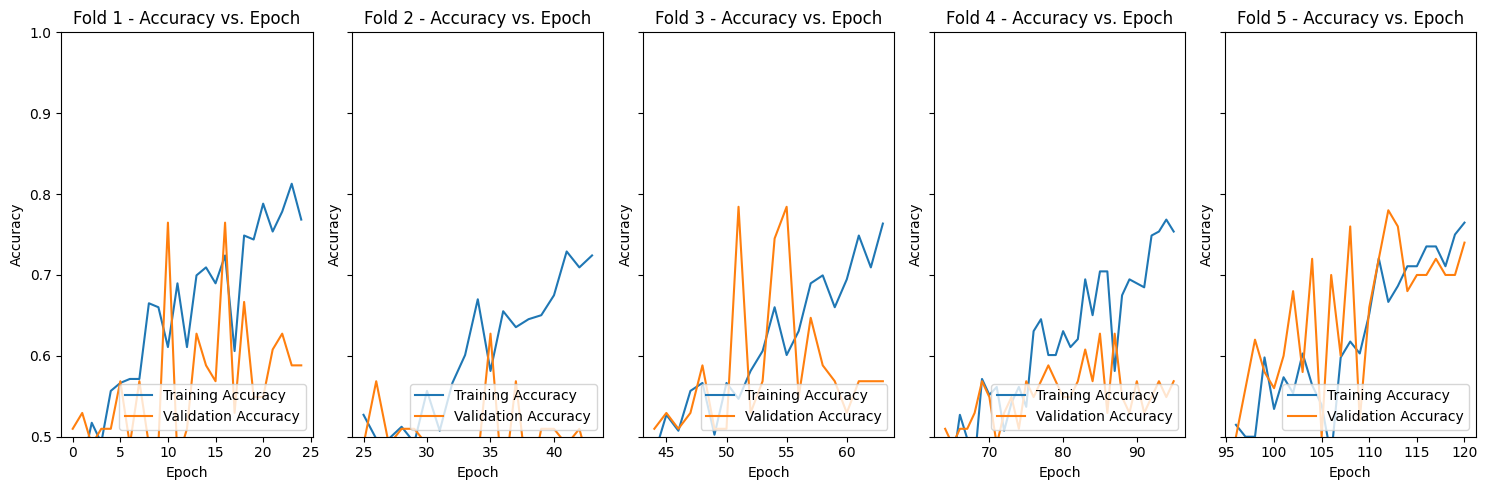

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history_df):
    num_folds = history_df['fold'].nunique()
    fig, axes = plt.subplots(1, num_folds, figsize=(15, 5), sharey=True)

    for i, fold_no in enumerate(history_df['fold'].unique()):
        fold_data = history_df[history_df['fold'] == fold_no]
        axes[i].plot(fold_data['accuracy'], label='Training Accuracy')
        axes[i].plot(fold_data['val_accuracy'], label='Validation Accuracy')
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Accuracy')
        axes[i].set_ylim([0.5, 1])
        axes[i].legend(loc='lower right')
        axes[i].set_title(f'Fold {fold_no} - Accuracy vs. Epoch')

    plt.tight_layout()
    plt.show()

plot_accuracy(history_df)

# **Average accuracy for all folds**

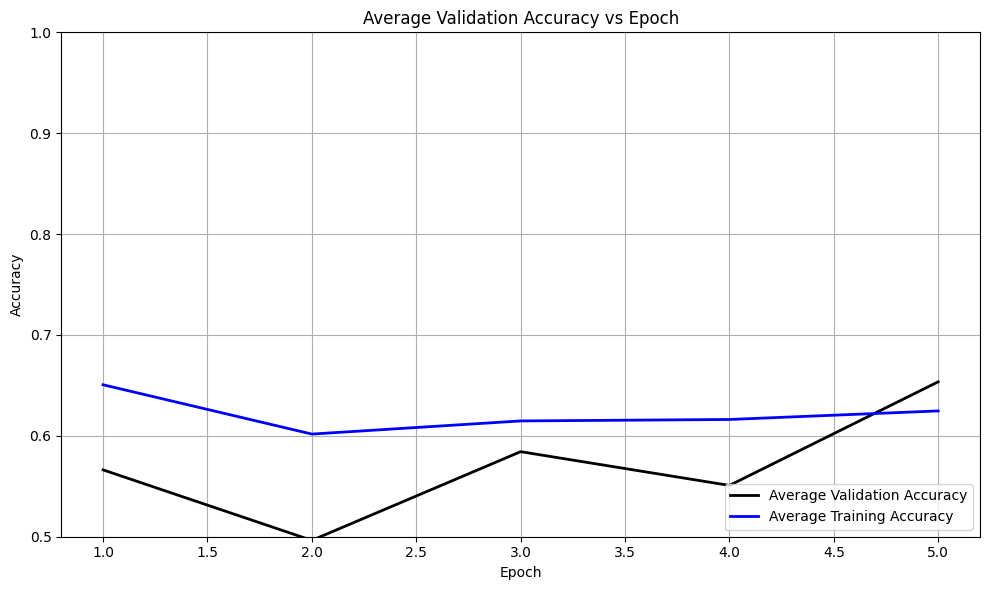

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history_df):
    plt.figure(figsize=(10, 6))
    mean_val_accuracy = history_df.groupby('fold')['val_accuracy'].mean()
    mean_accuracy = history_df.groupby('fold')['accuracy'].mean()
    plt.plot(mean_val_accuracy.index, mean_val_accuracy.values, label='Average Validation Accuracy', linewidth=2, color='black')
    plt.plot(mean_accuracy.index, mean_accuracy.values, label='Average Training Accuracy', linewidth=2, color='blue')


    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.title('Average Validation Accuracy vs Epoch')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_accuracy(history_df)

# **[B] Validation Loss Per Epoch**

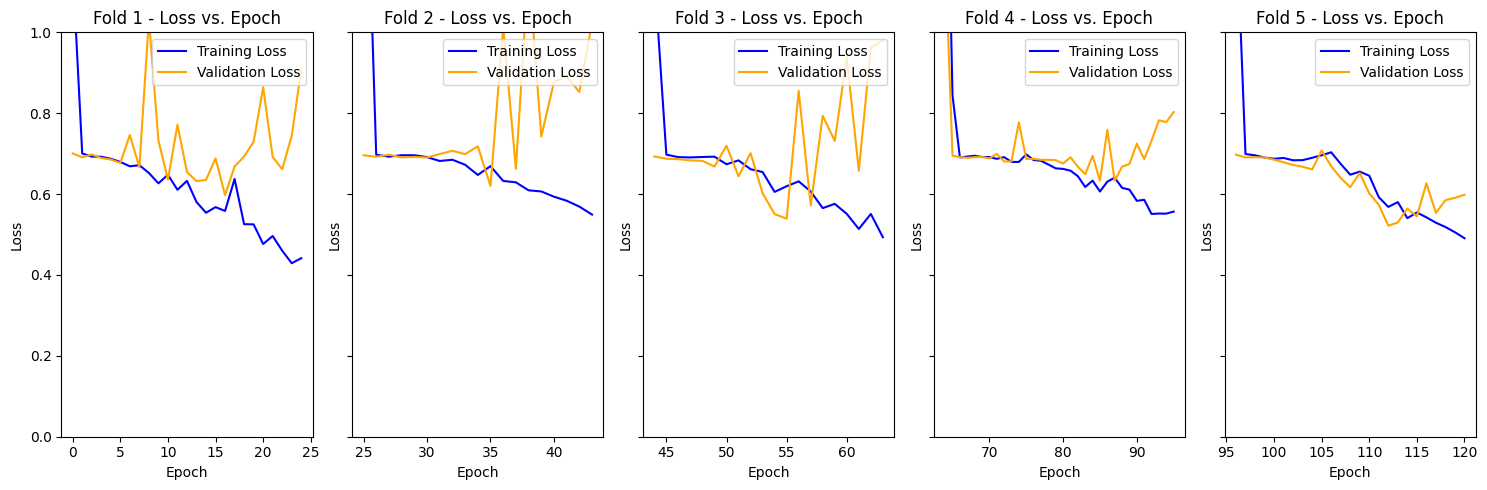

In [ ]:
import matplotlib.pyplot as plt

def validation_loss(history_df):
    num_folds = history_df['fold'].nunique()
    fig, axes = plt.subplots(1, num_folds, figsize=(15, 5), sharey=True)
    for i, fold_no in enumerate(history_df['fold'].unique()):
        fold_data = history_df[history_df['fold'] == fold_no]
        axes[i].plot(fold_data['loss'], label='Training Loss', color='blue') # Training loss added here
        axes[i].plot(fold_data['val_loss'], label='Validation Loss', color='orange')
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel('Loss')
        axes[i].set_ylim([0, 1])
        axes[i].legend(loc='upper right')
        axes[i].set_title(f'Fold {fold_no} - Loss vs. Epoch')

    plt.tight_layout()
    plt.show()

validation_loss(history_df)

# **Average Loss for all Folds**

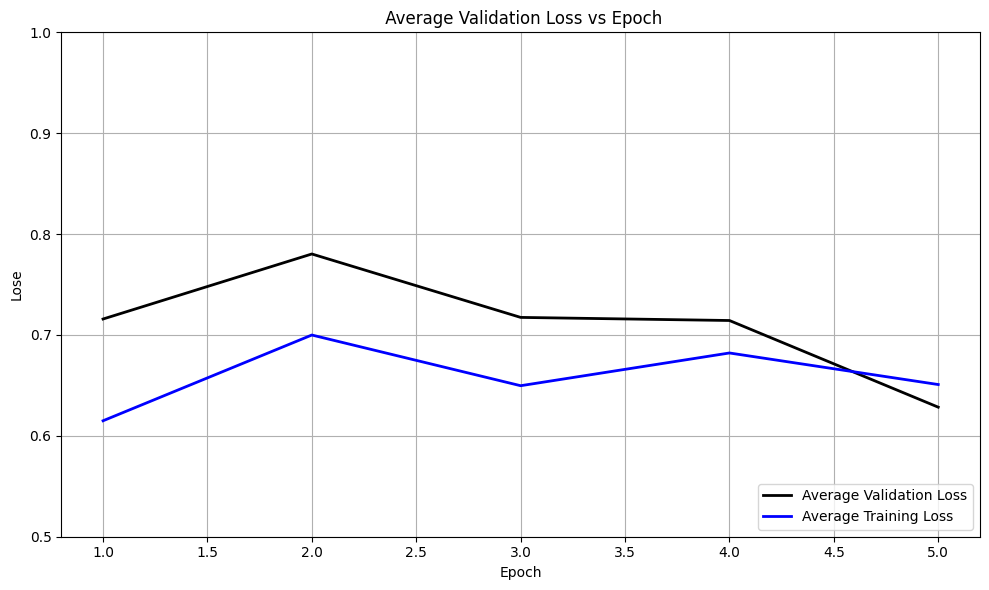

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history_df):
    plt.figure(figsize=(10, 6))
    mean_val_accuracy = history_df.groupby('fold')['val_loss'].mean()
    mean_accuracy = history_df.groupby('fold')['loss'].mean()
    plt.plot(mean_val_accuracy.index, mean_val_accuracy.values, label='Average Validation Loss', linewidth=2, color='black')
    plt.plot(mean_accuracy.index, mean_accuracy.values, label='Average Training Loss', linewidth=2, color='blue')


    plt.xlabel('Epoch')
    plt.ylabel('Lose')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.title(' Average Validation Loss vs Epoch')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_accuracy(history_df)

# **[C] Confusion Matrix**

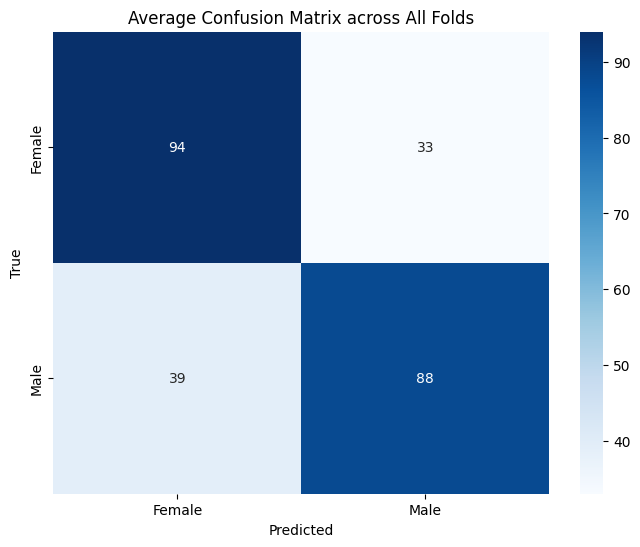

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
import numpy as np

def plot_confusion_matrix(all_predictions, all_true_labels):
  all_predictions = np.concatenate(all_predictions)
  all_predictions = (all_predictions > 0.5).astype(int)
  all_true_labels = np.concatenate(all_true_labels)
  cm = sk_confusion_matrix(all_true_labels,all_predictions)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title(f'Average Confusion Matrix across All Folds')
  plt.show()

plot_confusion_matrix(all_predictions, all_true_labels)

# Confusion Matrix with Percentage

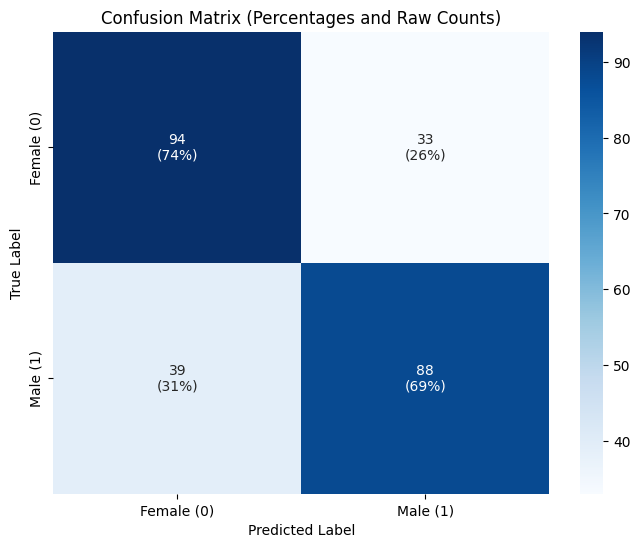

In [ ]:
def plot_confusion_matrix(all_predictions, all_true_labels, normalize=False):
    all_predictions = np.concatenate(all_predictions).ravel()
    all_true_labels = np.concatenate(all_true_labels).ravel()
    all_predictions = (all_predictions > 0.5).astype(int)

    cm = sk_confusion_matrix(all_true_labels, all_predictions, labels=[0, 1])

    if normalize:
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  # Normalize and multiply by 100
        cm_norm = np.round(cm_norm, 0).astype(int)  # Round to the nearest whole number

        annot = np.empty_like(cm, dtype=object)
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                annot[i, j] = f'{cm[i, j]}\n({cm_norm[i, j]}%)'

        fmt = ''  # Use empty string for custom annotation format
        title = 'Confusion Matrix (Percentages and Raw Counts)'
    else:
        annot = True
        fmt = 'd'
        title = 'Confusion Matrix (Raw Counts)'

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=annot, fmt=fmt, cmap='Blues',
                xticklabels=['Female (0)', 'Male (1)'],
                yticklabels=['Female (0)', 'Male (1)'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

plot_confusion_matrix(all_predictions, all_true_labels, normalize=True)

# **[D] AUC ROC Plot**

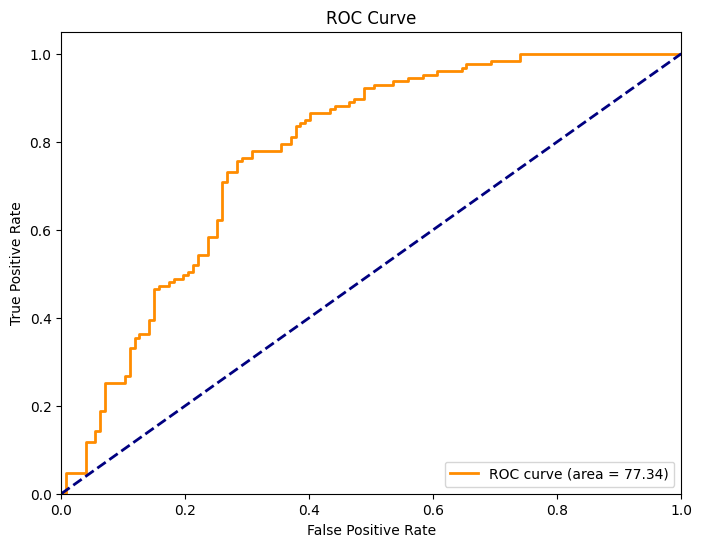

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

def auc_roc_curve(all_predictions, all_true_labels):
    all_predictions = np.concatenate(all_predictions)
    all_true_labels = np.concatenate(all_true_labels)

    # Average roc result
    roc_auc = 0.7734

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(all_true_labels, all_predictions)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % (roc_auc * 100))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylim([0.0, 1.05])
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

# Call the FUnction
auc_roc_curve(all_predictions, all_true_labels)


# **ROC Curve per Plot**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

def auc_roc_curve(ax, fold_predictions, fold_true_labels, fold_idx):
    fold_predictions = fold_predictions.reshape(-1)
    fold_true_labels = fold_true_labels.reshape(-1)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(fold_true_labels, fold_predictions)

    # Compute AUC
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    ax.plot(fpr, tpr, lw=2, color='navy', label=f'Fold {fold_idx + 1} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='darkorange', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.set_title(f"Fold {fold_idx + 1} ROC Curve")
    ax.legend(loc="lower right")

    return roc_auc

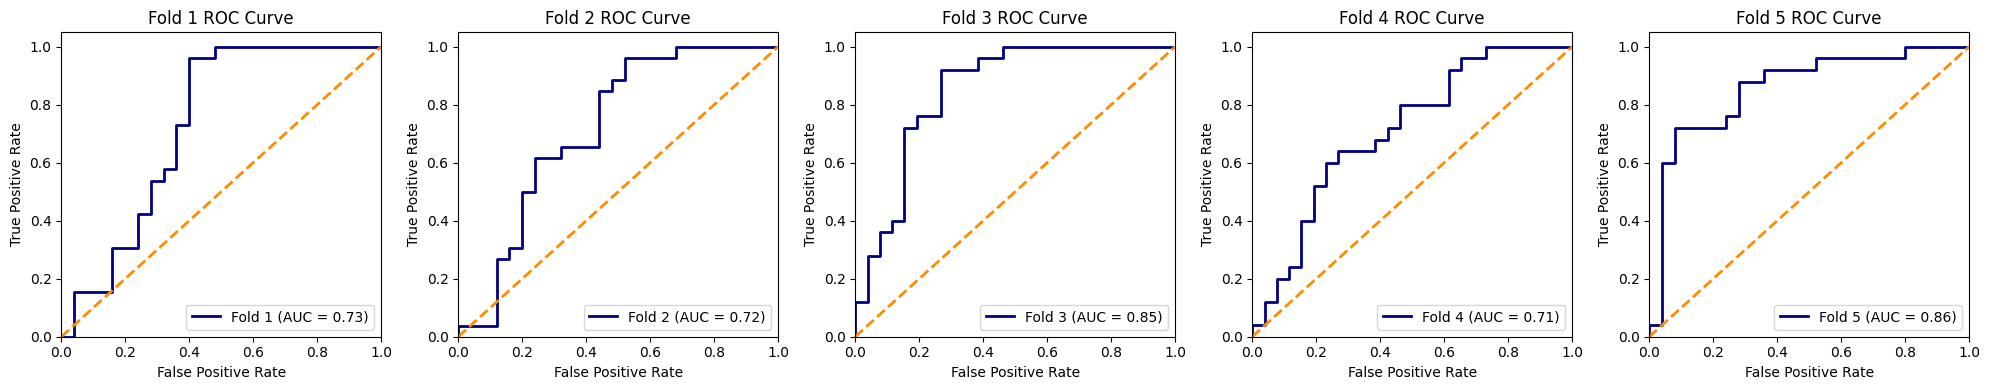

Average AUC: 0.7734
AUC per fold: [np.float64(0.7307692307692307), np.float64(0.7184615384615385), np.float64(0.8492307692307692), np.float64(0.7107692307692308), np.float64(0.8576)]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np


def calculate_average_auc_roc(all_predictions, all_true_labels):
    auc_per_fold = []
    fig, axes = plt.subplots(1, 5, figsize=(20, 4))

    # Loop through all the folds and calculate the AUC
    for fold_idx, (fold_predictions, fold_true_labels) in enumerate(zip(all_predictions, all_true_labels)):
        auc_value = auc_roc_curve(axes[fold_idx], fold_predictions, fold_true_labels, fold_idx)
        auc_per_fold.append(auc_value)

    # Calculate the average AUC across all folds
    average_auc = np.mean(auc_per_fold)
    plt.tight_layout()
    plt.show()

    print(f'Average AUC: {average_auc:.4f}')
    print(f'AUC per fold: {auc_per_fold}')

# Call the function
calculate_average_auc_roc(all_predictions, all_true_labels)


# **BASELINE CNN started with epoch = 20 and batch size = 16**

## Using the left lateral angle which was the most significant feature (WH) -the model performance was compared between
*   Imbalanced
*   Balanced



# **[A]- (Left Lateral Angle) Imbalanced with epoch = 20 and batch size = 16**

In [ ]:
# Imbalanced with epoch = 20 and batch size = 16

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/MyDrive/SP 2024/Angles/Colored/Left_Lateral_Colored/"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model20.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,
)


Found 271 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.5056 - auc: 0.5280 - loss: 1.7832 - precision: 0.5992 - recall: 0.4839
Epoch 1: val_loss improved from inf to 0.69223, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.5052 - auc: 0.5273 - loss: 1.7481 - precision: 0.5947 - recall: 0.4865 - val_accuracy: 0.5273 - val_auc: 0.3979 - val_loss: 0.6922 - val_precision: 0.5273 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.4787 - auc: 0.4080 - loss: 0.7222 - precision: 0.5061 - recall: 0.5861
Epoch 2: val_loss did not improve from 0.69223
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.4795 - auc: 0.4093 - loss: 0.7215 - precision: 0.5068 - recall: 0.5911 - val_accuracy: 0.6545 - val_auc: 0.5000 - val_loss: 0.6924 - val_precision: 0.6923 - val_recall: 0.6207 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.6031 - auc: 0.5546 - loss: 0.6960 - precision: 0.6418 - recall: 0.6090
Epoch 3: val_loss improved from 0.69223 to 0.69148, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 402ms/step - accuracy: 0.6008 - auc: 0.5518 - loss: 0.6962 - precision: 0.6380 - recall: 0.6125 - val_accuracy: 0.6000 - val_auc: 0.7407 - val_loss: 0.6915 - val_precision: 0.8889 - val_recall: 0.2759 - learning_rate: 0.0010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.6109 - auc: 0.6608 - loss: 0.6913 - precision: 0.6663 - recall: 0.5451
Epoch 4: val_loss improved from 0.69148 to 0.68846, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.6066 - auc: 0.6521 - loss: 0.6920 - precision: 0.6594 - recall: 0.5534 - val_accuracy: 0.5455 - val_auc: 0.7838 - val_loss: 0.6885 - val_precision: 0.5370 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5935 - auc: 0.5823 - loss: 0.6890 - precision: 0.6994 - recall: 0.4394
Epoch 5: val_loss improved from 0.68846 to 0.68819, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step - accuracy: 0.5900 - auc: 0.5790 - loss: 0.6891 - precision: 0.6973 - recall: 0.4287 - val_accuracy: 0.5636 - val_auc: 0.7659 - val_loss: 0.6882 - val_precision: 1.0000 - val_recall: 0.1724 - learning_rate: 0.0010
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5395 - auc: 0.5873 - loss: 0.6911 - precision: 0.5950 - recall: 0.6291
Epoch 6: val_loss improved from 0.68819 to 0.68582, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.5384 - auc: 0.5822 - loss: 0.6913 - precision: 0.5911 - recall: 0.6376 - val_accuracy: 0.4727 - val_auc: 0.7473 - val_loss: 0.6858 - val_precision: 0.5000 - val_recall: 0.0345 - learning_rate: 0.0010
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.5345 - auc: 0.6179 - loss: 0.6873 - precision: 0.6216 - recall: 0.4251
Epoch 7: val_loss improved from 0.68582 to 0.68083, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 429ms/step - accuracy: 0.5340 - auc: 0.6131 - loss: 0.6880 - precision: 0.6170 - recall: 0.4356 - val_accuracy: 0.4727 - val_auc: 0.8004 - val_loss: 0.6808 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.4846 - auc: 0.6430 - loss: 0.6861 - precision: 0.7002 - recall: 0.0775
Epoch 8: val_loss improved from 0.68083 to 0.68022, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.4841 - auc: 0.6422 - loss: 0.6861 - precision: 0.6906 - recall: 0.0782 - val_accuracy: 0.5455 - val_auc: 0.6976 - val_loss: 0.6802 - val_precision: 0.8333 - val_recall: 0.1724 - learning_rate: 0.0010
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.5942 - auc: 0.6003 - loss: 0.6838 - precision: 0.6134 - recall: 0.6994
Epoch 9: val_loss improved from 0.68022 to 0.66622, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.5944 - auc: 0.5994 - loss: 0.6837 - precision: 0.6117 - recall: 0.7073 - val_accuracy: 0.6182 - val_auc: 0.8037 - val_loss: 0.6662 - val_precision: 0.9000 - val_recall: 0.3103 - learning_rate: 0.0010
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.6257 - auc: 0.6696 - loss: 0.6723 - precision: 0.7010 - recall: 0.5370
Epoch 10: val_loss did not improve from 0.66622
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 385ms/step - accuracy: 0.6213 - auc: 0.6636 - loss: 0.6740 - precision: 0.6950 - recall: 0.5331 - val_accuracy: 0.5455 - val_auc: 0.7069 - val_loss: 0.6754 - val_precision: 1.0000 - val_recall: 0.1379 - learning_rate: 0.0010
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.6364 - auc: 0.7181 - loss: 0.6730 - precision: 0.7199 - recall: 0.5974
Epoch 11: val_loss did not improve from 0.66622
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step - accuracy: 0.6369 - auc: 0.7165 - loss: 0.6734 - precision: 0.7147 - recall:

14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 351ms/step - accuracy: 0.6730 - auc: 0.7437 - loss: 0.6764 - precision: 0.7184 - recall: 0.6915 - val_accuracy: 0.6182 - val_auc: 0.8103 - val_loss: 0.6555 - val_precision: 0.7857 - val_recall: 0.3793 - learning_rate: 5.0000e-04
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.6686 - auc: 0.7500 - loss: 0.6642 - precision: 0.7919 - recall: 0.5575
Epoch 14: val_loss improved from 0.65552 to 0.62909, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.6703 - auc: 0.7513 - loss: 0.6634 - precision: 0.7921 - recall: 0.5586 - val_accuracy: 0.5818 - val_auc: 0.8866 - val_loss: 0.6291 - val_precision: 1.0000 - val_recall: 0.2069 - learning_rate: 5.0000e-04
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6498 - auc: 0.6709 - loss: 0.6512 - precision: 0.7945 - recall: 0.3881
Epoch 15: val_loss improved from 0.62909 to 0.60558, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.6512 - auc: 0.6729 - loss: 0.6512 - precision: 0.7932 - recall: 0.3982 - val_accuracy: 0.7091 - val_auc: 0.8037 - val_loss: 0.6056 - val_precision: 0.8095 - val_recall: 0.5862 - learning_rate: 5.0000e-04
Epoch 16/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.6473 - auc: 0.7114 - loss: 0.6383 - precision: 0.7025 - recall: 0.6409
Epoch 16: val_loss did not improve from 0.60558
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 338ms/step - accuracy: 0.6474 - auc: 0.7119 - loss: 0.6381 - precision: 0.7024 - recall: 0.6375 - val_accuracy: 0.6364 - val_auc: 0.8369 - val_loss: 0.6281 - val_precision: 1.0000 - val_recall: 0.3103 - learning_rate: 5.0000e-04
Epoch 17/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.5551 - auc: 0.6778 - loss: 0.6607 - precision: 0.5208 - recall: 0.4337
Epoch 17: val_loss improved from 0.60558 to 0.57339, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.5603 - auc: 0.6774 - loss: 0.6598 - precision: 0.5300 - recall: 0.4483 - val_accuracy: 0.6909 - val_auc: 0.8190 - val_loss: 0.5734 - val_precision: 0.8000 - val_recall: 0.5517 - learning_rate: 5.0000e-04
Epoch 18/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.7250 - auc: 0.7675 - loss: 0.6060 - precision: 0.7396 - recall: 0.7360
Epoch 18: val_loss improved from 0.57339 to 0.53601, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 388ms/step - accuracy: 0.7208 - auc: 0.7644 - loss: 0.6070 - precision: 0.7362 - recall: 0.7316 - val_accuracy: 0.7455 - val_auc: 0.8495 - val_loss: 0.5360 - val_precision: 0.8947 - val_recall: 0.5862 - learning_rate: 5.0000e-04
Epoch 19/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.6933 - auc: 0.7605 - loss: 0.5963 - precision: 0.7828 - recall: 0.6187
Epoch 19: val_loss did not improve from 0.53601
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.6931 - auc: 0.7610 - loss: 0.5958 - precision: 0.7796 - recall: 0.6209 - val_accuracy: 0.6545 - val_auc: 0.8568 - val_loss: 0.5674 - val_precision: 0.9167 - val_recall: 0.3793 - learning_rate: 5.0000e-04
Epoch 20/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.6974 - auc: 0.7793 - loss: 0.5744 - precision: 0.7424 - recall: 0.6653
Epoch 20: val_loss improved from 0.53601 to 0.49744, saving model to best_model_fold_1.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.6975 - auc: 0.7795 - loss: 0.5742 - precision: 0.7420 - recall: 0.6662 - val_accuracy: 0.7818 - val_auc: 0.8515 - val_loss: 0.4974 - val_precision: 0.8400 - val_recall: 0.7241 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 1 Scores:
loss: 0.4974
compile_metrics: 0.7818
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

--------------------------------------------------------------------------------
Training fold 2


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.5044 - auc: 0.4880 - loss: 1.1651 - precision: 0.5086 - recall: 0.5442
Epoch 1: val_loss improved from inf to 0.70104, saving model to best_model_fold_2.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step - accuracy: 0.5046 - auc: 0.4890 - loss: 1.1503 - precision: 0.5106 - recall: 0.5404 - val_accuracy: 0.4630 - val_auc: 0.6883 - val_loss: 0.7010 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.4945 - auc: 0.5182 - loss: 0.6940 - precision: 0.2967 - recall: 0.0359
Epoch 2: val_loss improved from 0.70104 to 0.69039, saving model to best_model_fold_2.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.4944 - auc: 0.5210 - loss: 0.6940 - precision: 0.3150 - recall: 0.0451 - val_accuracy: 0.5370 - val_auc: 0.4586 - val_loss: 0.6904 - val_precision: 0.5370 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.4359 - auc: 0.4293 - loss: 0.7026 - precision: 0.4369 - recall: 0.4610
Epoch 3: val_loss did not improve from 0.69039
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.4381 - auc: 0.4322 - loss: 0.7022 - precision: 0.4411 - recall: 0.4569 - val_accuracy: 0.5926 - val_auc: 0.6241 - val_loss: 0.6918 - val_precision: 0.6296 - val_recall: 0.5862 - learning_rate: 0.0010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.6026 - auc: 0.5693 - loss: 0.6918 - precision: 0.5976 - recall: 0.7792
Epoch 4: val_loss improved from 0.69039 to 0.69016, saving model to best_model_fold_2.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.6014 - auc: 0.5720 - loss: 0.6918 - precision: 0.5974 - recall: 0.7731 - val_accuracy: 0.4444 - val_auc: 0.6897 - val_loss: 0.6902 - val_precision: 0.4000 - val_recall: 0.0690 - learning_rate: 0.0010
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5472 - auc: 0.6392 - loss: 0.6903 - precision: 0.6278 - recall: 0.4514
Epoch 5: val_loss did not improve from 0.69016
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.5485 - auc: 0.6380 - loss: 0.6902 - precision: 0.6256 - recall: 0.4596 - val_accuracy: 0.4630 - val_auc: 0.6545 - val_loss: 0.7236 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.5349 - auc: 0.5618 - loss: 0.6957 - precision: 0.7364 - recall: 0.3332
Epoch 6: val_loss improved from 0.69016 to 0.68276, saving model to best_model_fold_2.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 397ms/step - accuracy: 0.5361 - auc: 0.5629 - loss: 0.6954 - precision: 0.7253 - recall: 0.3533 - val_accuracy: 0.6111 - val_auc: 0.7048 - val_loss: 0.6828 - val_precision: 0.7222 - val_recall: 0.4483 - learning_rate: 0.0010
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.5993 - auc: 0.6486 - loss: 0.6813 - precision: 0.6148 - recall: 0.4872
Epoch 7: val_loss did not improve from 0.68276
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.5956 - auc: 0.6442 - loss: 0.6817 - precision: 0.6135 - recall: 0.4837 - val_accuracy: 0.5370 - val_auc: 0.5234 - val_loss: 0.7190 - val_precision: 0.5370 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.5171 - auc: 0.4977 - loss: 0.7085 - precision: 0.5171 - recall: 1.0000
Epoch 8: val_loss did not improve from 0.68276
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.5179 - auc: 0.4967 - loss: 0.7078 - precision: 0.5179 - recall: 1.

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.5072 - auc: 0.4811 - loss: 0.8158 - precision: 0.5524 - recall: 0.6185
Epoch 1: val_loss improved from inf to 0.69058, saving model to best_model_fold_3.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step - accuracy: 0.5044 - auc: 0.4815 - loss: 0.8131 - precision: 0.5487 - recall: 0.6121 - val_accuracy: 0.5556 - val_auc: 0.6421 - val_loss: 0.6906 - val_precision: 0.5510 - val_recall: 0.9310 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.5701 - auc: 0.5801 - loss: 0.6902 - precision: 0.5856 - recall: 0.5818
Epoch 2: val_loss improved from 0.69058 to 0.68788, saving model to best_model_fold_3.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.5680 - auc: 0.5786 - loss: 0.6903 - precision: 0.5839 - recall: 0.5836 - val_accuracy: 0.5370 - val_auc: 0.7262 - val_loss: 0.6879 - val_precision: 0.5370 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.4950 - auc: 0.5777 - loss: 0.6894 - precision: 0.5027 - recall: 0.8590
Epoch 3: val_loss improved from 0.68788 to 0.67921, saving model to best_model_fold_3.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.4964 - auc: 0.5769 - loss: 0.6893 - precision: 0.5042 - recall: 0.8608 - val_accuracy: 0.6667 - val_auc: 0.7055 - val_loss: 0.6792 - val_precision: 0.6486 - val_recall: 0.8276 - learning_rate: 0.0010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5874 - auc: 0.5173 - loss: 0.6896 - precision: 0.5995 - recall: 0.7788
Epoch 4: val_loss did not improve from 0.67921
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 336ms/step - accuracy: 0.5845 - auc: 0.5178 - loss: 0.6901 - precision: 0.5971 - recall: 0.7680 - val_accuracy: 0.6296 - val_auc: 0.7048 - val_loss: 0.6823 - val_precision: 0.6364 - val_recall: 0.7241 - learning_rate: 0.0010
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.6137 - auc: 0.6005 - loss: 0.6848 - precision: 0.6054 - recall: 0.6643
Epoch 5: val_loss improved from 0.67921 to 0.66347, saving model to best_model_fold_3.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.6131 - auc: 0.6004 - loss: 0.6847 - precision: 0.6063 - recall: 0.6641 - val_accuracy: 0.6296 - val_auc: 0.6717 - val_loss: 0.6635 - val_precision: 0.7143 - val_recall: 0.5172 - learning_rate: 0.0010
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.5195 - auc: 0.6128 - loss: 0.6830 - precision: 0.5015 - recall: 0.2760
Epoch 6: val_loss did not improve from 0.66347
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.5189 - auc: 0.6107 - loss: 0.6833 - precision: 0.5055 - recall: 0.2814 - val_accuracy: 0.6111 - val_auc: 0.6772 - val_loss: 0.6779 - val_precision: 0.6000 - val_recall: 0.8276 - learning_rate: 0.0010
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.5485 - auc: 0.5219 - loss: 0.6876 - precision: 0.5566 - recall: 0.9586
Epoch 7: val_loss did not improve from 0.66347
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.5478 - auc: 0.5240 - loss: 0.6876 - precision: 0.5553 - recall: 0.

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5040 - auc: 0.5359 - loss: 0.9275 - precision: 0.5184 - recall: 0.4431
Epoch 1: val_loss improved from inf to 0.71077, saving model to best_model_fold_4.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step - accuracy: 0.5045 - auc: 0.5353 - loss: 0.9223 - precision: 0.5203 - recall: 0.4443 - val_accuracy: 0.5370 - val_auc: 0.6324 - val_loss: 0.7108 - val_precision: 0.5370 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5492 - auc: 0.5596 - loss: 0.6869 - precision: 0.5586 - recall: 0.8741
Epoch 2: val_loss improved from 0.71077 to 0.69355, saving model to best_model_fold_4.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.5442 - auc: 0.5568 - loss: 0.6881 - precision: 0.5550 - recall: 0.8553 - val_accuracy: 0.4630 - val_auc: 0.4841 - val_loss: 0.6935 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.4835 - auc: 0.4802 - loss: 0.6932 - precision: 0.4319 - recall: 0.1097
Epoch 3: val_loss improved from 0.69355 to 0.69296, saving model to best_model_fold_4.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - accuracy: 0.4832 - auc: 0.4828 - loss: 0.6932 - precision: 0.4381 - recall: 0.1146 - val_accuracy: 0.4815 - val_auc: 0.5228 - val_loss: 0.6930 - val_precision: 0.5294 - val_recall: 0.3103 - learning_rate: 0.0010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6203 - auc: 0.6182 - loss: 0.6910 - precision: 0.6617 - recall: 0.5544
Epoch 4: val_loss improved from 0.69296 to 0.69030, saving model to best_model_fold_4.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.6174 - auc: 0.6140 - loss: 0.6910 - precision: 0.6587 - recall: 0.5528 - val_accuracy: 0.5370 - val_auc: 0.4834 - val_loss: 0.6903 - val_precision: 0.5370 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.5188 - auc: 0.5051 - loss: 0.6968 - precision: 0.5288 - recall: 0.6766
Epoch 5: val_loss improved from 0.69030 to 0.69003, saving model to best_model_fold_4.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.5202 - auc: 0.5071 - loss: 0.6966 - precision: 0.5318 - recall: 0.6651 - val_accuracy: 0.5926 - val_auc: 0.6738 - val_loss: 0.6900 - val_precision: 0.5946 - val_recall: 0.7586 - learning_rate: 0.0010
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6416 - auc: 0.6572 - loss: 0.6867 - precision: 0.6726 - recall: 0.6129
Epoch 6: val_loss improved from 0.69003 to 0.68997, saving model to best_model_fold_4.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.6394 - auc: 0.6540 - loss: 0.6866 - precision: 0.6719 - recall: 0.6074 - val_accuracy: 0.5000 - val_auc: 0.5538 - val_loss: 0.6900 - val_precision: 0.5500 - val_recall: 0.3793 - learning_rate: 0.0010
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6067 - auc: 0.6507 - loss: 0.6761 - precision: 0.6660 - recall: 0.6446
Epoch 7: val_loss did not improve from 0.68997
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 335ms/step - accuracy: 0.6062 - auc: 0.6488 - loss: 0.6764 - precision: 0.6636 - recall: 0.6411 - val_accuracy: 0.4630 - val_auc: 0.5738 - val_loss: 0.7157 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.5731 - auc: 0.6604 - loss: 0.6850 - precision: 0.6916 - recall: 0.3850
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 8: val_loss did not improve from 0.68997
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 412ms

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.6544 - auc: 0.7327 - loss: 0.6256 - precision: 0.6790 - recall: 0.6667 - val_accuracy: 0.5926 - val_auc: 0.6497 - val_loss: 0.6833 - val_precision: 0.6667 - val_recall: 0.4828 - learning_rate: 5.0000e-04
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.6803 - auc: 0.7649 - loss: 0.5984 - precision: 0.6860 - recall: 0.6864
Epoch 12: val_loss improved from 0.68332 to 0.63680, saving model to best_model_fold_4.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 421ms/step - accuracy: 0.6776 - auc: 0.7625 - loss: 0.5994 - precision: 0.6829 - recall: 0.6899 - val_accuracy: 0.5926 - val_auc: 0.6834 - val_loss: 0.6368 - val_precision: 0.6000 - val_recall: 0.7241 - learning_rate: 5.0000e-04
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6560 - auc: 0.7578 - loss: 0.5959 - precision: 0.6591 - recall: 0.7222
Epoch 13: val_loss did not improve from 0.63680
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.6565 - auc: 0.7584 - loss: 0.5947 - precision: 0.6614 - recall: 0.7175 - val_accuracy: 0.6667 - val_auc: 0.6724 - val_loss: 0.6950 - val_precision: 0.7037 - val_recall: 0.6552 - learning_rate: 5.0000e-04
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.7445 - auc: 0.8214 - loss: 0.5303 - precision: 0.7134 - recall: 0.8180
Epoch 14: val_loss did not improve from 0.63680
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.7453 - auc: 0.8214 - loss: 0.5292 - precision: 0.7154 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.5119 - auc: 0.5050 - loss: 0.9776 - precision: 0.5570 - recall: 0.5754
Epoch 1: val_loss improved from inf to 0.69289, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.5125 - auc: 0.5058 - loss: 0.9693 - precision: 0.5563 - recall: 0.5773 - val_accuracy: 0.5185 - val_auc: 0.5288 - val_loss: 0.6929 - val_precision: 0.5185 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5717 - auc: 0.4688 - loss: 0.7116 - precision: 0.5744 - recall: 0.9454
Epoch 2: val_loss improved from 0.69289 to 0.69222, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 416ms/step - accuracy: 0.5680 - auc: 0.4707 - loss: 0.7116 - precision: 0.5714 - recall: 0.9387 - val_accuracy: 0.5185 - val_auc: 0.5000 - val_loss: 0.6922 - val_precision: 0.5185 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.4991 - auc: 0.4827 - loss: 0.6944 - precision: 0.5066 - recall: 0.9021
Epoch 3: val_loss did not improve from 0.69222
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - accuracy: 0.5008 - auc: 0.4819 - loss: 0.6943 - precision: 0.5083 - recall: 0.9046 - val_accuracy: 0.5185 - val_auc: 0.5021 - val_loss: 0.7022 - val_precision: 0.5185 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.5665 - auc: 0.4458 - loss: 0.7056 - precision: 0.5689 - recall: 0.9738
Epoch 4: val_loss did not improve from 0.69222
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 401ms/step - accuracy: 0.5634 - auc: 0.4479 - loss: 0.7058 - precision: 0.5663 - recall: 0.

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.5621 - auc: 0.5290 - loss: 0.6865 - precision: 0.5612 - recall: 0.9838 - val_accuracy: 0.5185 - val_auc: 0.5529 - val_loss: 0.6907 - val_precision: 0.5185 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.5208 - auc: 0.5564 - loss: 0.6869 - precision: 0.5372 - recall: 0.8507
Epoch 8: val_loss improved from 0.69069 to 0.68662, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.5217 - auc: 0.5547 - loss: 0.6871 - precision: 0.5376 - recall: 0.8497 - val_accuracy: 0.5185 - val_auc: 0.7109 - val_loss: 0.6866 - val_precision: 0.7500 - val_recall: 0.1071 - learning_rate: 5.0000e-04
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.4722 - auc: 0.4774 - loss: 0.6995 - precision: 0.4115 - recall: 0.1288
Epoch 9: val_loss improved from 0.68662 to 0.68557, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - accuracy: 0.4745 - auc: 0.4806 - loss: 0.6992 - precision: 0.4219 - recall: 0.1421 - val_accuracy: 0.5556 - val_auc: 0.7225 - val_loss: 0.6856 - val_precision: 0.5385 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5290 - auc: 0.4827 - loss: 0.6943 - precision: 0.5187 - recall: 0.9418
Epoch 10: val_loss improved from 0.68557 to 0.68397, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.5297 - auc: 0.4851 - loss: 0.6941 - precision: 0.5200 - recall: 0.9434 - val_accuracy: 0.5185 - val_auc: 0.7115 - val_loss: 0.6840 - val_precision: 0.5185 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5119 - auc: 0.5484 - loss: 0.6945 - precision: 0.5117 - recall: 0.8460
Epoch 11: val_loss improved from 0.68397 to 0.67310, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step - accuracy: 0.5155 - auc: 0.5494 - loss: 0.6941 - precision: 0.5155 - recall: 0.8425 - val_accuracy: 0.6481 - val_auc: 0.7342 - val_loss: 0.6731 - val_precision: 0.6800 - val_recall: 0.6071 - learning_rate: 5.0000e-04
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.6330 - auc: 0.6577 - loss: 0.6754 - precision: 0.6081 - recall: 0.7557
Epoch 12: val_loss improved from 0.67310 to 0.65872, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.6326 - auc: 0.6578 - loss: 0.6749 - precision: 0.6096 - recall: 0.7541 - val_accuracy: 0.6111 - val_auc: 0.6861 - val_loss: 0.6587 - val_precision: 0.5814 - val_recall: 0.8929 - learning_rate: 5.0000e-04
Epoch 13/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.5897 - auc: 0.6247 - loss: 0.6727 - precision: 0.5875 - recall: 0.7987
Epoch 13: val_loss improved from 0.65872 to 0.63613, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.5919 - auc: 0.6258 - loss: 0.6721 - precision: 0.5893 - recall: 0.7983 - val_accuracy: 0.6296 - val_auc: 0.7246 - val_loss: 0.6361 - val_precision: 0.6818 - val_recall: 0.5357 - learning_rate: 5.0000e-04
Epoch 14/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6469 - auc: 0.7183 - loss: 0.6312 - precision: 0.6700 - recall: 0.6946
Epoch 14: val_loss improved from 0.63613 to 0.60862, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - accuracy: 0.6458 - auc: 0.7169 - loss: 0.6316 - precision: 0.6682 - recall: 0.6948 - val_accuracy: 0.6667 - val_auc: 0.7308 - val_loss: 0.6086 - val_precision: 0.6923 - val_recall: 0.6429 - learning_rate: 5.0000e-04
Epoch 15/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.6061 - auc: 0.6416 - loss: 0.6634 - precision: 0.6004 - recall: 0.7545
Epoch 15: val_loss did not improve from 0.60862
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 398ms/step - accuracy: 0.6068 - auc: 0.6428 - loss: 0.6628 - precision: 0.6019 - recall: 0.7519 - val_accuracy: 0.6481 - val_auc: 0.7411 - val_loss: 0.6136 - val_precision: 0.6286 - val_recall: 0.7857 - learning_rate: 5.0000e-04
Epoch 16/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6698 - auc: 0.6871 - loss: 0.6322 - precision: 0.6489 - recall: 0.9007
Epoch 16: val_loss did not improve from 0.60862
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 335ms/step - accuracy: 0.6672 - auc: 0.6859 - loss: 0.6330 - precision: 0.6477 -

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step - accuracy: 0.7559 - auc: 0.7986 - loss: 0.6040 - precision: 0.7728 - recall: 0.7333 - val_accuracy: 0.6111 - val_auc: 0.7253 - val_loss: 0.6055 - val_precision: 0.7059 - val_recall: 0.4286 - learning_rate: 5.0000e-04
Epoch 18/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6164 - auc: 0.7110 - loss: 0.6219 - precision: 0.6047 - recall: 0.7270
Epoch 18: val_loss improved from 0.60549 to 0.58029, saving model to best_model_fold_5.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.6171 - auc: 0.7117 - loss: 0.6211 - precision: 0.6068 - recall: 0.7256 - val_accuracy: 0.6481 - val_auc: 0.7624 - val_loss: 0.5803 - val_precision: 0.7143 - val_recall: 0.5357 - learning_rate: 5.0000e-04
Epoch 19/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.6370 - auc: 0.7845 - loss: 0.5950 - precision: 0.6166 - recall: 0.8985
Epoch 19: val_loss did not improve from 0.58029
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - accuracy: 0.6394 - auc: 0.7838 - loss: 0.5950 - precision: 0.6185 - recall: 0.8961 - val_accuracy: 0.5741 - val_auc: 0.7452 - val_loss: 0.9115 - val_precision: 0.7778 - val_recall: 0.2500 - learning_rate: 5.0000e-04
Epoch 20/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.6549 - auc: 0.7287 - loss: 0.6597 - precision: 0.6746 - recall: 0.7244
Epoch 20: val_loss did not improve from 0.58029
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.6555 - auc: 0.7298 - loss: 0.6576 - precision: 0.6720 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_5 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[A]- (Left Lateral Angle) Balanced with epoch = 20 and batch size = 16**

*   Random Undersampling was performed to have equual class balance



In [ ]:
# Balanced with epoch = 20 and batch size = 16
import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model20.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5273 - auc: 0.4556 - loss: 1.9621 - precision: 0.5500 - recall: 0.5008
Epoch 1: val_loss improved from inf to 0.69916, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.5270 - auc: 0.4565 - loss: 1.9229 - precision: 0.5481 - recall: 0.4962 - val_accuracy: 0.4902 - val_auc: 0.6438 - val_loss: 0.6992 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.5406 - auc: 0.4343 - loss: 0.6956 - precision: 0.3077 - recall: 0.0082
Epoch 2: val_loss improved from 0.69916 to 0.69319, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 407ms/step - accuracy: 0.5382 - auc: 0.4404 - loss: 0.6956 - precision: 0.3333 - recall: 0.0090 - val_accuracy: 0.4902 - val_auc: 0.5677 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.5168 - auc: 0.5317 - loss: 0.6927 - precision: 1.0000 - recall: 0.0307
Epoch 3: val_loss improved from 0.69319 to 0.69309, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - accuracy: 0.5164 - auc: 0.5314 - loss: 0.6927 - precision: 1.0000 - recall: 0.0299 - val_accuracy: 0.4902 - val_auc: 0.5362 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5470 - auc: 0.5823 - loss: 0.6910 - precision: 0.5385 - recall: 0.0214
Epoch 4: val_loss improved from 0.69309 to 0.69201, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.5456 - auc: 0.5812 - loss: 0.6910 - precision: 0.5714 - recall: 0.0234 - val_accuracy: 0.4902 - val_auc: 0.5815 - val_loss: 0.6920 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5401 - auc: 0.5513 - loss: 0.6928 - precision: 0.5667 - recall: 0.4939
Epoch 5: val_loss improved from 0.69201 to 0.69103, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.5381 - auc: 0.5475 - loss: 0.6933 - precision: 0.5629 - recall: 0.4862 - val_accuracy: 0.5686 - val_auc: 0.5638 - val_loss: 0.6910 - val_precision: 0.5455 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.4989 - auc: 0.5540 - loss: 0.6920 - precision: 0.4503 - recall: 0.3228
Epoch 6: val_loss did not improve from 0.69103
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 0.4998 - auc: 0.5583 - loss: 0.6918 - precision: 0.4556 - recall: 0.3146 - val_accuracy: 0.4902 - val_auc: 0.6100 - val_loss: 0.6925 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.5211 - auc: 0.6072 - loss: 0.6877 - precision: 0.6035 - recall: 0.2271
Epoch 7: val_loss did not improve from 0.69103
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 431ms/step - accuracy: 0.5264 - auc: 0.6104 - loss: 0.6872 - precision: 0.6080 - re

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5474 - auc: 0.5926 - loss: 0.6878 - precision: 0.5388 - recall: 0.5487 - val_accuracy: 0.4902 - val_auc: 0.6669 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5122 - auc: 0.5955 - loss: 0.6838 - precision: 0.3626 - recall: 0.2237
Epoch 9: val_loss improved from 0.68975 to 0.68650, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.5119 - auc: 0.5924 - loss: 0.6843 - precision: 0.3729 - recall: 0.2353 - val_accuracy: 0.4706 - val_auc: 0.6346 - val_loss: 0.6865 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.6012 - auc: 0.6794 - loss: 0.6767 - precision: 0.8172 - recall: 0.2390
Epoch 10: val_loss did not improve from 0.68650
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.5987 - auc: 0.6756 - loss: 0.6770 - precision: 0.8096 - recall: 0.2375 - val_accuracy: 0.4706 - val_auc: 0.6392 - val_loss: 0.7378 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6112 - auc: 0.6811 - loss: 0.6609 - precision: 0.6536 - recall: 0.5833
Epoch 11: val_loss did not improve from 0.68650
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 337ms/step - accuracy: 0.6118 - auc: 0.6798 - loss: 0.6612 - precision: 

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 408ms/step - accuracy: 0.5844 - auc: 0.6756 - loss: 0.6496 - precision: 0.5663 - recall: 0.2643 - val_accuracy: 0.5490 - val_auc: 0.6454 - val_loss: 0.6569 - val_precision: 0.5789 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6316 - auc: 0.6650 - loss: 0.6526 - precision: 0.6251 - recall: 0.7270
Epoch 13: val_loss did not improve from 0.65687
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - accuracy: 0.6330 - auc: 0.6663 - loss: 0.6523 - precision: 0.6268 - recall: 0.7210 - val_accuracy: 0.4902 - val_auc: 0.6554 - val_loss: 0.7346 - val_precision: 0.5000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.6385 - auc: 0.7501 - loss: 0.6169 - precision: 0.7713 - recall: 0.4021
Epoch 14: val_loss did not improve from 0.65687
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - accuracy: 0.6369 - auc: 0.7481 - loss: 0.6176 - precision: 0.7658 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5643 - auc: 0.5457 - loss: 1.2097 - precision: 0.5641 - recall: 0.5305
Epoch 1: val_loss improved from inf to 0.69311, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.5578 - auc: 0.5422 - loss: 1.1998 - precision: 0.5571 - recall: 0.5216 - val_accuracy: 0.5490 - val_auc: 0.4185 - val_loss: 0.6931 - val_precision: 0.5319 - val_recall: 0.9615 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.5552 - auc: 0.5873 - loss: 0.6917 - precision: 0.5798 - recall: 0.4120
Epoch 2: val_loss improved from 0.69311 to 0.69052, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 398ms/step - accuracy: 0.5535 - auc: 0.5836 - loss: 0.6917 - precision: 0.5792 - recall: 0.3995 - val_accuracy: 0.4902 - val_auc: 0.7277 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5448 - auc: 0.5393 - loss: 0.6888 - precision: 0.5441 - recall: 0.0514
Epoch 3: val_loss improved from 0.69052 to 0.68682, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.5436 - auc: 0.5427 - loss: 0.6887 - precision: 0.5608 - recall: 0.0527 - val_accuracy: 0.4902 - val_auc: 0.7223 - val_loss: 0.6868 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.5052 - auc: 0.5102 - loss: 0.6898 - precision: 0.3892 - recall: 0.0853
Epoch 4: val_loss did not improve from 0.68682
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.5036 - auc: 0.5108 - loss: 0.6900 - precision: 0.3927 - recall: 0.0891 - val_accuracy: 0.5098 - val_auc: 0.5546 - val_loss: 0.6919 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5272 - auc: 0.6000 - loss: 0.6891 - precision: 0.5152 - recall: 0.7367
Epoch 5: val_loss improved from 0.68682 to 0.68472, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 389ms/step - accuracy: 0.5297 - auc: 0.6001 - loss: 0.6892 - precision: 0.5183 - recall: 0.7251 - val_accuracy: 0.5098 - val_auc: 0.7546 - val_loss: 0.6847 - val_precision: 0.6667 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.5400 - auc: 0.6164 - loss: 0.6838 - precision: 0.5338 - recall: 0.1829
Epoch 6: val_loss improved from 0.68472 to 0.68047, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 396ms/step - accuracy: 0.5381 - auc: 0.6127 - loss: 0.6842 - precision: 0.5346 - recall: 0.1784 - val_accuracy: 0.4902 - val_auc: 0.7292 - val_loss: 0.6805 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6336 - auc: 0.6861 - loss: 0.6827 - precision: 0.6209 - recall: 0.6025
Epoch 7: val_loss did not improve from 0.68047
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.6334 - auc: 0.6868 - loss: 0.6826 - precision: 0.6204 - recall: 0.6090 - val_accuracy: 0.4510 - val_auc: 0.6515 - val_loss: 0.6857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.6005 - auc: 0.6648 - loss: 0.6751 - precision: 0.7039 - recall: 0.3602
Epoch 8: val_loss improved from 0.68047 to 0.67463, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.5970 - auc: 0.6585 - loss: 0.6764 - precision: 0.6930 - recall: 0.3719 - val_accuracy: 0.4510 - val_auc: 0.7085 - val_loss: 0.6746 - val_precision: 0.2500 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5156 - auc: 0.6733 - loss: 0.6763 - precision: 0.6508 - recall: 0.2330
Epoch 9: val_loss did not improve from 0.67463
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.5175 - auc: 0.6711 - loss: 0.6763 - precision: 0.6484 - recall: 0.2312 - val_accuracy: 0.4902 - val_auc: 0.6931 - val_loss: 0.7144 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.5680 - auc: 0.7062 - loss: 0.6450 - precision: 0.5327 - recall: 0.1105
Epoch 10: val_loss improved from 0.67463 to 0.67046, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 416ms/step - accuracy: 0.5689 - auc: 0.7044 - loss: 0.6461 - precision: 0.5440 - recall: 0.1231 - val_accuracy: 0.5490 - val_auc: 0.7108 - val_loss: 0.6705 - val_precision: 0.6364 - val_recall: 0.2692 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.7016 - auc: 0.7934 - loss: 0.6326 - precision: 0.7115 - recall: 0.6715
Epoch 11: val_loss did not improve from 0.67046
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.6987 - auc: 0.7887 - loss: 0.6332 - precision: 0.7093 - recall: 0.6660 - val_accuracy: 0.5686 - val_auc: 0.6138 - val_loss: 0.6987 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7029 - auc: 0.7437 - loss: 0.6054 - precision: 0.6694 - recall: 0.8574
Epoch 12: val_loss did not improve from 0.67046
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 339ms/step - accuracy: 0.7019 - auc: 0.7434 - loss: 0.6053 - precision: 0.6698 - recall

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 436ms/step - accuracy: 0.7294 - auc: 0.8398 - loss: 0.5257 - precision: 0.7725 - recall: 0.6655 - val_accuracy: 0.6667 - val_auc: 0.7562 - val_loss: 0.6132 - val_precision: 0.7647 - val_recall: 0.5000 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.8103 - auc: 0.8783 - loss: 0.4760 - precision: 0.8021 - recall: 0.8589
Epoch 15: val_loss did not improve from 0.61321
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.8073 - auc: 0.8763 - loss: 0.4776 - precision: 0.7991 - recall: 0.8534 - val_accuracy: 0.6667 - val_auc: 0.6769 - val_loss: 0.8199 - val_precision: 0.7368 - val_recall: 0.5385 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.6983 - auc: 0.8212 - loss: 0.5090 - precision: 0.7392 - recall: 0.7013
Epoch 16: val_loss did not improve from 0.61321
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.7015 - auc: 0.8237 - loss: 0.5065 - precision: 0.7394 -

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.5139 - auc: 0.5459 - loss: 0.9217 - precision: 0.5042 - recall: 0.4340
Epoch 1: val_loss improved from inf to 0.69241, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 392ms/step - accuracy: 0.5092 - auc: 0.5402 - loss: 0.9148 - precision: 0.4981 - recall: 0.4212 - val_accuracy: 0.5098 - val_auc: 0.6123 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.5562 - auc: 0.4957 - loss: 0.6940 - precision: 0.5495 - recall: 0.2405
Epoch 2: val_loss did not improve from 0.69241
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.5517 - auc: 0.4930 - loss: 0.6944 - precision: 0.5455 - recall: 0.2513 - val_accuracy: 0.4902 - val_auc: 0.4800 - val_loss: 0.6936 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.4715 - auc: 0.4777 - loss: 0.6937 - precision: 0.4619 - recall: 0.6502
Epoch 3: val_loss improved from 0.69241 to 0.69072, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 355ms/step - accuracy: 0.4720 - auc: 0.4767 - loss: 0.6937 - precision: 0.4631 - recall: 0.6352 - val_accuracy: 0.5882 - val_auc: 0.7954 - val_loss: 0.6907 - val_precision: 0.7000 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5866 - auc: 0.5543 - loss: 0.6921 - precision: 0.5510 - recall: 0.7514
Epoch 4: val_loss improved from 0.69072 to 0.69004, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5880 - auc: 0.5574 - loss: 0.6921 - precision: 0.5537 - recall: 0.7488 - val_accuracy: 0.5098 - val_auc: 0.6746 - val_loss: 0.6900 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5109 - auc: 0.6192 - loss: 0.6905 - precision: 0.5037 - recall: 0.1036
Epoch 5: val_loss improved from 0.69004 to 0.68971, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.5124 - auc: 0.6161 - loss: 0.6904 - precision: 0.5143 - recall: 0.1067 - val_accuracy: 0.5098 - val_auc: 0.6331 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.5181 - auc: 0.5998 - loss: 0.6857 - precision: 0.4899 - recall: 0.1144
Epoch 6: val_loss did not improve from 0.68971
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.5174 - auc: 0.6009 - loss: 0.6857 - precision: 0.4946 - recall: 0.1133 - val_accuracy: 0.5294 - val_auc: 0.6438 - val_loss: 0.6933 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5727 - auc: 0.6720 - loss: 0.6682 - precision: 0.7445 - recall: 0.1086
Epoch 7: val_loss improved from 0.68971 to 0.66662, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 355ms/step - accuracy: 0.5712 - auc: 0.6718 - loss: 0.6684 - precision: 0.7382 - recall: 0.1169 - val_accuracy: 0.5882 - val_auc: 0.6731 - val_loss: 0.6666 - val_precision: 0.5909 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5942 - auc: 0.6680 - loss: 0.6653 - precision: 0.5825 - recall: 0.8279
Epoch 8: val_loss did not improve from 0.66662
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 334ms/step - accuracy: 0.5923 - auc: 0.6632 - loss: 0.6659 - precision: 0.5810 - recall: 0.8136 - val_accuracy: 0.5686 - val_auc: 0.6800 - val_loss: 0.7473 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5609 - auc: 0.6960 - loss: 0.6317 - precision: 0.5500 - recall: 0.2235
Epoch 9: val_loss improved from 0.66662 to 0.66415, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.5623 - auc: 0.6954 - loss: 0.6330 - precision: 0.5575 - recall: 0.2328 - val_accuracy: 0.5686 - val_auc: 0.7131 - val_loss: 0.6642 - val_precision: 0.5556 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.6101 - auc: 0.7091 - loss: 0.6741 - precision: 0.5664 - recall: 0.8771
Epoch 10: val_loss improved from 0.66415 to 0.64553, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.6095 - auc: 0.7052 - loss: 0.6734 - precision: 0.5683 - recall: 0.8614 - val_accuracy: 0.6471 - val_auc: 0.6654 - val_loss: 0.6455 - val_precision: 0.6061 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6197 - auc: 0.5784 - loss: 0.7685 - precision: 0.6223 - recall: 0.8039
Epoch 11: val_loss did not improve from 0.64553
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 343ms/step - accuracy: 0.6201 - auc: 0.5839 - loss: 0.7640 - precision: 0.6227 - recall: 0.7913 - val_accuracy: 0.5882 - val_auc: 0.6877 - val_loss: 0.8947 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.6816 - auc: 0.6984 - loss: 0.6241 - precision: 0.7187 - recall: 0.7566
Epoch 12: val_loss did not improve from 0.64553
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step - accuracy: 0.6797 - auc: 0.6981 - loss: 0.6241 - precision: 0.7138 - recal

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5070 - auc: 0.5005 - loss: 1.5495 - precision: 0.4842 - recall: 0.4830
Epoch 1: val_loss improved from inf to 0.68914, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.5088 - auc: 0.5024 - loss: 1.5243 - precision: 0.4875 - recall: 0.4926 - val_accuracy: 0.5098 - val_auc: 0.7238 - val_loss: 0.6891 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.4676 - auc: 0.4225 - loss: 0.7120 - precision: 0.4781 - recall: 0.4133
Epoch 2: val_loss did not improve from 0.68914
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.4687 - auc: 0.4255 - loss: 0.7115 - precision: 0.4788 - recall: 0.4244 - val_accuracy: 0.5098 - val_auc: 0.6138 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.4732 - auc: 0.5089 - loss: 0.7004 - precision: 0.4874 - recall: 0.1135
Epoch 3: val_loss did not improve from 0.68914
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 334ms/step - accuracy: 0.4757 - auc: 0.5085 - loss: 0.7001 - precision: 0.4913 - rec

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.5416 - auc: 0.5850 - loss: 0.6903 - precision: 0.5782 - recall: 0.3355 - val_accuracy: 0.5098 - val_auc: 0.8169 - val_loss: 0.6853 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.4798 - auc: 0.6429 - loss: 0.6913 - precision: 0.5810 - recall: 0.1228
Epoch 7: val_loss improved from 0.68527 to 0.67896, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.4843 - auc: 0.6427 - loss: 0.6910 - precision: 0.5839 - recall: 0.1301 - val_accuracy: 0.5294 - val_auc: 0.8231 - val_loss: 0.6790 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.5494 - auc: 0.6601 - loss: 0.6853 - precision: 0.7749 - recall: 0.2333
Epoch 8: val_loss improved from 0.67896 to 0.66585, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.5457 - auc: 0.6516 - loss: 0.6862 - precision: 0.7552 - recall: 0.2390 - val_accuracy: 0.5294 - val_auc: 0.8808 - val_loss: 0.6658 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5701 - auc: 0.7629 - loss: 0.6731 - precision: 0.9121 - recall: 0.1999
Epoch 9: val_loss improved from 0.66585 to 0.65886, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.5720 - auc: 0.7593 - loss: 0.6726 - precision: 0.9151 - recall: 0.2004 - val_accuracy: 0.5490 - val_auc: 0.7508 - val_loss: 0.6589 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.6633 - auc: 0.7124 - loss: 0.6394 - precision: 0.6586 - recall: 0.5396
Epoch 10: val_loss improved from 0.65886 to 0.64894, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.6592 - auc: 0.7090 - loss: 0.6414 - precision: 0.6581 - recall: 0.5340 - val_accuracy: 0.5098 - val_auc: 0.8500 - val_loss: 0.6489 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5659 - auc: 0.6871 - loss: 0.6771 - precision: 0.7613 - recall: 0.2407
Epoch 11: val_loss improved from 0.64894 to 0.64279, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.5660 - auc: 0.6895 - loss: 0.6763 - precision: 0.7551 - recall: 0.2424 - val_accuracy: 0.5098 - val_auc: 0.8269 - val_loss: 0.6428 - val_precision: 0.5000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.6765 - auc: 0.7466 - loss: 0.6381 - precision: 0.8710 - recall: 0.4086
Epoch 12: val_loss improved from 0.64279 to 0.62745, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - accuracy: 0.6732 - auc: 0.7450 - loss: 0.6385 - precision: 0.8627 - recall: 0.4074 - val_accuracy: 0.5686 - val_auc: 0.8392 - val_loss: 0.6275 - val_precision: 0.8000 - val_recall: 0.1600 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.6066 - auc: 0.6696 - loss: 0.6501 - precision: 0.6661 - recall: 0.6168
Epoch 13: val_loss did not improve from 0.62745
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 437ms/step - accuracy: 0.6072 - auc: 0.6694 - loss: 0.6505 - precision: 0.6614 - recall: 0.6232 - val_accuracy: 0.5686 - val_auc: 0.8346 - val_loss: 0.6422 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6625 - auc: 0.7574 - loss: 0.6192 - precision: 0.9402 - recall: 0.3024
Epoch 14: val_loss did not improve from 0.62745
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.6605 - auc: 0.7541 - loss: 0.6215 - precision: 0.9326 

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.6902 - auc: 0.7471 - loss: 0.6453 - precision: 0.6444 - recall: 0.7935 - val_accuracy: 0.5882 - val_auc: 0.7692 - val_loss: 0.6167 - val_precision: 0.6250 - val_recall: 0.4000 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.6327 - auc: 0.6954 - loss: 0.6276 - precision: 0.6479 - recall: 0.6386
Epoch 16: val_loss improved from 0.61674 to 0.59012, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.6318 - auc: 0.6953 - loss: 0.6274 - precision: 0.6469 - recall: 0.6343 - val_accuracy: 0.6471 - val_auc: 0.8008 - val_loss: 0.5901 - val_precision: 0.8182 - val_recall: 0.3600 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.7295 - auc: 0.7932 - loss: 0.5665 - precision: 0.7614 - recall: 0.5714
Epoch 17: val_loss did not improve from 0.59012
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.7245 - auc: 0.7878 - loss: 0.5708 - precision: 0.7562 - recall: 0.5726 - val_accuracy: 0.6667 - val_auc: 0.7246 - val_loss: 0.6343 - val_precision: 0.6176 - val_recall: 0.8400 - learning_rate: 5.0000e-04
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.7418 - auc: 0.7862 - loss: 0.6164 - precision: 0.7053 - recall: 0.8965
Epoch 18: val_loss did not improve from 0.59012
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.7388 - auc: 0.7842 - loss: 0.6172 - precision: 0.7015 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 0.6797 - auc: 0.8034 - loss: 0.5754 - precision: 0.6978 - recall: 0.6423 - val_accuracy: 0.7059 - val_auc: 0.7954 - val_loss: 0.5464 - val_precision: 0.6923 - val_recall: 0.7200 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6990 - auc: 0.7940 - loss: 0.5797 - precision: 0.6835 - recall: 0.7584
Epoch 20: val_loss improved from 0.54637 to 0.52757, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.6990 - auc: 0.7916 - loss: 0.5799 - precision: 0.6854 - recall: 0.7525 - val_accuracy: 0.7843 - val_auc: 0.8446 - val_loss: 0.5276 - val_precision: 0.8182 - val_recall: 0.7200 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 4 Scores:
loss: 0.5276
compile_metrics: 0.7843
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

--------------------------------------------------------------------------------
Training fold 5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5412 - auc: 0.5054 - loss: 1.2836 - precision: 0.5578 - recall: 0.5929
Epoch 1: val_loss improved from inf to 0.69236, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.5403 - auc: 0.5070 - loss: 1.2640 - precision: 0.5560 - recall: 0.5849 - val_accuracy: 0.5000 - val_auc: 0.5952 - val_loss: 0.6924 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.5087 - auc: 0.5251 - loss: 0.6932 - precision: 0.5249 - recall: 0.5393
Epoch 2: val_loss did not improve from 0.69236
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 383ms/step - accuracy: 0.5091 - auc: 0.5251 - loss: 0.6934 - precision: 0.5246 - recall: 0.5281 - val_accuracy: 0.5200 - val_auc: 0.6408 - val_loss: 0.6924 - val_precision: 0.5556 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.5049 - auc: 0.4875 - loss: 0.6926 - precision: 0.4501 - recall: 0.2696
Epoch 3: val_loss improved from 0.69236 to 0.68806, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.5052 - auc: 0.4884 - loss: 0.6926 - precision: 0.4550 - recall: 0.2699 - val_accuracy: 0.5000 - val_auc: 0.6744 - val_loss: 0.6881 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5155 - auc: 0.6127 - loss: 0.6865 - precision: 0.5863 - recall: 0.2238
Epoch 4: val_loss improved from 0.68806 to 0.67257, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5182 - auc: 0.6109 - loss: 0.6865 - precision: 0.5875 - recall: 0.2302 - val_accuracy: 0.5200 - val_auc: 0.7320 - val_loss: 0.6726 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - accuracy: 0.5768 - auc: 0.6741 - loss: 0.6707 - precision: 0.7122 - recall: 0.3492
Epoch 5: val_loss did not improve from 0.67257
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.5755 - auc: 0.6677 - loss: 0.6720 - precision: 0.7015 - recall: 0.3628 - val_accuracy: 0.5000 - val_auc: 0.8472 - val_loss: 0.6832 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5612 - auc: 0.5990 - loss: 0.6886 - precision: 0.5419 - recall: 0.8216
Epoch 6: val_loss did not improve from 0.67257
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 344ms/step - accuracy: 0.5613 - auc: 0.5994 - loss: 0.6886 - precision: 0.5426 - recall: 0.8

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.5901 - auc: 0.6163 - loss: 0.6632 - precision: 0.5937 - recall: 0.6905 - val_accuracy: 0.5400 - val_auc: 0.7472 - val_loss: 0.6596 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5963 - auc: 0.7129 - loss: 0.6591 - precision: 0.6963 - recall: 0.4586
Epoch 9: val_loss did not improve from 0.65962
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.5985 - auc: 0.7118 - loss: 0.6585 - precision: 0.6936 - recall: 0.4637 - val_accuracy: 0.5600 - val_auc: 0.7656 - val_loss: 0.6697 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.6617 - auc: 0.7230 - loss: 0.6385 - precision: 0.7096 - recall: 0.6367
Epoch 10: val_loss did not improve from 0.65962
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step - accuracy: 0.6624 - auc: 0.7226 - loss: 0.6376 - precision: 0.7070 - r

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.5567 - auc: 0.6240 - loss: 0.6980 - precision: 0.5687 - recall: 0.5967 - val_accuracy: 0.7000 - val_auc: 0.7904 - val_loss: 0.5951 - val_precision: 0.6562 - val_recall: 0.8400 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.6286 - auc: 0.6950 - loss: 0.6542 - precision: 0.5873 - recall: 0.8878
Epoch 12: val_loss did not improve from 0.59506
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - accuracy: 0.6306 - auc: 0.6956 - loss: 0.6535 - precision: 0.5900 - recall: 0.8804 - val_accuracy: 0.6400 - val_auc: 0.7848 - val_loss: 0.6157 - val_precision: 0.8182 - val_recall: 0.3600 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.6794 - auc: 0.7211 - loss: 0.6138 - precision: 0.7981 - recall: 0.4221
Epoch 13: val_loss improved from 0.59506 to 0.55221, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.6799 - auc: 0.7247 - loss: 0.6125 - precision: 0.7947 - recall: 0.4319 - val_accuracy: 0.7400 - val_auc: 0.8064 - val_loss: 0.5522 - val_precision: 0.7000 - val_recall: 0.8400 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6968 - auc: 0.7568 - loss: 0.5865 - precision: 0.6607 - recall: 0.8448
Epoch 14: val_loss did not improve from 0.55221
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 345ms/step - accuracy: 0.6995 - auc: 0.7580 - loss: 0.5852 - precision: 0.6642 - recall: 0.8412 - val_accuracy: 0.6800 - val_auc: 0.7832 - val_loss: 0.6373 - val_precision: 0.8462 - val_recall: 0.4400 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.7332 - auc: 0.8258 - loss: 0.5210 - precision: 0.7627 - recall: 0.7330
Epoch 15: val_loss did not improve from 0.55221
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.7341 - auc: 0.8251 - loss: 0.5210 - precision: 0.7604 

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.7414 - auc: 0.8223 - loss: 0.5376 - precision: 0.7805 - recall: 0.6574 - val_accuracy: 0.7200 - val_auc: 0.8048 - val_loss: 0.5471 - val_precision: 0.7037 - val_recall: 0.7600 - learning_rate: 2.5000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.7460 - auc: 0.8601 - loss: 0.4775 - precision: 0.6974 - recall: 0.8568
Epoch 19: val_loss did not improve from 0.54711
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - accuracy: 0.7456 - auc: 0.8581 - loss: 0.4789 - precision: 0.6991 - recall: 0.8517 - val_accuracy: 0.7000 - val_auc: 0.7952 - val_loss: 0.6409 - val_precision: 0.7778 - val_recall: 0.5600 - learning_rate: 2.5000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.7439 - auc: 0.8870 - loss: 0.4554 - precision: 0.7005 - recall: 0.8567
Epoch 20: val_loss did not improve from 0.54711
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 380ms/step - accuracy: 0.7444 - auc: 0.8847 - loss: 0.4570 - precision: 0.7015

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **It was found out that the balanced dataset performed well compared with having slight imbalance in the number of samples. Balanced dataset was then integrated to check the performance of the gathered images from other five camera angles**




# Different angles:
*   Right
*   Dorsal
*   Ventral
*   Anterior
*   Posterior
*   Combination of the top two angles with highest angles

# **[B] Dorsal - Angle 1**

In [ ]:
# Dorsal - Angle 1 with epoch = 20 and batch size = 16

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Dorsal_View/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model20.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,
)

Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.5560 - auc: 0.4850 - loss: 1.7487 - precision: 0.5697 - recall: 0.5418
Epoch 1: val_loss improved from inf to 0.70196, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 468ms/step - accuracy: 0.5557 - auc: 0.4868 - loss: 1.7180 - precision: 0.5693 - recall: 0.5343 - val_accuracy: 0.4902 - val_auc: 0.6654 - val_loss: 0.7020 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5379 - auc: 0.4616 - loss: 0.6927 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss improved from 0.70196 to 0.69246, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5354 - auc: 0.4661 - loss: 0.6928 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.6154 - val_loss: 0.6925 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5007 - auc: 0.4458 - loss: 0.6948 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3: val_loss did not improve from 0.69246
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.5008 - auc: 0.4464 - loss: 0.6947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.5754 - val_loss: 0.6926 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.5219 - auc: 0.4813 - loss: 0.6930 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4: val_loss did not improve from 0.69246
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 416ms/step - accuracy: 0.5198 - auc: 0.4858 

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.4922 - auc: 0.4867 - loss: 0.6936 - precision: 0.2595 - recall: 0.0117 - val_accuracy: 0.5490 - val_auc: 0.6223 - val_loss: 0.6918 - val_precision: 1.0000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5333 - auc: 0.4846 - loss: 0.6921 - precision: 0.3747 - recall: 0.0483
Epoch 6: val_loss improved from 0.69181 to 0.69109, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.5308 - auc: 0.4856 - loss: 0.6922 - precision: 0.3804 - recall: 0.0484 - val_accuracy: 0.5294 - val_auc: 0.6723 - val_loss: 0.6911 - val_precision: 0.6250 - val_recall: 0.1923 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.4942 - auc: 0.4835 - loss: 0.6935 - precision: 0.5354 - recall: 0.5406
Epoch 7: val_loss improved from 0.69109 to 0.68802, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 449ms/step - accuracy: 0.4966 - auc: 0.4858 - loss: 0.6934 - precision: 0.5345 - recall: 0.5437 - val_accuracy: 0.5294 - val_auc: 0.7200 - val_loss: 0.6880 - val_precision: 1.0000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.5531 - auc: 0.5139 - loss: 0.6926 - precision: 0.5990 - recall: 0.2928
Epoch 8: val_loss improved from 0.68802 to 0.67830, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step - accuracy: 0.5540 - auc: 0.5179 - loss: 0.6924 - precision: 0.5989 - recall: 0.3001 - val_accuracy: 0.5686 - val_auc: 0.7792 - val_loss: 0.6783 - val_precision: 1.0000 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.5300 - auc: 0.5093 - loss: 0.7010 - precision: 0.5268 - recall: 0.2873
Epoch 9: val_loss did not improve from 0.67830
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 397ms/step - accuracy: 0.5301 - auc: 0.5094 - loss: 0.7011 - precision: 0.5273 - recall: 0.3001 - val_accuracy: 0.7255 - val_auc: 0.7854 - val_loss: 0.6827 - val_precision: 0.6875 - val_recall: 0.8462 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.6390 - auc: 0.5889 - loss: 0.6903 - precision: 0.6150 - recall: 0.6968
Epoch 10: val_loss did not improve from 0.67830
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 428ms/step - accuracy: 0.6384 - auc: 0.5906 - loss: 0.6901 - precision: 0.6157 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.5180 - auc: 0.5872 - loss: 0.6884 - precision: 0.5641 - recall: 0.3377 - val_accuracy: 0.7059 - val_auc: 0.7954 - val_loss: 0.6689 - val_precision: 0.8235 - val_recall: 0.5385 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5757 - auc: 0.5838 - loss: 0.6889 - precision: 0.5533 - recall: 0.5752
Epoch 12: val_loss did not improve from 0.66892
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 343ms/step - accuracy: 0.5778 - auc: 0.5870 - loss: 0.6887 - precision: 0.5558 - recall: 0.5836 - val_accuracy: 0.7059 - val_auc: 0.7231 - val_loss: 0.6820 - val_precision: 0.6667 - val_recall: 0.8462 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.5695 - auc: 0.5361 - loss: 0.6908 - precision: 0.5619 - recall: 0.7684
Epoch 13: val_loss did not improve from 0.66892
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 402ms/step - accuracy: 0.5665 - auc: 0.5351 - loss: 0.6908 - precision: 0.5587 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.6060 - auc: 0.6258 - loss: 0.6834 - precision: 0.5835 - recall: 0.7469 - val_accuracy: 0.6863 - val_auc: 0.7831 - val_loss: 0.6416 - val_precision: 0.7500 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.6023 - auc: 0.6057 - loss: 0.6733 - precision: 0.6281 - recall: 0.5711
Epoch 15: val_loss improved from 0.64163 to 0.63455, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.6044 - auc: 0.6058 - loss: 0.6735 - precision: 0.6277 - recall: 0.5770 - val_accuracy: 0.7059 - val_auc: 0.7731 - val_loss: 0.6346 - val_precision: 0.7619 - val_recall: 0.6154 - learning_rate: 0.0010
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5665 - auc: 0.5751 - loss: 0.6918 - precision: 0.5772 - recall: 0.6294
Epoch 16: val_loss improved from 0.63455 to 0.63129, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.5683 - auc: 0.5771 - loss: 0.6912 - precision: 0.5769 - recall: 0.6346 - val_accuracy: 0.7255 - val_auc: 0.7900 - val_loss: 0.6313 - val_precision: 0.7143 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.5774 - auc: 0.6650 - loss: 0.6637 - precision: 0.5882 - recall: 0.6908
Epoch 17: val_loss improved from 0.63129 to 0.61326, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - accuracy: 0.5791 - auc: 0.6639 - loss: 0.6639 - precision: 0.5885 - recall: 0.6867 - val_accuracy: 0.6667 - val_auc: 0.8177 - val_loss: 0.6133 - val_precision: 1.0000 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6580 - auc: 0.6414 - loss: 0.6671 - precision: 0.7049 - recall: 0.6837
Epoch 18: val_loss did not improve from 0.61326
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.6560 - auc: 0.6412 - loss: 0.6668 - precision: 0.6981 - recall: 0.6858 - val_accuracy: 0.5882 - val_auc: 0.8238 - val_loss: 0.6189 - val_precision: 1.0000 - val_recall: 0.1923 - learning_rate: 0.0010
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.6512 - auc: 0.6750 - loss: 0.6464 - precision: 0.6764 - recall: 0.6198
Epoch 19: val_loss improved from 0.61326 to 0.59417, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.6501 - auc: 0.6746 - loss: 0.6468 - precision: 0.6733 - recall: 0.6208 - val_accuracy: 0.7451 - val_auc: 0.8192 - val_loss: 0.5942 - val_precision: 0.7097 - val_recall: 0.8462 - learning_rate: 0.0010
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.5502 - auc: 0.6360 - loss: 0.6802 - precision: 0.5168 - recall: 0.8276
Epoch 20: val_loss did not improve from 0.59417
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.5524 - auc: 0.6347 - loss: 0.6802 - precision: 0.5195 - recall: 0.8265 - val_accuracy: 0.7647 - val_auc: 0.7708 - val_loss: 0.6376 - val_precision: 0.7059 - val_recall: 0.9231 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 19.

Fold 1 Scores:
loss: 0.5942
compile_metrics: 0.7451
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

--------------------------------------------------------------------------------
Training fold 2


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5674 - auc: 0.5584 - loss: 0.8734 - precision: 0.5730 - recall: 0.4903
Epoch 1: val_loss improved from inf to 0.69245, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.5631 - auc: 0.5545 - loss: 0.8712 - precision: 0.5681 - recall: 0.4899 - val_accuracy: 0.5098 - val_auc: 0.5738 - val_loss: 0.6925 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.5477 - auc: 0.5872 - loss: 0.6919 - precision: 0.5451 - recall: 0.6430
Epoch 2: val_loss improved from 0.69245 to 0.68961, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - accuracy: 0.5473 - auc: 0.5835 - loss: 0.6921 - precision: 0.5462 - recall: 0.6233 - val_accuracy: 0.5686 - val_auc: 0.6600 - val_loss: 0.6896 - val_precision: 0.6429 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5646 - auc: 0.6296 - loss: 0.6886 - precision: 0.5229 - recall: 0.3369
Epoch 3: val_loss did not improve from 0.68961
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.5623 - auc: 0.6242 - loss: 0.6888 - precision: 0.5235 - recall: 0.3496 - val_accuracy: 0.5294 - val_auc: 0.5838 - val_loss: 0.6901 - val_precision: 0.5200 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.5135 - auc: 0.5184 - loss: 0.6949 - precision: 0.5051 - recall: 0.5859
Epoch 4: val_loss improved from 0.68961 to 0.67766, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 403ms/step - accuracy: 0.5152 - auc: 0.5208 - loss: 0.6945 - precision: 0.5079 - recall: 0.5745 - val_accuracy: 0.5882 - val_auc: 0.6585 - val_loss: 0.6777 - val_precision: 0.5714 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.5262 - auc: 0.5583 - loss: 0.6903 - precision: 0.5117 - recall: 0.3811
Epoch 5: val_loss did not improve from 0.67766
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.5281 - auc: 0.5581 - loss: 0.6905 - precision: 0.5157 - recall: 0.3836 - val_accuracy: 0.5882 - val_auc: 0.6085 - val_loss: 0.6863 - val_precision: 0.5641 - val_recall: 0.8462 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6278 - auc: 0.6541 - loss: 0.6796 - precision: 0.6063 - recall: 0.5711
Epoch 6: val_loss did not improve from 0.67766
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - accuracy: 0.6234 - auc: 0.6492 - loss: 0.6800 - precision: 0.6063 - recall: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - accuracy: 0.6150 - auc: 0.6160 - loss: 0.6808 - precision: 0.6507 - recall: 0.4558 - val_accuracy: 0.5882 - val_auc: 0.5962 - val_loss: 0.6762 - val_precision: 0.5641 - val_recall: 0.8462 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.6772 - auc: 0.6692 - loss: 0.6543 - precision: 0.6670 - recall: 0.8067
Epoch 9: val_loss improved from 0.67623 to 0.66718, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.6760 - auc: 0.6701 - loss: 0.6543 - precision: 0.6640 - recall: 0.8057 - val_accuracy: 0.6078 - val_auc: 0.6669 - val_loss: 0.6672 - val_precision: 0.7500 - val_recall: 0.3462 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6216 - auc: 0.6642 - loss: 0.6546 - precision: 0.6112 - recall: 0.4238
Epoch 10: val_loss did not improve from 0.66718
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.6229 - auc: 0.6652 - loss: 0.6545 - precision: 0.6137 - recall: 0.4374 - val_accuracy: 0.5686 - val_auc: 0.5846 - val_loss: 0.7003 - val_precision: 0.5476 - val_recall: 0.8846 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.5606 - auc: 0.6569 - loss: 0.6808 - precision: 0.5322 - recall: 0.9114
Epoch 11: val_loss improved from 0.66718 to 0.63598, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.5621 - auc: 0.6556 - loss: 0.6800 - precision: 0.5334 - recall: 0.9086 - val_accuracy: 0.6471 - val_auc: 0.7000 - val_loss: 0.6360 - val_precision: 0.6818 - val_recall: 0.5769 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6629 - auc: 0.7317 - loss: 0.6194 - precision: 0.6866 - recall: 0.6695
Epoch 12: val_loss did not improve from 0.63598
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.6617 - auc: 0.7292 - loss: 0.6200 - precision: 0.6826 - recall: 0.6712 - val_accuracy: 0.6275 - val_auc: 0.6862 - val_loss: 0.6462 - val_precision: 0.6400 - val_recall: 0.6154 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.6961 - auc: 0.7657 - loss: 0.5911 - precision: 0.6882 - recall: 0.7648
Epoch 13: val_loss improved from 0.63598 to 0.62672, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.6925 - auc: 0.7611 - loss: 0.5940 - precision: 0.6841 - recall: 0.7597 - val_accuracy: 0.6667 - val_auc: 0.7108 - val_loss: 0.6267 - val_precision: 0.6667 - val_recall: 0.6923 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.6406 - auc: 0.7047 - loss: 0.6264 - precision: 0.6183 - recall: 0.7562
Epoch 14: val_loss did not improve from 0.62672
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.6427 - auc: 0.7053 - loss: 0.6254 - precision: 0.6197 - recall: 0.7580 - val_accuracy: 0.6471 - val_auc: 0.7108 - val_loss: 0.6403 - val_precision: 0.6538 - val_recall: 0.6538 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6134 - auc: 0.6525 - loss: 0.6367 - precision: 0.6252 - recall: 0.7633
Epoch 15: val_loss did not improve from 0.62672
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/step - accuracy: 0.6157 - auc: 0.6553 - loss: 0.6359 - precision: 0.6236 

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.6127 - auc: 0.6326 - loss: 0.6626 - precision: 0.6364 - recall: 0.6660 - val_accuracy: 0.6471 - val_auc: 0.7131 - val_loss: 0.6201 - val_precision: 0.6429 - val_recall: 0.6923 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.6438 - auc: 0.7140 - loss: 0.6141 - precision: 0.5865 - recall: 0.6114
Epoch 17: val_loss did not improve from 0.62014
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.6457 - auc: 0.7156 - loss: 0.6130 - precision: 0.5920 - recall: 0.6165 - val_accuracy: 0.6078 - val_auc: 0.7038 - val_loss: 0.6426 - val_precision: 0.5789 - val_recall: 0.8462 - learning_rate: 5.0000e-04
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.6656 - auc: 0.7382 - loss: 0.6003 - precision: 0.6052 - recall: 0.8734
Epoch 18: val_loss improved from 0.62014 to 0.61615, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.6663 - auc: 0.7381 - loss: 0.6006 - precision: 0.6074 - recall: 0.8690 - val_accuracy: 0.6667 - val_auc: 0.7415 - val_loss: 0.6162 - val_precision: 0.6364 - val_recall: 0.8077 - learning_rate: 5.0000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6981 - auc: 0.7309 - loss: 0.5919 - precision: 0.6548 - recall: 0.8511
Epoch 19: val_loss did not improve from 0.61615
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 340ms/step - accuracy: 0.6975 - auc: 0.7323 - loss: 0.5915 - precision: 0.6536 - recall: 0.8526 - val_accuracy: 0.6275 - val_auc: 0.7277 - val_loss: 0.6234 - val_precision: 0.6061 - val_recall: 0.7692 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.6251 - auc: 0.7666 - loss: 0.5686 - precision: 0.5774 - recall: 0.6890
Epoch 20: val_loss did not improve from 0.61615
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 421ms/step - accuracy: 0.6283 - auc: 0.7687 - loss: 0.5667 - precision: 0.5829 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.5592 - auc: 0.5590 - loss: 0.9862 - precision: 0.5785 - recall: 0.4561
Epoch 1: val_loss improved from inf to 0.69213, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 459ms/step - accuracy: 0.5541 - auc: 0.5531 - loss: 0.9768 - precision: 0.5720 - recall: 0.4501 - val_accuracy: 0.4902 - val_auc: 0.5823 - val_loss: 0.6921 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.4858 - auc: 0.4660 - loss: 0.6980 - precision: 0.4383 - recall: 0.3813
Epoch 2: val_loss improved from 0.69213 to 0.69202, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.4856 - auc: 0.4643 - loss: 0.6980 - precision: 0.4415 - recall: 0.3842 - val_accuracy: 0.4902 - val_auc: 0.6369 - val_loss: 0.6920 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.4928 - auc: 0.5087 - loss: 0.6933 - precision: 0.4814 - recall: 0.8735
Epoch 3: val_loss improved from 0.69202 to 0.68628, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 356ms/step - accuracy: 0.4935 - auc: 0.5073 - loss: 0.6932 - precision: 0.4830 - recall: 0.8608 - val_accuracy: 0.5686 - val_auc: 0.6562 - val_loss: 0.6863 - val_precision: 0.5714 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5199 - auc: 0.5858 - loss: 0.6885 - precision: 0.5008 - recall: 0.5986
Epoch 4: val_loss improved from 0.68628 to 0.67590, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.5207 - auc: 0.5859 - loss: 0.6884 - precision: 0.5028 - recall: 0.6014 - val_accuracy: 0.6078 - val_auc: 0.6631 - val_loss: 0.6759 - val_precision: 0.6000 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5587 - auc: 0.6162 - loss: 0.6770 - precision: 0.5678 - recall: 0.6114
Epoch 5: val_loss did not improve from 0.67590
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 349ms/step - accuracy: 0.5561 - auc: 0.6119 - loss: 0.6780 - precision: 0.5648 - recall: 0.6034 - val_accuracy: 0.6078 - val_auc: 0.6523 - val_loss: 0.6783 - val_precision: 0.5676 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.6064 - auc: 0.6548 - loss: 0.6782 - precision: 0.5588 - recall: 0.8698
Epoch 6: val_loss improved from 0.67590 to 0.66266, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.6060 - auc: 0.6530 - loss: 0.6782 - precision: 0.5603 - recall: 0.8609 - val_accuracy: 0.5882 - val_auc: 0.6615 - val_loss: 0.6627 - val_precision: 0.6250 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5819 - auc: 0.6140 - loss: 0.6682 - precision: 0.5480 - recall: 0.5031
Epoch 7: val_loss improved from 0.66266 to 0.65737, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.5815 - auc: 0.6150 - loss: 0.6677 - precision: 0.5509 - recall: 0.5043 - val_accuracy: 0.5882 - val_auc: 0.6477 - val_loss: 0.6574 - val_precision: 0.5909 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.6454 - auc: 0.6939 - loss: 0.6410 - precision: 0.6232 - recall: 0.8576
Epoch 8: val_loss did not improve from 0.65737
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step - accuracy: 0.6457 - auc: 0.6956 - loss: 0.6403 - precision: 0.6224 - recall: 0.8558 - val_accuracy: 0.5098 - val_auc: 0.6100 - val_loss: 0.8259 - val_precision: 0.5000 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5866 - auc: 0.6301 - loss: 0.6724 - precision: 0.5482 - recall: 0.5704
Epoch 9: val_loss did not improve from 0.65737
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.5897 - auc: 0.6345 - loss: 0.6705 - precision: 0.5543 - recall: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.6837 - auc: 0.7295 - loss: 0.6252 - precision: 0.6449 - recall: 0.7855 - val_accuracy: 0.5686 - val_auc: 0.6408 - val_loss: 0.6487 - val_precision: 0.5429 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6676 - auc: 0.6574 - loss: 0.6342 - precision: 0.6582 - recall: 0.8294
Epoch 11: val_loss did not improve from 0.64867
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - accuracy: 0.6667 - auc: 0.6594 - loss: 0.6339 - precision: 0.6565 - recall: 0.8234 - val_accuracy: 0.5490 - val_auc: 0.6462 - val_loss: 0.9171 - val_precision: 0.5714 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.6637 - auc: 0.7455 - loss: 0.5773 - precision: 0.6848 - recall: 0.7750
Epoch 12: val_loss did not improve from 0.64867
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 0.6630 - auc: 0.7435 - loss: 0.5801 - precision: 0.6799 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.5231 - auc: 0.5201 - loss: 1.6525 - precision: 0.5013 - recall: 0.4608
Epoch 1: val_loss improved from inf to 0.69496, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 470ms/step - accuracy: 0.5230 - auc: 0.5220 - loss: 1.6201 - precision: 0.5032 - recall: 0.4608 - val_accuracy: 0.4902 - val_auc: 0.5315 - val_loss: 0.6950 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.5235 - auc: 0.5598 - loss: 0.6874 - precision: 0.5333 - recall: 0.6436
Epoch 2: val_loss improved from 0.69496 to 0.68773, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 422ms/step - accuracy: 0.5248 - auc: 0.5615 - loss: 0.6870 - precision: 0.5332 - recall: 0.6495 - val_accuracy: 0.5098 - val_auc: 0.5838 - val_loss: 0.6877 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5468 - auc: 0.5618 - loss: 0.6994 - precision: 0.5795 - recall: 0.5032
Epoch 3: val_loss did not improve from 0.68773
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.5486 - auc: 0.5615 - loss: 0.6994 - precision: 0.5789 - recall: 0.5093 - val_accuracy: 0.5882 - val_auc: 0.5662 - val_loss: 0.6880 - val_precision: 0.5476 - val_recall: 0.9200 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5767 - auc: 0.6211 - loss: 0.6811 - precision: 0.5566 - recall: 0.4392
Epoch 4: val_loss improved from 0.68773 to 0.68580, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.5777 - auc: 0.6200 - loss: 0.6811 - precision: 0.5616 - recall: 0.4407 - val_accuracy: 0.5686 - val_auc: 0.6146 - val_loss: 0.6858 - val_precision: 0.5333 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.5838 - auc: 0.5953 - loss: 0.6851 - precision: 0.5396 - recall: 0.6858
Epoch 5: val_loss improved from 0.68580 to 0.68032, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.5829 - auc: 0.5945 - loss: 0.6852 - precision: 0.5415 - recall: 0.6816 - val_accuracy: 0.5490 - val_auc: 0.5869 - val_loss: 0.6803 - val_precision: 0.5250 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6072 - auc: 0.6305 - loss: 0.6786 - precision: 0.5829 - recall: 0.7180
Epoch 6: val_loss did not improve from 0.68032
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.6064 - auc: 0.6291 - loss: 0.6789 - precision: 0.5831 - recall: 0.7151 - val_accuracy: 0.5294 - val_auc: 0.5638 - val_loss: 0.6867 - val_precision: 0.5128 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.5944 - auc: 0.6064 - loss: 0.6792 - precision: 0.6120 - recall: 0.7405
Epoch 7: val_loss improved from 0.68032 to 0.65362, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.5956 - auc: 0.6089 - loss: 0.6787 - precision: 0.6102 - recall: 0.7422 - val_accuracy: 0.6275 - val_auc: 0.6415 - val_loss: 0.6536 - val_precision: 0.6250 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.5215 - auc: 0.5939 - loss: 0.7042 - precision: 0.5413 - recall: 0.4774
Epoch 8: val_loss did not improve from 0.65362
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 373ms/step - accuracy: 0.5223 - auc: 0.5911 - loss: 0.7051 - precision: 0.5406 - recall: 0.4846 - val_accuracy: 0.5098 - val_auc: 0.6131 - val_loss: 0.6649 - val_precision: 0.5000 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.6068 - auc: 0.6524 - loss: 0.6706 - precision: 0.6563 - recall: 0.5822
Epoch 9: val_loss improved from 0.65362 to 0.64809, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 401ms/step - accuracy: 0.6049 - auc: 0.6510 - loss: 0.6707 - precision: 0.6508 - recall: 0.5840 - val_accuracy: 0.6471 - val_auc: 0.6477 - val_loss: 0.6481 - val_precision: 0.6522 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6207 - auc: 0.6293 - loss: 0.6597 - precision: 0.5860 - recall: 0.4967
Epoch 10: val_loss improved from 0.64809 to 0.64409, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.6203 - auc: 0.6308 - loss: 0.6598 - precision: 0.5883 - recall: 0.5054 - val_accuracy: 0.6863 - val_auc: 0.6477 - val_loss: 0.6441 - val_precision: 0.6800 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.6984 - auc: 0.7104 - loss: 0.6296 - precision: 0.6984 - recall: 0.7268
Epoch 11: val_loss improved from 0.64409 to 0.63794, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 452ms/step - accuracy: 0.6946 - auc: 0.7070 - loss: 0.6311 - precision: 0.6940 - recall: 0.7239 - val_accuracy: 0.5882 - val_auc: 0.6685 - val_loss: 0.6379 - val_precision: 0.5588 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6187 - auc: 0.6730 - loss: 0.6442 - precision: 0.5975 - recall: 0.6924
Epoch 12: val_loss did not improve from 0.63794
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.6175 - auc: 0.6706 - loss: 0.6452 - precision: 0.5979 - recall: 0.6857 - val_accuracy: 0.5882 - val_auc: 0.6354 - val_loss: 0.6593 - val_precision: 0.5455 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.6006 - auc: 0.6740 - loss: 0.6562 - precision: 0.5879 - recall: 0.9325
Epoch 13: val_loss did not improve from 0.63794
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.5999 - auc: 0.6724 - loss: 0.6574 - precision: 0.5862 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 429ms/step - accuracy: 0.6568 - auc: 0.7348 - loss: 0.6315 - precision: 0.6230 - recall: 0.9048 - val_accuracy: 0.6078 - val_auc: 0.6900 - val_loss: 0.6341 - val_precision: 0.5610 - val_recall: 0.9200 - learning_rate: 2.5000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6459 - auc: 0.6912 - loss: 0.6396 - precision: 0.6130 - recall: 0.7783
Epoch 19: val_loss did not improve from 0.63413
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.6466 - auc: 0.6927 - loss: 0.6385 - precision: 0.6151 - recall: 0.7731 - val_accuracy: 0.6471 - val_auc: 0.7192 - val_loss: 0.6491 - val_precision: 0.7059 - val_recall: 0.4800 - learning_rate: 2.5000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.6649 - auc: 0.7242 - loss: 0.6112 - precision: 0.6818 - recall: 0.5922
Epoch 20: val_loss improved from 0.63413 to 0.62068, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.6642 - auc: 0.7230 - loss: 0.6117 - precision: 0.6807 - recall: 0.5948 - val_accuracy: 0.6667 - val_auc: 0.7192 - val_loss: 0.6207 - val_precision: 0.6538 - val_recall: 0.6800 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 4 Scores:
loss: 0.6207
compile_metrics: 0.6667
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

--------------------------------------------------------------------------------
Training fold 5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5438 - auc: 0.5433 - loss: 1.3240 - precision: 0.5649 - recall: 0.5904
Epoch 1: val_loss improved from inf to 0.69350, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.5417 - auc: 0.5442 - loss: 1.3021 - precision: 0.5613 - recall: 0.5854 - val_accuracy: 0.5000 - val_auc: 0.5496 - val_loss: 0.6935 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.4173 - auc: 0.4348 - loss: 0.7251 - precision: 0.4251 - recall: 0.3945
Epoch 2: val_loss improved from 0.69350 to 0.69173, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.4187 - auc: 0.4351 - loss: 0.7243 - precision: 0.4241 - recall: 0.3873 - val_accuracy: 0.5000 - val_auc: 0.6176 - val_loss: 0.6917 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5370 - auc: 0.5596 - loss: 0.6908 - precision: 0.4270 - recall: 0.0507
Epoch 3: val_loss improved from 0.69173 to 0.68931, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.5351 - auc: 0.5578 - loss: 0.6909 - precision: 0.4350 - recall: 0.0569 - val_accuracy: 0.6000 - val_auc: 0.5744 - val_loss: 0.6893 - val_precision: 0.5758 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.5990 - auc: 0.6007 - loss: 0.6884 - precision: 0.6020 - recall: 0.6892
Epoch 4: val_loss improved from 0.68931 to 0.68514, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.5965 - auc: 0.5968 - loss: 0.6887 - precision: 0.5982 - recall: 0.6911 - val_accuracy: 0.5000 - val_auc: 0.5992 - val_loss: 0.6851 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5465 - auc: 0.6079 - loss: 0.6834 - precision: 0.6180 - recall: 0.3171
Epoch 5: val_loss improved from 0.68514 to 0.67826, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.5467 - auc: 0.6058 - loss: 0.6834 - precision: 0.6134 - recall: 0.3308 - val_accuracy: 0.5800 - val_auc: 0.5704 - val_loss: 0.6783 - val_precision: 0.5500 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5130 - auc: 0.5759 - loss: 0.6863 - precision: 0.5168 - recall: 0.4477
Epoch 6: val_loss improved from 0.67826 to 0.66644, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step - accuracy: 0.5131 - auc: 0.5739 - loss: 0.6866 - precision: 0.5167 - recall: 0.4500 - val_accuracy: 0.5600 - val_auc: 0.6192 - val_loss: 0.6664 - val_precision: 0.5484 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6164 - auc: 0.6632 - loss: 0.6588 - precision: 0.6242 - recall: 0.4655
Epoch 7: val_loss did not improve from 0.66644
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.6154 - auc: 0.6634 - loss: 0.6588 - precision: 0.6244 - recall: 0.4687 - val_accuracy: 0.6400 - val_auc: 0.6672 - val_loss: 0.6801 - val_precision: 0.5854 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.6923 - auc: 0.6980 - loss: 0.6216 - precision: 0.6788 - recall: 0.7915
Epoch 8: val_loss improved from 0.66644 to 0.64154, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 401ms/step - accuracy: 0.6898 - auc: 0.6975 - loss: 0.6227 - precision: 0.6762 - recall: 0.7854 - val_accuracy: 0.6000 - val_auc: 0.6712 - val_loss: 0.6415 - val_precision: 0.5714 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6331 - auc: 0.6767 - loss: 0.6457 - precision: 0.6453 - recall: 0.7114
Epoch 9: val_loss did not improve from 0.64154
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.6320 - auc: 0.6755 - loss: 0.6461 - precision: 0.6424 - recall: 0.7089 - val_accuracy: 0.6400 - val_auc: 0.7064 - val_loss: 0.6513 - val_precision: 0.5854 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.6485 - auc: 0.7022 - loss: 0.6396 - precision: 0.6229 - recall: 0.8543
Epoch 10: val_loss improved from 0.64154 to 0.63245, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step - accuracy: 0.6477 - auc: 0.6995 - loss: 0.6408 - precision: 0.6224 - recall: 0.8451 - val_accuracy: 0.6400 - val_auc: 0.6848 - val_loss: 0.6325 - val_precision: 0.6522 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6242 - auc: 0.6653 - loss: 0.6666 - precision: 0.6105 - recall: 0.7418
Epoch 11: val_loss improved from 0.63245 to 0.62028, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.6238 - auc: 0.6669 - loss: 0.6652 - precision: 0.6091 - recall: 0.7434 - val_accuracy: 0.6600 - val_auc: 0.7208 - val_loss: 0.6203 - val_precision: 0.6111 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.5842 - auc: 0.6924 - loss: 0.6186 - precision: 0.5865 - recall: 0.5845
Epoch 12: val_loss did not improve from 0.62028
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.5873 - auc: 0.6948 - loss: 0.6177 - precision: 0.5892 - recall: 0.5882 - val_accuracy: 0.6600 - val_auc: 0.7152 - val_loss: 0.6293 - val_precision: 0.6429 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.6070 - auc: 0.6596 - loss: 0.6859 - precision: 0.5669 - recall: 0.6457
Epoch 13: val_loss improved from 0.62028 to 0.61770, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.6084 - auc: 0.6610 - loss: 0.6832 - precision: 0.5712 - recall: 0.6444 - val_accuracy: 0.6400 - val_auc: 0.7240 - val_loss: 0.6177 - val_precision: 0.6000 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6860 - auc: 0.7443 - loss: 0.6105 - precision: 0.6432 - recall: 0.8719
Epoch 14: val_loss did not improve from 0.61770
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.6853 - auc: 0.7437 - loss: 0.6105 - precision: 0.6429 - recall: 0.8677 - val_accuracy: 0.6400 - val_auc: 0.6960 - val_loss: 0.7147 - val_precision: 0.6842 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.6937 - auc: 0.7457 - loss: 0.6214 - precision: 0.7123 - recall: 0.7308
Epoch 15: val_loss did not improve from 0.61770
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 419ms/step - accuracy: 0.6915 - auc: 0.7429 - loss: 0.6221 - precision: 0.7069 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.6355 - auc: 0.6883 - loss: 0.6528 - precision: 0.6169 - recall: 0.8305 - val_accuracy: 0.6400 - val_auc: 0.7440 - val_loss: 0.6072 - val_precision: 0.6000 - val_recall: 0.8400 - learning_rate: 5.0000e-04
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.6852 - auc: 0.6971 - loss: 0.6363 - precision: 0.6665 - recall: 0.6881
Epoch 18: val_loss improved from 0.60717 to 0.60040, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.6863 - auc: 0.6990 - loss: 0.6350 - precision: 0.6697 - recall: 0.6873 - val_accuracy: 0.7000 - val_auc: 0.7192 - val_loss: 0.6004 - val_precision: 0.6786 - val_recall: 0.7600 - learning_rate: 5.0000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.7132 - auc: 0.8156 - loss: 0.5441 - precision: 0.6873 - recall: 0.7550
Epoch 19: val_loss did not improve from 0.60040
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 0.7127 - auc: 0.8127 - loss: 0.5461 - precision: 0.6876 - recall: 0.7543 - val_accuracy: 0.7000 - val_auc: 0.7248 - val_loss: 0.6269 - val_precision: 0.6786 - val_recall: 0.7600 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6831 - auc: 0.7530 - loss: 0.5840 - precision: 0.6647 - recall: 0.7361
Epoch 20: val_loss improved from 0.60040 to 0.59648, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.6826 - auc: 0.7512 - loss: 0.5852 - precision: 0.6638 - recall: 0.7375 - val_accuracy: 0.6800 - val_auc: 0.7328 - val_loss: 0.5965 - val_precision: 0.6452 - val_recall: 0.8000 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 5 Scores:
loss: 0.5965
compile_metrics: 0.6800
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

--------------------------------------------------------------------------------
Score per fold:
> Fold 1 - Loss: 0.5942 - Accuracy: 74.51%
> Fold 1 - Precision: 0.7097
> Fold 1 - Recall: 0.8462
> Fold 1 - F1 score: 0.7719
> Fold 1 - AUC: 0.8154
> Fold 2 - Loss: 0.6162 - Accuracy: 66.67%
> Fold 2 - Precision: 0.6364
> Fold 2 - Recall: 0.8077
> Fold 2 - F1 score: 0.7119
> Fold 2 - AUC: 0.7446
> Fold 3 - Loss: 0.6487 - Accuracy: 56.86%
> Fold 3 - Precision: 0.5429
> Fold 3 - Recall: 0.7600
> Fold 3 - F1 score: 0.6333
> Fold 3 - AUC: 0.6415
> Fold 4 - Loss: 0.6207 - Accuracy: 66.67%
> 

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_20 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_60 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[C] Ventral - Angle 2**

In [ ]:
# Ventral with epoch = 20 and batch size = 16

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Ventral_View/Balanced_Dataset/"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model20.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,
)

Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.5441 - auc: 0.4887 - loss: 1.7194 - precision: 0.5533 - recall: 0.5246
Epoch 1: val_loss improved from inf to 0.69857, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 493ms/step - accuracy: 0.5432 - auc: 0.4906 - loss: 1.6899 - precision: 0.5521 - recall: 0.5189 - val_accuracy: 0.4902 - val_auc: 0.5346 - val_loss: 0.6986 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 673ms/step - accuracy: 0.5379 - auc: 0.4707 - loss: 0.6915 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss improved from 0.69857 to 0.69136, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 742ms/step - accuracy: 0.5354 - auc: 0.4745 - loss: 0.6916 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.6508 - val_loss: 0.6914 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.5007 - auc: 0.5037 - loss: 0.6930 - precision: 0.0769 - recall: 0.0016    
Epoch 3: val_loss improved from 0.69136 to 0.68940, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 488ms/step - accuracy: 0.5008 - auc: 0.5031 - loss: 0.6930 - precision: 0.1071 - recall: 0.0022 - val_accuracy: 0.5098 - val_auc: 0.7262 - val_loss: 0.6894 - val_precision: 1.0000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5507 - auc: 0.6407 - loss: 0.6891 - precision: 0.6357 - recall: 0.0545
Epoch 4: val_loss improved from 0.68940 to 0.67890, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - accuracy: 0.5484 - auc: 0.6370 - loss: 0.6893 - precision: 0.6413 - recall: 0.0541 - val_accuracy: 0.7059 - val_auc: 0.7408 - val_loss: 0.6789 - val_precision: 0.8667 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.5338 - auc: 0.5776 - loss: 0.6907 - precision: 0.5653 - recall: 0.2900
Epoch 5: val_loss did not improve from 0.67890
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step - accuracy: 0.5323 - auc: 0.5723 - loss: 0.6911 - precision: 0.5626 - recall: 0.2827 - val_accuracy: 0.6667 - val_auc: 0.6692 - val_loss: 0.6903 - val_precision: 0.6452 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5459 - auc: 0.5458 - loss: 0.6925 - precision: 0.5117 - recall: 0.3761
Epoch 6: val_loss did not improve from 0.67890
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 349ms/step - accuracy: 0.5446 - auc: 0.5474 - loss: 0.6925 - precision: 0.5148 - recall: 0.3

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.5777 - auc: 0.5803 - loss: 0.9407 - precision: 0.5962 - recall: 0.4474
Epoch 1: val_loss improved from inf to 0.68958, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 436ms/step - accuracy: 0.5744 - auc: 0.5774 - loss: 0.9351 - precision: 0.5926 - recall: 0.4409 - val_accuracy: 0.6471 - val_auc: 0.6831 - val_loss: 0.6896 - val_precision: 0.6818 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5948 - auc: 0.5846 - loss: 0.6912 - precision: 0.6412 - recall: 0.4496
Epoch 2: val_loss improved from 0.68958 to 0.68696, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.5917 - auc: 0.5815 - loss: 0.6915 - precision: 0.6362 - recall: 0.4457 - val_accuracy: 0.5098 - val_auc: 0.6900 - val_loss: 0.6870 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.4734 - auc: 0.4869 - loss: 0.7003 - precision: 0.4612 - recall: 0.7763
Epoch 3: val_loss improved from 0.68696 to 0.67768, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.4779 - auc: 0.4909 - loss: 0.6998 - precision: 0.4657 - recall: 0.7760 - val_accuracy: 0.6078 - val_auc: 0.7062 - val_loss: 0.6777 - val_precision: 0.6500 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6093 - auc: 0.5861 - loss: 0.6816 - precision: 0.6501 - recall: 0.3783
Epoch 4: val_loss improved from 0.67768 to 0.64804, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 382ms/step - accuracy: 0.6087 - auc: 0.5874 - loss: 0.6816 - precision: 0.6474 - recall: 0.3902 - val_accuracy: 0.6275 - val_auc: 0.6977 - val_loss: 0.6480 - val_precision: 0.5897 - val_recall: 0.8846 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.6208 - auc: 0.6364 - loss: 0.6734 - precision: 0.6100 - recall: 0.6263
Epoch 5: val_loss did not improve from 0.64804
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 464ms/step - accuracy: 0.6183 - auc: 0.6353 - loss: 0.6744 - precision: 0.6075 - recall: 0.6282 - val_accuracy: 0.5098 - val_auc: 0.5246 - val_loss: 0.6956 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.4979 - auc: 0.6195 - loss: 0.6912 - precision: 0.4857 - recall: 0.9871
Epoch 6: val_loss did not improve from 0.64804
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 427ms/step - accuracy: 0.4997 - auc: 0.6187 - loss: 0.6911 - precision: 0.4874 - recall: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.5457 - auc: 0.5709 - loss: 0.6861 - precision: 0.5184 - recall: 0.8757 - val_accuracy: 0.6667 - val_auc: 0.6769 - val_loss: 0.6418 - val_precision: 0.6957 - val_recall: 0.6154 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5549 - auc: 0.5968 - loss: 0.6725 - precision: 0.5962 - recall: 0.5671
Epoch 9: val_loss improved from 0.64180 to 0.63998, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.5571 - auc: 0.5990 - loss: 0.6720 - precision: 0.5940 - recall: 0.5789 - val_accuracy: 0.6471 - val_auc: 0.6862 - val_loss: 0.6400 - val_precision: 0.6176 - val_recall: 0.8077 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.6095 - auc: 0.6799 - loss: 0.6520 - precision: 0.5759 - recall: 0.5629
Epoch 10: val_loss improved from 0.63998 to 0.62197, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.6114 - auc: 0.6797 - loss: 0.6518 - precision: 0.5809 - recall: 0.5651 - val_accuracy: 0.6471 - val_auc: 0.7023 - val_loss: 0.6220 - val_precision: 0.6429 - val_recall: 0.6923 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.6495 - auc: 0.7177 - loss: 0.6255 - precision: 0.6063 - recall: 0.8219
Epoch 11: val_loss did not improve from 0.62197
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.6475 - auc: 0.7147 - loss: 0.6265 - precision: 0.6052 - recall: 0.8184 - val_accuracy: 0.7059 - val_auc: 0.7015 - val_loss: 0.6995 - val_precision: 0.7391 - val_recall: 0.6538 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6860 - auc: 0.7312 - loss: 0.5993 - precision: 0.6868 - recall: 0.7472
Epoch 12: val_loss did not improve from 0.62197
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.6845 - auc: 0.7293 - loss: 0.6011 - precision: 0.6830 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 457ms/step - accuracy: 0.7213 - auc: 0.7685 - loss: 0.5784 - precision: 0.7225 - recall: 0.7510 - val_accuracy: 0.6471 - val_auc: 0.7177 - val_loss: 0.6116 - val_precision: 0.6429 - val_recall: 0.6923 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6555 - auc: 0.6912 - loss: 0.6269 - precision: 0.6269 - recall: 0.7907
Epoch 14: val_loss did not improve from 0.61157
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 345ms/step - accuracy: 0.6583 - auc: 0.6951 - loss: 0.6252 - precision: 0.6293 - recall: 0.7908 - val_accuracy: 0.6667 - val_auc: 0.7269 - val_loss: 0.6416 - val_precision: 0.6667 - val_recall: 0.6923 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.6147 - auc: 0.7011 - loss: 0.6409 - precision: 0.6688 - recall: 0.6231
Epoch 15: val_loss did not improve from 0.61157
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 384ms/step - accuracy: 0.6162 - auc: 0.7012 - loss: 0.6402 - precision: 0.6647 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.6605 - auc: 0.7593 - loss: 0.5800 - precision: 0.6171 - recall: 0.7549 - val_accuracy: 0.7255 - val_auc: 0.7662 - val_loss: 0.6053 - val_precision: 0.7143 - val_recall: 0.7692 - learning_rate: 2.5000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step - accuracy: 0.6571 - auc: 0.7148 - loss: 0.6207 - precision: 0.6380 - recall: 0.7424
Epoch 19: val_loss improved from 0.60529 to 0.58373, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step - accuracy: 0.6584 - auc: 0.7175 - loss: 0.6192 - precision: 0.6375 - recall: 0.7487 - val_accuracy: 0.6863 - val_auc: 0.7738 - val_loss: 0.5837 - val_precision: 0.6667 - val_recall: 0.7692 - learning_rate: 2.5000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.6762 - auc: 0.7753 - loss: 0.5799 - precision: 0.6165 - recall: 0.7892
Epoch 20: val_loss did not improve from 0.58373
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.6772 - auc: 0.7748 - loss: 0.5797 - precision: 0.6207 - recall: 0.7845 - val_accuracy: 0.6863 - val_auc: 0.7677 - val_loss: 0.6305 - val_precision: 0.6923 - val_recall: 0.6923 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 19.

Fold 2 Scores:
loss: 0.5837
compile_metrics: 0.6863
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

--------------------------------------------------------------------------------
Training fold 3


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5998 - auc: 0.5607 - loss: 0.9884 - precision: 0.6090 - recall: 0.5613
Epoch 1: val_loss improved from inf to 0.69316, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 360ms/step - accuracy: 0.5932 - auc: 0.5546 - loss: 0.9803 - precision: 0.6020 - recall: 0.5506 - val_accuracy: 0.5098 - val_auc: 0.6038 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.4825 - auc: 0.5002 - loss: 0.6892 - precision: 0.3958 - recall: 0.2760
Epoch 2: val_loss did not improve from 0.69316
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 339ms/step - accuracy: 0.4790 - auc: 0.4986 - loss: 0.6897 - precision: 0.3989 - recall: 0.2892 - val_accuracy: 0.4902 - val_auc: 0.5800 - val_loss: 0.6940 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.4890 - auc: 0.4849 - loss: 0.6960 - precision: 0.4805 - recall: 0.9392
Epoch 3: val_loss improved from 0.69316 to 0.69086, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.4899 - auc: 0.4854 - loss: 0.6958 - precision: 0.4822 - recall: 0.9233 - val_accuracy: 0.5294 - val_auc: 0.6062 - val_loss: 0.6909 - val_precision: 0.5185 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.5351 - auc: 0.6023 - loss: 0.6902 - precision: 0.5083 - recall: 0.7951
Epoch 4: val_loss improved from 0.69086 to 0.68396, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.5384 - auc: 0.6042 - loss: 0.6899 - precision: 0.5119 - recall: 0.7950 - val_accuracy: 0.5294 - val_auc: 0.6231 - val_loss: 0.6840 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.5619 - auc: 0.6126 - loss: 0.6791 - precision: 0.6203 - recall: 0.4514
Epoch 5: val_loss improved from 0.68396 to 0.67708, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 390ms/step - accuracy: 0.5601 - auc: 0.6088 - loss: 0.6796 - precision: 0.6149 - recall: 0.4534 - val_accuracy: 0.5098 - val_auc: 0.6200 - val_loss: 0.6771 - val_precision: 0.5000 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6442 - auc: 0.7211 - loss: 0.6619 - precision: 0.6221 - recall: 0.6901
Epoch 6: val_loss did not improve from 0.67708
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.6461 - auc: 0.7209 - loss: 0.6612 - precision: 0.6274 - recall: 0.6842 - val_accuracy: 0.6275 - val_auc: 0.6131 - val_loss: 0.6815 - val_precision: 0.6000 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5681 - auc: 0.6950 - loss: 0.6583 - precision: 0.5288 - recall: 0.8085
Epoch 7: val_loss did not improve from 0.67708
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 422ms/step - accuracy: 0.5718 - auc: 0.6958 - loss: 0.6567 - precision: 0.5335 - recall: 0.8

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.6319 - auc: 0.7307 - loss: 0.6460 - precision: 0.6023 - recall: 0.8975 - val_accuracy: 0.6078 - val_auc: 0.7108 - val_loss: 0.6506 - val_precision: 0.5714 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6089 - auc: 0.6599 - loss: 0.6640 - precision: 0.6355 - recall: 0.3416
Epoch 9: val_loss improved from 0.65061 to 0.64954, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.6084 - auc: 0.6589 - loss: 0.6641 - precision: 0.6373 - recall: 0.3474 - val_accuracy: 0.6275 - val_auc: 0.6900 - val_loss: 0.6495 - val_precision: 0.6071 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.7029 - auc: 0.7544 - loss: 0.5886 - precision: 0.6713 - recall: 0.7713
Epoch 10: val_loss did not improve from 0.64954
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 421ms/step - accuracy: 0.7023 - auc: 0.7516 - loss: 0.5907 - precision: 0.6700 - recall: 0.7757 - val_accuracy: 0.5882 - val_auc: 0.6808 - val_loss: 0.6821 - val_precision: 0.5556 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.6645 - auc: 0.7109 - loss: 0.6242 - precision: 0.6332 - recall: 0.9374
Epoch 11: val_loss did not improve from 0.64954
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 372ms/step - accuracy: 0.6666 - auc: 0.7159 - loss: 0.6222 - precision: 0.6336 - recall

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5127 - auc: 0.4979 - loss: 1.4976 - precision: 0.4953 - recall: 0.4312
Epoch 1: val_loss improved from inf to 0.69239, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5133 - auc: 0.5000 - loss: 1.4717 - precision: 0.4982 - recall: 0.4263 - val_accuracy: 0.5490 - val_auc: 0.5477 - val_loss: 0.6924 - val_precision: 0.5227 - val_recall: 0.9200 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5100 - auc: 0.5544 - loss: 0.6922 - precision: 0.5310 - recall: 0.4906
Epoch 2: val_loss did not improve from 0.69239
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.5112 - auc: 0.5545 - loss: 0.6921 - precision: 0.5309 - recall: 0.4927 - val_accuracy: 0.5098 - val_auc: 0.5238 - val_loss: 0.6973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5277 - auc: 0.5633 - loss: 0.6945 - precision: 0.5402 - recall: 0.3705
Epoch 3: val_loss did not improve from 0.69239
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.5287 - auc: 0.5634 - loss: 0.6940 - precision: 0.5404 - rec

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.6031 - auc: 0.6118 - loss: 0.6871 - precision: 0.7115 - recall: 0.2186 - val_accuracy: 0.6078 - val_auc: 0.5769 - val_loss: 0.6838 - val_precision: 0.5581 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.4841 - auc: 0.5423 - loss: 0.6918 - precision: 0.4430 - recall: 0.5042
Epoch 5: val_loss improved from 0.68376 to 0.67177, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 422ms/step - accuracy: 0.4876 - auc: 0.5425 - loss: 0.6916 - precision: 0.4492 - recall: 0.5109 - val_accuracy: 0.5882 - val_auc: 0.6292 - val_loss: 0.6718 - val_precision: 0.5833 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6218 - auc: 0.6974 - loss: 0.6697 - precision: 0.6118 - recall: 0.6404
Epoch 6: val_loss improved from 0.67177 to 0.66131, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - accuracy: 0.6168 - auc: 0.6903 - loss: 0.6705 - precision: 0.6074 - recall: 0.6367 - val_accuracy: 0.5686 - val_auc: 0.6462 - val_loss: 0.6613 - val_precision: 0.8000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.6105 - auc: 0.6274 - loss: 0.6685 - precision: 0.6570 - recall: 0.6355
Epoch 7: val_loss improved from 0.66131 to 0.65911, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.6091 - auc: 0.6276 - loss: 0.6678 - precision: 0.6517 - recall: 0.6370 - val_accuracy: 0.5294 - val_auc: 0.6223 - val_loss: 0.6591 - val_precision: 0.5263 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5579 - auc: 0.6737 - loss: 0.6371 - precision: 0.5743 - recall: 0.5841
Epoch 8: val_loss improved from 0.65911 to 0.63814, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.5588 - auc: 0.6704 - loss: 0.6386 - precision: 0.5732 - recall: 0.5921 - val_accuracy: 0.5882 - val_auc: 0.6523 - val_loss: 0.6381 - val_precision: 0.5625 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.7021 - auc: 0.7340 - loss: 0.6426 - precision: 0.7093 - recall: 0.7399
Epoch 9: val_loss did not improve from 0.63814
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.7005 - auc: 0.7326 - loss: 0.6423 - precision: 0.7092 - recall: 0.7312 - val_accuracy: 0.6471 - val_auc: 0.6954 - val_loss: 0.6400 - val_precision: 0.7059 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.6482 - auc: 0.7089 - loss: 0.6334 - precision: 0.5754 - recall: 0.6885
Epoch 10: val_loss improved from 0.63814 to 0.63336, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.6491 - auc: 0.7094 - loss: 0.6332 - precision: 0.5796 - recall: 0.6939 - val_accuracy: 0.6078 - val_auc: 0.7154 - val_loss: 0.6334 - val_precision: 0.6190 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5923 - auc: 0.6800 - loss: 0.6434 - precision: 0.5825 - recall: 0.7509
Epoch 11: val_loss improved from 0.63336 to 0.61272, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5939 - auc: 0.6819 - loss: 0.6419 - precision: 0.5835 - recall: 0.7490 - val_accuracy: 0.6863 - val_auc: 0.7369 - val_loss: 0.6127 - val_precision: 0.7143 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.6948 - auc: 0.7401 - loss: 0.6012 - precision: 0.6551 - recall: 0.7969
Epoch 12: val_loss did not improve from 0.61272
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step - accuracy: 0.6920 - auc: 0.7396 - loss: 0.6017 - precision: 0.6546 - recall: 0.7890 - val_accuracy: 0.6667 - val_auc: 0.6946 - val_loss: 0.6301 - val_precision: 0.6000 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6385 - auc: 0.7076 - loss: 0.6308 - precision: 0.6138 - recall: 0.9364
Epoch 13: val_loss did not improve from 0.61272
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - accuracy: 0.6386 - auc: 0.7073 - loss: 0.6310 - precision: 0.6132 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 454ms/step - accuracy: 0.6915 - auc: 0.7573 - loss: 0.5867 - precision: 0.6775 - recall: 0.6723 - val_accuracy: 0.7059 - val_auc: 0.7692 - val_loss: 0.5894 - val_precision: 0.6786 - val_recall: 0.7600 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6981 - auc: 0.7480 - loss: 0.5876 - precision: 0.6543 - recall: 0.8770
Epoch 16: val_loss did not improve from 0.58937
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 351ms/step - accuracy: 0.6958 - auc: 0.7461 - loss: 0.5890 - precision: 0.6529 - recall: 0.8704 - val_accuracy: 0.7059 - val_auc: 0.7500 - val_loss: 0.6701 - val_precision: 0.8571 - val_recall: 0.4800 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6702 - auc: 0.7438 - loss: 0.5744 - precision: 0.6401 - recall: 0.5818
Epoch 17: val_loss did not improve from 0.58937
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.6670 - auc: 0.7402 - loss: 0.5775 - precision: 0.6392 

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.7074 - auc: 0.8019 - loss: 0.6089 - precision: 0.6578 - recall: 0.9479 - val_accuracy: 0.7255 - val_auc: 0.7923 - val_loss: 0.5783 - val_precision: 0.6897 - val_recall: 0.8000 - learning_rate: 5.0000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6270 - auc: 0.7307 - loss: 0.5987 - precision: 0.5977 - recall: 0.7902
Epoch 19: val_loss did not improve from 0.57832
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.6308 - auc: 0.7327 - loss: 0.5968 - precision: 0.6022 - recall: 0.7870 - val_accuracy: 0.7255 - val_auc: 0.7915 - val_loss: 0.5850 - val_precision: 0.7037 - val_recall: 0.7600 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7008 - auc: 0.7981 - loss: 0.5490 - precision: 0.6580 - recall: 0.8075
Epoch 20: val_loss did not improve from 0.57832
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 378ms/step - accuracy: 0.7007 - auc: 0.7973 - loss: 0.5500 - precision: 0.6588 -

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5509 - auc: 0.5185 - loss: 1.3883 - precision: 0.5678 - recall: 0.5852
Epoch 1: val_loss improved from inf to 0.69785, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step - accuracy: 0.5493 - auc: 0.5189 - loss: 1.3646 - precision: 0.5650 - recall: 0.5812 - val_accuracy: 0.5000 - val_auc: 0.6000 - val_loss: 0.6979 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.5269 - auc: 0.4636 - loss: 0.6976 - precision: 0.5301 - recall: 0.6279
Epoch 2: val_loss improved from 0.69785 to 0.69133, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 445ms/step - accuracy: 0.5253 - auc: 0.4666 - loss: 0.6977 - precision: 0.5284 - recall: 0.6103 - val_accuracy: 0.5000 - val_auc: 0.6456 - val_loss: 0.6913 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.5069 - auc: 0.4881 - loss: 0.6929 - precision: 0.4339 - recall: 0.2238
Epoch 3: val_loss improved from 0.69133 to 0.69050, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.5071 - auc: 0.4875 - loss: 0.6930 - precision: 0.4397 - recall: 0.2309 - val_accuracy: 0.6400 - val_auc: 0.7072 - val_loss: 0.6905 - val_precision: 0.7059 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5566 - auc: 0.5849 - loss: 0.6920 - precision: 0.5611 - recall: 0.6963
Epoch 4: val_loss improved from 0.69050 to 0.68550, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step - accuracy: 0.5564 - auc: 0.5836 - loss: 0.6920 - precision: 0.5595 - recall: 0.7005 - val_accuracy: 0.6800 - val_auc: 0.7312 - val_loss: 0.6855 - val_precision: 0.6667 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.4897 - auc: 0.4675 - loss: 0.6940 - precision: 0.4974 - recall: 0.5270
Epoch 5: val_loss improved from 0.68550 to 0.68455, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.4925 - auc: 0.4711 - loss: 0.6939 - precision: 0.4997 - recall: 0.5272 - val_accuracy: 0.7200 - val_auc: 0.7264 - val_loss: 0.6845 - val_precision: 0.7200 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5615 - auc: 0.5528 - loss: 0.6928 - precision: 0.5743 - recall: 0.4760
Epoch 6: val_loss improved from 0.68455 to 0.68151, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.5596 - auc: 0.5499 - loss: 0.6929 - precision: 0.5735 - recall: 0.4637 - val_accuracy: 0.5200 - val_auc: 0.7232 - val_loss: 0.6815 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.5686 - auc: 0.5615 - loss: 0.6911 - precision: 0.5857 - recall: 0.2999
Epoch 7: val_loss did not improve from 0.68151
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.5686 - auc: 0.5636 - loss: 0.6912 - precision: 0.5860 - recall: 0.3107 - val_accuracy: 0.6000 - val_auc: 0.7224 - val_loss: 0.6844 - val_precision: 0.5581 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6156 - auc: 0.6109 - loss: 0.6893 - precision: 0.6047 - recall: 0.8090
Epoch 8: val_loss improved from 0.68151 to 0.66979, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.6119 - auc: 0.6085 - loss: 0.6908 - precision: 0.6014 - recall: 0.7953 - val_accuracy: 0.6200 - val_auc: 0.7080 - val_loss: 0.6698 - val_precision: 0.6000 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.5076 - auc: 0.5698 - loss: 0.6847 - precision: 0.5347 - recall: 0.7388
Epoch 9: val_loss did not improve from 0.66979
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step - accuracy: 0.5071 - auc: 0.5691 - loss: 0.6850 - precision: 0.5322 - recall: 0.7442 - val_accuracy: 0.5600 - val_auc: 0.7272 - val_loss: 0.6847 - val_precision: 0.5319 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5926 - auc: 0.6165 - loss: 0.6864 - precision: 0.5696 - recall: 0.9557
Epoch 10: val_loss did not improve from 0.66979
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 349ms/step - accuracy: 0.5891 - auc: 0.6125 - loss: 0.6868 - precision: 0.5667 - recall: 0

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step - accuracy: 0.5413 - auc: 0.5740 - loss: 0.6892 - precision: 0.5607 - recall: 0.4174 - val_accuracy: 0.5800 - val_auc: 0.7000 - val_loss: 0.6616 - val_precision: 0.5769 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6225 - auc: 0.6547 - loss: 0.6692 - precision: 0.6036 - recall: 0.7253
Epoch 12: val_loss improved from 0.66157 to 0.63491, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.6225 - auc: 0.6539 - loss: 0.6691 - precision: 0.6044 - recall: 0.7204 - val_accuracy: 0.6200 - val_auc: 0.6976 - val_loss: 0.6349 - val_precision: 0.6000 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.6184 - auc: 0.6506 - loss: 0.6574 - precision: 0.5954 - recall: 0.5537
Epoch 13: val_loss did not improve from 0.63491
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.6166 - auc: 0.6487 - loss: 0.6583 - precision: 0.5972 - recall: 0.5484 - val_accuracy: 0.6200 - val_auc: 0.7224 - val_loss: 0.6356 - val_precision: 0.5789 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.6302 - auc: 0.6487 - loss: 0.6600 - precision: 0.5872 - recall: 0.9334
Epoch 14: val_loss improved from 0.63491 to 0.61666, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.6296 - auc: 0.6503 - loss: 0.6598 - precision: 0.5868 - recall: 0.9291 - val_accuracy: 0.6400 - val_auc: 0.7152 - val_loss: 0.6167 - val_precision: 0.6000 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.6912 - auc: 0.7351 - loss: 0.6320 - precision: 0.6823 - recall: 0.7803
Epoch 15: val_loss did not improve from 0.61666
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 427ms/step - accuracy: 0.6887 - auc: 0.7323 - loss: 0.6336 - precision: 0.6802 - recall: 0.7721 - val_accuracy: 0.6200 - val_auc: 0.6960 - val_loss: 0.6569 - val_precision: 0.6667 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6268 - auc: 0.6849 - loss: 0.6505 - precision: 0.6147 - recall: 0.7680
Epoch 16: val_loss did not improve from 0.61666
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.6272 - auc: 0.6857 - loss: 0.6510 - precision: 0.6131 - recall

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.5638 - auc: 0.6147 - loss: 0.6838 - precision: 0.5504 - recall: 0.5127 - val_accuracy: 0.6400 - val_auc: 0.7088 - val_loss: 0.6134 - val_precision: 0.6207 - val_recall: 0.7200 - learning_rate: 5.0000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6544 - auc: 0.7232 - loss: 0.6157 - precision: 0.6167 - recall: 0.8011
Epoch 19: val_loss improved from 0.61335 to 0.60242, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.6528 - auc: 0.7217 - loss: 0.6158 - precision: 0.6169 - recall: 0.7929 - val_accuracy: 0.6200 - val_auc: 0.7152 - val_loss: 0.6024 - val_precision: 0.6250 - val_recall: 0.6000 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.6630 - auc: 0.7535 - loss: 0.5986 - precision: 0.6290 - recall: 0.7862
Epoch 20: val_loss improved from 0.60242 to 0.58884, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 435ms/step - accuracy: 0.6608 - auc: 0.7501 - loss: 0.6002 - precision: 0.6273 - recall: 0.7847 - val_accuracy: 0.6200 - val_auc: 0.7368 - val_loss: 0.5888 - val_precision: 0.6364 - val_recall: 0.5600 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 5 Scores:
loss: 0.5888
compile_metrics: 0.6200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

--------------------------------------------------------------------------------
Score per fold:
> Fold 1 - Loss: 0.6789 - Accuracy: 70.59%
> Fold 1 - Precision: 0.8667
> Fold 1 - Recall: 0.5000
> Fold 1 - F1 score: 0.6341
> Fold 1 - AUC: 0.7538
> Fold 2 - Loss: 0.5837 - Accuracy: 68.63%
> Fold 2 - Precision: 0.6667
> Fold 2 - Recall: 0.7692
> Fold 2 - F1 score: 0.7143
> Fold 2 - AUC: 0.7738
> Fold 3 - Loss: 0.6495 - Accuracy: 62.75%
> Fold 3 - Precision: 0.6071
> Fold 3 - Recall: 0.6800
> Fold 3 - F1 score: 0.6415
> Fold 3 - AUC: 0.6908
> Fold 4 - Loss: 0.5783 - Accuracy: 72.55%
> 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[D] Anterior - Angle 3**

In [ ]:
# Anterior Angle with epoch = 20 and batch size = 16

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Anterior_View_Colored/Balanced_Dataset/"


def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model20.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,
)

Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5262 - auc: 0.4856 - loss: 1.7237 - precision: 0.5314 - recall: 0.4926
Epoch 1: val_loss improved from inf to 0.71212, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.5267 - auc: 0.4873 - loss: 1.6929 - precision: 0.5319 - recall: 0.4872 - val_accuracy: 0.4902 - val_auc: 0.7262 - val_loss: 0.7121 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.5379 - auc: 0.4758 - loss: 0.6965 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss improved from 0.71212 to 0.69302, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - accuracy: 0.5354 - auc: 0.4802 - loss: 0.6963 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5042 - auc: 0.5047 - loss: 0.6935 - precision: 0.4744 - recall: 0.0209
Epoch 3: val_loss did not improve from 0.69302
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 339ms/step - accuracy: 0.5044 - auc: 0.5029 - loss: 0.6935 - precision: 0.4881 - recall: 0.0208 - val_accuracy: 0.4902 - val_auc: 0.5192 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.5339 - auc: 0.4632 - loss: 0.6927 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4: val_loss improved from 0.69302 to 0.69275, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 466ms/step - accuracy: 0.5313 - auc: 0.4665 - loss: 0.6927 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.6023 - val_loss: 0.6928 - val_precision: 0.5000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.4447 - auc: 0.5548 - loss: 0.6942 - precision: 0.0110 - recall: 7.6161e-04    
Epoch 5: val_loss did not improve from 0.69275
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 345ms/step - accuracy: 0.4470 - auc: 0.5492 - loss: 0.6944 - precision: 0.0204 - recall: 0.0014 - val_accuracy: 0.5098 - val_auc: 0.5600 - val_loss: 0.6929 - val_precision: 0.6667 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.5464 - auc: 0.5853 - loss: 0.6920 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6: val_loss did not improve from 0.69275
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.5433 - auc: 0.5815 - loss: 0.6921 - precisi

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5302 - auc: 0.5580 - loss: 0.6922 - precision: 0.4786 - recall: 0.1071 - val_accuracy: 0.4902 - val_auc: 0.6477 - val_loss: 0.6926 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.5265 - auc: 0.5848 - loss: 0.6916 - precision: 0.8462 - recall: 0.0336
Epoch 10: val_loss improved from 0.69260 to 0.69236, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 467ms/step - accuracy: 0.5255 - auc: 0.5821 - loss: 0.6917 - precision: 0.8393 - recall: 0.0333 - val_accuracy: 0.4902 - val_auc: 0.6215 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5021 - auc: 0.5443 - loss: 0.6928 - precision: 0.5664 - recall: 0.4863
Epoch 11: val_loss did not improve from 0.69236
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.5029 - auc: 0.5438 - loss: 0.6927 - precision: 0.5622 - recall: 0.4940 - val_accuracy: 0.6078 - val_auc: 0.4908 - val_loss: 0.6928 - val_precision: 0.5833 - val_recall: 0.8077 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.4310 - auc: 0.4466 - loss: 0.6939 - precision: 0.4173 - recall: 0.4497
Epoch 12: val_loss improved from 0.69236 to 0.68959, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.4350 - auc: 0.4534 - loss: 0.6937 - precision: 0.4221 - recall: 0.4516 - val_accuracy: 0.5098 - val_auc: 0.6308 - val_loss: 0.6896 - val_precision: 1.0000 - val_recall: 0.0385 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.4683 - auc: 0.4929 - loss: 0.6944 - precision: 0.4627 - recall: 0.2337
Epoch 13: val_loss did not improve from 0.68959
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step - accuracy: 0.4689 - auc: 0.4928 - loss: 0.6943 - precision: 0.4624 - recall: 0.2361 - val_accuracy: 0.5490 - val_auc: 0.6308 - val_loss: 0.6903 - val_precision: 0.5882 - val_recall: 0.3846 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.5446 - auc: 0.5854 - loss: 0.6910 - precision: 0.5480 - recall: 0.5192
Epoch 14: val_loss improved from 0.68959 to 0.68951, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.5455 - auc: 0.5851 - loss: 0.6910 - precision: 0.5490 - recall: 0.5175 - val_accuracy: 0.5686 - val_auc: 0.6654 - val_loss: 0.6895 - val_precision: 0.7000 - val_recall: 0.2692 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.5274 - auc: 0.6290 - loss: 0.6882 - precision: 0.5607 - recall: 0.3589
Epoch 15: val_loss improved from 0.68951 to 0.68487, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.5277 - auc: 0.6257 - loss: 0.6883 - precision: 0.5603 - recall: 0.3544 - val_accuracy: 0.4902 - val_auc: 0.7400 - val_loss: 0.6849 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5330 - auc: 0.6239 - loss: 0.6840 - precision: 0.6305 - recall: 0.2527
Epoch 16: val_loss did not improve from 0.68487
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 339ms/step - accuracy: 0.5340 - auc: 0.6231 - loss: 0.6838 - precision: 0.6266 - recall: 0.2587 - val_accuracy: 0.4902 - val_auc: 0.7246 - val_loss: 0.6977 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5470 - auc: 0.5829 - loss: 0.7039 - precision: 0.6633 - recall: 0.3486
Epoch 17: val_loss improved from 0.68487 to 0.67847, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.5494 - auc: 0.5842 - loss: 0.7028 - precision: 0.6577 - recall: 0.3626 - val_accuracy: 0.6471 - val_auc: 0.7569 - val_loss: 0.6785 - val_precision: 0.7222 - val_recall: 0.5000 - learning_rate: 5.0000e-04
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5292 - auc: 0.5798 - loss: 0.6833 - precision: 0.5889 - recall: 0.4943
Epoch 18: val_loss did not improve from 0.67847
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 340ms/step - accuracy: 0.5312 - auc: 0.5805 - loss: 0.6834 - precision: 0.5870 - recall: 0.4937 - val_accuracy: 0.4902 - val_auc: 0.7415 - val_loss: 0.6786 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.5782 - auc: 0.5989 - loss: 0.6858 - precision: 0.6922 - recall: 0.3586
Epoch 19: val_loss improved from 0.67847 to 0.67358, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.5766 - auc: 0.5974 - loss: 0.6859 - precision: 0.6837 - recall: 0.3634 - val_accuracy: 0.5686 - val_auc: 0.7631 - val_loss: 0.6736 - val_precision: 0.8333 - val_recall: 0.1923 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5336 - auc: 0.5651 - loss: 0.6831 - precision: 0.5212 - recall: 0.4142
Epoch 20: val_loss improved from 0.67358 to 0.67215, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.5363 - auc: 0.5691 - loss: 0.6828 - precision: 0.5269 - recall: 0.4143 - val_accuracy: 0.5490 - val_auc: 0.7469 - val_loss: 0.6722 - val_precision: 1.0000 - val_recall: 0.1154 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 1 Scores:
loss: 0.6722
compile_metrics: 0.5490
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

--------------------------------------------------------------------------------
Training fold 2


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.5444 - auc: 0.5170 - loss: 1.2064 - precision: 0.5422 - recall: 0.5659
Epoch 1: val_loss improved from inf to 0.69320, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 474ms/step - accuracy: 0.5403 - auc: 0.5144 - loss: 1.1961 - precision: 0.5383 - recall: 0.5665 - val_accuracy: 0.4902 - val_auc: 0.5615 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5102 - auc: 0.5287 - loss: 0.6936 - precision: 0.5481 - recall: 0.1281
Epoch 2: val_loss improved from 0.69320 to 0.69062, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.5096 - auc: 0.5259 - loss: 0.6938 - precision: 0.5446 - recall: 0.1246 - val_accuracy: 0.4902 - val_auc: 0.6838 - val_loss: 0.6906 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5635 - auc: 0.6274 - loss: 0.6891 - precision: 0.6845 - recall: 0.1047
Epoch 3: val_loss improved from 0.69062 to 0.68898, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.5602 - auc: 0.6227 - loss: 0.6893 - precision: 0.6731 - recall: 0.1198 - val_accuracy: 0.5490 - val_auc: 0.6754 - val_loss: 0.6890 - val_precision: 0.5306 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.4753 - auc: 0.5110 - loss: 0.6939 - precision: 0.4498 - recall: 0.4076
Epoch 4: val_loss improved from 0.68898 to 0.68852, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.4758 - auc: 0.5099 - loss: 0.6939 - precision: 0.4508 - recall: 0.3969 - val_accuracy: 0.5882 - val_auc: 0.6623 - val_loss: 0.6885 - val_precision: 1.0000 - val_recall: 0.1923 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5581 - auc: 0.5756 - loss: 0.6903 - precision: 0.5950 - recall: 0.2958
Epoch 5: val_loss improved from 0.68852 to 0.68279, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.5566 - auc: 0.5755 - loss: 0.6902 - precision: 0.5969 - recall: 0.2874 - val_accuracy: 0.4902 - val_auc: 0.6885 - val_loss: 0.6828 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5441 - auc: 0.6426 - loss: 0.6798 - precision: 0.9079 - recall: 0.0480
Epoch 6: val_loss did not improve from 0.68279
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.5432 - auc: 0.6404 - loss: 0.6801 - precision: 0.8885 - recall: 0.0545 - val_accuracy: 0.5490 - val_auc: 0.5985 - val_loss: 0.6905 - val_precision: 0.5306 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.4836 - auc: 0.5512 - loss: 0.6925 - precision: 0.4860 - recall: 0.9481
Epoch 7: val_loss did not improve from 0.68279
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.4839 - auc: 0.5524 - loss: 0.6925 - precision: 0.4865 - rec

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.5355 - auc: 0.5537 - loss: 0.9840 - precision: 0.5372 - recall: 0.4393
Epoch 1: val_loss improved from inf to 0.69415, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.5314 - auc: 0.5501 - loss: 0.9747 - precision: 0.5322 - recall: 0.4282 - val_accuracy: 0.4902 - val_auc: 0.4731 - val_loss: 0.6942 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.4500 - auc: 0.4543 - loss: 0.6984 - precision: 0.4267 - recall: 0.5196
Epoch 2: val_loss improved from 0.69415 to 0.69366, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.4506 - auc: 0.4525 - loss: 0.6984 - precision: 0.4294 - recall: 0.5189 - val_accuracy: 0.4706 - val_auc: 0.4515 - val_loss: 0.6937 - val_precision: 0.4792 - val_recall: 0.9200 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.5006 - auc: 0.5572 - loss: 0.6927 - precision: 0.4860 - recall: 0.9065
Epoch 3: val_loss improved from 0.69366 to 0.69248, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 402ms/step - accuracy: 0.5011 - auc: 0.5546 - loss: 0.6927 - precision: 0.4875 - recall: 0.8894 - val_accuracy: 0.5098 - val_auc: 0.5215 - val_loss: 0.6925 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5519 - auc: 0.6046 - loss: 0.6893 - precision: 0.6144 - recall: 0.2070
Epoch 4: val_loss did not improve from 0.69248
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.5505 - auc: 0.6032 - loss: 0.6893 - precision: 0.6106 - recall: 0.2146 - val_accuracy: 0.4902 - val_auc: 0.5038 - val_loss: 0.6954 - val_precision: 0.3333 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.5830 - auc: 0.6202 - loss: 0.6846 - precision: 0.6866 - recall: 0.3631
Epoch 5: val_loss did not improve from 0.69248
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 426ms/step - accuracy: 0.5808 - auc: 0.6173 - loss: 0.6848 - precision: 0.6804 - rec

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.4828 - auc: 0.5022 - loss: 1.7231 - precision: 0.4604 - recall: 0.4104
Epoch 1: val_loss improved from inf to 0.69330, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 400ms/step - accuracy: 0.4824 - auc: 0.5031 - loss: 1.6918 - precision: 0.4615 - recall: 0.4077 - val_accuracy: 0.5490 - val_auc: 0.4446 - val_loss: 0.6933 - val_precision: 0.5238 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.4785 - auc: 0.4848 - loss: 0.6955 - precision: 0.4917 - recall: 0.3158
Epoch 2: val_loss improved from 0.69330 to 0.69290, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.4777 - auc: 0.4832 - loss: 0.6956 - precision: 0.4905 - recall: 0.3318 - val_accuracy: 0.5098 - val_auc: 0.5015 - val_loss: 0.6929 - val_precision: 0.5000 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.5176 - auc: 0.5971 - loss: 0.6938 - precision: 0.5428 - recall: 0.4842
Epoch 3: val_loss improved from 0.69290 to 0.69209, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step - accuracy: 0.5169 - auc: 0.5905 - loss: 0.6945 - precision: 0.5404 - recall: 0.4916 - val_accuracy: 0.5098 - val_auc: 0.5962 - val_loss: 0.6921 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5221 - auc: 0.4978 - loss: 0.6949 - precision: 0.1923 - recall: 0.0092
Epoch 4: val_loss improved from 0.69209 to 0.69181, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5203 - auc: 0.4996 - loss: 0.6951 - precision: 0.2143 - recall: 0.0113 - val_accuracy: 0.5098 - val_auc: 0.5892 - val_loss: 0.6918 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.5951 - auc: 0.5486 - loss: 0.6910 - precision: 0.5980 - recall: 0.3624
Epoch 5: val_loss improved from 0.69181 to 0.69051, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 392ms/step - accuracy: 0.5920 - auc: 0.5467 - loss: 0.6912 - precision: 0.6001 - recall: 0.3554 - val_accuracy: 0.5098 - val_auc: 0.6508 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6112 - auc: 0.5839 - loss: 0.6913 - precision: 0.6159 - recall: 0.5987
Epoch 6: val_loss did not improve from 0.69051
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.6087 - auc: 0.5809 - loss: 0.6914 - precision: 0.6122 - recall: 0.6056 - val_accuracy: 0.6078 - val_auc: 0.5008 - val_loss: 0.6926 - val_precision: 0.5610 - val_recall: 0.9200 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.5314 - auc: 0.4969 - loss: 0.6926 - precision: 0.5479 - recall: 0.8719
Epoch 7: val_loss did not improve from 0.69051
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 422ms/step - accuracy: 0.5311 - auc: 0.4969 - loss: 0.6926 - precision: 0.5457 - re

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step - accuracy: 0.5599 - auc: 0.5790 - loss: 0.6922 - precision: 0.5545 - recall: 0.8115 - val_accuracy: 0.5490 - val_auc: 0.7008 - val_loss: 0.6888 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.5245 - auc: 0.6463 - loss: 0.6875 - precision: 0.6590 - recall: 0.2186
Epoch 9: val_loss improved from 0.68885 to 0.68528, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.5243 - auc: 0.6422 - loss: 0.6875 - precision: 0.6548 - recall: 0.2135 - val_accuracy: 0.5098 - val_auc: 0.6977 - val_loss: 0.6853 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5313 - auc: 0.5144 - loss: 0.6896 - precision: 0.3710 - recall: 0.1740
Epoch 10: val_loss improved from 0.68528 to 0.68085, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - accuracy: 0.5317 - auc: 0.5185 - loss: 0.6896 - precision: 0.3855 - recall: 0.1833 - val_accuracy: 0.5294 - val_auc: 0.7069 - val_loss: 0.6808 - val_precision: 0.5556 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.5447 - auc: 0.5890 - loss: 0.6866 - precision: 0.5845 - recall: 0.4423
Epoch 11: val_loss did not improve from 0.68085
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 388ms/step - accuracy: 0.5466 - auc: 0.5932 - loss: 0.6859 - precision: 0.5850 - recall: 0.4450 - val_accuracy: 0.5294 - val_auc: 0.6069 - val_loss: 0.6850 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.4566 - auc: 0.4833 - loss: 0.7198 - precision: 0.4293 - recall: 0.3150
Epoch 12: val_loss did not improve from 0.68085
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.4567 - auc: 0.4819 - loss: 0.7192 - precision: 0.4314 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5640 - auc: 0.5221 - loss: 1.2214 - precision: 0.5864 - recall: 0.5316
Epoch 1: val_loss improved from inf to 0.69173, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 380ms/step - accuracy: 0.5601 - auc: 0.5217 - loss: 1.2055 - precision: 0.5811 - recall: 0.5238 - val_accuracy: 0.5000 - val_auc: 0.6992 - val_loss: 0.6917 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.4214 - auc: 0.3859 - loss: 0.7064 - precision: 0.4427 - recall: 0.3551
Epoch 2: val_loss did not improve from 0.69173
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.4228 - auc: 0.3879 - loss: 0.7060 - precision: 0.4406 - recall: 0.3501 - val_accuracy: 0.5000 - val_auc: 0.5400 - val_loss: 0.6929 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step - accuracy: 0.5739 - auc: 0.5846 - loss: 0.6902 - precision: 0.7143 - recall: 0.1833
Epoch 3: val_loss improved from 0.69173 to 0.69147, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 452ms/step - accuracy: 0.5694 - auc: 0.5816 - loss: 0.6903 - precision: 0.7003 - recall: 0.1892 - val_accuracy: 0.7200 - val_auc: 0.6352 - val_loss: 0.6915 - val_precision: 0.7619 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.4763 - auc: 0.4421 - loss: 0.6987 - precision: 0.4917 - recall: 0.5600
Epoch 4: val_loss improved from 0.69147 to 0.69142, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - accuracy: 0.4787 - auc: 0.4437 - loss: 0.6986 - precision: 0.4929 - recall: 0.5627 - val_accuracy: 0.5000 - val_auc: 0.7200 - val_loss: 0.6914 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.4926 - auc: 0.5174 - loss: 0.6948 - precision: 0.0256 - recall: 7.5415e-04    
Epoch 5: val_loss did not improve from 0.69142
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 429ms/step - accuracy: 0.4928 - auc: 0.5156 - loss: 0.6948 - precision: 0.0476 - recall: 0.0014 - val_accuracy: 0.5000 - val_auc: 0.6664 - val_loss: 0.6916 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5739 - auc: 0.5995 - loss: 0.6920 - precision: 0.5924 - recall: 0.5033
Epoch 6: val_loss improved from 0.69142 to 0.69069, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.5735 - auc: 0.5967 - loss: 0.6920 - precision: 0.5919 - recall: 0.5010 - val_accuracy: 0.5000 - val_auc: 0.6672 - val_loss: 0.6907 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.5401 - auc: 0.5830 - loss: 0.6882 - precision: 0.5718 - recall: 0.0875
Epoch 7: val_loss improved from 0.69069 to 0.68708, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.5390 - auc: 0.5817 - loss: 0.6883 - precision: 0.5786 - recall: 0.0882 - val_accuracy: 0.6400 - val_auc: 0.6712 - val_loss: 0.6871 - val_precision: 0.5854 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5384 - auc: 0.4629 - loss: 0.6939 - precision: 0.5517 - recall: 0.7558
Epoch 8: val_loss did not improve from 0.68708
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 354ms/step - accuracy: 0.5382 - auc: 0.4660 - loss: 0.6942 - precision: 0.5504 - recall: 0.7403 - val_accuracy: 0.5000 - val_auc: 0.6376 - val_loss: 0.6874 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.5031 - auc: 0.5451 - loss: 0.6941 - precision: 0.5681 - recall: 0.5139
Epoch 9: val_loss improved from 0.68708 to 0.68419, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 458ms/step - accuracy: 0.5053 - auc: 0.5457 - loss: 0.6939 - precision: 0.5655 - recall: 0.5185 - val_accuracy: 0.5000 - val_auc: 0.6328 - val_loss: 0.6842 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.4946 - auc: 0.6600 - loss: 0.6861 - precision: 0.5662 - recall: 0.1020
Epoch 10: val_loss did not improve from 0.68419
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.4967 - auc: 0.6583 - loss: 0.6858 - precision: 0.5709 - recall: 0.1031 - val_accuracy: 0.5000 - val_auc: 0.6312 - val_loss: 0.7026 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.4892 - auc: 0.4684 - loss: 0.7169 - precision: 0.4626 - recall: 0.6346
Epoch 11: val_loss did not improve from 0.68419
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.4907 - auc: 0.4706 - loss: 0.7158 - precision: 

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_15 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_45 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_46 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_46 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_47 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[E] Posterior - Angle 4**

In [ ]:
# Posterior with epoch = 20 and batch size = 16
import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Posterior_View_Colored/Balanced_Dataset/"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model20.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,
)

Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5628 - auc: 0.4882 - loss: 1.7426 - precision: 0.5840 - recall: 0.5474
Epoch 1: val_loss improved from inf to 0.70219, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 0.5613 - auc: 0.4893 - loss: 1.7096 - precision: 0.5815 - recall: 0.5401 - val_accuracy: 0.4902 - val_auc: 0.6054 - val_loss: 0.7022 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.5379 - auc: 0.4751 - loss: 0.6935 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 2: val_loss improved from 0.70219 to 0.69259, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.5354 - auc: 0.4807 - loss: 0.6935 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.6331 - val_loss: 0.6926 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.4794 - auc: 0.5408 - loss: 0.6928 - precision: 0.3857 - recall: 0.2239
Epoch 3: val_loss improved from 0.69259 to 0.69167, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.4796 - auc: 0.5369 - loss: 0.6928 - precision: 0.3899 - recall: 0.2192 - val_accuracy: 0.4902 - val_auc: 0.6185 - val_loss: 0.6917 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5389 - auc: 0.6586 - loss: 0.6891 - precision: 0.3846 - recall: 0.0046
Epoch 4: val_loss improved from 0.69167 to 0.68840, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.5367 - auc: 0.6559 - loss: 0.6892 - precision: 0.4286 - recall: 0.0050 - val_accuracy: 0.4902 - val_auc: 0.7515 - val_loss: 0.6884 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.4867 - auc: 0.6079 - loss: 0.6898 - precision: 0.3962 - recall: 0.0181
Epoch 5: val_loss improved from 0.68840 to 0.68746, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.4889 - auc: 0.6091 - loss: 0.6897 - precision: 0.4250 - recall: 0.0197 - val_accuracy: 0.4902 - val_auc: 0.6992 - val_loss: 0.6875 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.5698 - auc: 0.6173 - loss: 0.6792 - precision: 0.4826 - recall: 0.0555
Epoch 6: val_loss improved from 0.68746 to 0.68187, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.5713 - auc: 0.6202 - loss: 0.6793 - precision: 0.5106 - recall: 0.0664 - val_accuracy: 0.5294 - val_auc: 0.6992 - val_loss: 0.6819 - val_precision: 0.7500 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6130 - auc: 0.7156 - loss: 0.6707 - precision: 0.8098 - recall: 0.3611
Epoch 7: val_loss improved from 0.68187 to 0.67027, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 367ms/step - accuracy: 0.6150 - auc: 0.7154 - loss: 0.6701 - precision: 0.8127 - recall: 0.3593 - val_accuracy: 0.6275 - val_auc: 0.6592 - val_loss: 0.6703 - val_precision: 0.6061 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.6544 - auc: 0.6565 - loss: 0.6688 - precision: 0.6259 - recall: 0.7459
Epoch 8: val_loss improved from 0.67027 to 0.66344, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.6516 - auc: 0.6550 - loss: 0.6690 - precision: 0.6252 - recall: 0.7358 - val_accuracy: 0.5294 - val_auc: 0.7631 - val_loss: 0.6634 - val_precision: 1.0000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.5721 - auc: 0.6171 - loss: 0.6757 - precision: 0.5797 - recall: 0.3783
Epoch 9: val_loss improved from 0.66344 to 0.65816, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 822ms/step - accuracy: 0.5741 - auc: 0.6191 - loss: 0.6754 - precision: 0.5827 - recall: 0.3874 - val_accuracy: 0.5686 - val_auc: 0.7223 - val_loss: 0.6582 - val_precision: 0.8333 - val_recall: 0.1923 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.5835 - auc: 0.7418 - loss: 0.6396 - precision: 0.6724 - recall: 0.3090
Epoch 10: val_loss did not improve from 0.65816
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 386ms/step - accuracy: 0.5841 - auc: 0.7387 - loss: 0.6397 - precision: 0.6708 - recall: 0.3145 - val_accuracy: 0.5490 - val_auc: 0.7169 - val_loss: 0.7656 - val_precision: 1.0000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.6338 - auc: 0.7037 - loss: 0.6548 - precision: 0.7008 - recall: 0.5964
Epoch 11: val_loss improved from 0.65816 to 0.64325, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 693ms/step - accuracy: 0.6350 - auc: 0.7042 - loss: 0.6541 - precision: 0.6974 - recall: 0.5991 - val_accuracy: 0.6078 - val_auc: 0.6938 - val_loss: 0.6432 - val_precision: 0.6364 - val_recall: 0.5385 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.6824 - auc: 0.7013 - loss: 0.6376 - precision: 0.7698 - recall: 0.4869
Epoch 12: val_loss improved from 0.64325 to 0.61668, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 375ms/step - accuracy: 0.6808 - auc: 0.7027 - loss: 0.6369 - precision: 0.7660 - recall: 0.4896 - val_accuracy: 0.6471 - val_auc: 0.7031 - val_loss: 0.6167 - val_precision: 0.6333 - val_recall: 0.7308 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.6227 - auc: 0.6483 - loss: 0.6618 - precision: 0.6698 - recall: 0.5377
Epoch 13: val_loss did not improve from 0.61668
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 392ms/step - accuracy: 0.6239 - auc: 0.6513 - loss: 0.6604 - precision: 0.6696 - recall: 0.5389 - val_accuracy: 0.6667 - val_auc: 0.6985 - val_loss: 0.6454 - val_precision: 0.6364 - val_recall: 0.8077 - learning_rate: 0.0010
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.7336 - auc: 0.7993 - loss: 0.5796 - precision: 0.7695 - recall: 0.6670
Epoch 14: val_loss did not improve from 0.61668
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 339ms/step - accuracy: 0.7287 - auc: 0.7943 - loss: 0.5816 - precision: 0.7652 - recall

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5540 - auc: 0.5126 - loss: 1.2121 - precision: 0.5514 - recall: 0.5863
Epoch 1: val_loss improved from inf to 0.69360, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5493 - auc: 0.5093 - loss: 1.2012 - precision: 0.5468 - recall: 0.5854 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.6936 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.4720 - auc: 0.4907 - loss: 0.6946 - precision: 0.3013 - recall: 0.0381
Epoch 2: val_loss improved from 0.69360 to 0.69175, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step - accuracy: 0.4735 - auc: 0.4893 - loss: 0.6947 - precision: 0.3065 - recall: 0.0375 - val_accuracy: 0.4902 - val_auc: 0.7008 - val_loss: 0.6918 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5657 - auc: 0.5647 - loss: 0.6907 - precision: 0.5739 - recall: 0.1188
Epoch 3: val_loss improved from 0.69175 to 0.69063, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.5626 - auc: 0.5640 - loss: 0.6908 - precision: 0.5713 - recall: 0.1308 - val_accuracy: 0.5686 - val_auc: 0.5885 - val_loss: 0.6906 - val_precision: 0.6111 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.5039 - auc: 0.4898 - loss: 0.6954 - precision: 0.4545 - recall: 0.0880
Epoch 4: val_loss improved from 0.69063 to 0.68871, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.5035 - auc: 0.4933 - loss: 0.6953 - precision: 0.4557 - recall: 0.0873 - val_accuracy: 0.5882 - val_auc: 0.6462 - val_loss: 0.6887 - val_precision: 0.6471 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5745 - auc: 0.6041 - loss: 0.6954 - precision: 0.6513 - recall: 0.2679
Epoch 5: val_loss improved from 0.68871 to 0.68822, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.5718 - auc: 0.5981 - loss: 0.6957 - precision: 0.6443 - recall: 0.2749 - val_accuracy: 0.5686 - val_auc: 0.6223 - val_loss: 0.6882 - val_precision: 0.5909 - val_recall: 0.5000 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.6579 - auc: 0.6750 - loss: 0.6773 - precision: 0.6881 - recall: 0.4926
Epoch 6: val_loss did not improve from 0.68822
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 391ms/step - accuracy: 0.6542 - auc: 0.6702 - loss: 0.6774 - precision: 0.6841 - recall: 0.4928 - val_accuracy: 0.5098 - val_auc: 0.5223 - val_loss: 0.7090 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.5773 - auc: 0.6160 - loss: 0.6912 - precision: 0.5613 - recall: 0.7542
Epoch 7: val_loss improved from 0.68822 to 0.67421, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.5794 - auc: 0.6184 - loss: 0.6903 - precision: 0.5638 - recall: 0.7463 - val_accuracy: 0.5294 - val_auc: 0.6608 - val_loss: 0.6742 - val_precision: 0.5714 - val_recall: 0.3077 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6419 - auc: 0.6778 - loss: 0.6585 - precision: 0.6899 - recall: 0.4718
Epoch 8: val_loss did not improve from 0.67421
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 340ms/step - accuracy: 0.6407 - auc: 0.6759 - loss: 0.6588 - precision: 0.6857 - recall: 0.4805 - val_accuracy: 0.4706 - val_auc: 0.7238 - val_loss: 0.7559 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.5574 - auc: 0.6447 - loss: 0.6802 - precision: 0.5962 - recall: 0.4415
Epoch 9: val_loss did not improve from 0.67421
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 416ms/step - accuracy: 0.5580 - auc: 0.6438 - loss: 0.6801 - precision: 0.5948 - re

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5590 - auc: 0.5714 - loss: 0.8795 - precision: 0.5608 - recall: 0.5315
Epoch 1: val_loss improved from inf to 0.69172, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5518 - auc: 0.5653 - loss: 0.8745 - precision: 0.5531 - recall: 0.5202 - val_accuracy: 0.5098 - val_auc: 0.6446 - val_loss: 0.6917 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.5408 - auc: 0.4918 - loss: 0.6915 - precision: 0.4782 - recall: 0.1864
Epoch 2: val_loss did not improve from 0.69172
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 421ms/step - accuracy: 0.5360 - auc: 0.4903 - loss: 0.6919 - precision: 0.4775 - recall: 0.1990 - val_accuracy: 0.5294 - val_auc: 0.5446 - val_loss: 0.6928 - val_precision: 0.5128 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.5424 - auc: 0.5004 - loss: 0.6946 - precision: 0.5441 - recall: 0.2839
Epoch 3: val_loss improved from 0.69172 to 0.68977, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.5399 - auc: 0.5006 - loss: 0.6946 - precision: 0.5445 - recall: 0.2713 - val_accuracy: 0.5098 - val_auc: 0.6592 - val_loss: 0.6898 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.5437 - auc: 0.6318 - loss: 0.6886 - precision: 0.6288 - recall: 0.1170
Epoch 4: val_loss improved from 0.68977 to 0.68858, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 417ms/step - accuracy: 0.5446 - auc: 0.6325 - loss: 0.6887 - precision: 0.6330 - recall: 0.1240 - val_accuracy: 0.5686 - val_auc: 0.6223 - val_loss: 0.6886 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.5839 - auc: 0.6754 - loss: 0.6865 - precision: 0.9129 - recall: 0.2119
Epoch 5: val_loss did not improve from 0.68858
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 438ms/step - accuracy: 0.5819 - auc: 0.6734 - loss: 0.6863 - precision: 0.9049 - recall: 0.2080 - val_accuracy: 0.5098 - val_auc: 0.6069 - val_loss: 0.6908 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6192 - auc: 0.6572 - loss: 0.6716 - precision: 0.7771 - recall: 0.2998
Epoch 6: val_loss improved from 0.68858 to 0.68420, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - accuracy: 0.6203 - auc: 0.6580 - loss: 0.6714 - precision: 0.7740 - recall: 0.3092 - val_accuracy: 0.5490 - val_auc: 0.6123 - val_loss: 0.6842 - val_precision: 0.6250 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.6305 - auc: 0.7123 - loss: 0.6463 - precision: 0.6128 - recall: 0.5839
Epoch 7: val_loss did not improve from 0.68420
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 422ms/step - accuracy: 0.6298 - auc: 0.7113 - loss: 0.6461 - precision: 0.6142 - recall: 0.5842 - val_accuracy: 0.5294 - val_auc: 0.6123 - val_loss: 0.7274 - val_precision: 0.5714 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.6193 - auc: 0.7109 - loss: 0.6258 - precision: 0.6313 - recall: 0.6931
Epoch 8: val_loss did not improve from 0.68420
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.6173 - auc: 0.7068 - loss: 0.6274 - precision: 0.6274 - recall: 0.

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.4982 - auc: 0.5079 - loss: 1.5587 - precision: 0.4757 - recall: 0.4419
Epoch 1: val_loss improved from inf to 0.69192, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.4978 - auc: 0.5086 - loss: 1.5305 - precision: 0.4770 - recall: 0.4398 - val_accuracy: 0.6078 - val_auc: 0.5746 - val_loss: 0.6919 - val_precision: 0.7273 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5113 - auc: 0.4418 - loss: 0.6968 - precision: 0.5447 - recall: 0.2561
Epoch 2: val_loss improved from 0.69192 to 0.69118, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 377ms/step - accuracy: 0.5146 - auc: 0.4449 - loss: 0.6967 - precision: 0.5466 - recall: 0.2714 - val_accuracy: 0.5882 - val_auc: 0.6438 - val_loss: 0.6912 - val_precision: 0.5500 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.5359 - auc: 0.5896 - loss: 0.6900 - precision: 0.5732 - recall: 0.4204
Epoch 3: val_loss did not improve from 0.69118
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 403ms/step - accuracy: 0.5371 - auc: 0.5913 - loss: 0.6897 - precision: 0.5740 - recall: 0.4170 - val_accuracy: 0.5098 - val_auc: 0.5169 - val_loss: 0.7283 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.5466 - auc: 0.5732 - loss: 0.6922 - precision: 0.3792 - recall: 0.0402
Epoch 4: val_loss improved from 0.69118 to 0.68749, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 456ms/step - accuracy: 0.5459 - auc: 0.5754 - loss: 0.6921 - precision: 0.4037 - recall: 0.0464 - val_accuracy: 0.7059 - val_auc: 0.7554 - val_loss: 0.6875 - val_precision: 0.6250 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6142 - auc: 0.6530 - loss: 0.6888 - precision: 0.5709 - recall: 0.7007
Epoch 5: val_loss improved from 0.68749 to 0.67852, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - accuracy: 0.6132 - auc: 0.6498 - loss: 0.6888 - precision: 0.5743 - recall: 0.6892 - val_accuracy: 0.5882 - val_auc: 0.7731 - val_loss: 0.6785 - val_precision: 0.7500 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.6121 - auc: 0.6900 - loss: 0.6828 - precision: 0.7567 - recall: 0.3155
Epoch 6: val_loss improved from 0.67852 to 0.66605, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.6106 - auc: 0.6875 - loss: 0.6828 - precision: 0.7558 - recall: 0.3133 - val_accuracy: 0.5490 - val_auc: 0.7169 - val_loss: 0.6660 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.6145 - auc: 0.6143 - loss: 0.6878 - precision: 0.6663 - recall: 0.6291
Epoch 7: val_loss did not improve from 0.66605
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 383ms/step - accuracy: 0.6157 - auc: 0.6166 - loss: 0.6871 - precision: 0.6623 - recall: 0.6367 - val_accuracy: 0.5098 - val_auc: 0.7362 - val_loss: 0.6870 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.5877 - auc: 0.6206 - loss: 0.7027 - precision: 0.7185 - recall: 0.3606
Epoch 8: val_loss improved from 0.66605 to 0.66438, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.5890 - auc: 0.6214 - loss: 0.7017 - precision: 0.7141 - recall: 0.3670 - val_accuracy: 0.5490 - val_auc: 0.7038 - val_loss: 0.6644 - val_precision: 0.6667 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6600 - auc: 0.7056 - loss: 0.6637 - precision: 0.8054 - recall: 0.4880
Epoch 9: val_loss improved from 0.66438 to 0.65093, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.6586 - auc: 0.7040 - loss: 0.6636 - precision: 0.7986 - recall: 0.4875 - val_accuracy: 0.5490 - val_auc: 0.7038 - val_loss: 0.6509 - val_precision: 0.6000 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.6393 - auc: 0.6760 - loss: 0.6416 - precision: 0.6232 - recall: 0.4813
Epoch 10: val_loss improved from 0.65093 to 0.64528, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.6391 - auc: 0.6767 - loss: 0.6422 - precision: 0.6269 - recall: 0.4847 - val_accuracy: 0.5882 - val_auc: 0.7054 - val_loss: 0.6453 - val_precision: 0.6667 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6163 - auc: 0.7074 - loss: 0.6362 - precision: 0.6397 - recall: 0.5935
Epoch 11: val_loss improved from 0.64528 to 0.63229, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - accuracy: 0.6155 - auc: 0.7064 - loss: 0.6363 - precision: 0.6387 - recall: 0.5896 - val_accuracy: 0.6078 - val_auc: 0.7085 - val_loss: 0.6323 - val_precision: 0.6471 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.6425 - auc: 0.6958 - loss: 0.6302 - precision: 0.6384 - recall: 0.6318
Epoch 12: val_loss improved from 0.63229 to 0.62438, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - accuracy: 0.6423 - auc: 0.6966 - loss: 0.6304 - precision: 0.6410 - recall: 0.6258 - val_accuracy: 0.5882 - val_auc: 0.7338 - val_loss: 0.6244 - val_precision: 0.6429 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7175 - auc: 0.7757 - loss: 0.6068 - precision: 0.7864 - recall: 0.7133
Epoch 13: val_loss did not improve from 0.62438
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.7151 - auc: 0.7726 - loss: 0.6077 - precision: 0.7771 - recall: 0.7184 - val_accuracy: 0.6667 - val_auc: 0.7469 - val_loss: 0.6490 - val_precision: 0.9000 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.6535 - auc: 0.7599 - loss: 0.5974 - precision: 0.7620 - recall: 0.3798
Epoch 14: val_loss improved from 0.62438 to 0.58159, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.6533 - auc: 0.7602 - loss: 0.5981 - precision: 0.7615 - recall: 0.3849 - val_accuracy: 0.6275 - val_auc: 0.7762 - val_loss: 0.5816 - val_precision: 0.6875 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7163 - auc: 0.7408 - loss: 0.6001 - precision: 0.6950 - recall: 0.7161
Epoch 15: val_loss improved from 0.58159 to 0.55759, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.7154 - auc: 0.7404 - loss: 0.6006 - precision: 0.6964 - recall: 0.7140 - val_accuracy: 0.6471 - val_auc: 0.8046 - val_loss: 0.5576 - val_precision: 0.7059 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6659 - auc: 0.7186 - loss: 0.6102 - precision: 0.6646 - recall: 0.7278
Epoch 16: val_loss improved from 0.55759 to 0.53370, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 406ms/step - accuracy: 0.6662 - auc: 0.7205 - loss: 0.6092 - precision: 0.6652 - recall: 0.7234 - val_accuracy: 0.6863 - val_auc: 0.8062 - val_loss: 0.5337 - val_precision: 0.7143 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7017 - auc: 0.7803 - loss: 0.5748 - precision: 0.6781 - recall: 0.6174
Epoch 17: val_loss did not improve from 0.53370
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.6994 - auc: 0.7781 - loss: 0.5763 - precision: 0.6789 - recall: 0.6182 - val_accuracy: 0.6667 - val_auc: 0.7592 - val_loss: 0.5842 - val_precision: 0.6333 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.7515 - auc: 0.8057 - loss: 0.5651 - precision: 0.7518 - recall: 0.8028
Epoch 18: val_loss did not improve from 0.53370
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step - accuracy: 0.7506 - auc: 0.8031 - loss: 0.5670 - precision: 0.7508 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.7631 - auc: 0.8172 - loss: 0.5478 - precision: 0.7849 - recall: 0.7139 - val_accuracy: 0.6863 - val_auc: 0.7923 - val_loss: 0.5335 - val_precision: 0.6957 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.7188 - auc: 0.7761 - loss: 0.5725 - precision: 0.6951 - recall: 0.7703
Epoch 20: val_loss improved from 0.53345 to 0.51044, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.7189 - auc: 0.7763 - loss: 0.5720 - precision: 0.6961 - recall: 0.7685 - val_accuracy: 0.7059 - val_auc: 0.8200 - val_loss: 0.5104 - val_precision: 0.6923 - val_recall: 0.7200 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 20.

Fold 4 Scores:
loss: 0.5104
compile_metrics: 0.7059
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

--------------------------------------------------------------------------------
Training fold 5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5978 - auc: 0.5534 - loss: 1.2209 - precision: 0.6190 - recall: 0.5695
Epoch 1: val_loss improved from inf to 0.69267, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 380ms/step - accuracy: 0.5940 - auc: 0.5526 - loss: 1.2046 - precision: 0.6142 - recall: 0.5625 - val_accuracy: 0.5000 - val_auc: 0.5624 - val_loss: 0.6927 - val_precision: 0.5000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.4246 - auc: 0.4453 - loss: 0.7053 - precision: 0.4257 - recall: 0.3440
Epoch 2: val_loss improved from 0.69267 to 0.69255, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - accuracy: 0.4265 - auc: 0.4445 - loss: 0.7050 - precision: 0.4259 - recall: 0.3404 - val_accuracy: 0.6000 - val_auc: 0.5200 - val_loss: 0.6925 - val_precision: 0.6471 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5901 - auc: 0.5364 - loss: 0.6925 - precision: 0.5707 - recall: 0.5323
Epoch 3: val_loss improved from 0.69255 to 0.69205, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.5871 - auc: 0.5348 - loss: 0.6925 - precision: 0.5702 - recall: 0.5251 - val_accuracy: 0.5200 - val_auc: 0.5832 - val_loss: 0.6921 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5671 - auc: 0.6283 - loss: 0.6916 - precision: 0.6501 - recall: 0.3746
Epoch 4: val_loss improved from 0.69205 to 0.69120, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step - accuracy: 0.5658 - auc: 0.6238 - loss: 0.6917 - precision: 0.6451 - recall: 0.3730 - val_accuracy: 0.5000 - val_auc: 0.6672 - val_loss: 0.6912 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5158 - auc: 0.6021 - loss: 0.6901 - precision: 0.4942 - recall: 0.1673
Epoch 5: val_loss improved from 0.69120 to 0.68660, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step - accuracy: 0.5154 - auc: 0.5966 - loss: 0.6904 - precision: 0.4956 - recall: 0.1813 - val_accuracy: 0.5000 - val_auc: 0.6752 - val_loss: 0.6866 - val_precision: 0.5000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.4926 - auc: 0.5514 - loss: 0.6914 - precision: 0.5002 - recall: 0.1686
Epoch 6: val_loss improved from 0.68660 to 0.68105, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.4966 - auc: 0.5564 - loss: 0.6911 - precision: 0.5106 - recall: 0.1720 - val_accuracy: 0.4800 - val_auc: 0.6752 - val_loss: 0.6811 - val_precision: 0.3333 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.5406 - auc: 0.5849 - loss: 0.6782 - precision: 0.5288 - recall: 0.3073
Epoch 7: val_loss did not improve from 0.68105
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.5412 - auc: 0.5864 - loss: 0.6779 - precision: 0.5320 - recall: 0.3127 - val_accuracy: 0.5000 - val_auc: 0.6272 - val_loss: 0.7163 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.5659 - auc: 0.5984 - loss: 0.6779 - precision: 0.5647 - recall: 0.8135
Epoch 8: val_loss did not improve from 0.68105
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 398ms/step - accuracy: 0.5654 - auc: 0.5980 - loss: 0.6787 - precision: 0.5644 - recall: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.5867 - auc: 0.6134 - loss: 0.6807 - precision: 0.5928 - recall: 0.7314 - val_accuracy: 0.6200 - val_auc: 0.6208 - val_loss: 0.6796 - val_precision: 0.6000 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5713 - auc: 0.6141 - loss: 0.6742 - precision: 0.6037 - recall: 0.5547
Epoch 10: val_loss did not improve from 0.67962
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step - accuracy: 0.5743 - auc: 0.6205 - loss: 0.6723 - precision: 0.6058 - recall: 0.5536 - val_accuracy: 0.5600 - val_auc: 0.6392 - val_loss: 0.8025 - val_precision: 0.6154 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6432 - auc: 0.6945 - loss: 0.6607 - precision: 0.6699 - recall: 0.5732
Epoch 11: val_loss improved from 0.67962 to 0.66309, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.6396 - auc: 0.6930 - loss: 0.6609 - precision: 0.6668 - recall: 0.5651 - val_accuracy: 0.6000 - val_auc: 0.6560 - val_loss: 0.6631 - val_precision: 0.6667 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.6461 - auc: 0.7246 - loss: 0.6533 - precision: 0.7272 - recall: 0.4698
Epoch 12: val_loss did not improve from 0.66309
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.6454 - auc: 0.7222 - loss: 0.6532 - precision: 0.7276 - recall: 0.4670 - val_accuracy: 0.5600 - val_auc: 0.6968 - val_loss: 0.7180 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.6409 - auc: 0.6611 - loss: 0.6531 - precision: 0.6226 - recall: 0.5668
Epoch 13: val_loss did not improve from 0.66309
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.6414 - auc: 0.6639 - loss: 0.6516 - precision: 0.6250 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 445ms/step - accuracy: 0.6824 - auc: 0.7798 - loss: 0.5809 - precision: 0.7932 - recall: 0.5762 - val_accuracy: 0.7000 - val_auc: 0.7448 - val_loss: 0.6473 - val_precision: 0.7778 - val_recall: 0.5600 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6385 - auc: 0.7510 - loss: 0.5960 - precision: 0.7133 - recall: 0.4991
Epoch 16: val_loss improved from 0.64732 to 0.64311, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.6388 - auc: 0.7497 - loss: 0.5970 - precision: 0.7112 - recall: 0.5012 - val_accuracy: 0.6400 - val_auc: 0.7168 - val_loss: 0.6431 - val_precision: 0.6522 - val_recall: 0.6000 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.7492 - auc: 0.8210 - loss: 0.5442 - precision: 0.7817 - recall: 0.7276
Epoch 17: val_loss did not improve from 0.64311
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - accuracy: 0.7450 - auc: 0.8179 - loss: 0.5458 - precision: 0.7772 - recall: 0.7204 - val_accuracy: 0.5800 - val_auc: 0.7400 - val_loss: 0.7503 - val_precision: 0.7000 - val_recall: 0.2800 - learning_rate: 5.0000e-04
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.6665 - auc: 0.7647 - loss: 0.5826 - precision: 0.6995 - recall: 0.5424
Epoch 18: val_loss did not improve from 0.64311
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 385ms/step - accuracy: 0.6686 - auc: 0.7649 - loss: 0.5822 - precision: 0.7022 

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_41 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[F] Right Lateral - Angle 6**

In [ ]:
# Right Lateral Angle with epoch = 20 and batch size = 16

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Right_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model20.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step - accuracy: 0.4964 - auc: 0.4642 - loss: 1.7855 - precision: 0.4578 - recall: 0.4425
Epoch 1: val_loss improved from inf to 0.69536, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 528ms/step - accuracy: 0.4968 - auc: 0.4662 - loss: 1.7545 - precision: 0.4608 - recall: 0.4399 - val_accuracy: 0.4902 - val_auc: 0.6723 - val_loss: 0.6954 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.5401 - auc: 0.4971 - loss: 0.6948 - precision: 0.3846 - recall: 0.0047
Epoch 2: val_loss improved from 0.69536 to 0.69209, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 392ms/step - accuracy: 0.5378 - auc: 0.4997 - loss: 0.6951 - precision: 0.4286 - recall: 0.0050 - val_accuracy: 0.4902 - val_auc: 0.6008 - val_loss: 0.6921 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.4800 - auc: 0.4982 - loss: 0.6930 - precision: 0.2742 - recall: 0.0454
Epoch 3: val_loss did not improve from 0.69209
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.4806 - auc: 0.4975 - loss: 0.6930 - precision: 0.2806 - recall: 0.0450 - val_accuracy: 0.4902 - val_auc: 0.5408 - val_loss: 0.6926 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step - accuracy: 0.5367 - auc: 0.5380 - loss: 0.6917 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4: val_loss did not improve from 0.69209
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 496ms/step - accuracy: 0.5343 - auc: 0.5383 - loss: 0.6918 - precis

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 415ms/step - accuracy: 0.4931 - auc: 0.6231 - loss: 0.6916 - precision: 0.0476 - recall: 0.0014 - val_accuracy: 0.5882 - val_auc: 0.5877 - val_loss: 0.6901 - val_precision: 0.7778 - val_recall: 0.2692 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5396 - auc: 0.5544 - loss: 0.6882 - precision: 0.4558 - recall: 0.0919
Epoch 6: val_loss improved from 0.69008 to 0.68896, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.5380 - auc: 0.5556 - loss: 0.6884 - precision: 0.4672 - recall: 0.0910 - val_accuracy: 0.5686 - val_auc: 0.6277 - val_loss: 0.6890 - val_precision: 1.0000 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5744 - auc: 0.5598 - loss: 0.6915 - precision: 0.6526 - recall: 0.5202
Epoch 7: val_loss improved from 0.68896 to 0.68340, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step - accuracy: 0.5724 - auc: 0.5585 - loss: 0.6916 - precision: 0.6461 - recall: 0.5120 - val_accuracy: 0.5686 - val_auc: 0.6500 - val_loss: 0.6834 - val_precision: 0.5769 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6063 - auc: 0.6077 - loss: 0.6861 - precision: 0.5772 - recall: 0.7280
Epoch 8: val_loss did not improve from 0.68340
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.6042 - auc: 0.6051 - loss: 0.6864 - precision: 0.5768 - recall: 0.7184 - val_accuracy: 0.4902 - val_auc: 0.5685 - val_loss: 0.6911 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.5188 - auc: 0.6269 - loss: 0.6806 - precision: 0.4140 - recall: 0.1265
Epoch 9: val_loss did not improve from 0.68340
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.5187 - auc: 0.6269 - loss: 0.6807 - precision: 0.4229 - rec

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 397ms/step - accuracy: 0.5948 - auc: 0.6646 - loss: 0.6539 - precision: 0.5960 - recall: 0.3975 - val_accuracy: 0.5490 - val_auc: 0.6162 - val_loss: 0.6710 - val_precision: 0.6000 - val_recall: 0.3462 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5662 - auc: 0.5996 - loss: 0.6736 - precision: 0.5808 - recall: 0.5804
Epoch 13: val_loss improved from 0.67104 to 0.66992, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 359ms/step - accuracy: 0.5697 - auc: 0.6037 - loss: 0.6726 - precision: 0.5832 - recall: 0.5828 - val_accuracy: 0.5686 - val_auc: 0.6585 - val_loss: 0.6699 - val_precision: 0.6667 - val_recall: 0.3077 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.7010 - auc: 0.7782 - loss: 0.6024 - precision: 0.7353 - recall: 0.6280
Epoch 14: val_loss improved from 0.66992 to 0.63346, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 454ms/step - accuracy: 0.6978 - auc: 0.7753 - loss: 0.6040 - precision: 0.7322 - recall: 0.6227 - val_accuracy: 0.6667 - val_auc: 0.6823 - val_loss: 0.6335 - val_precision: 0.6667 - val_recall: 0.6923 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6573 - auc: 0.6948 - loss: 0.6260 - precision: 0.6406 - recall: 0.7659
Epoch 15: val_loss did not improve from 0.63346
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 337ms/step - accuracy: 0.6565 - auc: 0.6954 - loss: 0.6257 - precision: 0.6407 - recall: 0.7579 - val_accuracy: 0.5686 - val_auc: 0.6908 - val_loss: 0.6595 - val_precision: 0.6250 - val_recall: 0.3846 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6159 - auc: 0.6562 - loss: 0.6498 - precision: 0.6499 - recall: 0.5774
Epoch 16: val_loss did not improve from 0.63346
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 417ms/step - accuracy: 0.6180 - auc: 0.6601 - loss: 0.6484 - precision: 0.6501 -

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.5586 - auc: 0.5311 - loss: 1.1790 - precision: 0.5574 - recall: 0.5494
Epoch 1: val_loss improved from inf to 0.69344, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.5560 - auc: 0.5282 - loss: 1.1686 - precision: 0.5545 - recall: 0.5540 - val_accuracy: 0.4902 - val_auc: 0.5923 - val_loss: 0.6934 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.4603 - auc: 0.4910 - loss: 0.6948 - precision: 0.5109 - recall: 0.2778
Epoch 2: val_loss improved from 0.69344 to 0.69259, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.4609 - auc: 0.4878 - loss: 0.6949 - precision: 0.5074 - recall: 0.2877 - val_accuracy: 0.5686 - val_auc: 0.5185 - val_loss: 0.6926 - val_precision: 0.5435 - val_recall: 0.9615 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.4862 - auc: 0.5394 - loss: 0.6926 - precision: 0.4494 - recall: 0.4878
Epoch 3: val_loss improved from 0.69259 to 0.69235, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.4849 - auc: 0.5361 - loss: 0.6926 - precision: 0.4500 - recall: 0.4799 - val_accuracy: 0.5490 - val_auc: 0.6154 - val_loss: 0.6924 - val_precision: 0.5429 - val_recall: 0.7308 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5009 - auc: 0.4757 - loss: 0.6942 - precision: 0.4659 - recall: 0.3592
Epoch 4: val_loss did not improve from 0.69235
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.4975 - auc: 0.4730 - loss: 0.6944 - precision: 0.4634 - recall: 0.3555 - val_accuracy: 0.5098 - val_auc: 0.4754 - val_loss: 0.6931 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 0.5270 - auc: 0.5673 - loss: 0.6899 - precision: 0.5110 - recall: 0.5823
Epoch 5: val_loss improved from 0.69235 to 0.69088, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 457ms/step - accuracy: 0.5270 - auc: 0.5647 - loss: 0.6901 - precision: 0.5125 - recall: 0.5704 - val_accuracy: 0.5098 - val_auc: 0.6346 - val_loss: 0.6909 - val_precision: 0.5714 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step - accuracy: 0.5557 - auc: 0.5386 - loss: 0.6921 - precision: 0.5570 - recall: 0.3705
Epoch 6: val_loss improved from 0.69088 to 0.68892, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 463ms/step - accuracy: 0.5543 - auc: 0.5362 - loss: 0.6925 - precision: 0.5597 - recall: 0.3596 - val_accuracy: 0.6078 - val_auc: 0.6508 - val_loss: 0.6889 - val_precision: 0.7500 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5911 - auc: 0.6056 - loss: 0.6887 - precision: 0.5583 - recall: 0.8054
Epoch 7: val_loss did not improve from 0.68892
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 339ms/step - accuracy: 0.5880 - auc: 0.6042 - loss: 0.6888 - precision: 0.5561 - recall: 0.8094 - val_accuracy: 0.5294 - val_auc: 0.5408 - val_loss: 0.6912 - val_precision: 0.5238 - val_recall: 0.8462 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.5225 - auc: 0.6063 - loss: 0.6901 - precision: 0.5120 - recall: 0.6649
Epoch 8: val_loss improved from 0.68892 to 0.68500, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 379ms/step - accuracy: 0.5238 - auc: 0.6068 - loss: 0.6900 - precision: 0.5139 - recall: 0.6577 - val_accuracy: 0.5490 - val_auc: 0.6954 - val_loss: 0.6850 - val_precision: 0.6154 - val_recall: 0.3077 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.6321 - auc: 0.6658 - loss: 0.6778 - precision: 0.7016 - recall: 0.6027
Epoch 9: val_loss improved from 0.68500 to 0.67800, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 458ms/step - accuracy: 0.6302 - auc: 0.6639 - loss: 0.6775 - precision: 0.6946 - recall: 0.6028 - val_accuracy: 0.5098 - val_auc: 0.6792 - val_loss: 0.6780 - val_precision: 0.6667 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6318 - auc: 0.6910 - loss: 0.6546 - precision: 0.7720 - recall: 0.2860
Epoch 10: val_loss improved from 0.67800 to 0.67276, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.6303 - auc: 0.6894 - loss: 0.6550 - precision: 0.7723 - recall: 0.2875 - val_accuracy: 0.4902 - val_auc: 0.5877 - val_loss: 0.6728 - val_precision: 0.5000 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6387 - auc: 0.6797 - loss: 0.6573 - precision: 0.6092 - recall: 0.7532
Epoch 11: val_loss did not improve from 0.67276
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.6371 - auc: 0.6776 - loss: 0.6577 - precision: 0.6095 - recall: 0.7432 - val_accuracy: 0.5490 - val_auc: 0.6708 - val_loss: 0.6745 - val_precision: 0.8000 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6306 - auc: 0.7066 - loss: 0.6613 - precision: 0.7443 - recall: 0.4720
Epoch 12: val_loss improved from 0.67276 to 0.65296, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.6303 - auc: 0.7048 - loss: 0.6614 - precision: 0.7371 - recall: 0.4779 - val_accuracy: 0.5882 - val_auc: 0.6923 - val_loss: 0.6530 - val_precision: 0.6471 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.6405 - auc: 0.7225 - loss: 0.6242 - precision: 0.7031 - recall: 0.5460
Epoch 13: val_loss improved from 0.65296 to 0.62801, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 385ms/step - accuracy: 0.6391 - auc: 0.7226 - loss: 0.6242 - precision: 0.6999 - recall: 0.5423 - val_accuracy: 0.6667 - val_auc: 0.7577 - val_loss: 0.6280 - val_precision: 0.8000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.6037 - auc: 0.6953 - loss: 0.6333 - precision: 0.6237 - recall: 0.5320
Epoch 14: val_loss improved from 0.62801 to 0.62535, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 411ms/step - accuracy: 0.6074 - auc: 0.6983 - loss: 0.6316 - precision: 0.6265 - recall: 0.5385 - val_accuracy: 0.6863 - val_auc: 0.7208 - val_loss: 0.6253 - val_precision: 0.7083 - val_recall: 0.6538 - learning_rate: 0.0010
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.6116 - auc: 0.6800 - loss: 0.6466 - precision: 0.6590 - recall: 0.6314
Epoch 15: val_loss did not improve from 0.62535
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 424ms/step - accuracy: 0.6140 - auc: 0.6823 - loss: 0.6450 - precision: 0.6573 - recall: 0.6344 - val_accuracy: 0.5686 - val_auc: 0.7215 - val_loss: 0.6368 - val_precision: 0.6111 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5757 - auc: 0.6943 - loss: 0.6361 - precision: 0.6365 - recall: 0.5361
Epoch 16: val_loss improved from 0.62535 to 0.62530, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.5797 - auc: 0.6970 - loss: 0.6347 - precision: 0.6362 - recall: 0.5416 - val_accuracy: 0.6863 - val_auc: 0.7415 - val_loss: 0.6253 - val_precision: 0.7083 - val_recall: 0.6538 - learning_rate: 0.0010
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.6358 - auc: 0.7334 - loss: 0.5862 - precision: 0.5951 - recall: 0.5137
Epoch 17: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 17: val_loss did not improve from 0.62530
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 412ms/step - accuracy: 0.6361 - auc: 0.7340 - loss: 0.5875 - precision: 0.6002 - recall: 0.5167 - val_accuracy: 0.5098 - val_auc: 0.7423 - val_loss: 0.7417 - val_precision: 0.5102 - val_recall: 0.9615 - learning_rate: 0.0010
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.6262 - auc: 0.7058 - loss: 0.6558 - precision: 0.5975 - recall: 0.7284
Epoch 18: val_loss improved from 0.62530 to 0.59715, saving model to best_model_fold_2.h

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.6275 - auc: 0.7075 - loss: 0.6525 - precision: 0.6022 - recall: 0.7181 - val_accuracy: 0.7059 - val_auc: 0.7585 - val_loss: 0.5971 - val_precision: 0.7200 - val_recall: 0.6923 - learning_rate: 5.0000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6247 - auc: 0.7374 - loss: 0.6134 - precision: 0.5924 - recall: 0.8238
Epoch 19: val_loss improved from 0.59715 to 0.59410, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 361ms/step - accuracy: 0.6261 - auc: 0.7378 - loss: 0.6135 - precision: 0.5932 - recall: 0.8244 - val_accuracy: 0.7255 - val_auc: 0.7677 - val_loss: 0.5941 - val_precision: 0.7143 - val_recall: 0.7692 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6684 - auc: 0.7894 - loss: 0.5760 - precision: 0.6151 - recall: 0.7614
Epoch 20: val_loss improved from 0.59410 to 0.58503, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - accuracy: 0.6700 - auc: 0.7895 - loss: 0.5749 - precision: 0.6192 - recall: 0.7594 - val_accuracy: 0.6471 - val_auc: 0.7777 - val_loss: 0.5850 - val_precision: 0.7000 - val_recall: 0.5385 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 2 Scores:
loss: 0.5850
compile_metrics: 0.6471
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

--------------------------------------------------------------------------------
Training fold 3


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.5065 - auc: 0.5509 - loss: 0.9272 - precision: 0.5091 - recall: 0.4636
Epoch 1: val_loss improved from inf to 0.69312, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - accuracy: 0.5034 - auc: 0.5451 - loss: 0.9203 - precision: 0.5052 - recall: 0.4550 - val_accuracy: 0.5098 - val_auc: 0.5185 - val_loss: 0.6931 - val_precision: 0.5000 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.4663 - auc: 0.4608 - loss: 0.6945 - precision: 0.4027 - recall: 0.2925
Epoch 2: val_loss did not improve from 0.69312
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.4654 - auc: 0.4600 - loss: 0.6946 - precision: 0.4053 - recall: 0.2940 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.6932 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.4456 - auc: 0.4906 - loss: 0.6936 - precision: 0.4329 - recall: 0.5397
Epoch 3: val_loss improved from 0.69312 to 0.69293, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.4472 - auc: 0.4887 - loss: 0.6936 - precision: 0.4353 - recall: 0.5306 - val_accuracy: 0.5098 - val_auc: 0.5308 - val_loss: 0.6929 - val_precision: 0.5000 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.4976 - auc: 0.5284 - loss: 0.6930 - precision: 0.4707 - recall: 0.2523
Epoch 4: val_loss improved from 0.69293 to 0.69286, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 385ms/step - accuracy: 0.5001 - auc: 0.5293 - loss: 0.6929 - precision: 0.4770 - recall: 0.2574 - val_accuracy: 0.5294 - val_auc: 0.5115 - val_loss: 0.6929 - val_precision: 0.6000 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.5281 - auc: 0.5630 - loss: 0.6918 - precision: 0.6205 - recall: 0.2394
Epoch 5: val_loss did not improve from 0.69286
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 376ms/step - accuracy: 0.5284 - auc: 0.5617 - loss: 0.6918 - precision: 0.6194 - recall: 0.2363 - val_accuracy: 0.5098 - val_auc: 0.5169 - val_loss: 0.6948 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6015 - auc: 0.6328 - loss: 0.6855 - precision: 0.8565 - recall: 0.2069
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 6: val_loss did not improve from 0.69286
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 342ms/s

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.5822 - auc: 0.6336 - loss: 0.6771 - precision: 0.5931 - recall: 0.3154 - val_accuracy: 0.4706 - val_auc: 0.5608 - val_loss: 0.6916 - val_precision: 0.4722 - val_recall: 0.6800 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6184 - auc: 0.6885 - loss: 0.6783 - precision: 0.5672 - recall: 0.9115
Epoch 10: val_loss improved from 0.69163 to 0.68919, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.6193 - auc: 0.6873 - loss: 0.6783 - precision: 0.5690 - recall: 0.9073 - val_accuracy: 0.5490 - val_auc: 0.5669 - val_loss: 0.6892 - val_precision: 0.5500 - val_recall: 0.4400 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.6354 - auc: 0.6419 - loss: 0.6682 - precision: 0.6410 - recall: 0.8168
Epoch 11: val_loss did not improve from 0.68919
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.6347 - auc: 0.6427 - loss: 0.6679 - precision: 0.6378 - recall: 0.8152 - val_accuracy: 0.4902 - val_auc: 0.5392 - val_loss: 0.7327 - val_precision: 0.3333 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.5176 - auc: 0.6247 - loss: 0.6818 - precision: 0.6563 - recall: 0.3716
Epoch 12: val_loss did not improve from 0.68919
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.5189 - auc: 0.6197 - loss: 0.6820 - precision: 0.6485 -

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.4911 - auc: 0.4976 - loss: 1.5022 - precision: 0.4672 - recall: 0.4255
Epoch 1: val_loss improved from inf to 0.69364, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 355ms/step - accuracy: 0.4909 - auc: 0.4989 - loss: 1.4775 - precision: 0.4689 - recall: 0.4315 - val_accuracy: 0.4902 - val_auc: 0.5954 - val_loss: 0.6936 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - accuracy: 0.4749 - auc: 0.4418 - loss: 0.6959 - precision: 0.4902 - recall: 0.3577
Epoch 2: val_loss improved from 0.69364 to 0.69127, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step - accuracy: 0.4755 - auc: 0.4424 - loss: 0.6958 - precision: 0.4898 - recall: 0.3651 - val_accuracy: 0.5098 - val_auc: 0.5877 - val_loss: 0.6913 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.4771 - auc: 0.5054 - loss: 0.6953 - precision: 0.3458 - recall: 0.0798
Epoch 3: val_loss did not improve from 0.69127
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 395ms/step - accuracy: 0.4782 - auc: 0.5091 - loss: 0.6950 - precision: 0.3557 - recall: 0.0853 - val_accuracy: 0.5098 - val_auc: 0.5669 - val_loss: 0.7087 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.5381 - auc: 0.5464 - loss: 0.6912 - precision: 0.2859 - recall: 0.0160
Epoch 4: val_loss did not improve from 0.69127
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.5359 - auc: 0.5472 - loss: 0.6916 - precision: 0.3

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.5486 - auc: 0.5982 - loss: 0.6920 - precision: 0.5317 - recall: 0.7490 - val_accuracy: 0.5882 - val_auc: 0.6354 - val_loss: 0.6891 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 5.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.4914 - auc: 0.4726 - loss: 0.6948 - precision: 0.5298 - recall: 0.7856
Epoch 7: val_loss did not improve from 0.68907
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.4911 - auc: 0.4749 - loss: 0.6949 - precision: 0.5272 - recall: 0.7890 - val_accuracy: 0.5098 - val_auc: 0.5808 - val_loss: 0.6922 - val_precision: 0.5000 - val_recall: 0.9600 - learning_rate: 5.0000e-04
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.5901 - auc: 0.5783 - loss: 0.6913 - precision: 0.5650 - recall: 0.9343
Epoch 8: val_loss improved from 0.68907 to 0.68589, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.5901 - auc: 0.5816 - loss: 0.6912 - precision: 0.5645 - recall: 0.9313 - val_accuracy: 0.5490 - val_auc: 0.7038 - val_loss: 0.6859 - val_precision: 0.5714 - val_recall: 0.3200 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5861 - auc: 0.6020 - loss: 0.6882 - precision: 0.6280 - recall: 0.5485
Epoch 9: val_loss improved from 0.68589 to 0.68068, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 363ms/step - accuracy: 0.5865 - auc: 0.6017 - loss: 0.6882 - precision: 0.6267 - recall: 0.5464 - val_accuracy: 0.5882 - val_auc: 0.7423 - val_loss: 0.6807 - val_precision: 0.7000 - val_recall: 0.2800 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5420 - auc: 0.5842 - loss: 0.6841 - precision: 0.4733 - recall: 0.3291
Epoch 10: val_loss improved from 0.68068 to 0.66931, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.5424 - auc: 0.5861 - loss: 0.6841 - precision: 0.4801 - recall: 0.3343 - val_accuracy: 0.5882 - val_auc: 0.7346 - val_loss: 0.6693 - val_precision: 0.6667 - val_recall: 0.3200 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6320 - auc: 0.6628 - loss: 0.6747 - precision: 0.6172 - recall: 0.7536
Epoch 11: val_loss improved from 0.66931 to 0.65669, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.6308 - auc: 0.6613 - loss: 0.6745 - precision: 0.6166 - recall: 0.7467 - val_accuracy: 0.5294 - val_auc: 0.7792 - val_loss: 0.6567 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.5714 - auc: 0.6176 - loss: 0.6742 - precision: 0.6066 - recall: 0.3621
Epoch 12: val_loss improved from 0.65669 to 0.63860, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.5711 - auc: 0.6165 - loss: 0.6745 - precision: 0.6073 - recall: 0.3621 - val_accuracy: 0.6667 - val_auc: 0.7831 - val_loss: 0.6386 - val_precision: 0.7500 - val_recall: 0.4800 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6352 - auc: 0.6784 - loss: 0.6375 - precision: 0.6250 - recall: 0.8533
Epoch 13: val_loss did not improve from 0.63860
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.6349 - auc: 0.6798 - loss: 0.6368 - precision: 0.6239 - recall: 0.8449 - val_accuracy: 0.5098 - val_auc: 0.7908 - val_loss: 0.7358 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.6672 - auc: 0.6862 - loss: 0.6459 - precision: 0.7046 - recall: 0.5465
Epoch 14: val_loss improved from 0.63860 to 0.62568, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - accuracy: 0.6653 - auc: 0.6865 - loss: 0.6463 - precision: 0.7006 - recall: 0.5516 - val_accuracy: 0.6078 - val_auc: 0.7731 - val_loss: 0.6257 - val_precision: 0.6667 - val_recall: 0.4000 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6154 - auc: 0.7020 - loss: 0.6403 - precision: 0.5809 - recall: 0.6834
Epoch 15: val_loss improved from 0.62568 to 0.58633, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 358ms/step - accuracy: 0.6144 - auc: 0.7002 - loss: 0.6406 - precision: 0.5824 - recall: 0.6780 - val_accuracy: 0.7451 - val_auc: 0.8000 - val_loss: 0.5863 - val_precision: 0.8000 - val_recall: 0.6400 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.6634 - auc: 0.6931 - loss: 0.6318 - precision: 0.6487 - recall: 0.7619
Epoch 16: val_loss did not improve from 0.58633
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.6632 - auc: 0.6935 - loss: 0.6322 - precision: 0.6489 - recall: 0.7572 - val_accuracy: 0.6863 - val_auc: 0.7531 - val_loss: 0.6125 - val_precision: 0.6452 - val_recall: 0.8000 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.6241 - auc: 0.7040 - loss: 0.6349 - precision: 0.5627 - recall: 0.6912
Epoch 17: val_loss did not improve from 0.58633
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 362ms/step - accuracy: 0.6232 - auc: 0.7017 - loss: 0.6353 - precision: 0.5664 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 457ms/step - accuracy: 0.7267 - auc: 0.7952 - loss: 0.5657 - precision: 0.7398 - recall: 0.6839 - val_accuracy: 0.7059 - val_auc: 0.7708 - val_loss: 0.5762 - val_precision: 0.7500 - val_recall: 0.6000 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 4 Scores:
loss: 0.5762
compile_metrics: 0.7059
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

--------------------------------------------------------------------------------
Training fold 5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.5647 - auc: 0.5166 - loss: 1.3829 - precision: 0.5810 - recall: 0.5734
Epoch 1: val_loss improved from inf to 0.69138, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 416ms/step - accuracy: 0.5608 - auc: 0.5170 - loss: 1.3613 - precision: 0.5760 - recall: 0.5654 - val_accuracy: 0.5000 - val_auc: 0.5984 - val_loss: 0.6914 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.4650 - auc: 0.4205 - loss: 0.6985 - precision: 0.4942 - recall: 0.3909
Epoch 2: val_loss did not improve from 0.69138
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 377ms/step - accuracy: 0.4654 - auc: 0.4226 - loss: 0.6983 - precision: 0.4914 - recall: 0.3840 - val_accuracy: 0.5400 - val_auc: 0.5600 - val_loss: 0.6924 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.5438 - auc: 0.6140 - loss: 0.6917 - precision: 0.5331 - recall: 0.2310
Epoch 3: val_loss improved from 0.69138 to 0.69055, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5424 - auc: 0.6121 - loss: 0.6918 - precision: 0.5349 - recall: 0.2313 - val_accuracy: 0.5000 - val_auc: 0.6520 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.5457 - auc: 0.6148 - loss: 0.6895 - precision: 0.6403 - recall: 0.3067
Epoch 4: val_loss improved from 0.69055 to 0.68688, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.5466 - auc: 0.6130 - loss: 0.6895 - precision: 0.6386 - recall: 0.3072 - val_accuracy: 0.5000 - val_auc: 0.6912 - val_loss: 0.6869 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5420 - auc: 0.5969 - loss: 0.6854 - precision: 0.5804 - recall: 0.3896
Epoch 5: val_loss improved from 0.68688 to 0.68575, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.5415 - auc: 0.5928 - loss: 0.6860 - precision: 0.5770 - recall: 0.4010 - val_accuracy: 0.5800 - val_auc: 0.6848 - val_loss: 0.6857 - val_precision: 0.5833 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5214 - auc: 0.5583 - loss: 0.6907 - precision: 0.5395 - recall: 0.3572
Epoch 6: val_loss improved from 0.68575 to 0.68242, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5220 - auc: 0.5595 - loss: 0.6906 - precision: 0.5401 - recall: 0.3555 - val_accuracy: 0.5800 - val_auc: 0.6992 - val_loss: 0.6824 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.4846 - auc: 0.5340 - loss: 0.6912 - precision: 0.4408 - recall: 0.3838
Epoch 7: val_loss improved from 0.68242 to 0.68145, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.4843 - auc: 0.5354 - loss: 0.6911 - precision: 0.4416 - recall: 0.3697 - val_accuracy: 0.5400 - val_auc: 0.7128 - val_loss: 0.6814 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5788 - auc: 0.6590 - loss: 0.6823 - precision: 0.6393 - recall: 0.4744
Epoch 8: val_loss did not improve from 0.68145
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 342ms/step - accuracy: 0.5759 - auc: 0.6544 - loss: 0.6826 - precision: 0.6335 - recall: 0.4671 - val_accuracy: 0.5000 - val_auc: 0.6608 - val_loss: 0.6829 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.5074 - auc: 0.6414 - loss: 0.6832 - precision: 0.6757 - recall: 0.2040
Epoch 9: val_loss improved from 0.68145 to 0.65172, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 410ms/step - accuracy: 0.5083 - auc: 0.6373 - loss: 0.6831 - precision: 0.6656 - recall: 0.2111 - val_accuracy: 0.5800 - val_auc: 0.7080 - val_loss: 0.6517 - val_precision: 0.6000 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.6231 - auc: 0.6431 - loss: 0.6661 - precision: 0.6634 - recall: 0.5908
Epoch 10: val_loss did not improve from 0.65172
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.6217 - auc: 0.6423 - loss: 0.6666 - precision: 0.6620 - recall: 0.5815 - val_accuracy: 0.5000 - val_auc: 0.6480 - val_loss: 0.6770 - val_precision: 0.5000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6051 - auc: 0.6600 - loss: 0.6769 - precision: 0.7076 - recall: 0.4332
Epoch 11: val_loss did not improve from 0.65172
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 349ms/step - accuracy: 0.6049 - auc: 0.6607 - loss: 0.6761 - precision: 0.7039 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 451ms/step - accuracy: 0.6291 - auc: 0.7003 - loss: 0.6401 - precision: 0.6624 - recall: 0.5317 - val_accuracy: 0.6200 - val_auc: 0.7552 - val_loss: 0.6137 - val_precision: 0.6000 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5797 - auc: 0.6296 - loss: 0.6886 - precision: 0.5306 - recall: 0.8625
Epoch 13: val_loss did not improve from 0.61368
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.5828 - auc: 0.6305 - loss: 0.6879 - precision: 0.5345 - recall: 0.8611 - val_accuracy: 0.6600 - val_auc: 0.7760 - val_loss: 0.6416 - val_precision: 0.7000 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6053 - auc: 0.6447 - loss: 0.6647 - precision: 0.6390 - recall: 0.5390
Epoch 14: val_loss did not improve from 0.61368
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.6083 - auc: 0.6491 - loss: 0.6635 - precision: 0.6436 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.5650 - auc: 0.6476 - loss: 0.6716 - precision: 0.6011 - recall: 0.4211 - val_accuracy: 0.7200 - val_auc: 0.7520 - val_loss: 0.6119 - val_precision: 0.7619 - val_recall: 0.6400 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6747 - auc: 0.7152 - loss: 0.6367 - precision: 0.7039 - recall: 0.6563
Epoch 17: val_loss did not improve from 0.61191
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 350ms/step - accuracy: 0.6734 - auc: 0.7158 - loss: 0.6359 - precision: 0.7027 - recall: 0.6508 - val_accuracy: 0.6400 - val_auc: 0.7472 - val_loss: 0.6287 - val_precision: 0.6842 - val_recall: 0.5200 - learning_rate: 5.0000e-04
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.6811 - auc: 0.7455 - loss: 0.6125 - precision: 0.7039 - recall: 0.5846
Epoch 18: val_loss improved from 0.61191 to 0.61059, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 425ms/step - accuracy: 0.6815 - auc: 0.7470 - loss: 0.6111 - precision: 0.7051 - recall: 0.5863 - val_accuracy: 0.6400 - val_auc: 0.7584 - val_loss: 0.6106 - val_precision: 0.6842 - val_recall: 0.5200 - learning_rate: 5.0000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7072 - auc: 0.7972 - loss: 0.5529 - precision: 0.7192 - recall: 0.6810
Epoch 19: val_loss improved from 0.61059 to 0.57904, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step - accuracy: 0.7053 - auc: 0.7936 - loss: 0.5559 - precision: 0.7157 - recall: 0.6834 - val_accuracy: 0.7000 - val_auc: 0.7760 - val_loss: 0.5790 - val_precision: 0.6667 - val_recall: 0.8000 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.7148 - auc: 0.7901 - loss: 0.5669 - precision: 0.6944 - recall: 0.7601
Epoch 20: val_loss improved from 0.57904 to 0.57346, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 452ms/step - accuracy: 0.7135 - auc: 0.7870 - loss: 0.5701 - precision: 0.6948 - recall: 0.7548 - val_accuracy: 0.7000 - val_auc: 0.7608 - val_loss: 0.5735 - val_precision: 0.6923 - val_recall: 0.7200 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 5 Scores:
loss: 0.5735
compile_metrics: 0.7000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

--------------------------------------------------------------------------------
Score per fold:
> Fold 1 - Loss: 0.6335 - Accuracy: 66.67%
> Fold 1 - Precision: 0.6667
> Fold 1 - Recall: 0.6923
> Fold 1 - F1 score: 0.6792
> Fold 1 - AUC: 0.6800
> Fold 2 - Loss: 0.5850 - Accuracy: 64.71%
> Fold 2 - Precision: 0.7000
> Fold 2 - Recall: 0.5385
> Fold 2 - F1 score: 0.6087
> Fold 2 - AUC: 0.7769
> Fold 3 - Loss: 0.6892 - Accuracy: 54.90%
> Fold 3 - Precision: 0.5500
> Fold 3 - Recall: 0.4400
> Fold 3 - F1 score: 0.4889
> Fold 3 - AUC: 0.5631
> Fold 4 - Loss: 0.5762 - Accuracy: 70.59%
> 

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **Combined the Left Lateral and Ventral (Angles 2 and 5)**

In [ ]:
# Combined left lateral and ventral sample IDs
import os
from PIL import Image

left_path = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset/"
right_path = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Ventral_View/Balanced_Dataset/"
output_path = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/Combined_Colored/"

# Output Directories
for sex in ["Male", "Female"]:
    os.makedirs(os.path.join(output_path, sex), exist_ok=True)

def get_sample_id(filename):
    return filename[2:6]

# Load file paths
left_samples = {f: os.path.join(dp, f) for dp, dn, filenames in os.walk(left_path) for f in filenames if f.endswith('.png')}
right_samples = {f: os.path.join(dp, f) for dp, dn, filenames in os.walk(right_path) for f in filenames if f.endswith('.png')}

# Match by sample ID
paired = []
for left_name in left_samples:
    sample_id = get_sample_id(left_name)
    for right_name in right_samples:
        if get_sample_id(right_name) == sample_id:
            paired.append((left_name, right_name))
            break

print(f"Found {len(paired)} paired images")

# Combine and save
for left_name, right_name in paired:
    left_img_path = left_samples[left_name]
    right_img_path = right_samples[right_name]

    left_image = Image.open(left_img_path).convert('RGB')
    right_image = Image.open(right_img_path).convert('RGB')



    new_img = Image.new('RGB', (left_image.width + right_image.width, left_image.height))
    new_img.paste(left_image, (0, 0))
    new_img.paste(right_image, (left_image.width, 0))
    sex = "Male" if left_name.startswith("15") or left_name.startswith("16") else "Female"
    save_path = os.path.join(output_path, sex, f"{left_name[:-4]}_{right_name}")
    new_img.save(save_path)

print("Done")


Found 254 paired images
Done


# **[G]Combined left lateral and ventral**

In [ ]:
# Combined left lateral and ventral with epoch = 20 and batch size = 16
import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/Combined_Colored/"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('combined.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5262 - auc: 0.4933 - loss: 1.9288 - precision: 0.5234 - recall: 0.4879
Epoch 1: val_loss improved from inf to 0.71498, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5273 - auc: 0.4946 - loss: 1.8912 - precision: 0.5254 - recall: 0.4834 - val_accuracy: 0.4902 - val_auc: 0.5331 - val_loss: 0.7150 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5374 - auc: 0.4844 - loss: 0.6968 - precision: 0.4127 - recall: 0.0501
Epoch 2: val_loss improved from 0.71498 to 0.69305, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 361ms/step - accuracy: 0.5353 - auc: 0.4895 - loss: 0.6966 - precision: 0.4216 - recall: 0.0515 - val_accuracy: 0.4902 - val_auc: 0.5600 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.4724 - auc: 0.3802 - loss: 0.6950 - precision: 0.3308 - recall: 0.0571
Epoch 3: val_loss did not improve from 0.69305
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - accuracy: 0.4732 - auc: 0.3817 - loss: 0.6950 - precision: 0.3326 - recall: 0.0566 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.5291 - auc: 0.5290 - loss: 0.6929 - precision: 0.3506 - recall: 0.0348
Epoch 4: val_loss improved from 0.69305 to 0.69304, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 421ms/step - accuracy: 0.5279 - auc: 0.5287 - loss: 0.6929 - precision: 0.3657 - recall: 0.0387 - val_accuracy: 0.5490 - val_auc: 0.5000 - val_loss: 0.6930 - val_precision: 0.5484 - val_recall: 0.6538 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5583 - auc: 0.4279 - loss: 0.6935 - precision: 0.5882 - recall: 0.4300
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 5: val_loss improved from 0.69304 to 0.69300, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.5571 - auc: 0.4275 - loss: 0.6935 - precision: 0.5857 - recall: 0.4290 - val_accuracy: 0.5490 - val_auc: 0.5000 - val_loss: 0.6930 - val_precision: 0.5405 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5878 - auc: 0.5154 - loss: 0.6926 - precision: 0.5611 - recall: 0.4277
Epoch 6: val_loss improved from 0.69300 to 0.69290, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.5859 - auc: 0.5146 - loss: 0.6926 - precision: 0.5633 - recall: 0.4247 - val_accuracy: 0.4706 - val_auc: 0.5000 - val_loss: 0.6929 - val_precision: 0.4000 - val_recall: 0.0769 - learning_rate: 5.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.4972 - auc: 0.5149 - loss: 0.6928 - precision: 0.5770 - recall: 0.2756
Epoch 7: val_loss improved from 0.69290 to 0.69224, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.4987 - auc: 0.5176 - loss: 0.6928 - precision: 0.5734 - recall: 0.2764 - val_accuracy: 0.4902 - val_auc: 0.5477 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5936 - auc: 0.6190 - loss: 0.6906 - precision: 0.7937 - recall: 0.2406
Epoch 8: val_loss improved from 0.69224 to 0.68959, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 411ms/step - accuracy: 0.5920 - auc: 0.6166 - loss: 0.6907 - precision: 0.7883 - recall: 0.2397 - val_accuracy: 0.5098 - val_auc: 0.6446 - val_loss: 0.6896 - val_precision: 0.5385 - val_recall: 0.2692 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5545 - auc: 0.5349 - loss: 0.6907 - precision: 0.5576 - recall: 0.3145
Epoch 9: val_loss improved from 0.68959 to 0.68874, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 444ms/step - accuracy: 0.5560 - auc: 0.5392 - loss: 0.6906 - precision: 0.5610 - recall: 0.3225 - val_accuracy: 0.6078 - val_auc: 0.6585 - val_loss: 0.6887 - val_precision: 0.6071 - val_recall: 0.6538 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5656 - auc: 0.5783 - loss: 0.6866 - precision: 0.5711 - recall: 0.4490
Epoch 10: val_loss did not improve from 0.68874
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 344ms/step - accuracy: 0.5643 - auc: 0.5783 - loss: 0.6865 - precision: 0.5703 - recall: 0.4466 - val_accuracy: 0.4902 - val_auc: 0.6392 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.5325 - auc: 0.5677 - loss: 0.6908 - precision: 0.5636 - recall: 0.6000
Epoch 11: val_loss improved from 0.68874 to 0.68427, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - accuracy: 0.5335 - auc: 0.5670 - loss: 0.6908 - precision: 0.5617 - recall: 0.6031 - val_accuracy: 0.5098 - val_auc: 0.6377 - val_loss: 0.6843 - val_precision: 0.5294 - val_recall: 0.3462 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.5122 - auc: 0.5221 - loss: 0.6926 - precision: 0.4924 - recall: 0.5253
Epoch 12: val_loss did not improve from 0.68427
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 432ms/step - accuracy: 0.5147 - auc: 0.5276 - loss: 0.6921 - precision: 0.4962 - recall: 0.5260 - val_accuracy: 0.4706 - val_auc: 0.6331 - val_loss: 0.6864 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.4768 - auc: 0.5050 - loss: 0.6959 - precision: 0.4881 - recall: 0.2509
Epoch 13: val_loss improved from 0.68427 to 0.68059, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 370ms/step - accuracy: 0.4772 - auc: 0.5055 - loss: 0.6957 - precision: 0.4870 - recall: 0.2578 - val_accuracy: 0.5490 - val_auc: 0.6192 - val_loss: 0.6806 - val_precision: 0.5652 - val_recall: 0.5000 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6650 - auc: 0.6971 - loss: 0.6823 - precision: 0.6572 - recall: 0.6993
Epoch 14: val_loss did not improve from 0.68059
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.6629 - auc: 0.6940 - loss: 0.6823 - precision: 0.6547 - recall: 0.6982 - val_accuracy: 0.4902 - val_auc: 0.5769 - val_loss: 0.6834 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.5871 - auc: 0.6695 - loss: 0.6695 - precision: 0.6598 - recall: 0.4211
Epoch 15: val_loss did not improve from 0.68059
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 374ms/step - accuracy: 0.5888 - auc: 0.6685 - loss: 0.6693 - precision: 0.6593 

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 380ms/step - accuracy: 0.5411 - auc: 0.5416 - loss: 0.7016 - precision: 0.5479 - recall: 0.5988 - val_accuracy: 0.5294 - val_auc: 0.6446 - val_loss: 0.6623 - val_precision: 0.5833 - val_recall: 0.2692 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5620 - auc: 0.6301 - loss: 0.6775 - precision: 0.6681 - recall: 0.3986
Epoch 17: val_loss improved from 0.66226 to 0.65307, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 358ms/step - accuracy: 0.5623 - auc: 0.6270 - loss: 0.6778 - precision: 0.6614 - recall: 0.4062 - val_accuracy: 0.5882 - val_auc: 0.6377 - val_loss: 0.6531 - val_precision: 0.6316 - val_recall: 0.4615 - learning_rate: 5.0000e-04
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.6030 - auc: 0.6906 - loss: 0.6561 - precision: 0.6665 - recall: 0.5574
Epoch 18: val_loss did not improve from 0.65307
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 415ms/step - accuracy: 0.6046 - auc: 0.6907 - loss: 0.6555 - precision: 0.6666 - recall: 0.5530 - val_accuracy: 0.4706 - val_auc: 0.6300 - val_loss: 0.7775 - val_precision: 0.3333 - val_recall: 0.0385 - learning_rate: 5.0000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.5902 - auc: 0.6423 - loss: 0.6927 - precision: 0.5985 - recall: 0.5853
Epoch 19: val_loss improved from 0.65307 to 0.63535, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 374ms/step - accuracy: 0.5920 - auc: 0.6453 - loss: 0.6906 - precision: 0.5982 - recall: 0.5951 - val_accuracy: 0.5686 - val_auc: 0.6608 - val_loss: 0.6353 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.5640 - auc: 0.6429 - loss: 0.6607 - precision: 0.5622 - recall: 0.3971
Epoch 20: val_loss improved from 0.63535 to 0.61257, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 414ms/step - accuracy: 0.5663 - auc: 0.6442 - loss: 0.6602 - precision: 0.5658 - recall: 0.4055 - val_accuracy: 0.6471 - val_auc: 0.6915 - val_loss: 0.6126 - val_precision: 0.6250 - val_recall: 0.7692 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 1 Scores:
loss: 0.6126
compile_metrics: 0.6471
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

--------------------------------------------------------------------------------
Training fold 2


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5697 - auc: 0.5633 - loss: 0.8570 - precision: 0.5879 - recall: 0.4885
Epoch 1: val_loss improved from inf to 0.69330, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5670 - auc: 0.5612 - loss: 0.8534 - precision: 0.5840 - recall: 0.4868 - val_accuracy: 0.5098 - val_auc: 0.4585 - val_loss: 0.6933 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.4460 - auc: 0.5270 - loss: 0.6928 - precision: 0.4657 - recall: 0.7256
Epoch 2: val_loss improved from 0.69330 to 0.68914, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step - accuracy: 0.4469 - auc: 0.5243 - loss: 0.6930 - precision: 0.4654 - recall: 0.7112 - val_accuracy: 0.4902 - val_auc: 0.6708 - val_loss: 0.6891 - val_precision: 0.5000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.5270 - auc: 0.5592 - loss: 0.6896 - precision: 0.4597 - recall: 0.1693
Epoch 3: val_loss improved from 0.68914 to 0.68718, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.5246 - auc: 0.5560 - loss: 0.6898 - precision: 0.4614 - recall: 0.1770 - val_accuracy: 0.5882 - val_auc: 0.6631 - val_loss: 0.6872 - val_precision: 0.5610 - val_recall: 0.8846 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.4713 - auc: 0.4772 - loss: 0.6943 - precision: 0.4424 - recall: 0.3217
Epoch 4: val_loss improved from 0.68718 to 0.68322, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 367ms/step - accuracy: 0.4721 - auc: 0.4794 - loss: 0.6942 - precision: 0.4431 - recall: 0.3122 - val_accuracy: 0.6078 - val_auc: 0.7238 - val_loss: 0.6832 - val_precision: 0.6875 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5626 - auc: 0.6044 - loss: 0.6898 - precision: 0.5538 - recall: 0.5823
Epoch 5: val_loss did not improve from 0.68322
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.5614 - auc: 0.6031 - loss: 0.6898 - precision: 0.5545 - recall: 0.5690 - val_accuracy: 0.4902 - val_auc: 0.7054 - val_loss: 0.6836 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5611 - auc: 0.6054 - loss: 0.6776 - precision: 0.5747 - recall: 0.2177
Epoch 6: val_loss improved from 0.68322 to 0.68142, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.5576 - auc: 0.6036 - loss: 0.6780 - precision: 0.5714 - recall: 0.2156 - val_accuracy: 0.6078 - val_auc: 0.7192 - val_loss: 0.6814 - val_precision: 0.5714 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.5134 - auc: 0.5362 - loss: 0.6935 - precision: 0.5014 - recall: 0.9072
Epoch 7: val_loss did not improve from 0.68142
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.5137 - auc: 0.5364 - loss: 0.6934 - precision: 0.5019 - recall: 0.9046 - val_accuracy: 0.5294 - val_auc: 0.5738 - val_loss: 0.6918 - val_precision: 0.5263 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.4350 - auc: 0.4391 - loss: 0.6973 - precision: 0.4316 - recall: 0.5884
Epoch 8: val_loss did not improve from 0.68142
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 355ms/step - accuracy: 0.4384 - auc: 0.4425 - loss: 0.6972 - precision: 0.4355 - recall: 0.5

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.5400 - auc: 0.5476 - loss: 0.9656 - precision: 0.5454 - recall: 0.5315
Epoch 1: val_loss improved from inf to 0.69458, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.5353 - auc: 0.5431 - loss: 0.9574 - precision: 0.5402 - recall: 0.5244 - val_accuracy: 0.4314 - val_auc: 0.3985 - val_loss: 0.6946 - val_precision: 0.4333 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.5231 - auc: 0.5331 - loss: 0.6947 - precision: 0.4856 - recall: 0.5405
Epoch 2: val_loss did not improve from 0.69458
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 337ms/step - accuracy: 0.5220 - auc: 0.5295 - loss: 0.6951 - precision: 0.4872 - recall: 0.5460 - val_accuracy: 0.4902 - val_auc: 0.4615 - val_loss: 0.6958 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.4837 - auc: 0.5174 - loss: 0.6947 - precision: 0.4750 - recall: 0.7663
Epoch 3: val_loss improved from 0.69458 to 0.69340, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 432ms/step - accuracy: 0.4854 - auc: 0.5151 - loss: 0.6947 - precision: 0.4774 - recall: 0.7550 - val_accuracy: 0.4706 - val_auc: 0.5000 - val_loss: 0.6934 - val_precision: 0.4722 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5250 - auc: 0.5435 - loss: 0.6918 - precision: 0.5033 - recall: 0.5036
Epoch 4: val_loss improved from 0.69340 to 0.69263, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 377ms/step - accuracy: 0.5255 - auc: 0.5452 - loss: 0.6918 - precision: 0.5053 - recall: 0.5090 - val_accuracy: 0.5294 - val_auc: 0.5454 - val_loss: 0.6926 - val_precision: 0.5106 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.4741 - auc: 0.5300 - loss: 0.6941 - precision: 0.4823 - recall: 0.3164
Epoch 5: val_loss did not improve from 0.69263
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.4751 - auc: 0.5302 - loss: 0.6941 - precision: 0.4821 - recall: 0.3092 - val_accuracy: 0.5098 - val_auc: 0.5585 - val_loss: 0.6944 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.4781 - auc: 0.5702 - loss: 0.6843 - precision: 0.3764 - recall: 0.0941
Epoch 6: val_loss did not improve from 0.69263
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step - accuracy: 0.4785 - auc: 0.5719 - loss: 0.6841 - precision: 0.3796 - re

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.5841 - auc: 0.6552 - loss: 0.6685 - precision: 0.6409 - recall: 0.5466 - val_accuracy: 0.5686 - val_auc: 0.6015 - val_loss: 0.6791 - val_precision: 0.6154 - val_recall: 0.3200 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.6023 - auc: 0.6713 - loss: 0.6560 - precision: 0.6105 - recall: 0.3616
Epoch 9: val_loss did not improve from 0.67912
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.6008 - auc: 0.6683 - loss: 0.6577 - precision: 0.6112 - recall: 0.3666 - val_accuracy: 0.5686 - val_auc: 0.6308 - val_loss: 0.6845 - val_precision: 0.5366 - val_recall: 0.8800 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.5349 - auc: 0.6601 - loss: 0.6860 - precision: 0.5121 - recall: 0.9363
Epoch 10: val_loss did not improve from 0.67912
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.5372 - auc: 0.6579 - loss: 0.6859 - precision: 0.5140 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.4775 - auc: 0.4876 - loss: 1.5358 - precision: 0.4552 - recall: 0.4133
Epoch 1: val_loss improved from inf to 0.69260, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 450ms/step - accuracy: 0.4772 - auc: 0.4884 - loss: 1.5097 - precision: 0.4562 - recall: 0.4097 - val_accuracy: 0.5294 - val_auc: 0.6069 - val_loss: 0.6926 - val_precision: 0.5106 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.5305 - auc: 0.5109 - loss: 0.6933 - precision: 0.5658 - recall: 0.4240
Epoch 2: val_loss did not improve from 0.69260
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.5299 - auc: 0.5113 - loss: 0.6933 - precision: 0.5627 - recall: 0.4336 - val_accuracy: 0.5098 - val_auc: 0.5908 - val_loss: 0.7014 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.5121 - auc: 0.5118 - loss: 0.7035 - precision: 0.4808 - recall: 0.2566
Epoch 3: val_loss did not improve from 0.69260
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 0.5128 - auc: 0.5137 - loss: 0.7030 - precision: 0.4843 - rec

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.4858 - auc: 0.5538 - loss: 0.6950 - precision: 0.4715 - recall: 0.9086 - val_accuracy: 0.6275 - val_auc: 0.5754 - val_loss: 0.6919 - val_precision: 0.5789 - val_recall: 0.8800 - learning_rate: 5.0000e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5627 - auc: 0.5520 - loss: 0.6905 - precision: 0.5382 - recall: 0.8251
Epoch 6: val_loss improved from 0.69190 to 0.68770, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5612 - auc: 0.5500 - loss: 0.6906 - precision: 0.5377 - recall: 0.8208 - val_accuracy: 0.5686 - val_auc: 0.6808 - val_loss: 0.6877 - val_precision: 0.5882 - val_recall: 0.4000 - learning_rate: 5.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.5754 - auc: 0.5944 - loss: 0.6854 - precision: 0.5950 - recall: 0.7455
Epoch 7: val_loss did not improve from 0.68770
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5738 - auc: 0.5921 - loss: 0.6858 - precision: 0.5907 - recall: 0.7518 - val_accuracy: 0.4902 - val_auc: 0.7377 - val_loss: 0.6881 - val_precision: 0.4898 - val_recall: 0.9600 - learning_rate: 5.0000e-04
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.4932 - auc: 0.5262 - loss: 0.6902 - precision: 0.5130 - recall: 0.5734
Epoch 8: val_loss improved from 0.68770 to 0.68113, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - accuracy: 0.4946 - auc: 0.5278 - loss: 0.6901 - precision: 0.5132 - recall: 0.5654 - val_accuracy: 0.5098 - val_auc: 0.7231 - val_loss: 0.6811 - val_precision: 0.5000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6283 - auc: 0.7162 - loss: 0.6750 - precision: 0.7558 - recall: 0.4444
Epoch 9: val_loss did not improve from 0.68113
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.6270 - auc: 0.7129 - loss: 0.6752 - precision: 0.7550 - recall: 0.4372 - val_accuracy: 0.5098 - val_auc: 0.7069 - val_loss: 0.6818 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.6158 - auc: 0.6268 - loss: 0.6660 - precision: 0.6475 - recall: 0.3772
Epoch 10: val_loss improved from 0.68113 to 0.66576, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 448ms/step - accuracy: 0.6155 - auc: 0.6272 - loss: 0.6665 - precision: 0.6464 - recall: 0.3887 - val_accuracy: 0.6471 - val_auc: 0.7262 - val_loss: 0.6658 - val_precision: 0.7059 - val_recall: 0.4800 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6054 - auc: 0.6009 - loss: 0.6747 - precision: 0.6041 - recall: 0.6609
Epoch 11: val_loss improved from 0.66576 to 0.65744, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.6030 - auc: 0.6002 - loss: 0.6748 - precision: 0.6024 - recall: 0.6515 - val_accuracy: 0.7255 - val_auc: 0.7723 - val_loss: 0.6574 - val_precision: 0.6897 - val_recall: 0.8000 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6297 - auc: 0.7056 - loss: 0.6655 - precision: 0.5931 - recall: 0.7976
Epoch 12: val_loss improved from 0.65744 to 0.65477, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.6266 - auc: 0.7003 - loss: 0.6664 - precision: 0.5920 - recall: 0.7875 - val_accuracy: 0.5686 - val_auc: 0.7177 - val_loss: 0.6548 - val_precision: 0.8000 - val_recall: 0.1600 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.5727 - auc: 0.5761 - loss: 0.6743 - precision: 0.5909 - recall: 0.7643
Epoch 13: val_loss did not improve from 0.65477
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.5726 - auc: 0.5799 - loss: 0.6741 - precision: 0.5877 - recall: 0.7707 - val_accuracy: 0.5882 - val_auc: 0.6554 - val_loss: 0.6660 - val_precision: 0.5476 - val_recall: 0.9200 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6505 - auc: 0.6742 - loss: 0.6580 - precision: 0.6637 - recall: 0.5155
Epoch 14: val_loss improved from 0.65477 to 0.63770, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.6477 - auc: 0.6748 - loss: 0.6579 - precision: 0.6659 - recall: 0.5074 - val_accuracy: 0.6667 - val_auc: 0.7269 - val_loss: 0.6377 - val_precision: 0.6111 - val_recall: 0.8800 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.6627 - auc: 0.7114 - loss: 0.6322 - precision: 0.6465 - recall: 0.6259
Epoch 15: val_loss did not improve from 0.63770
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 434ms/step - accuracy: 0.6621 - auc: 0.7099 - loss: 0.6328 - precision: 0.6465 - recall: 0.6310 - val_accuracy: 0.5490 - val_auc: 0.7292 - val_loss: 0.7285 - val_precision: 0.5208 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6230 - auc: 0.7052 - loss: 0.6446 - precision: 0.5959 - recall: 0.8585
Epoch 16: val_loss did not improve from 0.63770
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 339ms/step - accuracy: 0.6228 - auc: 0.7019 - loss: 0.6454 - precision: 0.5965 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.6428 - auc: 0.6682 - loss: 0.6649 - precision: 0.6206 - recall: 0.8665 - val_accuracy: 0.5882 - val_auc: 0.7985 - val_loss: 0.6367 - val_precision: 0.5455 - val_recall: 0.9600 - learning_rate: 2.5000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.6075 - auc: 0.6919 - loss: 0.6607 - precision: 0.5767 - recall: 0.8101
Epoch 19: val_loss improved from 0.63672 to 0.62009, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - accuracy: 0.6091 - auc: 0.6919 - loss: 0.6597 - precision: 0.5791 - recall: 0.8047 - val_accuracy: 0.6667 - val_auc: 0.7785 - val_loss: 0.6201 - val_precision: 0.8333 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.6072 - auc: 0.6623 - loss: 0.6414 - precision: 0.6222 - recall: 0.5176
Epoch 20: val_loss did not improve from 0.62009
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.6114 - auc: 0.6672 - loss: 0.6396 - precision: 0.6276 - recall: 0.5226 - val_accuracy: 0.6275 - val_auc: 0.7431 - val_loss: 0.6538 - val_precision: 0.8000 - val_recall: 0.3200 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 19.

Fold 4 Scores:
loss: 0.6201
compile_metrics: 0.6667
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

--------------------------------------------------------------------------------
Training fold 5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.5179 - auc: 0.5128 - loss: 1.3261 - precision: 0.5426 - recall: 0.5613
Epoch 1: val_loss improved from inf to 0.69362, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 387ms/step - accuracy: 0.5177 - auc: 0.5135 - loss: 1.3044 - precision: 0.5405 - recall: 0.5604 - val_accuracy: 0.5000 - val_auc: 0.6008 - val_loss: 0.6936 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.4832 - auc: 0.4603 - loss: 0.7083 - precision: 0.5040 - recall: 0.3891
Epoch 2: val_loss improved from 0.69362 to 0.69300, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.4834 - auc: 0.4595 - loss: 0.7081 - precision: 0.5019 - recall: 0.3816 - val_accuracy: 0.5000 - val_auc: 0.5800 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.5716 - auc: 0.6015 - loss: 0.6923 - precision: 0.5392 - recall: 0.5021
Epoch 3: val_loss improved from 0.69300 to 0.69284, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.5682 - auc: 0.5944 - loss: 0.6925 - precision: 0.5378 - recall: 0.5104 - val_accuracy: 0.5800 - val_auc: 0.5200 - val_loss: 0.6928 - val_precision: 0.5500 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5059 - auc: 0.4887 - loss: 0.6934 - precision: 0.5239 - recall: 0.6144
Epoch 4: val_loss improved from 0.69284 to 0.69239, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 373ms/step - accuracy: 0.5083 - auc: 0.4899 - loss: 0.6934 - precision: 0.5245 - recall: 0.6167 - val_accuracy: 0.5000 - val_auc: 0.5336 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.4846 - auc: 0.5692 - loss: 0.6918 - precision: 0.4753 - recall: 0.1407
Epoch 5: val_loss improved from 0.69239 to 0.68959, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.4864 - auc: 0.5690 - loss: 0.6917 - precision: 0.4792 - recall: 0.1432 - val_accuracy: 0.5000 - val_auc: 0.6736 - val_loss: 0.6896 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5599 - auc: 0.5757 - loss: 0.6922 - precision: 0.7095 - recall: 0.2130
Epoch 6: val_loss improved from 0.68959 to 0.68416, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 0.5588 - auc: 0.5756 - loss: 0.6920 - precision: 0.7049 - recall: 0.2118 - val_accuracy: 0.6400 - val_auc: 0.6448 - val_loss: 0.6842 - val_precision: 0.5897 - val_recall: 0.9200 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5856 - auc: 0.5877 - loss: 0.6799 - precision: 0.6022 - recall: 0.3584
Epoch 7: val_loss improved from 0.68416 to 0.68231, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 428ms/step - accuracy: 0.5855 - auc: 0.5887 - loss: 0.6800 - precision: 0.6060 - recall: 0.3580 - val_accuracy: 0.6000 - val_auc: 0.7408 - val_loss: 0.6823 - val_precision: 0.5581 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5715 - auc: 0.5269 - loss: 0.6885 - precision: 0.5683 - recall: 0.7996
Epoch 8: val_loss improved from 0.68231 to 0.67536, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step - accuracy: 0.5695 - auc: 0.5269 - loss: 0.6889 - precision: 0.5658 - recall: 0.7929 - val_accuracy: 0.6400 - val_auc: 0.7336 - val_loss: 0.6754 - val_precision: 0.6842 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6142 - auc: 0.6918 - loss: 0.6754 - precision: 0.7137 - recall: 0.4468
Epoch 9: val_loss improved from 0.67536 to 0.63879, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.6124 - auc: 0.6886 - loss: 0.6751 - precision: 0.7104 - recall: 0.4401 - val_accuracy: 0.6400 - val_auc: 0.7112 - val_loss: 0.6388 - val_precision: 0.6667 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.5835 - auc: 0.6304 - loss: 0.6655 - precision: 0.6361 - recall: 0.5316
Epoch 10: val_loss improved from 0.63879 to 0.62381, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 440ms/step - accuracy: 0.5831 - auc: 0.6297 - loss: 0.6653 - precision: 0.6322 - recall: 0.5335 - val_accuracy: 0.6600 - val_auc: 0.7408 - val_loss: 0.6238 - val_precision: 0.6053 - val_recall: 0.9200 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.5732 - auc: 0.6091 - loss: 0.6751 - precision: 0.5738 - recall: 0.6949
Epoch 11: val_loss improved from 0.62381 to 0.62345, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.5722 - auc: 0.6079 - loss: 0.6751 - precision: 0.5724 - recall: 0.6887 - val_accuracy: 0.6400 - val_auc: 0.7240 - val_loss: 0.6235 - val_precision: 0.7059 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 0.6353 - auc: 0.7002 - loss: 0.6389 - precision: 0.6569 - recall: 0.5788
Epoch 12: val_loss did not improve from 0.62345
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.6329 - auc: 0.6957 - loss: 0.6409 - precision: 0.6534 - recall: 0.5788 - val_accuracy: 0.5800 - val_auc: 0.7104 - val_loss: 0.6872 - val_precision: 0.7500 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5367 - auc: 0.6200 - loss: 0.6645 - precision: 0.4992 - recall: 0.7149
Epoch 13: val_loss did not improve from 0.62345
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step - accuracy: 0.5379 - auc: 0.6212 - loss: 0.6650 - precision: 0.5020 - recall

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_25 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **Now we knew about the performance of the baseline model, and individual angles. Hyperperameter optimization is solely focused on the left lateral angle**

# Experiments involved
*   batch size - [16, 32, 64]
*   epoch - [20,30,50]
*   activation functions - [ReLU, eLU, pReLU]





# **This section experiments with the different batch sizes with epoch = 20**

#**[A] Batch size = 16 and epoch = 20**

In [ ]:
# Batch size = 16 and epoch = 20

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_2016.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=20,

)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.5273 - auc: 0.4556 - loss: 1.9621 - precision: 0.5500 - recall: 0.5008
Epoch 1: val_loss improved from inf to 0.69916, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 479ms/step - accuracy: 0.5270 - auc: 0.4565 - loss: 1.9229 - precision: 0.5481 - recall: 0.4962 - val_accuracy: 0.4902 - val_auc: 0.6438 - val_loss: 0.6992 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.5406 - auc: 0.4343 - loss: 0.6956 - precision: 0.3077 - recall: 0.0082
Epoch 2: val_loss improved from 0.69916 to 0.69319, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 405ms/step - accuracy: 0.5382 - auc: 0.4404 - loss: 0.6956 - precision: 0.3333 - recall: 0.0090 - val_accuracy: 0.4902 - val_auc: 0.5677 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5168 - auc: 0.5317 - loss: 0.6927 - precision: 1.0000 - recall: 0.0307
Epoch 3: val_loss improved from 0.69319 to 0.69309, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 362ms/step - accuracy: 0.5164 - auc: 0.5314 - loss: 0.6927 - precision: 1.0000 - recall: 0.0299 - val_accuracy: 0.4902 - val_auc: 0.5362 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5470 - auc: 0.5823 - loss: 0.6910 - precision: 0.5385 - recall: 0.0214
Epoch 4: val_loss improved from 0.69309 to 0.69201, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.5456 - auc: 0.5812 - loss: 0.6910 - precision: 0.5714 - recall: 0.0234 - val_accuracy: 0.4902 - val_auc: 0.5815 - val_loss: 0.6920 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5401 - auc: 0.5513 - loss: 0.6928 - precision: 0.5667 - recall: 0.4939
Epoch 5: val_loss improved from 0.69201 to 0.69103, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.5381 - auc: 0.5475 - loss: 0.6933 - precision: 0.5629 - recall: 0.4862 - val_accuracy: 0.5686 - val_auc: 0.5638 - val_loss: 0.6910 - val_precision: 0.5455 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.4989 - auc: 0.5540 - loss: 0.6920 - precision: 0.4503 - recall: 0.3228
Epoch 6: val_loss did not improve from 0.69103
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 356ms/step - accuracy: 0.4998 - auc: 0.5583 - loss: 0.6918 - precision: 0.4556 - recall: 0.3146 - val_accuracy: 0.4902 - val_auc: 0.6100 - val_loss: 0.6925 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5211 - auc: 0.6072 - loss: 0.6877 - precision: 0.6035 - recall: 0.2271
Epoch 7: val_loss did not improve from 0.69103
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.5264 - auc: 0.6104 - loss: 0.6872 - precision: 0.6080 - r

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.5474 - auc: 0.5926 - loss: 0.6878 - precision: 0.5388 - recall: 0.5487 - val_accuracy: 0.4902 - val_auc: 0.6669 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5122 - auc: 0.5955 - loss: 0.6838 - precision: 0.3626 - recall: 0.2237
Epoch 9: val_loss improved from 0.68975 to 0.68650, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - accuracy: 0.5119 - auc: 0.5924 - loss: 0.6843 - precision: 0.3729 - recall: 0.2353 - val_accuracy: 0.4706 - val_auc: 0.6346 - val_loss: 0.6865 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.6012 - auc: 0.6794 - loss: 0.6767 - precision: 0.8172 - recall: 0.2390
Epoch 10: val_loss did not improve from 0.68650
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 381ms/step - accuracy: 0.5987 - auc: 0.6756 - loss: 0.6770 - precision: 0.8096 - recall: 0.2375 - val_accuracy: 0.4706 - val_auc: 0.6392 - val_loss: 0.7378 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.6112 - auc: 0.6811 - loss: 0.6609 - precision: 0.6536 - recall: 0.5833
Epoch 11: val_loss did not improve from 0.68650
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.6118 - auc: 0.6798 - loss: 0.6612 - precision: 

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 460ms/step - accuracy: 0.5844 - auc: 0.6756 - loss: 0.6496 - precision: 0.5663 - recall: 0.2643 - val_accuracy: 0.5490 - val_auc: 0.6454 - val_loss: 0.6569 - val_precision: 0.5789 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.6316 - auc: 0.6650 - loss: 0.6526 - precision: 0.6251 - recall: 0.7270
Epoch 13: val_loss did not improve from 0.65687
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.6330 - auc: 0.6663 - loss: 0.6523 - precision: 0.6268 - recall: 0.7210 - val_accuracy: 0.4902 - val_auc: 0.6554 - val_loss: 0.7346 - val_precision: 0.5000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6385 - auc: 0.7501 - loss: 0.6169 - precision: 0.7713 - recall: 0.4021
Epoch 14: val_loss did not improve from 0.65687
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 338ms/step - accuracy: 0.6369 - auc: 0.7481 - loss: 0.6176 - precision: 0.7658 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5643 - auc: 0.5457 - loss: 1.2097 - precision: 0.5641 - recall: 0.5305
Epoch 1: val_loss improved from inf to 0.69311, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5578 - auc: 0.5422 - loss: 1.1998 - precision: 0.5571 - recall: 0.5216 - val_accuracy: 0.5490 - val_auc: 0.4185 - val_loss: 0.6931 - val_precision: 0.5319 - val_recall: 0.9615 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5552 - auc: 0.5873 - loss: 0.6917 - precision: 0.5798 - recall: 0.4120
Epoch 2: val_loss improved from 0.69311 to 0.69052, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 442ms/step - accuracy: 0.5535 - auc: 0.5836 - loss: 0.6917 - precision: 0.5792 - recall: 0.3995 - val_accuracy: 0.4902 - val_auc: 0.7277 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5448 - auc: 0.5393 - loss: 0.6888 - precision: 0.5441 - recall: 0.0514
Epoch 3: val_loss improved from 0.69052 to 0.68682, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.5436 - auc: 0.5427 - loss: 0.6887 - precision: 0.5608 - recall: 0.0527 - val_accuracy: 0.4902 - val_auc: 0.7223 - val_loss: 0.6868 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.5052 - auc: 0.5102 - loss: 0.6898 - precision: 0.3892 - recall: 0.0853
Epoch 4: val_loss did not improve from 0.68682
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 417ms/step - accuracy: 0.5036 - auc: 0.5108 - loss: 0.6900 - precision: 0.3927 - recall: 0.0891 - val_accuracy: 0.5098 - val_auc: 0.5546 - val_loss: 0.6919 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.5272 - auc: 0.6000 - loss: 0.6891 - precision: 0.5152 - recall: 0.7367
Epoch 5: val_loss improved from 0.68682 to 0.68472, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - accuracy: 0.5297 - auc: 0.6001 - loss: 0.6892 - precision: 0.5183 - recall: 0.7251 - val_accuracy: 0.5098 - val_auc: 0.7546 - val_loss: 0.6847 - val_precision: 0.6667 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5400 - auc: 0.6164 - loss: 0.6838 - precision: 0.5338 - recall: 0.1829
Epoch 6: val_loss improved from 0.68472 to 0.68047, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 374ms/step - accuracy: 0.5381 - auc: 0.6127 - loss: 0.6842 - precision: 0.5346 - recall: 0.1784 - val_accuracy: 0.4902 - val_auc: 0.7292 - val_loss: 0.6805 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.6336 - auc: 0.6861 - loss: 0.6827 - precision: 0.6209 - recall: 0.6025
Epoch 7: val_loss did not improve from 0.68047
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 433ms/step - accuracy: 0.6334 - auc: 0.6868 - loss: 0.6826 - precision: 0.6204 - recall: 0.6090 - val_accuracy: 0.4510 - val_auc: 0.6515 - val_loss: 0.6857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6005 - auc: 0.6648 - loss: 0.6751 - precision: 0.7039 - recall: 0.3602
Epoch 8: val_loss improved from 0.68047 to 0.67463, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5970 - auc: 0.6585 - loss: 0.6764 - precision: 0.6930 - recall: 0.3719 - val_accuracy: 0.4510 - val_auc: 0.7085 - val_loss: 0.6746 - val_precision: 0.2500 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5156 - auc: 0.6733 - loss: 0.6763 - precision: 0.6508 - recall: 0.2330
Epoch 9: val_loss did not improve from 0.67463
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5175 - auc: 0.6711 - loss: 0.6763 - precision: 0.6484 - recall: 0.2312 - val_accuracy: 0.4902 - val_auc: 0.6931 - val_loss: 0.7144 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.5680 - auc: 0.7062 - loss: 0.6450 - precision: 0.5327 - recall: 0.1105
Epoch 10: val_loss improved from 0.67463 to 0.67046, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 392ms/step - accuracy: 0.5689 - auc: 0.7044 - loss: 0.6461 - precision: 0.5440 - recall: 0.1231 - val_accuracy: 0.5490 - val_auc: 0.7108 - val_loss: 0.6705 - val_precision: 0.6364 - val_recall: 0.2692 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.7016 - auc: 0.7934 - loss: 0.6326 - precision: 0.7115 - recall: 0.6715
Epoch 11: val_loss did not improve from 0.67046
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 420ms/step - accuracy: 0.6987 - auc: 0.7887 - loss: 0.6332 - precision: 0.7093 - recall: 0.6660 - val_accuracy: 0.5686 - val_auc: 0.6138 - val_loss: 0.6987 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.7029 - auc: 0.7437 - loss: 0.6054 - precision: 0.6694 - recall: 0.8574
Epoch 12: val_loss did not improve from 0.67046
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 376ms/step - accuracy: 0.7019 - auc: 0.7434 - loss: 0.6053 - precision: 0.6698 - recal

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.7294 - auc: 0.8398 - loss: 0.5257 - precision: 0.7725 - recall: 0.6655 - val_accuracy: 0.6667 - val_auc: 0.7562 - val_loss: 0.6132 - val_precision: 0.7647 - val_recall: 0.5000 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.8103 - auc: 0.8783 - loss: 0.4760 - precision: 0.8021 - recall: 0.8589
Epoch 15: val_loss did not improve from 0.61321
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 424ms/step - accuracy: 0.8073 - auc: 0.8763 - loss: 0.4776 - precision: 0.7991 - recall: 0.8534 - val_accuracy: 0.6667 - val_auc: 0.6769 - val_loss: 0.8199 - val_precision: 0.7368 - val_recall: 0.5385 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6983 - auc: 0.8212 - loss: 0.5090 - precision: 0.7392 - recall: 0.7013
Epoch 16: val_loss did not improve from 0.61321
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.7015 - auc: 0.8237 - loss: 0.5065 - precision: 0.7394 -

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5139 - auc: 0.5459 - loss: 0.9217 - precision: 0.5042 - recall: 0.4340
Epoch 1: val_loss improved from inf to 0.69241, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5092 - auc: 0.5402 - loss: 0.9148 - precision: 0.4981 - recall: 0.4212 - val_accuracy: 0.5098 - val_auc: 0.6123 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.5562 - auc: 0.4957 - loss: 0.6940 - precision: 0.5495 - recall: 0.2405
Epoch 2: val_loss did not improve from 0.69241
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5517 - auc: 0.4930 - loss: 0.6944 - precision: 0.5455 - recall: 0.2513 - val_accuracy: 0.4902 - val_auc: 0.4800 - val_loss: 0.6936 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.4715 - auc: 0.4777 - loss: 0.6937 - precision: 0.4619 - recall: 0.6502
Epoch 3: val_loss improved from 0.69241 to 0.69072, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 405ms/step - accuracy: 0.4720 - auc: 0.4767 - loss: 0.6937 - precision: 0.4631 - recall: 0.6352 - val_accuracy: 0.5882 - val_auc: 0.7954 - val_loss: 0.6907 - val_precision: 0.7000 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5866 - auc: 0.5543 - loss: 0.6921 - precision: 0.5510 - recall: 0.7514
Epoch 4: val_loss improved from 0.69072 to 0.69004, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.5880 - auc: 0.5574 - loss: 0.6921 - precision: 0.5537 - recall: 0.7488 - val_accuracy: 0.5098 - val_auc: 0.6746 - val_loss: 0.6900 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5109 - auc: 0.6192 - loss: 0.6905 - precision: 0.5037 - recall: 0.1036
Epoch 5: val_loss improved from 0.69004 to 0.68971, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.5124 - auc: 0.6161 - loss: 0.6904 - precision: 0.5143 - recall: 0.1067 - val_accuracy: 0.5098 - val_auc: 0.6331 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.5181 - auc: 0.5998 - loss: 0.6857 - precision: 0.4899 - recall: 0.1144
Epoch 6: val_loss did not improve from 0.68971
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 392ms/step - accuracy: 0.5174 - auc: 0.6009 - loss: 0.6857 - precision: 0.4946 - recall: 0.1133 - val_accuracy: 0.5294 - val_auc: 0.6438 - val_loss: 0.6933 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5727 - auc: 0.6720 - loss: 0.6682 - precision: 0.7445 - recall: 0.1086
Epoch 7: val_loss improved from 0.68971 to 0.66662, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.5712 - auc: 0.6718 - loss: 0.6684 - precision: 0.7382 - recall: 0.1169 - val_accuracy: 0.5882 - val_auc: 0.6731 - val_loss: 0.6666 - val_precision: 0.5909 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.5942 - auc: 0.6680 - loss: 0.6653 - precision: 0.5825 - recall: 0.8279
Epoch 8: val_loss did not improve from 0.66662
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 425ms/step - accuracy: 0.5923 - auc: 0.6632 - loss: 0.6659 - precision: 0.5810 - recall: 0.8136 - val_accuracy: 0.5686 - val_auc: 0.6800 - val_loss: 0.7473 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5609 - auc: 0.6960 - loss: 0.6317 - precision: 0.5500 - recall: 0.2235
Epoch 9: val_loss improved from 0.66662 to 0.66415, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 411ms/step - accuracy: 0.5623 - auc: 0.6954 - loss: 0.6330 - precision: 0.5575 - recall: 0.2328 - val_accuracy: 0.5686 - val_auc: 0.7131 - val_loss: 0.6642 - val_precision: 0.5556 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6101 - auc: 0.7091 - loss: 0.6741 - precision: 0.5664 - recall: 0.8771
Epoch 10: val_loss improved from 0.66415 to 0.64553, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 403ms/step - accuracy: 0.6095 - auc: 0.7052 - loss: 0.6734 - precision: 0.5683 - recall: 0.8614 - val_accuracy: 0.6471 - val_auc: 0.6654 - val_loss: 0.6455 - val_precision: 0.6061 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.6197 - auc: 0.5784 - loss: 0.7685 - precision: 0.6223 - recall: 0.8039
Epoch 11: val_loss did not improve from 0.64553
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.6201 - auc: 0.5839 - loss: 0.7640 - precision: 0.6227 - recall: 0.7913 - val_accuracy: 0.5882 - val_auc: 0.6877 - val_loss: 0.8947 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.6816 - auc: 0.6984 - loss: 0.6241 - precision: 0.7187 - recall: 0.7566
Epoch 12: val_loss did not improve from 0.64553
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 422ms/step - accuracy: 0.6797 - auc: 0.6981 - loss: 0.6241 - precision: 0.7138 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.5070 - auc: 0.5005 - loss: 1.5495 - precision: 0.4842 - recall: 0.4830
Epoch 1: val_loss improved from inf to 0.68914, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.5088 - auc: 0.5024 - loss: 1.5243 - precision: 0.4875 - recall: 0.4926 - val_accuracy: 0.5098 - val_auc: 0.7238 - val_loss: 0.6891 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.4676 - auc: 0.4225 - loss: 0.7120 - precision: 0.4781 - recall: 0.4133
Epoch 2: val_loss did not improve from 0.68914
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 376ms/step - accuracy: 0.4687 - auc: 0.4255 - loss: 0.7115 - precision: 0.4788 - recall: 0.4244 - val_accuracy: 0.5098 - val_auc: 0.6138 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.4732 - auc: 0.5089 - loss: 0.7004 - precision: 0.4874 - recall: 0.1135
Epoch 3: val_loss did not improve from 0.68914
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 374ms/step - accuracy: 0.4757 - auc: 0.5085 - loss: 0.7001 - precision: 0.4913 - rec

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.5416 - auc: 0.5850 - loss: 0.6903 - precision: 0.5782 - recall: 0.3355 - val_accuracy: 0.5098 - val_auc: 0.8169 - val_loss: 0.6853 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.4798 - auc: 0.6429 - loss: 0.6913 - precision: 0.5810 - recall: 0.1228
Epoch 7: val_loss improved from 0.68527 to 0.67896, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.4843 - auc: 0.6427 - loss: 0.6910 - precision: 0.5839 - recall: 0.1301 - val_accuracy: 0.5294 - val_auc: 0.8231 - val_loss: 0.6790 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5494 - auc: 0.6601 - loss: 0.6853 - precision: 0.7749 - recall: 0.2333
Epoch 8: val_loss improved from 0.67896 to 0.66585, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.5457 - auc: 0.6516 - loss: 0.6862 - precision: 0.7552 - recall: 0.2390 - val_accuracy: 0.5294 - val_auc: 0.8808 - val_loss: 0.6658 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.5701 - auc: 0.7629 - loss: 0.6731 - precision: 0.9121 - recall: 0.1999
Epoch 9: val_loss improved from 0.66585 to 0.65886, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 457ms/step - accuracy: 0.5720 - auc: 0.7593 - loss: 0.6726 - precision: 0.9151 - recall: 0.2004 - val_accuracy: 0.5490 - val_auc: 0.7508 - val_loss: 0.6589 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6633 - auc: 0.7124 - loss: 0.6394 - precision: 0.6586 - recall: 0.5396
Epoch 10: val_loss improved from 0.65886 to 0.64894, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.6592 - auc: 0.7090 - loss: 0.6414 - precision: 0.6581 - recall: 0.5340 - val_accuracy: 0.5098 - val_auc: 0.8500 - val_loss: 0.6489 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5659 - auc: 0.6871 - loss: 0.6771 - precision: 0.7613 - recall: 0.2407
Epoch 11: val_loss improved from 0.64894 to 0.64279, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5660 - auc: 0.6895 - loss: 0.6763 - precision: 0.7551 - recall: 0.2424 - val_accuracy: 0.5098 - val_auc: 0.8269 - val_loss: 0.6428 - val_precision: 0.5000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.6765 - auc: 0.7466 - loss: 0.6381 - precision: 0.8710 - recall: 0.4086
Epoch 12: val_loss improved from 0.64279 to 0.62745, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 423ms/step - accuracy: 0.6732 - auc: 0.7450 - loss: 0.6385 - precision: 0.8627 - recall: 0.4074 - val_accuracy: 0.5686 - val_auc: 0.8392 - val_loss: 0.6275 - val_precision: 0.8000 - val_recall: 0.1600 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.6066 - auc: 0.6696 - loss: 0.6501 - precision: 0.6661 - recall: 0.6168
Epoch 13: val_loss did not improve from 0.62745
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 430ms/step - accuracy: 0.6072 - auc: 0.6694 - loss: 0.6505 - precision: 0.6614 - recall: 0.6232 - val_accuracy: 0.5686 - val_auc: 0.8346 - val_loss: 0.6422 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.6625 - auc: 0.7574 - loss: 0.6192 - precision: 0.9402 - recall: 0.3024
Epoch 14: val_loss did not improve from 0.62745
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.6605 - auc: 0.7541 - loss: 0.6215 - precision: 0.9326 

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step - accuracy: 0.6902 - auc: 0.7471 - loss: 0.6453 - precision: 0.6444 - recall: 0.7935 - val_accuracy: 0.5882 - val_auc: 0.7692 - val_loss: 0.6167 - val_precision: 0.6250 - val_recall: 0.4000 - learning_rate: 5.0000e-04
Epoch 16/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.6327 - auc: 0.6954 - loss: 0.6276 - precision: 0.6479 - recall: 0.6386
Epoch 16: val_loss improved from 0.61674 to 0.59012, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 415ms/step - accuracy: 0.6318 - auc: 0.6953 - loss: 0.6274 - precision: 0.6469 - recall: 0.6343 - val_accuracy: 0.6471 - val_auc: 0.8008 - val_loss: 0.5901 - val_precision: 0.8182 - val_recall: 0.3600 - learning_rate: 5.0000e-04
Epoch 17/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.7295 - auc: 0.7932 - loss: 0.5665 - precision: 0.7614 - recall: 0.5714
Epoch 17: val_loss did not improve from 0.59012
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.7245 - auc: 0.7878 - loss: 0.5708 - precision: 0.7562 - recall: 0.5726 - val_accuracy: 0.6667 - val_auc: 0.7246 - val_loss: 0.6343 - val_precision: 0.6176 - val_recall: 0.8400 - learning_rate: 5.0000e-04
Epoch 18/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7418 - auc: 0.7862 - loss: 0.6164 - precision: 0.7053 - recall: 0.8965
Epoch 18: val_loss did not improve from 0.59012
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 344ms/step - accuracy: 0.7388 - auc: 0.7842 - loss: 0.6172 - precision: 0.7015 

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 458ms/step - accuracy: 0.6797 - auc: 0.8034 - loss: 0.5754 - precision: 0.6978 - recall: 0.6423 - val_accuracy: 0.7059 - val_auc: 0.7954 - val_loss: 0.5464 - val_precision: 0.6923 - val_recall: 0.7200 - learning_rate: 5.0000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.6990 - auc: 0.7940 - loss: 0.5797 - precision: 0.6835 - recall: 0.7584
Epoch 20: val_loss improved from 0.54637 to 0.52757, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 393ms/step - accuracy: 0.6990 - auc: 0.7916 - loss: 0.5799 - precision: 0.6854 - recall: 0.7525 - val_accuracy: 0.7843 - val_auc: 0.8446 - val_loss: 0.5276 - val_precision: 0.8182 - val_recall: 0.7200 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 20.

Fold 4 Scores:
loss: 0.5276
compile_metrics: 0.7843
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

--------------------------------------------------------------------------------
Training fold 5


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.5412 - auc: 0.5054 - loss: 1.2836 - precision: 0.5578 - recall: 0.5929
Epoch 1: val_loss improved from inf to 0.69236, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.5403 - auc: 0.5070 - loss: 1.2640 - precision: 0.5560 - recall: 0.5849 - val_accuracy: 0.5000 - val_auc: 0.5952 - val_loss: 0.6924 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.5087 - auc: 0.5251 - loss: 0.6932 - precision: 0.5249 - recall: 0.5393
Epoch 2: val_loss did not improve from 0.69236
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 407ms/step - accuracy: 0.5091 - auc: 0.5251 - loss: 0.6934 - precision: 0.5246 - recall: 0.5281 - val_accuracy: 0.5200 - val_auc: 0.6408 - val_loss: 0.6924 - val_precision: 0.5556 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.5049 - auc: 0.4875 - loss: 0.6926 - precision: 0.4501 - recall: 0.2696
Epoch 3: val_loss improved from 0.69236 to 0.68806, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 464ms/step - accuracy: 0.5052 - auc: 0.4884 - loss: 0.6926 - precision: 0.4550 - recall: 0.2699 - val_accuracy: 0.5000 - val_auc: 0.6744 - val_loss: 0.6881 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5155 - auc: 0.6127 - loss: 0.6865 - precision: 0.5863 - recall: 0.2238
Epoch 4: val_loss improved from 0.68806 to 0.67257, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.5182 - auc: 0.6109 - loss: 0.6865 - precision: 0.5875 - recall: 0.2302 - val_accuracy: 0.5200 - val_auc: 0.7320 - val_loss: 0.6726 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5768 - auc: 0.6741 - loss: 0.6707 - precision: 0.7122 - recall: 0.3492
Epoch 5: val_loss did not improve from 0.67257
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 343ms/step - accuracy: 0.5755 - auc: 0.6677 - loss: 0.6720 - precision: 0.7015 - recall: 0.3628 - val_accuracy: 0.5000 - val_auc: 0.8472 - val_loss: 0.6832 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5612 - auc: 0.5990 - loss: 0.6886 - precision: 0.5419 - recall: 0.8216
Epoch 6: val_loss did not improve from 0.67257
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 422ms/step - accuracy: 0.5613 - auc: 0.5994 - loss: 0.6886 - precision: 0.5426 - recall: 0.8

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 386ms/step - accuracy: 0.5901 - auc: 0.6163 - loss: 0.6632 - precision: 0.5937 - recall: 0.6905 - val_accuracy: 0.5400 - val_auc: 0.7472 - val_loss: 0.6596 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5963 - auc: 0.7129 - loss: 0.6591 - precision: 0.6963 - recall: 0.4586
Epoch 9: val_loss did not improve from 0.65962
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.5985 - auc: 0.7118 - loss: 0.6585 - precision: 0.6936 - recall: 0.4637 - val_accuracy: 0.5600 - val_auc: 0.7656 - val_loss: 0.6697 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.6617 - auc: 0.7230 - loss: 0.6385 - precision: 0.7096 - recall: 0.6367
Epoch 10: val_loss did not improve from 0.65962
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - accuracy: 0.6624 - auc: 0.7226 - loss: 0.6376 - precision: 0.7070 - 

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 421ms/step - accuracy: 0.5567 - auc: 0.6240 - loss: 0.6980 - precision: 0.5687 - recall: 0.5967 - val_accuracy: 0.7000 - val_auc: 0.7904 - val_loss: 0.5951 - val_precision: 0.6562 - val_recall: 0.8400 - learning_rate: 5.0000e-04
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6286 - auc: 0.6950 - loss: 0.6542 - precision: 0.5873 - recall: 0.8878
Epoch 12: val_loss did not improve from 0.59506
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - accuracy: 0.6306 - auc: 0.6956 - loss: 0.6535 - precision: 0.5900 - recall: 0.8804 - val_accuracy: 0.6400 - val_auc: 0.7848 - val_loss: 0.6157 - val_precision: 0.8182 - val_recall: 0.3600 - learning_rate: 5.0000e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.6794 - auc: 0.7211 - loss: 0.6138 - precision: 0.7981 - recall: 0.4221
Epoch 13: val_loss improved from 0.59506 to 0.55221, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step - accuracy: 0.6799 - auc: 0.7247 - loss: 0.6125 - precision: 0.7947 - recall: 0.4319 - val_accuracy: 0.7400 - val_auc: 0.8064 - val_loss: 0.5522 - val_precision: 0.7000 - val_recall: 0.8400 - learning_rate: 5.0000e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.6968 - auc: 0.7568 - loss: 0.5865 - precision: 0.6607 - recall: 0.8448
Epoch 14: val_loss did not improve from 0.55221
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 381ms/step - accuracy: 0.6995 - auc: 0.7580 - loss: 0.5852 - precision: 0.6642 - recall: 0.8412 - val_accuracy: 0.6800 - val_auc: 0.7832 - val_loss: 0.6373 - val_precision: 0.8462 - val_recall: 0.4400 - learning_rate: 5.0000e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.7332 - auc: 0.8258 - loss: 0.5210 - precision: 0.7627 - recall: 0.7330
Epoch 15: val_loss did not improve from 0.55221
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 382ms/step - accuracy: 0.7341 - auc: 0.8251 - loss: 0.5210 - precision: 0.7604 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 413ms/step - accuracy: 0.7414 - auc: 0.8223 - loss: 0.5376 - precision: 0.7805 - recall: 0.6574 - val_accuracy: 0.7200 - val_auc: 0.8048 - val_loss: 0.5471 - val_precision: 0.7037 - val_recall: 0.7600 - learning_rate: 2.5000e-04
Epoch 19/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - accuracy: 0.7460 - auc: 0.8601 - loss: 0.4775 - precision: 0.6974 - recall: 0.8568
Epoch 19: val_loss did not improve from 0.54711
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.7456 - auc: 0.8581 - loss: 0.4789 - precision: 0.6991 - recall: 0.8517 - val_accuracy: 0.7000 - val_auc: 0.7952 - val_loss: 0.6409 - val_precision: 0.7778 - val_recall: 0.5600 - learning_rate: 2.5000e-04
Epoch 20/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.7439 - auc: 0.8870 - loss: 0.4554 - precision: 0.7005 - recall: 0.8567
Epoch 20: val_loss did not improve from 0.54711
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 423ms/step - accuracy: 0.7444 - auc: 0.8847 - loss: 0.4570 - precision: 0.7015 -

Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_73 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_219 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_219               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_220 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_220               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_221 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_221               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_73 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_146 (Dense)               │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

#**[B] Batch size = 32 and epoch = 20**

In [ ]:
# Batch size = 16 and epoch = 20

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_2032.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=32,
    no_epochs=20,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.4660 - auc: 0.4935 - loss: 1.1605 - precision: 0.3989 - recall: 0.2939
Epoch 1: val_loss improved from inf to 0.70058, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 718ms/step - accuracy: 0.4663 - auc: 0.4941 - loss: 1.1604 - precision: 0.4052 - recall: 0.2955 - val_accuracy: 0.5098 - val_auc: 0.5731 - val_loss: 0.7006 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.4716 - auc: 0.5383 - loss: 0.6995 - precision: 0.4700 - recall: 0.8763
Epoch 2: val_loss improved from 0.70058 to 0.69102, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 655ms/step - accuracy: 0.4705 - auc: 0.5305 - loss: 0.6996 - precision: 0.4701 - recall: 0.8460 - val_accuracy: 0.5294 - val_auc: 0.6608 - val_loss: 0.6910 - val_precision: 0.6667 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.5286 - auc: 0.5279 - loss: 0.6922 - precision: 0.5603 - recall: 0.7060
Epoch 3: val_loss did not improve from 0.69102
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 565ms/step - accuracy: 0.5272 - auc: 0.5262 - loss: 0.6922 - precision: 0.5543 - recall: 0.6970 - val_accuracy: 0.4902 - val_auc: 0.6523 - val_loss: 0.6979 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.4838 - auc: 0.5638 - loss: 0.6925 - precision: 0.4237 - recall: 0.3044
Epoch 4: val_loss improved from 0.69102 to 0.68910, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.4849 - auc: 0.5583 - loss: 0.6925 - precision: 0.4320 - recall: 0.3245 - val_accuracy: 0.5098 - val_auc: 0.6092 - val_loss: 0.6891 - val_precision: 0.5714 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 629ms/step - accuracy: 0.5524 - auc: 0.6368 - loss: 0.6858 - precision: 0.6400 - recall: 0.4717
Epoch 5: val_loss improved from 0.68910 to 0.68552, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 735ms/step - accuracy: 0.5530 - auc: 0.6295 - loss: 0.6860 - precision: 0.6295 - recall: 0.4808 - val_accuracy: 0.5098 - val_auc: 0.6362 - val_loss: 0.6855 - val_precision: 0.6000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.6129 - auc: 0.6280 - loss: 0.6736 - precision: 0.8576 - recall: 0.2216
Epoch 6: val_loss improved from 0.68552 to 0.67693, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.6071 - auc: 0.6268 - loss: 0.6743 - precision: 0.8410 - recall: 0.2199 - val_accuracy: 0.5686 - val_auc: 0.6854 - val_loss: 0.6769 - val_precision: 0.5417 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.5929 - auc: 0.6604 - loss: 0.6597 - precision: 0.5847 - recall: 0.8472
Epoch 7: val_loss did not improve from 0.67693
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.5902 - auc: 0.6559 - loss: 0.6609 - precision: 0.5814 - recall: 0.8242 - val_accuracy: 0.4902 - val_auc: 0.6323 - val_loss: 0.7461 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.5484 - auc: 0.6490 - loss: 0.6662 - precision: 0.4585 - recall: 0.3694
Epoch 8: val_loss improved from 0.67693 to 0.66658, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 759ms/step - accuracy: 0.5513 - auc: 0.6453 - loss: 0.6669 - precision: 0.4728 - recall: 0.3913 - val_accuracy: 0.5686 - val_auc: 0.6846 - val_loss: 0.6666 - val_precision: 0.6429 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.6818 - auc: 0.7341 - loss: 0.6532 - precision: 0.6474 - recall: 0.8695
Epoch 9: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 548ms/step - accuracy: 0.6797 - auc: 0.7304 - loss: 0.6531 - precision: 0.6452 - recall: 0.8599 - val_accuracy: 0.4902 - val_auc: 0.6415 - val_loss: 1.0331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.6526 - auc: 0.7008 - loss: 0.6449 - precision: 0.7001 - recall: 0.4297
Epoch 10: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 681ms/step - accuracy: 0.6535 - auc: 0.7023 - loss: 0.6426 - precision: 0.6964 - recall: 0.4

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 616ms/step - accuracy: 0.6031 - auc: 0.6709 - loss: 0.6436 - precision: 0.5533 - recall: 0.4611 - val_accuracy: 0.7647 - val_auc: 0.7123 - val_loss: 0.6358 - val_precision: 0.7188 - val_recall: 0.8846 - learning_rate: 0.0010
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.6774 - auc: 0.7362 - loss: 0.6250 - precision: 0.6562 - recall: 0.7838
Epoch 12: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.6789 - auc: 0.7389 - loss: 0.6232 - precision: 0.6620 - recall: 0.7675 - val_accuracy: 0.4706 - val_auc: 0.6738 - val_loss: 0.7714 - val_precision: 0.4286 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.5817 - auc: 0.6735 - loss: 0.6327 - precision: 0.6099 - recall: 0.5171
Epoch 13: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 567ms/step - accuracy: 0.5853 - auc: 0.6750 - loss: 0.6327 - precision: 0.6121 - recall: 0.5193 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 595ms/step - accuracy: 0.7049 - auc: 0.8033 - loss: 0.5740 - precision: 0.7204 - recall: 0.6339 - val_accuracy: 0.6275 - val_auc: 0.7223 - val_loss: 0.6321 - val_precision: 0.6522 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.7368 - auc: 0.8209 - loss: 0.5380 - precision: 0.7048 - recall: 0.7887
Epoch 15: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 691ms/step - accuracy: 0.7333 - auc: 0.8173 - loss: 0.5400 - precision: 0.7055 - recall: 0.7780 - val_accuracy: 0.5882 - val_auc: 0.7377 - val_loss: 0.6349 - val_precision: 0.6316 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.6927 - auc: 0.7758 - loss: 0.5742 - precision: 0.6647 - recall: 0.7899
Epoch 16: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.6923 - auc: 0.7750 - loss: 0.5734 - precision: 0.6670 - recall: 0.7791 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 598ms/step - accuracy: 0.7481 - auc: 0.7998 - loss: 0.5510 - precision: 0.7454 - recall: 0.7092 - val_accuracy: 0.7647 - val_auc: 0.7315 - val_loss: 0.5975 - val_precision: 0.7059 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 18/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - accuracy: 0.5703 - auc: 0.6799 - loss: 0.6859 - precision: 0.5337 - recall: 0.8512
Epoch 18: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 588ms/step - accuracy: 0.5747 - auc: 0.6810 - loss: 0.6799 - precision: 0.5399 - recall: 0.8351 - val_accuracy: 0.5294 - val_auc: 0.7285 - val_loss: 0.6682 - val_precision: 0.5625 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 19/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7832 - auc: 0.8528 - loss: 0.5008 - precision: 0.8301 - recall: 0.6717
Epoch 19: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.7789 - auc: 0.8489 - loss: 0.5039 - precision: 0.8244 - recall: 0.6731 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.5124 - auc: 0.5067 - loss: 1.9061 - precision: 0.4562 - recall: 0.4902
Epoch 1: val_loss improved from inf to 0.70501, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.5093 - auc: 0.5036 - loss: 1.8829 - precision: 0.4599 - recall: 0.4945 - val_accuracy: 0.4902 - val_auc: 0.7177 - val_loss: 0.7050 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5499 - auc: 0.5501 - loss: 0.6962 - precision: 0.5376 - recall: 0.2614
Epoch 2: val_loss improved from 0.70501 to 0.69249, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 610ms/step - accuracy: 0.5526 - auc: 0.5517 - loss: 0.6957 - precision: 0.5470 - recall: 0.2758 - val_accuracy: 0.4902 - val_auc: 0.6162 - val_loss: 0.6925 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 623ms/step - accuracy: 0.4770 - auc: 0.5397 - loss: 0.6930 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3: val_loss did not improve from 0.69249
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 656ms/step - accuracy: 0.4796 - auc: 0.5410 - loss: 0.6928 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.6738 - val_loss: 0.6943 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5678 - auc: 0.5507 - loss: 0.6838 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4: val_loss improved from 0.69249 to 0.69110, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.5597 - auc: 0.5517 - loss: 0.6851 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.6300 - val_loss: 0.6911 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.5097 - auc: 0.6262 - loss: 0.6895 - precision: 0.5765 - recall: 0.2712
Epoch 5: val_loss improved from 0.69110 to 0.69109, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 610ms/step - accuracy: 0.5131 - auc: 0.6236 - loss: 0.6895 - precision: 0.5739 - recall: 0.2806 - val_accuracy: 0.4902 - val_auc: 0.6185 - val_loss: 0.6911 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.4937 - auc: 0.6439 - loss: 0.6871 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 6: val_loss did not improve from 0.69109
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 646ms/step - accuracy: 0.4948 - auc: 0.6375 - loss: 0.6873 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.4902 - val_auc: 0.6792 - val_loss: 0.6960 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5035 - auc: 0.6445 - loss: 0.6840 - precision: 0.2321 - recall: 0.0317
Epoch 7: val_loss improved from 0.69109 to 0.68559, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.5059 - auc: 0.6446 - loss: 0.6840 - precision: 0.2812 - recall: 0.0401 - val_accuracy: 0.4902 - val_auc: 0.6562 - val_loss: 0.6856 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5323 - auc: 0.6800 - loss: 0.6694 - precision: 0.5417 - recall: 0.1938
Epoch 8: val_loss did not improve from 0.68559
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.5360 - auc: 0.6767 - loss: 0.6693 - precision: 0.5499 - recall: 0.2117 - val_accuracy: 0.4314 - val_auc: 0.6785 - val_loss: 0.8214 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.5977 - auc: 0.6295 - loss: 0.6748 - precision: 0.6208 - recall: 0.4609
Epoch 9: val_loss did not improve from 0.68559
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 669ms/step - accuracy: 0.6006 - auc: 0.6343 - loss: 0.6724 - precision: 0.6249 - recal

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 599ms/step - accuracy: 0.5558 - auc: 0.6447 - loss: 0.6555 - precision: 0.5418 - recall: 0.5314 - val_accuracy: 0.5882 - val_auc: 0.6977 - val_loss: 0.6408 - val_precision: 0.6923 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.5531 - auc: 0.6530 - loss: 0.6619 - precision: 0.5056 - recall: 0.6484
Epoch 11: val_loss improved from 0.64078 to 0.62157, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step - accuracy: 0.5566 - auc: 0.6521 - loss: 0.6611 - precision: 0.5135 - recall: 0.6490 - val_accuracy: 0.6078 - val_auc: 0.7246 - val_loss: 0.6216 - val_precision: 0.7143 - val_recall: 0.3846 - learning_rate: 0.0010
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.6329 - auc: 0.6667 - loss: 0.6367 - precision: 0.6093 - recall: 0.7814
Epoch 12: val_loss did not improve from 0.62157
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 571ms/step - accuracy: 0.6363 - auc: 0.6713 - loss: 0.6343 - precision: 0.6152 - recall: 0.7666 - val_accuracy: 0.4902 - val_auc: 0.7269 - val_loss: 0.9062 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.5897 - auc: 0.6741 - loss: 0.6498 - precision: 0.5922 - recall: 0.7562
Epoch 13: val_loss did not improve from 0.62157
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 543ms/step - accuracy: 0.5917 - auc: 0.6717 - loss: 0.6504 - precision: 0.5892 - recall: 0.7706 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.4874 - auc: 0.4548 - loss: 1.2035 - precision: 0.4884 - recall: 0.5906
Epoch 1: val_loss improved from inf to 0.69071, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 609ms/step - accuracy: 0.4837 - auc: 0.4527 - loss: 1.1889 - precision: 0.4862 - recall: 0.5952 - val_accuracy: 0.5098 - val_auc: 0.7131 - val_loss: 0.6907 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.4961 - auc: 0.5772 - loss: 0.6916 - precision: 0.5602 - recall: 0.2489
Epoch 2: val_loss improved from 0.69071 to 0.68855, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 590ms/step - accuracy: 0.4981 - auc: 0.5723 - loss: 0.6917 - precision: 0.5551 - recall: 0.2656 - val_accuracy: 0.5098 - val_auc: 0.7700 - val_loss: 0.6886 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 559ms/step - accuracy: 0.4511 - auc: 0.4816 - loss: 0.7038 - precision: 0.4230 - recall: 0.2208
Epoch 3: val_loss did not improve from 0.68855
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - accuracy: 0.4587 - auc: 0.4850 - loss: 0.7030 - precision: 0.4362 - recall: 0.2275 - val_accuracy: 0.5098 - val_auc: 0.7946 - val_loss: 0.6886 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5040 - auc: 0.5593 - loss: 0.6910 - precision: 0.4954 - recall: 0.1345
Epoch 4: val_loss improved from 0.68855 to 0.68656, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.5045 - auc: 0.5629 - loss: 0.6909 - precision: 0.5008 - recall: 0.1348 - val_accuracy: 0.5098 - val_auc: 0.8323 - val_loss: 0.6866 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.5669 - auc: 0.5948 - loss: 0.6855 - precision: 0.5983 - recall: 0.4551
Epoch 5: val_loss improved from 0.68656 to 0.68336, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 683ms/step - accuracy: 0.5669 - auc: 0.5934 - loss: 0.6857 - precision: 0.5958 - recall: 0.4620 - val_accuracy: 0.7451 - val_auc: 0.8454 - val_loss: 0.6834 - val_precision: 0.8333 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.4928 - auc: 0.4906 - loss: 0.6962 - precision: 0.4897 - recall: 0.4090
Epoch 6: val_loss improved from 0.68336 to 0.67578, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.4940 - auc: 0.4972 - loss: 0.6955 - precision: 0.4920 - recall: 0.3958 - val_accuracy: 0.5098 - val_auc: 0.8331 - val_loss: 0.6758 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.5450 - auc: 0.6894 - loss: 0.6800 - precision: 0.7105 - recall: 0.2246
Epoch 7: val_loss did not improve from 0.67578
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.5483 - auc: 0.6884 - loss: 0.6796 - precision: 0.7071 - recall: 0.2308 - val_accuracy: 0.5098 - val_auc: 0.8362 - val_loss: 0.6916 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.5228 - auc: 0.5415 - loss: 0.7037 - precision: 0.5701 - recall: 0.1849
Epoch 8: val_loss improved from 0.67578 to 0.65481, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 727ms/step - accuracy: 0.5264 - auc: 0.5437 - loss: 0.7020 - precision: 0.5719 - recall: 0.2084 - val_accuracy: 0.7843 - val_auc: 0.8138 - val_loss: 0.6548 - val_precision: 0.7917 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.5647 - auc: 0.5584 - loss: 0.6804 - precision: 0.5614 - recall: 0.7277
Epoch 9: val_loss did not improve from 0.65481
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 577ms/step - accuracy: 0.5643 - auc: 0.5629 - loss: 0.6796 - precision: 0.5622 - recall: 0.7030 - val_accuracy: 0.5098 - val_auc: 0.8177 - val_loss: 0.7066 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5223 - auc: 0.6069 - loss: 0.6840 - precision: 0.5607 - recall: 0.3932
Epoch 10: val_loss improved from 0.65481 to 0.63694, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step - accuracy: 0.5297 - auc: 0.6093 - loss: 0.6827 - precision: 0.5637 - recall: 0.4163 - val_accuracy: 0.6667 - val_auc: 0.8200 - val_loss: 0.6369 - val_precision: 0.7857 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.6319 - auc: 0.6894 - loss: 0.6562 - precision: 0.5859 - recall: 0.7594
Epoch 11: val_loss improved from 0.63694 to 0.60933, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 734ms/step - accuracy: 0.6311 - auc: 0.6880 - loss: 0.6560 - precision: 0.5911 - recall: 0.7429 - val_accuracy: 0.7059 - val_auc: 0.7523 - val_loss: 0.6093 - val_precision: 0.6923 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.5949 - auc: 0.6366 - loss: 0.6814 - precision: 0.6000 - recall: 0.6580
Epoch 12: val_loss did not improve from 0.60933
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.6012 - auc: 0.6419 - loss: 0.6772 - precision: 0.6084 - recall: 0.6493 - val_accuracy: 0.7059 - val_auc: 0.7646 - val_loss: 0.6124 - val_precision: 0.7273 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5636 - auc: 0.7524 - loss: 0.6564 - precision: 0.5184 - recall: 0.9525
Epoch 13: val_loss did not improve from 0.60933
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.5689 - auc: 0.7497 - loss: 0.6546 - precision: 0.5244 - recall: 0.9486 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.4293 - auc: 0.4740 - loss: 1.2789 - precision: 0.4330 - recall: 0.4170
Epoch 1: val_loss improved from inf to 0.74527, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step - accuracy: 0.4366 - auc: 0.4778 - loss: 1.2900 - precision: 0.4400 - recall: 0.4188 - val_accuracy: 0.5098 - val_auc: 0.5954 - val_loss: 0.7453 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 604ms/step - accuracy: 0.4393 - auc: 0.4341 - loss: 0.7508 - precision: 0.2821 - recall: 0.2395
Epoch 2: val_loss improved from 0.74527 to 0.69192, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 719ms/step - accuracy: 0.4367 - auc: 0.4364 - loss: 0.7481 - precision: 0.3001 - recall: 0.2659 - val_accuracy: 0.5098 - val_auc: 0.5746 - val_loss: 0.6919 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.4915 - auc: 0.5306 - loss: 0.6941 - precision: 0.6488 - recall: 0.0651
Epoch 3: val_loss improved from 0.69192 to 0.68852, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.4947 - auc: 0.5323 - loss: 0.6939 - precision: 0.6510 - recall: 0.0668 - val_accuracy: 0.5098 - val_auc: 0.6792 - val_loss: 0.6885 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.5129 - auc: 0.6499 - loss: 0.6873 - precision: 0.5714 - recall: 0.0461
Epoch 4: val_loss improved from 0.68852 to 0.68223, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 602ms/step - accuracy: 0.5171 - auc: 0.6466 - loss: 0.6872 - precision: 0.6250 - recall: 0.0526 - val_accuracy: 0.5294 - val_auc: 0.6692 - val_loss: 0.6822 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.4866 - auc: 0.4540 - loss: 0.7110 - precision: 0.5112 - recall: 0.6487
Epoch 5: val_loss did not improve from 0.68223
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 691ms/step - accuracy: 0.4868 - auc: 0.4582 - loss: 0.7103 - precision: 0.5087 - recall: 0.6362 - val_accuracy: 0.5098 - val_auc: 0.7046 - val_loss: 0.6855 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.5168 - auc: 0.6576 - loss: 0.6878 - precision: 0.5471 - recall: 0.1047
Epoch 6: val_loss improved from 0.68223 to 0.67665, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 602ms/step - accuracy: 0.5162 - auc: 0.6548 - loss: 0.6880 - precision: 0.5556 - recall: 0.1014 - val_accuracy: 0.5098 - val_auc: 0.7269 - val_loss: 0.6767 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - accuracy: 0.4869 - auc: 0.6536 - loss: 0.6862 - precision: 0.9286 - recall: 0.0289
Epoch 7: val_loss did not improve from 0.67665
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 602ms/step - accuracy: 0.4895 - auc: 0.6518 - loss: 0.6856 - precision: 0.9062 - recall: 0.0290 - val_accuracy: 0.5098 - val_auc: 0.7077 - val_loss: 0.6958 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.5011 - auc: 0.6825 - loss: 0.6774 - precision: 0.1429 - recall: 0.0029
Epoch 8: val_loss improved from 0.67665 to 0.65712, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 664ms/step - accuracy: 0.5007 - auc: 0.6839 - loss: 0.6771 - precision: 0.1875 - recall: 0.0038 - val_accuracy: 0.6471 - val_auc: 0.7031 - val_loss: 0.6571 - val_precision: 1.0000 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.6180 - auc: 0.6543 - loss: 0.6793 - precision: 0.6119 - recall: 0.7325
Epoch 9: val_loss did not improve from 0.65712
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 558ms/step - accuracy: 0.6146 - auc: 0.6518 - loss: 0.6794 - precision: 0.6061 - recall: 0.7415 - val_accuracy: 0.6471 - val_auc: 0.6592 - val_loss: 0.6626 - val_precision: 0.8182 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.6963 - auc: 0.7465 - loss: 0.6618 - precision: 0.7557 - recall: 0.6414
Epoch 10: val_loss did not improve from 0.65712
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 600ms/step - accuracy: 0.6918 - auc: 0.7445 - loss: 0.6604 - precision: 0.7545 - recall: 0.6225 - va

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - accuracy: 0.5680 - auc: 0.6216 - loss: 0.8008 - precision: 0.5585 - recall: 0.3231 - val_accuracy: 0.5882 - val_auc: 0.6631 - val_loss: 0.6553 - val_precision: 0.7000 - val_recall: 0.2800 - learning_rate: 5.0000e-04
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.6328 - auc: 0.7978 - loss: 0.6535 - precision: 0.7167 - recall: 0.4185
Epoch 13: val_loss did not improve from 0.65531
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 687ms/step - accuracy: 0.6319 - auc: 0.7969 - loss: 0.6539 - precision: 0.7167 - recall: 0.4189 - val_accuracy: 0.6078 - val_auc: 0.7154 - val_loss: 0.6587 - val_precision: 0.8571 - val_recall: 0.2400 - learning_rate: 5.0000e-04
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.6802 - auc: 0.7604 - loss: 0.6642 - precision: 0.7441 - recall: 0.4637
Epoch 14: val_loss did not improve from 0.65531
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 544ms/step - accuracy: 0.6764 - auc: 0.7616 - loss: 0.6641 - precision: 0.7454 - recall: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.5077 - auc: 0.5371 - loss: 1.1718 - precision: 0.5155 - recall: 0.5374
Epoch 1: val_loss improved from inf to 0.72631, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 764ms/step - accuracy: 0.5079 - auc: 0.5378 - loss: 1.1720 - precision: 0.5149 - recall: 0.5278 - val_accuracy: 0.5000 - val_auc: 0.3504 - val_loss: 0.7263 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.5077 - auc: 0.4859 - loss: 0.7075 - precision: 0.5052 - recall: 0.6543
Epoch 2: val_loss improved from 0.72631 to 0.69210, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 651ms/step - accuracy: 0.5073 - auc: 0.4855 - loss: 0.7069 - precision: 0.5054 - recall: 0.6203 - val_accuracy: 0.5000 - val_auc: 0.6648 - val_loss: 0.6921 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.5178 - auc: 0.4972 - loss: 0.6921 - precision: 0.2924 - recall: 0.0591
Epoch 3: val_loss improved from 0.69210 to 0.69206, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 617ms/step - accuracy: 0.5143 - auc: 0.4970 - loss: 0.6923 - precision: 0.3149 - recall: 0.0725 - val_accuracy: 0.5200 - val_auc: 0.7000 - val_loss: 0.6921 - val_precision: 0.5102 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.5781 - auc: 0.6246 - loss: 0.6909 - precision: 0.5399 - recall: 0.8613
Epoch 4: val_loss improved from 0.69206 to 0.69098, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 601ms/step - accuracy: 0.5787 - auc: 0.6255 - loss: 0.6907 - precision: 0.5418 - recall: 0.8578 - val_accuracy: 0.5000 - val_auc: 0.6432 - val_loss: 0.6910 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.5214 - auc: 0.4755 - loss: 0.6972 - precision: 0.5148 - recall: 0.7859
Epoch 5: val_loss improved from 0.69098 to 0.68887, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 737ms/step - accuracy: 0.5175 - auc: 0.4745 - loss: 0.6974 - precision: 0.5120 - recall: 0.7685 - val_accuracy: 0.5600 - val_auc: 0.7472 - val_loss: 0.6889 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.5052 - auc: 0.5675 - loss: 0.6912 - precision: 0.5112 - recall: 0.2874
Epoch 6: val_loss improved from 0.68887 to 0.68825, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.5095 - auc: 0.5688 - loss: 0.6911 - precision: 0.5174 - recall: 0.2968 - val_accuracy: 0.5000 - val_auc: 0.7960 - val_loss: 0.6883 - val_precision: 0.5000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.5746 - auc: 0.5541 - loss: 0.6908 - precision: 0.5705 - recall: 0.4994
Epoch 7: val_loss improved from 0.68825 to 0.67743, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 590ms/step - accuracy: 0.5714 - auc: 0.5546 - loss: 0.6907 - precision: 0.5704 - recall: 0.4872 - val_accuracy: 0.5400 - val_auc: 0.8280 - val_loss: 0.6774 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 618ms/step - accuracy: 0.5001 - auc: 0.5080 - loss: 0.6956 - precision: 0.5534 - recall: 0.3872
Epoch 8: val_loss improved from 0.67743 to 0.67558, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 704ms/step - accuracy: 0.5050 - auc: 0.5130 - loss: 0.6950 - precision: 0.5548 - recall: 0.3817 - val_accuracy: 0.5200 - val_auc: 0.8344 - val_loss: 0.6756 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.4976 - auc: 0.6102 - loss: 0.6891 - precision: 0.4594 - recall: 0.0952
Epoch 9: val_loss improved from 0.67558 to 0.66794, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 596ms/step - accuracy: 0.5016 - auc: 0.6122 - loss: 0.6887 - precision: 0.4832 - recall: 0.0993 - val_accuracy: 0.6000 - val_auc: 0.8120 - val_loss: 0.6679 - val_precision: 0.8571 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.5156 - auc: 0.5329 - loss: 0.6942 - precision: 0.6442 - recall: 0.5968
Epoch 10: val_loss did not improve from 0.66794
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 644ms/step - accuracy: 0.5081 - auc: 0.5198 - loss: 0.6954 - precision: 0.6226 - recall: 0.6141 - val_accuracy: 0.8000 - val_auc: 0.8296 - val_loss: 0.6808 - val_precision: 0.8261 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.6003 - auc: 0.6609 - loss: 0.6874 - precision: 0.6314 - recall: 0.4972
Epoch 11: val_loss did not improve from 0.66794
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.5970 - auc: 0.6584 - loss: 0.6874 - precision: 0.6308 - recall: 0.4804 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 600ms/step - accuracy: 0.5687 - auc: 0.7051 - loss: 0.6772 - precision: 0.8041 - recall: 0.2019 - val_accuracy: 0.6200 - val_auc: 0.8056 - val_loss: 0.6447 - val_precision: 0.8000 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.6579 - auc: 0.6900 - loss: 0.6560 - precision: 0.6963 - recall: 0.5935
Epoch 13: val_loss improved from 0.64466 to 0.62358, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 736ms/step - accuracy: 0.6553 - auc: 0.6856 - loss: 0.6569 - precision: 0.6917 - recall: 0.5904 - val_accuracy: 0.6200 - val_auc: 0.7976 - val_loss: 0.6236 - val_precision: 0.5789 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.5741 - auc: 0.5556 - loss: 0.6976 - precision: 0.5630 - recall: 0.8465
Epoch 14: val_loss did not improve from 0.62358
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.5795 - auc: 0.5643 - loss: 0.6963 - precision: 0.5654 - recall: 0.8448 - val_accuracy: 0.6600 - val_auc: 0.8128 - val_loss: 0.6625 - val_precision: 0.7222 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.6199 - auc: 0.6879 - loss: 0.6758 - precision: 0.7390 - recall: 0.3977
Epoch 15: val_loss did not improve from 0.62358
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.6166 - auc: 0.6862 - loss: 0.6756 - precision: 0.7396 - recall: 0.3835 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 720ms/step - accuracy: 0.5634 - auc: 0.6718 - loss: 0.6689 - precision: 0.7631 - recall: 0.1489 - val_accuracy: 0.6400 - val_auc: 0.8344 - val_loss: 0.6082 - val_precision: 0.8182 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 17/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.6200 - auc: 0.7101 - loss: 0.6402 - precision: 0.6070 - recall: 0.5003
Epoch 17: val_loss did not improve from 0.60821
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.6172 - auc: 0.7082 - loss: 0.6408 - precision: 0.6115 - recall: 0.4929 - val_accuracy: 0.6200 - val_auc: 0.7872 - val_loss: 0.6322 - val_precision: 0.5714 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 18/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.5535 - auc: 0.6662 - loss: 0.6837 - precision: 0.5001 - recall: 0.8193
Epoch 18: val_loss improved from 0.60821 to 0.57888, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 615ms/step - accuracy: 0.5567 - auc: 0.6621 - loss: 0.6808 - precision: 0.5087 - recall: 0.7978 - val_accuracy: 0.7200 - val_auc: 0.8024 - val_loss: 0.5789 - val_precision: 0.8667 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 19/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 611ms/step - accuracy: 0.7428 - auc: 0.8213 - loss: 0.5495 - precision: 0.7521 - recall: 0.7303
Epoch 19: val_loss did not improve from 0.57888
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 643ms/step - accuracy: 0.7382 - auc: 0.8160 - loss: 0.5520 - precision: 0.7463 - recall: 0.7273 - val_accuracy: 0.6200 - val_auc: 0.8400 - val_loss: 0.6262 - val_precision: 0.8750 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 20/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.6517 - auc: 0.7277 - loss: 0.6103 - precision: 0.6734 - recall: 0.5282
Epoch 20: val_loss improved from 0.57888 to 0.53697, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 601ms/step - accuracy: 0.6554 - auc: 0.7294 - loss: 0.6092 - precision: 0.6760 - recall: 0.5430 - val_accuracy: 0.7400 - val_auc: 0.8336 - val_loss: 0.5370 - val_precision: 0.8000 - val_recall: 0.6400 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 20.

Fold 5 Scores:
loss: 0.5370
compile_metrics: 0.7400
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

--------------------------------------------------------------------------------
Score per fold:
> Fold 1 - Loss: 0.5975 - Accuracy: 76.47%
> Fold 1 - Precision: 0.7059
> Fold 1 - Recall: 0.9231
> Fold 1 - F1 score: 0.8000
> Fold 1 - AUC: 0.7308
> Fold 2 - Loss: 0.6216 - Accuracy: 60.78%
> Fold 2 - Precision: 0.7143
> Fold 2 - Recall: 0.3846
> Fold 2 - F1 score: 0.5000
> Fold 2 - AUC: 0.7277
> Fold 3 - Loss: 0.6093 - Accuracy: 70.59%
> Fold 3 - Precision: 0.6923
> Fold 3 - Recall: 0.7200
> Fold 3 - F1 score: 0.7059
> Fold 3 - AUC: 0.7492
> Fold 4 - Loss: 0.6553 - Accuracy: 58.82%
> Fold 4

Model: "sequential_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_34 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_102 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_102               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_103 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_103               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_104 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_104               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_34 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

#**[C] Batch size = 64 and epoch = 20**

In [ ]:
# Batch size = 16 and epoch = 20

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_2032.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=64,
    no_epochs=20,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.4529 - auc: 0.4364 - loss: 1.4870 - precision: 0.3712 - recall: 0.2621
Epoch 1: val_loss improved from inf to 0.70973, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 947ms/step - accuracy: 0.4569 - auc: 0.4429 - loss: 1.5676 - precision: 0.3906 - recall: 0.2968 - val_accuracy: 0.5098 - val_auc: 0.4808 - val_loss: 0.7097 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.4118 - auc: 0.4336 - loss: 0.8015 - precision: 0.4036 - recall: 0.4325
Epoch 2: val_loss improved from 0.70973 to 0.69180, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 956ms/step - accuracy: 0.4161 - auc: 0.4392 - loss: 0.7960 - precision: 0.4034 - recall: 0.4034 - val_accuracy: 0.5098 - val_auc: 0.5531 - val_loss: 0.6918 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 940ms/step - accuracy: 0.4742 - auc: 0.4389 - loss: 0.7018 - precision: 0.4942 - recall: 0.8674
Epoch 3: val_loss did not improve from 0.69180
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 995ms/step - accuracy: 0.4759 - auc: 0.4397 - loss: 0.7021 - precision: 0.4932 - recall: 0.8741 - val_accuracy: 0.4902 - val_auc: 0.6308 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.5337 - auc: 0.5803 - loss: 0.6880 - precision: 0.5829 - recall: 0.2810
Epoch 4: val_loss improved from 0.69180 to 0.68860, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 945ms/step - accuracy: 0.5294 - auc: 0.5735 - loss: 0.6885 - precision: 0.5695 - recall: 0.2901 - val_accuracy: 0.5098 - val_auc: 0.6346 - val_loss: 0.6886 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.4558 - auc: 0.4694 - loss: 0.7149 - precision: 0.4829 - recall: 0.7589
Epoch 5: val_loss improved from 0.68860 to 0.68808, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 999ms/step - accuracy: 0.4632 - auc: 0.4729 - loss: 0.7153 - precision: 0.4851 - recall: 0.7754 - val_accuracy: 0.6078 - val_auc: 0.6469 - val_loss: 0.6881 - val_precision: 0.6667 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 870ms/step - accuracy: 0.5273 - auc: 0.5660 - loss: 0.6869 - precision: 0.5195 - recall: 0.4122
Epoch 6: val_loss did not improve from 0.68808
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 926ms/step - accuracy: 0.5223 - auc: 0.5617 - loss: 0.6877 - precision: 0.5156 - recall: 0.3891 - val_accuracy: 0.4902 - val_auc: 0.6662 - val_loss: 0.6937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.4822 - auc: 0.5428 - loss: 0.6980 - precision: 0.6896 - recall: 0.0735
Epoch 7: val_loss did not improve from 0.68808
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 849ms/step - accuracy: 0.4892 - auc: 0.5393 - loss: 0.6970 - precision: 0.6850 - recall: 0.070

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5501 - auc: 0.6925 - loss: 0.6823 - precision: 0.8818 - recall: 0.0905 - val_accuracy: 0.5294 - val_auc: 0.6423 - val_loss: 0.6849 - val_precision: 0.6667 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.6392 - auc: 0.7179 - loss: 0.6760 - precision: 0.7532 - recall: 0.4667
Epoch 9: val_loss did not improve from 0.68492
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 855ms/step - accuracy: 0.6404 - auc: 0.7164 - loss: 0.6760 - precision: 0.7393 - recall: 0.4803 - val_accuracy: 0.5294 - val_auc: 0.6438 - val_loss: 0.6868 - val_precision: 1.0000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.5567 - auc: 0.6086 - loss: 0.6812 - precision: 0.8893 - recall: 0.0811
Epoch 10: val_loss improved from 0.68492 to 0.67882, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 936ms/step - accuracy: 0.5537 - auc: 0.6132 - loss: 0.6813 - precision: 0.8914 - recall: 0.0827 - val_accuracy: 0.5882 - val_auc: 0.6677 - val_loss: 0.6788 - val_precision: 0.5532 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 906ms/step - accuracy: 0.5882 - auc: 0.6858 - loss: 0.6754 - precision: 0.5334 - recall: 0.8975
Epoch 11: val_loss did not improve from 0.67882
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 987ms/step - accuracy: 0.5937 - auc: 0.6863 - loss: 0.6737 - precision: 0.5422 - recall: 0.8883 - val_accuracy: 0.4510 - val_auc: 0.6285 - val_loss: 0.6923 - val_precision: 0.3333 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.6289 - auc: 0.6840 - loss: 0.6538 - precision: 0.7214 - recall: 0.4210
Epoch 12: val_loss did not improve from 0.67882
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 855ms/step - accuracy: 0.6302 - auc: 0.6832 - loss: 0.6530 - precision: 0.7174 - recall: 0.4299 - 

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 951ms/step - accuracy: 0.6479 - auc: 0.7065 - loss: 0.6305 - precision: 0.6808 - recall: 0.5524 - val_accuracy: 0.5686 - val_auc: 0.6254 - val_loss: 0.6708 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6229 - auc: 0.6819 - loss: 0.6480 - precision: 0.6163 - recall: 0.6058
Epoch 14: val_loss improved from 0.67084 to 0.65488, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6185 - auc: 0.6781 - loss: 0.6491 - precision: 0.6208 - recall: 0.5757 - val_accuracy: 0.5686 - val_auc: 0.6831 - val_loss: 0.6549 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.6079 - auc: 0.6642 - loss: 0.6660 - precision: 0.5750 - recall: 0.7986
Epoch 15: val_loss did not improve from 0.65488
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 855ms/step - accuracy: 0.6065 - auc: 0.6637 - loss: 0.6664 - precision: 0.5730 - recall: 0.8111 - val_accuracy: 0.6863 - val_auc: 0.7069 - val_loss: 0.6667 - val_precision: 0.6316 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.6842 - auc: 0.7447 - loss: 0.6613 - precision: 0.6438 - recall: 0.8541
Epoch 16: val_loss did not improve from 0.65488
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 843ms/step - accuracy: 0.6843 - auc: 0.7424 - loss: 0.6612 - precision: 0.6456 - recall: 0.8397 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 990ms/step - accuracy: 0.6890 - auc: 0.7599 - loss: 0.6062 - precision: 0.6869 - recall: 0.6343 - val_accuracy: 0.6275 - val_auc: 0.6569 - val_loss: 0.6532 - val_precision: 0.6129 - val_recall: 0.7308 - learning_rate: 5.0000e-04
Epoch 20/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.6173 - auc: 0.6808 - loss: 0.6576 - precision: 0.5720 - recall: 0.8012
Epoch 20: val_loss did not improve from 0.65322
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6199 - auc: 0.6793 - loss: 0.6560 - precision: 0.5789 - recall: 0.7875 - val_accuracy: 0.5294 - val_auc: 0.6623 - val_loss: 0.6662 - val_precision: 0.5714 - val_recall: 0.3077 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 19.

Fold 1 Scores:
loss: 0.6532
compile_metrics: 0.6275
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step

--------------------------------------------------------------------------------
Training fold 2


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.4855 - auc: 0.4995 - loss: 1.6073 - precision: 0.4338 - recall: 0.3996
Epoch 1: val_loss improved from inf to 0.92913, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 981ms/step - accuracy: 0.4909 - auc: 0.5069 - loss: 1.6334 - precision: 0.4492 - recall: 0.4127 - val_accuracy: 0.5098 - val_auc: 0.3631 - val_loss: 0.9291 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5257 - auc: 0.5198 - loss: 0.8678 - precision: 0.5097 - recall: 0.9550
Epoch 2: val_loss improved from 0.92913 to 0.70075, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.5259 - auc: 0.5232 - loss: 0.8546 - precision: 0.5106 - recall: 0.9442 - val_accuracy: 0.4902 - val_auc: 0.6331 - val_loss: 0.7007 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.4832 - auc: 0.5366 - loss: 0.7009 - precision: 0.3363 - recall: 0.0396
Epoch 3: val_loss improved from 0.70075 to 0.69467, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 946ms/step - accuracy: 0.4851 - auc: 0.5396 - loss: 0.7000 - precision: 0.3548 - recall: 0.0435 - val_accuracy: 0.4902 - val_auc: 0.6385 - val_loss: 0.6947 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.5626 - auc: 0.5372 - loss: 0.6876 - precision: 0.5604 - recall: 0.2253
Epoch 4: val_loss improved from 0.69467 to 0.69226, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 955ms/step - accuracy: 0.5584 - auc: 0.5389 - loss: 0.6881 - precision: 0.5683 - recall: 0.2278 - val_accuracy: 0.5098 - val_auc: 0.5754 - val_loss: 0.6923 - val_precision: 1.0000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5330 - auc: 0.6294 - loss: 0.6832 - precision: 0.5639 - recall: 0.3780
Epoch 5: val_loss did not improve from 0.69226
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5387 - auc: 0.6301 - loss: 0.6828 - precision: 0.5669 - recall: 0.3896 - val_accuracy: 0.4902 - val_auc: 0.6731 - val_loss: 0.7112 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.5113 - auc: 0.6036 - loss: 0.6958 - precision: 0.6236 - recall: 0.1211
Epoch 6: val_loss improved from 0.69226 to 0.68908, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 935ms/step - accuracy: 0.5145 - auc: 0.5962 - loss: 0.6954 - precision: 0.6206 - recall: 0.1246 - val_accuracy: 0.4902 - val_auc: 0.6215 - val_loss: 0.6891 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 829ms/step - accuracy: 0.5132 - auc: 0.5265 - loss: 0.6940 - precision: 0.5164 - recall: 0.6116
Epoch 7: val_loss did not improve from 0.68908
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 885ms/step - accuracy: 0.5081 - auc: 0.5217 - loss: 0.6947 - precision: 0.5109 - recall: 0.6200 - val_accuracy: 0.5294 - val_auc: 0.5846 - val_loss: 0.6898 - val_precision: 0.6250 - val_recall: 0.1923 - learning_rate: 0.0010
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6126 - auc: 0.6358 - loss: 0.6816 - precision: 0.5997 - recall: 0.6549
Epoch 8: val_loss did not improve from 0.68908
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6093 - auc: 0.6300 - loss: 0.6820 - precision: 0.6002 - recall: 0.6348 - val_accura

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 940ms/step - accuracy: 0.6010 - auc: 0.6489 - loss: 0.6748 - precision: 0.5898 - recall: 0.5394 - val_accuracy: 0.4902 - val_auc: 0.6346 - val_loss: 0.6882 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 5.0000e-04
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6026 - auc: 0.6608 - loss: 0.6727 - precision: 0.5650 - recall: 0.5627
Epoch 11: val_loss did not improve from 0.68818
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6033 - auc: 0.6626 - loss: 0.6722 - precision: 0.5751 - recall: 0.5611 - val_accuracy: 0.4510 - val_auc: 0.6654 - val_loss: 0.7035 - val_precision: 0.2500 - val_recall: 0.0385 - learning_rate: 5.0000e-04
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.5508 - auc: 0.5923 - loss: 0.6775 - precision: 0.5580 - recall: 0.4278
Epoch 12: val_loss did not improve from 0.68818
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 858ms/step - accuracy: 0.5579 - auc: 0.6042 - loss: 0.6753 - precision: 0.5690 - recall: 0.4333 

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 957ms/step - accuracy: 0.6627 - auc: 0.6999 - loss: 0.6580 - precision: 0.6253 - recall: 0.8180 - val_accuracy: 0.5490 - val_auc: 0.6515 - val_loss: 0.6832 - val_precision: 0.6667 - val_recall: 0.2308 - learning_rate: 5.0000e-04
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.6681 - auc: 0.7179 - loss: 0.6370 - precision: 0.6402 - recall: 0.8581
Epoch 14: val_loss did not improve from 0.68322
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 927ms/step - accuracy: 0.6694 - auc: 0.7220 - loss: 0.6362 - precision: 0.6370 - recall: 0.8607 - val_accuracy: 0.5098 - val_auc: 0.6792 - val_loss: 0.9007 - val_precision: 1.0000 - val_recall: 0.0385 - learning_rate: 5.0000e-04
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 985ms/step - accuracy: 0.5227 - auc: 0.6381 - loss: 0.6920 - precision: 0.4859 - recall: 0.1429
Epoch 15: val_loss did not improve from 0.68322
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5196 - auc: 0.6380 - loss: 0.6955 - precision: 0.4924 - recall: 0.14

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.5437 - auc: 0.5043 - loss: 0.9814 - precision: 0.5476 - recall: 0.6597
Epoch 1: val_loss improved from inf to 0.73205, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5424 - auc: 0.5071 - loss: 1.0057 - precision: 0.5458 - recall: 0.6375 - val_accuracy: 0.5098 - val_auc: 0.8262 - val_loss: 0.7321 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.4978 - auc: 0.5035 - loss: 0.7266 - precision: 0.6430 - recall: 0.2659
Epoch 2: val_loss improved from 0.73205 to 0.69784, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 948ms/step - accuracy: 0.4928 - auc: 0.4942 - loss: 0.7276 - precision: 0.6090 - recall: 0.2990 - val_accuracy: 0.4902 - val_auc: 0.2908 - val_loss: 0.6978 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.5321 - auc: 0.5658 - loss: 0.6893 - precision: 0.5465 - recall: 0.5766
Epoch 3: val_loss improved from 0.69784 to 0.69368, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 939ms/step - accuracy: 0.5321 - auc: 0.5660 - loss: 0.6893 - precision: 0.5473 - recall: 0.5358 - val_accuracy: 0.5098 - val_auc: 0.6792 - val_loss: 0.6937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 863ms/step - accuracy: 0.5239 - auc: 0.5417 - loss: 0.6930 - precision: 1.0000 - recall: 0.0274
Epoch 4: val_loss improved from 0.69368 to 0.69114, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5216 - auc: 0.5452 - loss: 0.6932 - precision: 1.0000 - recall: 0.0278 - val_accuracy: 0.5098 - val_auc: 0.6569 - val_loss: 0.6911 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.4663 - auc: 0.4752 - loss: 0.6987 - precision: 0.4414 - recall: 0.3128
Epoch 5: val_loss did not improve from 0.69114
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 851ms/step - accuracy: 0.4715 - auc: 0.4791 - loss: 0.6982 - precision: 0.4520 - recall: 0.3346 - val_accuracy: 0.4902 - val_auc: 0.5200 - val_loss: 0.6941 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.5575 - auc: 0.5592 - loss: 0.6908 - precision: 0.5354 - recall: 0.7444
Epoch 6: val_loss did not improve from 0.69114
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 862ms/step - accuracy: 0.5524 - auc: 0.5542 - loss: 0.6910 - precision: 0.5333 - recall: 0.7406 -

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 941ms/step - accuracy: 0.5228 - auc: 0.5337 - loss: 0.6920 - precision: 0.5240 - recall: 0.5882 - val_accuracy: 0.5098 - val_auc: 0.7531 - val_loss: 0.6899 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.5661 - auc: 0.5919 - loss: 0.6907 - precision: 0.6573 - recall: 0.3088
Epoch 9: val_loss improved from 0.68986 to 0.68757, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 952ms/step - accuracy: 0.5662 - auc: 0.5949 - loss: 0.6905 - precision: 0.6608 - recall: 0.3000 - val_accuracy: 0.5098 - val_auc: 0.7915 - val_loss: 0.6876 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5219 - auc: 0.5408 - loss: 0.6914 - precision: 0.5695 - recall: 0.1553
Epoch 10: val_loss improved from 0.68757 to 0.68676, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5210 - auc: 0.5454 - loss: 0.6913 - precision: 0.5689 - recall: 0.1576 - val_accuracy: 0.5294 - val_auc: 0.8238 - val_loss: 0.6868 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.5371 - auc: 0.5528 - loss: 0.6903 - precision: 0.4942 - recall: 0.4162
Epoch 11: val_loss did not improve from 0.68676
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 863ms/step - accuracy: 0.5390 - auc: 0.5577 - loss: 0.6902 - precision: 0.5060 - recall: 0.4350 - val_accuracy: 0.8235 - val_auc: 0.7977 - val_loss: 0.6871 - val_precision: 0.7667 - val_recall: 0.9200 - learning_rate: 5.0000e-04
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.5752 - auc: 0.6105 - loss: 0.6874 - precision: 0.5512 - recall: 0.7906
Epoch 12: val_loss improved from 0.68676 to 0.68415, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 955ms/step - accuracy: 0.5735 - auc: 0.6124 - loss: 0.6872 - precision: 0.5503 - recall: 0.7932 - val_accuracy: 0.6863 - val_auc: 0.8123 - val_loss: 0.6842 - val_precision: 0.6098 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 957ms/step - accuracy: 0.6038 - auc: 0.6412 - loss: 0.6849 - precision: 0.5556 - recall: 0.9235
Epoch 13: val_loss improved from 0.68415 to 0.67632, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6062 - auc: 0.6404 - loss: 0.6846 - precision: 0.5598 - recall: 0.9153 - val_accuracy: 0.5686 - val_auc: 0.8123 - val_loss: 0.6763 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 5.0000e-04
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.5908 - auc: 0.6028 - loss: 0.6851 - precision: 0.5865 - recall: 0.6227
Epoch 14: val_loss improved from 0.67632 to 0.67273, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 933ms/step - accuracy: 0.5860 - auc: 0.5957 - loss: 0.6858 - precision: 0.5835 - recall: 0.6080 - val_accuracy: 0.5294 - val_auc: 0.8262 - val_loss: 0.6727 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.6076 - auc: 0.6340 - loss: 0.6754 - precision: 0.5940 - recall: 0.5361
Epoch 15: val_loss did not improve from 0.67273
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 847ms/step - accuracy: 0.6023 - auc: 0.6283 - loss: 0.6764 - precision: 0.5939 - recall: 0.5348 - val_accuracy: 0.7647 - val_auc: 0.8238 - val_loss: 0.6731 - val_precision: 0.6857 - val_recall: 0.9600 - learning_rate: 5.0000e-04
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 833ms/step - accuracy: 0.5597 - auc: 0.5946 - loss: 0.6849 - precision: 0.5288 - recall: 0.9162
Epoch 16: val_loss improved from 0.67273 to 0.67058, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 976ms/step - accuracy: 0.5591 - auc: 0.5944 - loss: 0.6847 - precision: 0.5300 - recall: 0.9154 - val_accuracy: 0.6863 - val_auc: 0.8246 - val_loss: 0.6706 - val_precision: 0.7647 - val_recall: 0.5200 - learning_rate: 5.0000e-04
Epoch 17/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.5376 - auc: 0.5641 - loss: 0.6867 - precision: 0.5314 - recall: 0.7599
Epoch 17: val_loss did not improve from 0.67058
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 882ms/step - accuracy: 0.5414 - auc: 0.5688 - loss: 0.6862 - precision: 0.5342 - recall: 0.7491 - val_accuracy: 0.5294 - val_auc: 0.8200 - val_loss: 0.6728 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 18/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5505 - auc: 0.6520 - loss: 0.6779 - precision: 0.6592 - recall: 0.1511
Epoch 18: val_loss did not improve from 0.67058
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5448 - auc: 0.6500 - loss: 0.6784 - precision: 0.6568 - recall: 0.1425 

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 952ms/step - accuracy: 0.5310 - auc: 0.7138 - loss: 0.6687 - precision: 0.6475 - recall: 0.1684 - val_accuracy: 0.5098 - val_auc: 0.8208 - val_loss: 0.6603 - val_precision: 0.5000 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 20/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.5891 - auc: 0.6908 - loss: 0.6660 - precision: 0.6303 - recall: 0.3984
Epoch 20: val_loss did not improve from 0.66034
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 865ms/step - accuracy: 0.5816 - auc: 0.6821 - loss: 0.6671 - precision: 0.6222 - recall: 0.3893 - val_accuracy: 0.5098 - val_auc: 0.8131 - val_loss: 0.6613 - val_precision: 0.5000 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Restoring model weights from the end of the best epoch: 19.

Fold 3 Scores:
loss: 0.6603
compile_metrics: 0.5098
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

--------------------------------------------------------------------------------
Training fold 4


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4223 - auc: 0.4530 - loss: 2.0519 - precision: 0.4446 - recall: 0.4906
Epoch 1: val_loss improved from inf to 1.20537, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4315 - auc: 0.4624 - loss: 2.0896 - precision: 0.4510 - recall: 0.5101 - val_accuracy: 0.5098 - val_auc: 0.4515 - val_loss: 1.2054 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 819ms/step - accuracy: 0.4833 - auc: 0.4882 - loss: 1.1090 - precision: 0.3596 - recall: 0.0855
Epoch 2: val_loss improved from 1.20537 to 0.71598, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 974ms/step - accuracy: 0.4832 - auc: 0.4857 - loss: 1.0836 - precision: 0.3796 - recall: 0.1017 - val_accuracy: 0.4902 - val_auc: 0.4562 - val_loss: 0.7160 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.5551 - auc: 0.5131 - loss: 0.7073 - precision: 0.5488 - recall: 0.7403
Epoch 3: val_loss improved from 0.71598 to 0.70359, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 937ms/step - accuracy: 0.5564 - auc: 0.5174 - loss: 0.7058 - precision: 0.5496 - recall: 0.7256 - val_accuracy: 0.5098 - val_auc: 0.5469 - val_loss: 0.7036 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 932ms/step - accuracy: 0.4703 - auc: 0.4663 - loss: 0.7178 - precision: 0.3560 - recall: 0.0584
Epoch 4: val_loss improved from 0.70359 to 0.69096, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4728 - auc: 0.4697 - loss: 0.7167 - precision: 0.3648 - recall: 0.0585 - val_accuracy: 0.5098 - val_auc: 0.6692 - val_loss: 0.6910 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.4770 - auc: 0.4657 - loss: 0.6945 - precision: 0.4775 - recall: 0.2711
Epoch 5: val_loss did not improve from 0.69096
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 870ms/step - accuracy: 0.4752 - auc: 0.4599 - loss: 0.6946 - precision: 0.4717 - recall: 0.2678 - val_accuracy: 0.5098 - val_auc: 0.6592 - val_loss: 0.6912 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 848ms/step - accuracy: 0.5154 - auc: 0.5079 - loss: 0.6941 - precision: 0.5186 - recall: 0.2178
Epoch 6: val_loss improved from 0.69096 to 0.69053, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5158 - auc: 0.5081 - loss: 0.6942 - precision: 0.5240 - recall: 0.2213 - val_accuracy: 0.5098 - val_auc: 0.6500 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.4929 - auc: 0.5716 - loss: 0.6926 - precision: 0.5460 - recall: 0.2192
Epoch 7: val_loss improved from 0.69053 to 0.68975, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 935ms/step - accuracy: 0.4929 - auc: 0.5587 - loss: 0.6932 - precision: 0.5349 - recall: 0.2264 - val_accuracy: 0.5098 - val_auc: 0.7038 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.5222 - auc: 0.5868 - loss: 0.6878 - precision: 0.5875 - recall: 0.0625
Epoch 8: val_loss improved from 0.68975 to 0.68665, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 936ms/step - accuracy: 0.5172 - auc: 0.5870 - loss: 0.6884 - precision: 0.5700 - recall: 0.0598 - val_accuracy: 0.5098 - val_auc: 0.6931 - val_loss: 0.6866 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 917ms/step - accuracy: 0.5569 - auc: 0.5823 - loss: 0.6861 - precision: 0.5855 - recall: 0.4772
Epoch 9: val_loss did not improve from 0.68665
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1000ms/step - accuracy: 0.5598 - auc: 0.5838 - loss: 0.6857 - precision: 0.5836 - recall: 0.4936 - val_accuracy: 0.5490 - val_auc: 0.5954 - val_loss: 0.6881 - val_precision: 0.5357 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.5165 - auc: 0.5238 - loss: 0.6928 - precision: 0.5449 - recall: 0.6166
Epoch 10: val_loss did not improve from 0.68665
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 863ms/step - accuracy: 0.5196 - auc: 0.5295 - loss: 0.6919 - precision: 0.5418 - recall: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 928ms/step - accuracy: 0.5304 - auc: 0.6602 - loss: 0.6804 - precision: 0.9378 - recall: 0.0645 - val_accuracy: 0.5686 - val_auc: 0.6462 - val_loss: 0.6784 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.5734 - auc: 0.7301 - loss: 0.6701 - precision: 0.6311 - recall: 0.2993
Epoch 14: val_loss improved from 0.67841 to 0.67163, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 958ms/step - accuracy: 0.5701 - auc: 0.7216 - loss: 0.6712 - precision: 0.6280 - recall: 0.3022 - val_accuracy: 0.5686 - val_auc: 0.6315 - val_loss: 0.6716 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 5.0000e-04
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5986 - auc: 0.6014 - loss: 0.6792 - precision: 0.5979 - recall: 0.7924
Epoch 15: val_loss improved from 0.67163 to 0.66909, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5932 - auc: 0.5954 - loss: 0.6805 - precision: 0.5881 - recall: 0.7986 - val_accuracy: 0.5490 - val_auc: 0.6223 - val_loss: 0.6691 - val_precision: 0.5833 - val_recall: 0.2800 - learning_rate: 5.0000e-04
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.6160 - auc: 0.6714 - loss: 0.6652 - precision: 0.6066 - recall: 0.6023
Epoch 16: val_loss did not improve from 0.66909
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 847ms/step - accuracy: 0.6100 - auc: 0.6662 - loss: 0.6659 - precision: 0.6083 - recall: 0.5760 - val_accuracy: 0.5294 - val_auc: 0.6262 - val_loss: 0.7025 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 17/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.6153 - auc: 0.7011 - loss: 0.6520 - precision: 0.6770 - recall: 0.4258
Epoch 17: val_loss improved from 0.66909 to 0.66581, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6184 - auc: 0.7040 - loss: 0.6509 - precision: 0.6776 - recall: 0.4406 - val_accuracy: 0.5294 - val_auc: 0.6154 - val_loss: 0.6658 - val_precision: 0.5185 - val_recall: 0.5600 - learning_rate: 5.0000e-04
Epoch 18/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.5830 - auc: 0.6276 - loss: 0.6692 - precision: 0.5492 - recall: 0.8839
Epoch 18: val_loss did not improve from 0.66581
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 900ms/step - accuracy: 0.5807 - auc: 0.6248 - loss: 0.6694 - precision: 0.5496 - recall: 0.8659 - val_accuracy: 0.5686 - val_auc: 0.6169 - val_loss: 0.7131 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 5.0000e-04
Epoch 19/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.5518 - auc: 0.6216 - loss: 0.6618 - precision: 0.5500 - recall: 0.5435
Epoch 19: val_loss did not improve from 0.66581
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 860ms/step - accuracy: 0.5547 - auc: 0.6231 - loss: 0.6615 - precision: 0.5535 - recall: 0.55

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.5414 - auc: 0.5187 - loss: 1.4526 - precision: 0.5407 - recall: 0.5623
Epoch 1: val_loss improved from inf to 0.68320, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 992ms/step - accuracy: 0.5370 - auc: 0.5088 - loss: 1.5694 - precision: 0.5375 - recall: 0.5341 - val_accuracy: 0.6200 - val_auc: 0.8088 - val_loss: 0.6832 - val_precision: 1.0000 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.5547 - auc: 0.5663 - loss: 0.7700 - precision: 0.5407 - recall: 0.7456
Epoch 2: val_loss did not improve from 0.68320
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 866ms/step - accuracy: 0.5516 - auc: 0.5679 - loss: 0.7691 - precision: 0.5375 - recall: 0.7631 - val_accuracy: 0.5000 - val_auc: 0.6760 - val_loss: 0.7027 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 970ms/step - accuracy: 0.5005 - auc: 0.5707 - loss: 0.7036 - precision: 0.1500 - recall: 0.0147     
Epoch 3: val_loss did not improve from 0.68320
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5024 - auc: 0.5739 - loss: 0.7034 - precision: 0.2400 - recall: 0.0

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_35 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_105 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_105               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_106 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_106               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_107 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_107               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_35 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **This section experiments with the different batch sizes with epoch = 30**

#**[A] Batch size = 16 and epoch = 30**

In [ ]:
# batch size = 16 and epoch = 30

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"
# train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Left_Lateral_Colored/"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_30.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=30,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5273 - auc: 0.4556 - loss: 1.9621 - precision: 0.5500 - recall: 0.5008
Epoch 1: val_loss improved from inf to 0.69916, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.5270 - auc: 0.4565 - loss: 1.9229 - precision: 0.5481 - recall: 0.4962 - val_accuracy: 0.4902 - val_auc: 0.6438 - val_loss: 0.6992 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.5406 - auc: 0.4343 - loss: 0.6956 - precision: 0.3077 - recall: 0.0082
Epoch 2: val_loss improved from 0.69916 to 0.69319, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 373ms/step - accuracy: 0.5382 - auc: 0.4404 - loss: 0.6956 - precision: 0.3333 - recall: 0.0090 - val_accuracy: 0.4902 - val_auc: 0.5677 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.5168 - auc: 0.5317 - loss: 0.6927 - precision: 1.0000 - recall: 0.0307
Epoch 3: val_loss improved from 0.69319 to 0.69309, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.5164 - auc: 0.5314 - loss: 0.6927 - precision: 1.0000 - recall: 0.0299 - val_accuracy: 0.4902 - val_auc: 0.5362 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 0.5470 - auc: 0.5823 - loss: 0.6910 - precision: 0.5385 - recall: 0.0214
Epoch 4: val_loss improved from 0.69309 to 0.69201, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 452ms/step - accuracy: 0.5456 - auc: 0.5812 - loss: 0.6910 - precision: 0.5714 - recall: 0.0234 - val_accuracy: 0.4902 - val_auc: 0.5815 - val_loss: 0.6920 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.5401 - auc: 0.5513 - loss: 0.6928 - precision: 0.5667 - recall: 0.4939
Epoch 5: val_loss improved from 0.69201 to 0.69103, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 375ms/step - accuracy: 0.5381 - auc: 0.5475 - loss: 0.6933 - precision: 0.5629 - recall: 0.4862 - val_accuracy: 0.5686 - val_auc: 0.5638 - val_loss: 0.6910 - val_precision: 0.5455 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.4989 - auc: 0.5540 - loss: 0.6920 - precision: 0.4503 - recall: 0.3228
Epoch 6: val_loss did not improve from 0.69103
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 425ms/step - accuracy: 0.4998 - auc: 0.5583 - loss: 0.6918 - precision: 0.4556 - recall: 0.3146 - val_accuracy: 0.4902 - val_auc: 0.6100 - val_loss: 0.6925 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step - accuracy: 0.5211 - auc: 0.6072 - loss: 0.6877 - precision: 0.6035 - recall: 0.2271
Epoch 7: val_loss did not improve from 0.69103
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.5264 - auc: 0.6104 - loss: 0.6872 - precision: 0.6080 - re

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 0.5474 - auc: 0.5926 - loss: 0.6878 - precision: 0.5388 - recall: 0.5487 - val_accuracy: 0.4902 - val_auc: 0.6669 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 444ms/step - accuracy: 0.5122 - auc: 0.5955 - loss: 0.6838 - precision: 0.3626 - recall: 0.2237
Epoch 9: val_loss improved from 0.68975 to 0.68650, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 493ms/step - accuracy: 0.5119 - auc: 0.5924 - loss: 0.6843 - precision: 0.3729 - recall: 0.2353 - val_accuracy: 0.4706 - val_auc: 0.6346 - val_loss: 0.6865 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6012 - auc: 0.6794 - loss: 0.6767 - precision: 0.8172 - recall: 0.2390
Epoch 10: val_loss did not improve from 0.68650
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 382ms/step - accuracy: 0.5987 - auc: 0.6756 - loss: 0.6770 - precision: 0.8096 - recall: 0.2375 - val_accuracy: 0.4706 - val_auc: 0.6392 - val_loss: 0.7378 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.6112 - auc: 0.6811 - loss: 0.6609 - precision: 0.6536 - recall: 0.5833
Epoch 11: val_loss did not improve from 0.68650
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 389ms/step - accuracy: 0.6118 - auc: 0.6798 - loss: 0.6612 - precision:

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.5844 - auc: 0.6756 - loss: 0.6496 - precision: 0.5663 - recall: 0.2643 - val_accuracy: 0.5490 - val_auc: 0.6454 - val_loss: 0.6569 - val_precision: 0.5789 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 13/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.6316 - auc: 0.6650 - loss: 0.6526 - precision: 0.6251 - recall: 0.7270
Epoch 13: val_loss did not improve from 0.65687
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.6330 - auc: 0.6663 - loss: 0.6523 - precision: 0.6268 - recall: 0.7210 - val_accuracy: 0.4902 - val_auc: 0.6554 - val_loss: 0.7346 - val_precision: 0.5000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 14/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6385 - auc: 0.7501 - loss: 0.6169 - precision: 0.7713 - recall: 0.4021
Epoch 14: val_loss did not improve from 0.65687
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 346ms/step - accuracy: 0.6369 - auc: 0.7481 - loss: 0.6176 - precision: 0.7658 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.5643 - auc: 0.5457 - loss: 1.2097 - precision: 0.5641 - recall: 0.5305
Epoch 1: val_loss improved from inf to 0.69311, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - accuracy: 0.5578 - auc: 0.5422 - loss: 1.1998 - precision: 0.5571 - recall: 0.5216 - val_accuracy: 0.5490 - val_auc: 0.4185 - val_loss: 0.6931 - val_precision: 0.5319 - val_recall: 0.9615 - learning_rate: 0.0010
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5552 - auc: 0.5873 - loss: 0.6917 - precision: 0.5798 - recall: 0.4120
Epoch 2: val_loss improved from 0.69311 to 0.69052, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step - accuracy: 0.5535 - auc: 0.5836 - loss: 0.6917 - precision: 0.5792 - recall: 0.3995 - val_accuracy: 0.4902 - val_auc: 0.7277 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5448 - auc: 0.5393 - loss: 0.6888 - precision: 0.5441 - recall: 0.0514
Epoch 3: val_loss improved from 0.69052 to 0.68682, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 445ms/step - accuracy: 0.5436 - auc: 0.5427 - loss: 0.6887 - precision: 0.5608 - recall: 0.0527 - val_accuracy: 0.4902 - val_auc: 0.7223 - val_loss: 0.6868 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5052 - auc: 0.5102 - loss: 0.6898 - precision: 0.3892 - recall: 0.0853
Epoch 4: val_loss did not improve from 0.68682
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 345ms/step - accuracy: 0.5036 - auc: 0.5108 - loss: 0.6900 - precision: 0.3927 - recall: 0.0891 - val_accuracy: 0.5098 - val_auc: 0.5546 - val_loss: 0.6919 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5272 - auc: 0.6000 - loss: 0.6891 - precision: 0.5152 - recall: 0.7367
Epoch 5: val_loss improved from 0.68682 to 0.68472, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 408ms/step - accuracy: 0.5297 - auc: 0.6001 - loss: 0.6892 - precision: 0.5183 - recall: 0.7251 - val_accuracy: 0.5098 - val_auc: 0.7546 - val_loss: 0.6847 - val_precision: 0.6667 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5400 - auc: 0.6164 - loss: 0.6838 - precision: 0.5338 - recall: 0.1829
Epoch 6: val_loss improved from 0.68472 to 0.68047, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.5381 - auc: 0.6127 - loss: 0.6842 - precision: 0.5346 - recall: 0.1784 - val_accuracy: 0.4902 - val_auc: 0.7292 - val_loss: 0.6805 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.6336 - auc: 0.6861 - loss: 0.6827 - precision: 0.6209 - recall: 0.6025
Epoch 7: val_loss did not improve from 0.68047
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step - accuracy: 0.6334 - auc: 0.6868 - loss: 0.6826 - precision: 0.6204 - recall: 0.6090 - val_accuracy: 0.4510 - val_auc: 0.6515 - val_loss: 0.6857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6005 - auc: 0.6648 - loss: 0.6751 - precision: 0.7039 - recall: 0.3602
Epoch 8: val_loss improved from 0.68047 to 0.67463, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 368ms/step - accuracy: 0.5970 - auc: 0.6585 - loss: 0.6764 - precision: 0.6930 - recall: 0.3719 - val_accuracy: 0.4510 - val_auc: 0.7085 - val_loss: 0.6746 - val_precision: 0.2500 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.5156 - auc: 0.6733 - loss: 0.6763 - precision: 0.6508 - recall: 0.2330
Epoch 9: val_loss did not improve from 0.67463
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 395ms/step - accuracy: 0.5175 - auc: 0.6711 - loss: 0.6763 - precision: 0.6484 - recall: 0.2312 - val_accuracy: 0.4902 - val_auc: 0.6931 - val_loss: 0.7144 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.5680 - auc: 0.7062 - loss: 0.6450 - precision: 0.5327 - recall: 0.1105
Epoch 10: val_loss improved from 0.67463 to 0.67046, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 458ms/step - accuracy: 0.5689 - auc: 0.7044 - loss: 0.6461 - precision: 0.5440 - recall: 0.1231 - val_accuracy: 0.5490 - val_auc: 0.7108 - val_loss: 0.6705 - val_precision: 0.6364 - val_recall: 0.2692 - learning_rate: 0.0010
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.7016 - auc: 0.7934 - loss: 0.6326 - precision: 0.7115 - recall: 0.6715
Epoch 11: val_loss did not improve from 0.67046
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.6987 - auc: 0.7887 - loss: 0.6332 - precision: 0.7093 - recall: 0.6660 - val_accuracy: 0.5686 - val_auc: 0.6138 - val_loss: 0.6987 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.7029 - auc: 0.7437 - loss: 0.6054 - precision: 0.6694 - recall: 0.8574
Epoch 12: val_loss did not improve from 0.67046
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 353ms/step - accuracy: 0.7019 - auc: 0.7434 - loss: 0.6053 - precision: 0.6698 - recall

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 405ms/step - accuracy: 0.7294 - auc: 0.8398 - loss: 0.5257 - precision: 0.7725 - recall: 0.6655 - val_accuracy: 0.6667 - val_auc: 0.7562 - val_loss: 0.6132 - val_precision: 0.7647 - val_recall: 0.5000 - learning_rate: 5.0000e-04
Epoch 15/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.8103 - auc: 0.8783 - loss: 0.4760 - precision: 0.8021 - recall: 0.8589
Epoch 15: val_loss did not improve from 0.61321
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.8073 - auc: 0.8763 - loss: 0.4776 - precision: 0.7991 - recall: 0.8534 - val_accuracy: 0.6667 - val_auc: 0.6769 - val_loss: 0.8199 - val_precision: 0.7368 - val_recall: 0.5385 - learning_rate: 5.0000e-04
Epoch 16/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6983 - auc: 0.8212 - loss: 0.5090 - precision: 0.7392 - recall: 0.7013
Epoch 16: val_loss did not improve from 0.61321
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.7015 - auc: 0.8237 - loss: 0.5065 - precision: 0.7394 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.5225 - auc: 0.5312 - loss: 0.9116 - precision: 0.5236 - recall: 0.5226
Epoch 1: val_loss improved from inf to 0.69285, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 455ms/step - accuracy: 0.5179 - auc: 0.5264 - loss: 0.9053 - precision: 0.5188 - recall: 0.5140 - val_accuracy: 0.4902 - val_auc: 0.6185 - val_loss: 0.6929 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.4706 - auc: 0.4654 - loss: 0.6974 - precision: 0.4502 - recall: 0.5392
Epoch 2: val_loss improved from 0.69285 to 0.69243, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 364ms/step - accuracy: 0.4701 - auc: 0.4652 - loss: 0.6972 - precision: 0.4514 - recall: 0.5364 - val_accuracy: 0.4902 - val_auc: 0.5385 - val_loss: 0.6924 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step - accuracy: 0.4695 - auc: 0.5245 - loss: 0.6931 - precision: 0.4590 - recall: 0.6524
Epoch 3: val_loss improved from 0.69243 to 0.68860, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 424ms/step - accuracy: 0.4704 - auc: 0.5236 - loss: 0.6930 - precision: 0.4611 - recall: 0.6499 - val_accuracy: 0.5686 - val_auc: 0.7092 - val_loss: 0.6886 - val_precision: 0.5882 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.4687 - auc: 0.5009 - loss: 0.6947 - precision: 0.4587 - recall: 0.2879
Epoch 4: val_loss improved from 0.68860 to 0.68587, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step - accuracy: 0.4722 - auc: 0.5065 - loss: 0.6945 - precision: 0.4649 - recall: 0.2842 - val_accuracy: 0.5294 - val_auc: 0.7269 - val_loss: 0.6859 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.5156 - auc: 0.6316 - loss: 0.6873 - precision: 0.7047 - recall: 0.1429
Epoch 5: val_loss did not improve from 0.68587
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 421ms/step - accuracy: 0.5171 - auc: 0.6273 - loss: 0.6874 - precision: 0.6985 - recall: 0.1474 - val_accuracy: 0.5098 - val_auc: 0.6608 - val_loss: 0.6864 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6241 - auc: 0.6951 - loss: 0.6697 - precision: 0.7512 - recall: 0.3168
Epoch 6: val_loss improved from 0.68587 to 0.65921, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.6214 - auc: 0.6927 - loss: 0.6697 - precision: 0.7486 - recall: 0.3151 - val_accuracy: 0.5882 - val_auc: 0.6400 - val_loss: 0.6592 - val_precision: 0.6111 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step - accuracy: 0.5856 - auc: 0.6618 - loss: 0.6539 - precision: 0.5582 - recall: 0.6468
Epoch 7: val_loss did not improve from 0.65921
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 414ms/step - accuracy: 0.5860 - auc: 0.6610 - loss: 0.6536 - precision: 0.5606 - recall: 0.6433 - val_accuracy: 0.5098 - val_auc: 0.6438 - val_loss: 0.8341 - val_precision: 0.5000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.6985 - auc: 0.7451 - loss: 0.6159 - precision: 0.7037 - recall: 0.7589
Epoch 8: val_loss did not improve from 0.65921
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 348ms/step - accuracy: 0.6929 - auc: 0.7382 - loss: 0.6186 - precision: 0.6971 - recall: 0.

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 404ms/step - accuracy: 0.6279 - auc: 0.7266 - loss: 0.6240 - precision: 0.5978 - recall: 0.5873 - val_accuracy: 0.6667 - val_auc: 0.7354 - val_loss: 0.6301 - val_precision: 0.6111 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6035 - auc: 0.6802 - loss: 0.6659 - precision: 0.5610 - recall: 0.9166
Epoch 10: val_loss did not improve from 0.63012
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.6051 - auc: 0.6790 - loss: 0.6647 - precision: 0.5643 - recall: 0.9029 - val_accuracy: 0.6078 - val_auc: 0.7015 - val_loss: 0.6374 - val_precision: 0.5926 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.6102 - auc: 0.6442 - loss: 0.7059 - precision: 0.6090 - recall: 0.8029
Epoch 11: val_loss did not improve from 0.63012
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step - accuracy: 0.6099 - auc: 0.6443 - loss: 0.7051 - precision: 0.6083 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.4990 - auc: 0.4909 - loss: 1.4875 - precision: 0.4753 - recall: 0.4809
Epoch 1: val_loss improved from inf to 0.69172, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 405ms/step - accuracy: 0.5006 - auc: 0.4926 - loss: 1.4646 - precision: 0.4786 - recall: 0.4899 - val_accuracy: 0.5686 - val_auc: 0.5685 - val_loss: 0.6917 - val_precision: 0.6000 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.4804 - auc: 0.4656 - loss: 0.7066 - precision: 0.4947 - recall: 0.2807
Epoch 2: val_loss did not improve from 0.69172
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 347ms/step - accuracy: 0.4830 - auc: 0.4671 - loss: 0.7062 - precision: 0.4967 - recall: 0.2936 - val_accuracy: 0.5098 - val_auc: 0.4738 - val_loss: 0.6971 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 0.5075 - auc: 0.5016 - loss: 0.7096 - precision: 0.7023 - recall: 0.1573
Epoch 3: val_loss did not improve from 0.69172
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 430ms/step - accuracy: 0.5086 - auc: 0.5000 - loss: 0.7092 - precision: 0.6910 - rec

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.5070 - auc: 0.4811 - loss: 0.6933 - precision: 0.4313 - recall: 0.2242 - val_accuracy: 0.5098 - val_auc: 0.7223 - val_loss: 0.6913 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.5526 - auc: 0.5670 - loss: 0.6908 - precision: 0.6731 - recall: 0.0585
Epoch 5: val_loss improved from 0.69127 to 0.68754, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 383ms/step - accuracy: 0.5494 - auc: 0.5647 - loss: 0.6910 - precision: 0.6786 - recall: 0.0564 - val_accuracy: 0.6863 - val_auc: 0.7831 - val_loss: 0.6875 - val_precision: 0.7368 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.6495 - auc: 0.6809 - loss: 0.6877 - precision: 0.6928 - recall: 0.5110
Epoch 6: val_loss improved from 0.68754 to 0.67224, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - accuracy: 0.6439 - auc: 0.6733 - loss: 0.6879 - precision: 0.6884 - recall: 0.4997 - val_accuracy: 0.5294 - val_auc: 0.9169 - val_loss: 0.6722 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.5846 - auc: 0.6435 - loss: 0.6876 - precision: 0.7401 - recall: 0.4357
Epoch 7: val_loss did not improve from 0.67224
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 354ms/step - accuracy: 0.5851 - auc: 0.6417 - loss: 0.6875 - precision: 0.7300 - recall: 0.4452 - val_accuracy: 0.5098 - val_auc: 0.7838 - val_loss: 0.6837 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.4882 - auc: 0.5839 - loss: 0.7010 - precision: 0.5009 - recall: 0.1717
Epoch 8: val_loss improved from 0.67224 to 0.66718, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.4906 - auc: 0.5826 - loss: 0.7005 - precision: 0.5040 - recall: 0.1805 - val_accuracy: 0.5490 - val_auc: 0.8038 - val_loss: 0.6672 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5320 - auc: 0.6330 - loss: 0.6833 - precision: 0.6219 - recall: 0.2151
Epoch 9: val_loss improved from 0.66718 to 0.64294, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 365ms/step - accuracy: 0.5337 - auc: 0.6345 - loss: 0.6824 - precision: 0.6244 - recall: 0.2173 - val_accuracy: 0.5882 - val_auc: 0.7785 - val_loss: 0.6429 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6338 - auc: 0.7053 - loss: 0.6408 - precision: 0.6509 - recall: 0.3789
Epoch 10: val_loss did not improve from 0.64294
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.6335 - auc: 0.7075 - loss: 0.6407 - precision: 0.6559 - recall: 0.3826 - val_accuracy: 0.6078 - val_auc: 0.6669 - val_loss: 0.6496 - val_precision: 0.5862 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.6013 - auc: 0.6552 - loss: 0.6693 - precision: 0.6043 - recall: 0.6828
Epoch 11: val_loss improved from 0.64294 to 0.61926, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 401ms/step - accuracy: 0.6024 - auc: 0.6576 - loss: 0.6679 - precision: 0.6054 - recall: 0.6774 - val_accuracy: 0.5686 - val_auc: 0.8338 - val_loss: 0.6193 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.6615 - auc: 0.8235 - loss: 0.5996 - precision: 0.9057 - recall: 0.3590
Epoch 12: val_loss improved from 0.61926 to 0.59732, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.6607 - auc: 0.8190 - loss: 0.6009 - precision: 0.8976 - recall: 0.3627 - val_accuracy: 0.6667 - val_auc: 0.7508 - val_loss: 0.5973 - val_precision: 0.6429 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 13/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.7261 - auc: 0.7737 - loss: 0.5800 - precision: 0.7158 - recall: 0.8427
Epoch 13: val_loss improved from 0.59732 to 0.56189, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 374ms/step - accuracy: 0.7253 - auc: 0.7733 - loss: 0.5811 - precision: 0.7142 - recall: 0.8378 - val_accuracy: 0.7059 - val_auc: 0.7862 - val_loss: 0.5619 - val_precision: 0.8125 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 14/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7136 - auc: 0.7809 - loss: 0.5699 - precision: 0.6890 - recall: 0.7307
Epoch 14: val_loss did not improve from 0.56189
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 0.7123 - auc: 0.7785 - loss: 0.5720 - precision: 0.6885 - recall: 0.7311 - val_accuracy: 0.7059 - val_auc: 0.7600 - val_loss: 0.5992 - val_precision: 0.7083 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 15/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.6356 - auc: 0.7556 - loss: 0.6004 - precision: 0.6205 - recall: 0.6029
Epoch 15: val_loss improved from 0.56189 to 0.55493, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.6360 - auc: 0.7535 - loss: 0.6012 - precision: 0.6226 - recall: 0.6039 - val_accuracy: 0.7255 - val_auc: 0.8154 - val_loss: 0.5549 - val_precision: 0.7619 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 16/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.7660 - auc: 0.7971 - loss: 0.5722 - precision: 0.8031 - recall: 0.7257
Epoch 16: val_loss improved from 0.55493 to 0.55048, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 463ms/step - accuracy: 0.7641 - auc: 0.7969 - loss: 0.5724 - precision: 0.8031 - recall: 0.7194 - val_accuracy: 0.7255 - val_auc: 0.8008 - val_loss: 0.5505 - val_precision: 0.7619 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 17/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.7030 - auc: 0.8094 - loss: 0.5507 - precision: 0.6400 - recall: 0.7603
Epoch 17: val_loss did not improve from 0.55048
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 346ms/step - accuracy: 0.7003 - auc: 0.8055 - loss: 0.5537 - precision: 0.6417 - recall: 0.7543 - val_accuracy: 0.6863 - val_auc: 0.7569 - val_loss: 0.6072 - val_precision: 0.6364 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 18/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.7254 - auc: 0.8036 - loss: 0.5560 - precision: 0.7032 - recall: 0.8531
Epoch 18: val_loss improved from 0.55048 to 0.54132, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 368ms/step - accuracy: 0.7264 - auc: 0.8040 - loss: 0.5547 - precision: 0.7042 - recall: 0.8489 - val_accuracy: 0.6667 - val_auc: 0.8031 - val_loss: 0.5413 - val_precision: 0.6538 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 19/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.7032 - auc: 0.8077 - loss: 0.5416 - precision: 0.7368 - recall: 0.6132
Epoch 19: val_loss did not improve from 0.54132
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 409ms/step - accuracy: 0.7047 - auc: 0.8084 - loss: 0.5413 - precision: 0.7386 - recall: 0.6163 - val_accuracy: 0.7059 - val_auc: 0.7908 - val_loss: 0.5468 - val_precision: 0.6667 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 20/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.7332 - auc: 0.8439 - loss: 0.4915 - precision: 0.6998 - recall: 0.8046
Epoch 20: val_loss did not improve from 0.54132
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.7336 - auc: 0.8431 - loss: 0.4918 - precision: 0.7015 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.7282 - auc: 0.8149 - loss: 0.5395 - precision: 0.6989 - recall: 0.8048 - val_accuracy: 0.7843 - val_auc: 0.8377 - val_loss: 0.5163 - val_precision: 0.7917 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 22/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.7555 - auc: 0.7995 - loss: 0.5257 - precision: 0.6781 - recall: 0.7447
Epoch 22: val_loss did not improve from 0.51632
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.7579 - auc: 0.8036 - loss: 0.5217 - precision: 0.6851 - recall: 0.7496 - val_accuracy: 0.7647 - val_auc: 0.8277 - val_loss: 0.5263 - val_precision: 0.7407 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 23/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.7507 - auc: 0.8676 - loss: 0.4582 - precision: 0.7640 - recall: 0.7381
Epoch 23: val_loss did not improve from 0.51632
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.7509 - auc: 0.8673 - loss: 0.4582 - precision: 0.7641 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.5481 - auc: 0.5205 - loss: 1.2777 - precision: 0.5632 - recall: 0.5944
Epoch 1: val_loss improved from inf to 0.69442, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 416ms/step - accuracy: 0.5471 - auc: 0.5210 - loss: 1.2573 - precision: 0.5612 - recall: 0.5898 - val_accuracy: 0.5000 - val_auc: 0.4568 - val_loss: 0.6944 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.4995 - auc: 0.5195 - loss: 0.6942 - precision: 0.5127 - recall: 0.7287
Epoch 2: val_loss improved from 0.69442 to 0.69224, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 372ms/step - accuracy: 0.5002 - auc: 0.5190 - loss: 0.6943 - precision: 0.5124 - recall: 0.7186 - val_accuracy: 0.5000 - val_auc: 0.5976 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.4648 - auc: 0.4587 - loss: 0.6942 - precision: 0.2901 - recall: 0.0880
Epoch 3: val_loss improved from 0.69224 to 0.69035, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 446ms/step - accuracy: 0.4669 - auc: 0.4617 - loss: 0.6941 - precision: 0.3037 - recall: 0.0901 - val_accuracy: 0.5200 - val_auc: 0.6600 - val_loss: 0.6904 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.5200 - auc: 0.5526 - loss: 0.6912 - precision: 0.5437 - recall: 0.4905
Epoch 4: val_loss improved from 0.69035 to 0.68810, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 390ms/step - accuracy: 0.5189 - auc: 0.5512 - loss: 0.6913 - precision: 0.5410 - recall: 0.4835 - val_accuracy: 0.5000 - val_auc: 0.6872 - val_loss: 0.6881 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.4878 - auc: 0.6365 - loss: 0.6852 - precision: 0.2776 - recall: 0.0308
Epoch 5: val_loss improved from 0.68810 to 0.67971, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 372ms/step - accuracy: 0.4890 - auc: 0.6338 - loss: 0.6854 - precision: 0.2954 - recall: 0.0356 - val_accuracy: 0.5600 - val_auc: 0.7408 - val_loss: 0.6797 - val_precision: 0.8000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.5343 - auc: 0.6460 - loss: 0.6870 - precision: 0.6415 - recall: 0.1634
Epoch 6: val_loss improved from 0.67971 to 0.67075, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 447ms/step - accuracy: 0.5336 - auc: 0.6438 - loss: 0.6872 - precision: 0.6380 - recall: 0.1629 - val_accuracy: 0.6400 - val_auc: 0.7632 - val_loss: 0.6707 - val_precision: 0.8182 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.6474 - auc: 0.7285 - loss: 0.6784 - precision: 0.6098 - recall: 0.7344
Epoch 7: val_loss improved from 0.67075 to 0.61588, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 375ms/step - accuracy: 0.6452 - auc: 0.7238 - loss: 0.6781 - precision: 0.6095 - recall: 0.7303 - val_accuracy: 0.7400 - val_auc: 0.7840 - val_loss: 0.6159 - val_precision: 0.8333 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.6148 - auc: 0.6158 - loss: 0.6714 - precision: 0.6375 - recall: 0.6454
Epoch 8: val_loss did not improve from 0.61588
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.6122 - auc: 0.6163 - loss: 0.6712 - precision: 0.6338 - recall: 0.6378 - val_accuracy: 0.5800 - val_auc: 0.7656 - val_loss: 0.6268 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.6716 - auc: 0.7604 - loss: 0.6362 - precision: 0.7574 - recall: 0.5751
Epoch 9: val_loss improved from 0.61588 to 0.58733, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.6702 - auc: 0.7567 - loss: 0.6357 - precision: 0.7517 - recall: 0.5753 - val_accuracy: 0.6600 - val_auc: 0.7728 - val_loss: 0.5873 - val_precision: 0.7857 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.7415 - auc: 0.7732 - loss: 0.6002 - precision: 0.7262 - recall: 0.8174
Epoch 10: val_loss did not improve from 0.58733
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - accuracy: 0.7383 - auc: 0.7690 - loss: 0.6017 - precision: 0.7223 - recall: 0.8137 - val_accuracy: 0.5400 - val_auc: 0.7504 - val_loss: 0.9550 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.6499 - auc: 0.7825 - loss: 0.5872 - precision: 0.7252 - recall: 0.5459
Epoch 11: val_loss improved from 0.58733 to 0.53774, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 444ms/step - accuracy: 0.6511 - auc: 0.7813 - loss: 0.5870 - precision: 0.7220 - recall: 0.5518 - val_accuracy: 0.7200 - val_auc: 0.7888 - val_loss: 0.5377 - val_precision: 0.7037 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step - accuracy: 0.7097 - auc: 0.7138 - loss: 0.6204 - precision: 0.6795 - recall: 0.7992
Epoch 12: val_loss did not improve from 0.53774
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 352ms/step - accuracy: 0.7062 - auc: 0.7129 - loss: 0.6213 - precision: 0.6769 - recall: 0.7939 - val_accuracy: 0.6800 - val_auc: 0.7808 - val_loss: 0.6011 - val_precision: 0.8462 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 13/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step - accuracy: 0.6918 - auc: 0.7897 - loss: 0.5737 - precision: 0.7098 - recall: 0.5684
Epoch 13: val_loss did not improve from 0.53774
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 406ms/step - accuracy: 0.6924 - auc: 0.7910 - loss: 0.5729 - precision: 0.7113 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.6846 - auc: 0.8368 - loss: 0.5549 - precision: 0.7890 - recall: 0.4797 - val_accuracy: 0.7200 - val_auc: 0.8136 - val_loss: 0.5334 - val_precision: 0.7619 - val_recall: 0.6400 - learning_rate: 2.5000e-04
Epoch 19/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.7821 - auc: 0.8645 - loss: 0.4924 - precision: 0.7552 - recall: 0.8252
Epoch 19: val_loss did not improve from 0.53344
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 393ms/step - accuracy: 0.7802 - auc: 0.8625 - loss: 0.4927 - precision: 0.7527 - recall: 0.8258 - val_accuracy: 0.6400 - val_auc: 0.8136 - val_loss: 0.6187 - val_precision: 0.6842 - val_recall: 0.5200 - learning_rate: 2.5000e-04
Epoch 20/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.7860 - auc: 0.8687 - loss: 0.4392 - precision: 0.7970 - recall: 0.7642
Epoch 20: val_loss did not improve from 0.53344
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 347ms/step - accuracy: 0.7859 - auc: 0.8684 - loss: 0.4399 - precision: 0.7946 

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_43 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_129 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_129               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_130 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_130               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_131 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_131               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_43 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[B] Batch size = 32 and epoch = 30**

In [ ]:
# Batch size = 32 and epoch = 30

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_30.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=32,
    no_epochs=30,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.4660 - auc: 0.4935 - loss: 1.1605 - precision: 0.3989 - recall: 0.2939
Epoch 1: val_loss improved from inf to 0.70058, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 616ms/step - accuracy: 0.4663 - auc: 0.4941 - loss: 1.1604 - precision: 0.4052 - recall: 0.2955 - val_accuracy: 0.5098 - val_auc: 0.5731 - val_loss: 0.7006 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.4716 - auc: 0.5383 - loss: 0.6995 - precision: 0.4700 - recall: 0.8763
Epoch 2: val_loss improved from 0.70058 to 0.69102, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 693ms/step - accuracy: 0.4705 - auc: 0.5305 - loss: 0.6996 - precision: 0.4701 - recall: 0.8460 - val_accuracy: 0.5294 - val_auc: 0.6608 - val_loss: 0.6910 - val_precision: 0.6667 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.5286 - auc: 0.5279 - loss: 0.6922 - precision: 0.5603 - recall: 0.7060
Epoch 3: val_loss did not improve from 0.69102
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.5272 - auc: 0.5262 - loss: 0.6922 - precision: 0.5543 - recall: 0.6970 - val_accuracy: 0.4902 - val_auc: 0.6523 - val_loss: 0.6979 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.4838 - auc: 0.5638 - loss: 0.6925 - precision: 0.4237 - recall: 0.3044
Epoch 4: val_loss improved from 0.69102 to 0.68910, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 713ms/step - accuracy: 0.4849 - auc: 0.5583 - loss: 0.6925 - precision: 0.4320 - recall: 0.3245 - val_accuracy: 0.5098 - val_auc: 0.6092 - val_loss: 0.6891 - val_precision: 0.5714 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.5524 - auc: 0.6368 - loss: 0.6858 - precision: 0.6400 - recall: 0.4717
Epoch 5: val_loss improved from 0.68910 to 0.68552, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 612ms/step - accuracy: 0.5530 - auc: 0.6295 - loss: 0.6860 - precision: 0.6295 - recall: 0.4808 - val_accuracy: 0.5098 - val_auc: 0.6362 - val_loss: 0.6855 - val_precision: 0.6000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6129 - auc: 0.6280 - loss: 0.6736 - precision: 0.8576 - recall: 0.2216
Epoch 6: val_loss improved from 0.68552 to 0.67693, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.6071 - auc: 0.6268 - loss: 0.6743 - precision: 0.8410 - recall: 0.2199 - val_accuracy: 0.5686 - val_auc: 0.6854 - val_loss: 0.6769 - val_precision: 0.5417 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.5929 - auc: 0.6604 - loss: 0.6597 - precision: 0.5847 - recall: 0.8472
Epoch 7: val_loss did not improve from 0.67693
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 687ms/step - accuracy: 0.5902 - auc: 0.6559 - loss: 0.6609 - precision: 0.5814 - recall: 0.8242 - val_accuracy: 0.4902 - val_auc: 0.6323 - val_loss: 0.7461 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.5484 - auc: 0.6490 - loss: 0.6662 - precision: 0.4585 - recall: 0.3694
Epoch 8: val_loss improved from 0.67693 to 0.66658, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 620ms/step - accuracy: 0.5513 - auc: 0.6453 - loss: 0.6669 - precision: 0.4728 - recall: 0.3913 - val_accuracy: 0.5686 - val_auc: 0.6846 - val_loss: 0.6666 - val_precision: 0.6429 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6818 - auc: 0.7341 - loss: 0.6532 - precision: 0.6474 - recall: 0.8695
Epoch 9: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 551ms/step - accuracy: 0.6797 - auc: 0.7304 - loss: 0.6531 - precision: 0.6452 - recall: 0.8599 - val_accuracy: 0.4902 - val_auc: 0.6415 - val_loss: 1.0331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 607ms/step - accuracy: 0.6526 - auc: 0.7008 - loss: 0.6449 - precision: 0.7001 - recall: 0.4297
Epoch 10: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 643ms/step - accuracy: 0.6535 - auc: 0.7023 - loss: 0.6426 - precision: 0.6964 - recall: 0.4

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.6031 - auc: 0.6709 - loss: 0.6436 - precision: 0.5533 - recall: 0.4611 - val_accuracy: 0.7647 - val_auc: 0.7123 - val_loss: 0.6358 - val_precision: 0.7188 - val_recall: 0.8846 - learning_rate: 0.0010
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 584ms/step - accuracy: 0.6774 - auc: 0.7362 - loss: 0.6250 - precision: 0.6562 - recall: 0.7838
Epoch 12: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step - accuracy: 0.6789 - auc: 0.7389 - loss: 0.6232 - precision: 0.6620 - recall: 0.7675 - val_accuracy: 0.4706 - val_auc: 0.6738 - val_loss: 0.7714 - val_precision: 0.4286 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.5817 - auc: 0.6735 - loss: 0.6327 - precision: 0.6099 - recall: 0.5171
Epoch 13: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 552ms/step - accuracy: 0.5853 - auc: 0.6750 - loss: 0.6327 - precision: 0.6121 - recall: 0.5193 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.7049 - auc: 0.8033 - loss: 0.5740 - precision: 0.7204 - recall: 0.6339 - val_accuracy: 0.6275 - val_auc: 0.7223 - val_loss: 0.6321 - val_precision: 0.6522 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.7368 - auc: 0.8209 - loss: 0.5380 - precision: 0.7048 - recall: 0.7887
Epoch 15: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 686ms/step - accuracy: 0.7333 - auc: 0.8173 - loss: 0.5400 - precision: 0.7055 - recall: 0.7780 - val_accuracy: 0.5882 - val_auc: 0.7377 - val_loss: 0.6349 - val_precision: 0.6316 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 16/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.6927 - auc: 0.7758 - loss: 0.5742 - precision: 0.6647 - recall: 0.7899
Epoch 16: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.6923 - auc: 0.7750 - loss: 0.5734 - precision: 0.6670 - recall: 0.7791 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 594ms/step - accuracy: 0.7481 - auc: 0.7998 - loss: 0.5510 - precision: 0.7454 - recall: 0.7092 - val_accuracy: 0.7647 - val_auc: 0.7315 - val_loss: 0.5975 - val_precision: 0.7059 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 18/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 665ms/step - accuracy: 0.5703 - auc: 0.6799 - loss: 0.6859 - precision: 0.5337 - recall: 0.8512
Epoch 18: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 700ms/step - accuracy: 0.5747 - auc: 0.6810 - loss: 0.6799 - precision: 0.5399 - recall: 0.8351 - val_accuracy: 0.5294 - val_auc: 0.7285 - val_loss: 0.6682 - val_precision: 0.5625 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 19/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.7832 - auc: 0.8528 - loss: 0.5008 - precision: 0.8301 - recall: 0.6717
Epoch 19: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 550ms/step - accuracy: 0.7789 - auc: 0.8489 - loss: 0.5039 - precision: 0.8244 - recall: 0.6731 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.5456 - auc: 0.5173 - loss: 1.9037 - precision: 0.4921 - recall: 0.5383
Epoch 1: val_loss improved from inf to 0.69600, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 749ms/step - accuracy: 0.5433 - auc: 0.5157 - loss: 1.8778 - precision: 0.4956 - recall: 0.5515 - val_accuracy: 0.4902 - val_auc: 0.6592 - val_loss: 0.6960 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.4955 - auc: 0.5006 - loss: 0.7023 - precision: 0.4604 - recall: 0.3277
Epoch 2: val_loss improved from 0.69600 to 0.69230, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 599ms/step - accuracy: 0.4957 - auc: 0.5011 - loss: 0.7017 - precision: 0.4647 - recall: 0.3412 - val_accuracy: 0.5686 - val_auc: 0.5462 - val_loss: 0.6923 - val_precision: 0.5556 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.4828 - auc: 0.5138 - loss: 0.6936 - precision: 0.4892 - recall: 0.2213
Epoch 3: val_loss did not improve from 0.69230
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - accuracy: 0.4846 - auc: 0.5161 - loss: 0.6935 - precision: 0.4882 - recall: 0.2098 - val_accuracy: 0.4902 - val_auc: 0.6200 - val_loss: 0.6973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.5700 - auc: 0.5210 - loss: 0.6853 - precision: 0.2262 - recall: 0.0114
Epoch 4: val_loss improved from 0.69230 to 0.69067, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 600ms/step - accuracy: 0.5628 - auc: 0.5221 - loss: 0.6866 - precision: 0.2708 - recall: 0.0186 - val_accuracy: 0.5098 - val_auc: 0.6446 - val_loss: 0.6907 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.5344 - auc: 0.4818 - loss: 0.6948 - precision: 0.5326 - recall: 0.9786
Epoch 5: val_loss did not improve from 0.69067
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 600ms/step - accuracy: 0.5292 - auc: 0.4877 - loss: 0.6950 - precision: 0.5279 - recall: 0.9776 - val_accuracy: 0.5098 - val_auc: 0.5908 - val_loss: 0.6919 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.5714 - auc: 0.5509 - loss: 0.6924 - precision: 0.6177 - recall: 0.4594
Epoch 6: val_loss improved from 0.69067 to 0.69050, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step - accuracy: 0.5696 - auc: 0.5539 - loss: 0.6923 - precision: 0.6206 - recall: 0.4329 - val_accuracy: 0.4902 - val_auc: 0.6362 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.4970 - auc: 0.6621 - loss: 0.6842 - precision: 0.1667 - recall: 0.0043
Epoch 7: val_loss did not improve from 0.69050
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 558ms/step - accuracy: 0.4983 - auc: 0.6595 - loss: 0.6839 - precision: 0.2292 - recall: 0.0063 - val_accuracy: 0.4902 - val_auc: 0.6977 - val_loss: 0.6990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.5783 - auc: 0.6129 - loss: 0.6775 - precision: 0.6576 - recall: 0.4300
Epoch 8: val_loss did not improve from 0.69050
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 687ms/step - accuracy: 0.5768 - auc: 0.6088 - loss: 0.6784 - precision: 0.6455 - recal

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 617ms/step - accuracy: 0.5831 - auc: 0.6364 - loss: 0.6583 - precision: 0.5481 - recall: 0.4362 - val_accuracy: 0.6275 - val_auc: 0.7200 - val_loss: 0.6202 - val_precision: 0.7059 - val_recall: 0.4615 - learning_rate: 5.0000e-04
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.6311 - auc: 0.6901 - loss: 0.6483 - precision: 0.5894 - recall: 0.8936
Epoch 12: val_loss did not improve from 0.62021
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 563ms/step - accuracy: 0.6341 - auc: 0.6906 - loss: 0.6463 - precision: 0.5934 - recall: 0.8797 - val_accuracy: 0.4314 - val_auc: 0.7308 - val_loss: 1.0129 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.5891 - auc: 0.7032 - loss: 0.6454 - precision: 0.6438 - recall: 0.5116
Epoch 13: val_loss did not improve from 0.62021
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 694ms/step - accuracy: 0.5949 - auc: 0.7039 - loss: 0.6433 - precision: 0.6411 - r

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.4747 - auc: 0.4380 - loss: 1.2813 - precision: 0.4772 - recall: 0.6079
Epoch 1: val_loss improved from inf to 0.69299, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 609ms/step - accuracy: 0.4751 - auc: 0.4373 - loss: 1.2641 - precision: 0.4782 - recall: 0.6140 - val_accuracy: 0.5098 - val_auc: 0.7800 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.5033 - auc: 0.5740 - loss: 0.6998 - precision: 0.6708 - recall: 0.1698
Epoch 2: val_loss improved from 0.69299 to 0.68743, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 735ms/step - accuracy: 0.5063 - auc: 0.5661 - loss: 0.6995 - precision: 0.6559 - recall: 0.1878 - val_accuracy: 0.5294 - val_auc: 0.7785 - val_loss: 0.6874 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.4787 - auc: 0.4957 - loss: 0.6959 - precision: 0.4810 - recall: 0.3241
Epoch 3: val_loss improved from 0.68743 to 0.68623, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.4823 - auc: 0.5023 - loss: 0.6953 - precision: 0.4854 - recall: 0.3216 - val_accuracy: 0.5098 - val_auc: 0.7877 - val_loss: 0.6862 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5793 - auc: 0.5664 - loss: 0.6883 - precision: 0.7256 - recall: 0.2428
Epoch 4: val_loss improved from 0.68623 to 0.68333, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.5765 - auc: 0.5650 - loss: 0.6886 - precision: 0.7172 - recall: 0.2431 - val_accuracy: 0.5294 - val_auc: 0.8062 - val_loss: 0.6833 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 661ms/step - accuracy: 0.6053 - auc: 0.6153 - loss: 0.6850 - precision: 0.6240 - recall: 0.5819
Epoch 5: val_loss improved from 0.68333 to 0.68218, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 738ms/step - accuracy: 0.6005 - auc: 0.6070 - loss: 0.6858 - precision: 0.6158 - recall: 0.5913 - val_accuracy: 0.5882 - val_auc: 0.8208 - val_loss: 0.6822 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.4811 - auc: 0.4662 - loss: 0.6990 - precision: 0.4800 - recall: 0.5263
Epoch 6: val_loss improved from 0.68218 to 0.66817, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 601ms/step - accuracy: 0.4838 - auc: 0.4724 - loss: 0.6982 - precision: 0.4834 - recall: 0.5022 - val_accuracy: 0.5098 - val_auc: 0.8162 - val_loss: 0.6682 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.5324 - auc: 0.6950 - loss: 0.6773 - precision: 0.6445 - recall: 0.2676
Epoch 7: val_loss did not improve from 0.66817
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 582ms/step - accuracy: 0.5367 - auc: 0.6915 - loss: 0.6769 - precision: 0.6386 - recall: 0.2869 - val_accuracy: 0.5098 - val_auc: 0.8323 - val_loss: 0.7192 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.5052 - auc: 0.6119 - loss: 0.7022 - precision: 0.4430 - recall: 0.1644
Epoch 8: val_loss improved from 0.66817 to 0.64407, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 682ms/step - accuracy: 0.5104 - auc: 0.6094 - loss: 0.6998 - precision: 0.4596 - recall: 0.1904 - val_accuracy: 0.7843 - val_auc: 0.8277 - val_loss: 0.6441 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5841 - auc: 0.5888 - loss: 0.6733 - precision: 0.5694 - recall: 0.7782
Epoch 9: val_loss did not improve from 0.64407
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.5837 - auc: 0.5930 - loss: 0.6718 - precision: 0.5710 - recall: 0.7544 - val_accuracy: 0.5294 - val_auc: 0.8208 - val_loss: 0.7013 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5718 - auc: 0.6598 - loss: 0.6577 - precision: 0.6313 - recall: 0.4503
Epoch 10: val_loss improved from 0.64407 to 0.60236, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 610ms/step - accuracy: 0.5760 - auc: 0.6582 - loss: 0.6573 - precision: 0.6284 - recall: 0.4700 - val_accuracy: 0.5686 - val_auc: 0.8454 - val_loss: 0.6024 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.6457 - auc: 0.7118 - loss: 0.6115 - precision: 0.6238 - recall: 0.5961
Epoch 11: val_loss improved from 0.60236 to 0.55054, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 644ms/step - accuracy: 0.6475 - auc: 0.7137 - loss: 0.6108 - precision: 0.6305 - recall: 0.5988 - val_accuracy: 0.7451 - val_auc: 0.8123 - val_loss: 0.5505 - val_precision: 0.7500 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.5898 - auc: 0.6687 - loss: 0.6482 - precision: 0.5858 - recall: 0.6444
Epoch 12: val_loss improved from 0.55054 to 0.53917, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - accuracy: 0.5912 - auc: 0.6722 - loss: 0.6446 - precision: 0.5895 - recall: 0.6325 - val_accuracy: 0.7843 - val_auc: 0.8500 - val_loss: 0.5392 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.5685 - auc: 0.7502 - loss: 0.6605 - precision: 0.5240 - recall: 0.9801
Epoch 13: val_loss did not improve from 0.53917
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 671ms/step - accuracy: 0.5763 - auc: 0.7480 - loss: 0.6569 - precision: 0.5313 - recall: 0.9753 - val_accuracy: 0.5490 - val_auc: 0.7654 - val_loss: 0.8553 - val_precision: 0.6667 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.6335 - auc: 0.7590 - loss: 0.6160 - precision: 0.7281 - recall: 0.4508
Epoch 14: val_loss did not improve from 0.53917
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.6405 - auc: 0.7586 - loss: 0.6148 - precision: 0.7330 - recall: 0.4631 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.4027 - auc: 0.4324 - loss: 1.7329 - precision: 0.3832 - recall: 0.4060
Epoch 1: val_loss improved from inf to 1.19409, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 606ms/step - accuracy: 0.4133 - auc: 0.4407 - loss: 1.7268 - precision: 0.3968 - recall: 0.4300 - val_accuracy: 0.5098 - val_auc: 0.5308 - val_loss: 1.1941 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 577ms/step - accuracy: 0.4789 - auc: 0.4389 - loss: 0.9564 - precision: 0.3331 - recall: 0.2209
Epoch 2: val_loss improved from 1.19409 to 0.69470, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 653ms/step - accuracy: 0.4770 - auc: 0.4406 - loss: 0.9423 - precision: 0.3499 - recall: 0.2545 - val_accuracy: 0.4902 - val_auc: 0.4846 - val_loss: 0.6947 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5124 - auc: 0.5208 - loss: 0.6930 - precision: 0.5344 - recall: 0.5468
Epoch 3: val_loss improved from 0.69470 to 0.69155, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.5143 - auc: 0.5248 - loss: 0.6927 - precision: 0.5347 - recall: 0.5324 - val_accuracy: 0.5098 - val_auc: 0.6662 - val_loss: 0.6915 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.4823 - auc: 0.5146 - loss: 0.6954 - precision: 0.4730 - recall: 0.1470
Epoch 4: val_loss improved from 0.69155 to 0.68962, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 733ms/step - accuracy: 0.4842 - auc: 0.5170 - loss: 0.6950 - precision: 0.4763 - recall: 0.1470 - val_accuracy: 0.5098 - val_auc: 0.6723 - val_loss: 0.6896 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.4818 - auc: 0.4892 - loss: 0.6969 - precision: 0.5089 - recall: 0.4422
Epoch 5: val_loss did not improve from 0.68962
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 551ms/step - accuracy: 0.4801 - auc: 0.4895 - loss: 0.6967 - precision: 0.5034 - recall: 0.4360 - val_accuracy: 0.5294 - val_auc: 0.6354 - val_loss: 0.6912 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 613ms/step - accuracy: 0.5881 - auc: 0.6188 - loss: 0.6914 - precision: 0.6101 - recall: 0.4425
Epoch 6: val_loss did not improve from 0.68962
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 646ms/step - accuracy: 0.5860 - auc: 0.6154 - loss: 0.6914 - precision: 0.6104 - recall: 0.437

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 596ms/step - accuracy: 0.5237 - auc: 0.5707 - loss: 0.6921 - precision: 0.5774 - recall: 0.3467 - val_accuracy: 0.5490 - val_auc: 0.7069 - val_loss: 0.6881 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 557ms/step - accuracy: 0.5743 - auc: 0.6982 - loss: 0.6856 - precision: 0.8360 - recall: 0.1857
Epoch 8: val_loss did not improve from 0.68811
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 626ms/step - accuracy: 0.5728 - auc: 0.6875 - loss: 0.6858 - precision: 0.8187 - recall: 0.1907 - val_accuracy: 0.4902 - val_auc: 0.6654 - val_loss: 0.6995 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5156 - auc: 0.5024 - loss: 0.6984 - precision: 0.5177 - recall: 0.8306
Epoch 9: val_loss improved from 0.68811 to 0.68064, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.5145 - auc: 0.5079 - loss: 0.6975 - precision: 0.5165 - recall: 0.8065 - val_accuracy: 0.5294 - val_auc: 0.7146 - val_loss: 0.6806 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 10/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.5108 - auc: 0.6810 - loss: 0.6849 - precision: 0.7196 - recall: 0.1744
Epoch 10: val_loss did not improve from 0.68064
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 548ms/step - accuracy: 0.5147 - auc: 0.6808 - loss: 0.6842 - precision: 0.7092 - recall: 0.1784 - val_accuracy: 0.5490 - val_auc: 0.6769 - val_loss: 0.6808 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.5346 - auc: 0.6039 - loss: 0.6872 - precision: 0.6833 - recall: 0.4037
Epoch 11: val_loss did not improve from 0.68064
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 695ms/step - accuracy: 0.5380 - auc: 0.6023 - loss: 0.6863 - precision: 0.6686 - recall: 0.4219 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 624ms/step - accuracy: 0.6424 - auc: 0.6592 - loss: 0.6652 - precision: 0.6289 - recall: 0.6751 - val_accuracy: 0.5490 - val_auc: 0.5923 - val_loss: 0.6755 - val_precision: 0.5500 - val_recall: 0.4400 - learning_rate: 2.5000e-04
Epoch 18/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.6088 - auc: 0.6961 - loss: 0.6507 - precision: 0.5821 - recall: 0.7745
Epoch 18: val_loss did not improve from 0.67550
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.6090 - auc: 0.6916 - loss: 0.6516 - precision: 0.5842 - recall: 0.7635 - val_accuracy: 0.5490 - val_auc: 0.6285 - val_loss: 0.6910 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 2.5000e-04
Epoch 19/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.6293 - auc: 0.7468 - loss: 0.6371 - precision: 0.7240 - recall: 0.3645
Epoch 19: val_loss improved from 0.67550 to 0.66777, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 758ms/step - accuracy: 0.6282 - auc: 0.7446 - loss: 0.6380 - precision: 0.7244 - recall: 0.3679 - val_accuracy: 0.5686 - val_auc: 0.6592 - val_loss: 0.6678 - val_precision: 0.6667 - val_recall: 0.2400 - learning_rate: 2.5000e-04
Epoch 20/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.7166 - auc: 0.7893 - loss: 0.6173 - precision: 0.7340 - recall: 0.6583
Epoch 20: val_loss improved from 0.66777 to 0.64932, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 593ms/step - accuracy: 0.7138 - auc: 0.7882 - loss: 0.6173 - precision: 0.7319 - recall: 0.6569 - val_accuracy: 0.6078 - val_auc: 0.6631 - val_loss: 0.6493 - val_precision: 0.6667 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 21/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.6985 - auc: 0.7428 - loss: 0.6170 - precision: 0.6748 - recall: 0.7379
Epoch 21: val_loss did not improve from 0.64932
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 684ms/step - accuracy: 0.6925 - auc: 0.7370 - loss: 0.6191 - precision: 0.6733 - recall: 0.7229 - val_accuracy: 0.5686 - val_auc: 0.6823 - val_loss: 0.6944 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 2.5000e-04
Epoch 22/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7143 - auc: 0.7480 - loss: 0.6052 - precision: 0.7203 - recall: 0.6673
Epoch 22: val_loss improved from 0.64932 to 0.63330, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 596ms/step - accuracy: 0.7131 - auc: 0.7482 - loss: 0.6054 - precision: 0.7219 - recall: 0.6648 - val_accuracy: 0.6275 - val_auc: 0.6862 - val_loss: 0.6333 - val_precision: 0.6667 - val_recall: 0.4800 - learning_rate: 2.5000e-04
Epoch 23/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.7036 - auc: 0.6767 - loss: 0.6420 - precision: 0.6569 - recall: 0.9092
Epoch 23: val_loss did not improve from 0.63330
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 544ms/step - accuracy: 0.7037 - auc: 0.6795 - loss: 0.6406 - precision: 0.6572 - recall: 0.9021 - val_accuracy: 0.5294 - val_auc: 0.7062 - val_loss: 0.7587 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 2.5000e-04
Epoch 24/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 645ms/step - accuracy: 0.5487 - auc: 0.7205 - loss: 0.6626 - precision: 0.6602 - recall: 0.2750
Epoch 24: val_loss improved from 0.63330 to 0.63306, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 719ms/step - accuracy: 0.5527 - auc: 0.7195 - loss: 0.6599 - precision: 0.6576 - recall: 0.2884 - val_accuracy: 0.6275 - val_auc: 0.7138 - val_loss: 0.6331 - val_precision: 0.7143 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 25/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.6723 - auc: 0.7367 - loss: 0.6250 - precision: 0.6176 - recall: 0.8244
Epoch 25: val_loss did not improve from 0.63306
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 0.6726 - auc: 0.7384 - loss: 0.6238 - precision: 0.6202 - recall: 0.8230 - val_accuracy: 0.5490 - val_auc: 0.7262 - val_loss: 0.6678 - val_precision: 0.6250 - val_recall: 0.2000 - learning_rate: 2.5000e-04
Epoch 26/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.7109 - auc: 0.7785 - loss: 0.5952 - precision: 0.7443 - recall: 0.6634
Epoch 26: val_loss did not improve from 0.63306
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 604ms/step - accuracy: 0.7089 - auc: 0.7726 - loss: 0.5972 - precision: 0.7392 - recall: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.5090 - auc: 0.5368 - loss: 1.1644 - precision: 0.5129 - recall: 0.5259
Epoch 1: val_loss improved from inf to 0.72273, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.5054 - auc: 0.5358 - loss: 1.1696 - precision: 0.5081 - recall: 0.5055 - val_accuracy: 0.5000 - val_auc: 0.4112 - val_loss: 0.7227 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.5100 - auc: 0.5145 - loss: 0.7043 - precision: 0.5045 - recall: 0.5779
Epoch 2: val_loss improved from 0.72273 to 0.69238, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 728ms/step - accuracy: 0.5081 - auc: 0.5097 - loss: 0.7042 - precision: 0.5031 - recall: 0.5547 - val_accuracy: 0.5000 - val_auc: 0.5720 - val_loss: 0.6924 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.5158 - auc: 0.5537 - loss: 0.6919 - precision: 0.4994 - recall: 0.6485
Epoch 3: val_loss improved from 0.69238 to 0.69190, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.5107 - auc: 0.5472 - loss: 0.6920 - precision: 0.4968 - recall: 0.6360 - val_accuracy: 0.5000 - val_auc: 0.6288 - val_loss: 0.6919 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5585 - auc: 0.6304 - loss: 0.6892 - precision: 0.5262 - recall: 0.8642
Epoch 4: val_loss did not improve from 0.69190
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.5598 - auc: 0.6281 - loss: 0.6892 - precision: 0.5283 - recall: 0.8640 - val_accuracy: 0.5000 - val_auc: 0.6384 - val_loss: 0.6927 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 630ms/step - accuracy: 0.5064 - auc: 0.5129 - loss: 0.6965 - precision: 0.5059 - recall: 0.7737
Epoch 5: val_loss improved from 0.69190 to 0.68933, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 706ms/step - accuracy: 0.5075 - auc: 0.5127 - loss: 0.6965 - precision: 0.5064 - recall: 0.7677 - val_accuracy: 0.6000 - val_auc: 0.7352 - val_loss: 0.6893 - val_precision: 0.7778 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5560 - auc: 0.5489 - loss: 0.6904 - precision: 0.5648 - recall: 0.5109
Epoch 6: val_loss improved from 0.68933 to 0.68649, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 599ms/step - accuracy: 0.5551 - auc: 0.5499 - loss: 0.6901 - precision: 0.5636 - recall: 0.5083 - val_accuracy: 0.5600 - val_auc: 0.7288 - val_loss: 0.6865 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.5459 - auc: 0.5809 - loss: 0.6831 - precision: 0.5331 - recall: 0.5356
Epoch 7: val_loss improved from 0.68649 to 0.68353, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 690ms/step - accuracy: 0.5420 - auc: 0.5768 - loss: 0.6839 - precision: 0.5308 - recall: 0.5324 - val_accuracy: 0.6400 - val_auc: 0.7344 - val_loss: 0.6835 - val_precision: 0.5897 - val_recall: 0.9200 - learning_rate: 0.0010
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.4947 - auc: 0.4659 - loss: 0.7021 - precision: 0.5278 - recall: 0.6180
Epoch 8: val_loss did not improve from 0.68353
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.4966 - auc: 0.4693 - loss: 0.7017 - precision: 0.5253 - recall: 0.6167 - val_accuracy: 0.6400 - val_auc: 0.7184 - val_loss: 0.6873 - val_precision: 0.7692 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 9/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.4747 - auc: 0.5301 - loss: 0.6925 - precision: 0.4854 - recall: 0.4786
Epoch 9: val_loss did not improve from 0.68353
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.4785 - auc: 0.5312 - loss: 0.6925 - precision: 0.4879 - recall: 0.4715 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 705ms/step - accuracy: 0.5671 - auc: 0.5783 - loss: 0.6900 - precision: 0.6740 - recall: 0.5530 - val_accuracy: 0.5000 - val_auc: 0.7976 - val_loss: 0.6798 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5593 - auc: 0.6704 - loss: 0.6743 - precision: 0.7256 - recall: 0.1938
Epoch 11: val_loss improved from 0.67975 to 0.66977, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step - accuracy: 0.5574 - auc: 0.6636 - loss: 0.6752 - precision: 0.7111 - recall: 0.2002 - val_accuracy: 0.6200 - val_auc: 0.7424 - val_loss: 0.6698 - val_precision: 0.5882 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 12/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.5391 - auc: 0.5330 - loss: 0.6953 - precision: 0.5542 - recall: 0.4629
Epoch 12: val_loss did not improve from 0.66977
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 567ms/step - accuracy: 0.5385 - auc: 0.5347 - loss: 0.6949 - precision: 0.5541 - recall: 0.4492 - val_accuracy: 0.5200 - val_auc: 0.7784 - val_loss: 0.6751 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 13/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.6130 - auc: 0.6645 - loss: 0.6756 - precision: 0.6945 - recall: 0.4342
Epoch 13: val_loss improved from 0.66977 to 0.65136, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 727ms/step - accuracy: 0.6105 - auc: 0.6625 - loss: 0.6755 - precision: 0.6879 - recall: 0.4326 - val_accuracy: 0.7000 - val_auc: 0.7680 - val_loss: 0.6514 - val_precision: 0.7778 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 14/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5865 - auc: 0.5454 - loss: 0.6940 - precision: 0.5767 - recall: 0.7849
Epoch 14: val_loss did not improve from 0.65136
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 0.5831 - auc: 0.5471 - loss: 0.6941 - precision: 0.5727 - recall: 0.7763 - val_accuracy: 0.5000 - val_auc: 0.7952 - val_loss: 0.6815 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 15/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5231 - auc: 0.5574 - loss: 0.7012 - precision: 0.6457 - recall: 0.1461
Epoch 15: val_loss did not improve from 0.65136
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 555ms/step - accuracy: 0.5270 - auc: 0.5578 - loss: 0.7000 - precision: 0.6497 - recall: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 672ms/step - accuracy: 0.6228 - auc: 0.6700 - loss: 0.6743 - precision: 0.6067 - recall: 0.6627 - val_accuracy: 0.6400 - val_auc: 0.7928 - val_loss: 0.6066 - val_precision: 0.5897 - val_recall: 0.9200 - learning_rate: 0.0010
Epoch 17/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5647 - auc: 0.6149 - loss: 0.6932 - precision: 0.5298 - recall: 0.6173
Epoch 17: val_loss did not improve from 0.60658
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.5689 - auc: 0.6167 - loss: 0.6908 - precision: 0.5381 - recall: 0.6162 - val_accuracy: 0.5400 - val_auc: 0.7936 - val_loss: 0.6725 - val_precision: 0.5208 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 18/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.5042 - auc: 0.5674 - loss: 0.7412 - precision: 0.4752 - recall: 0.8390
Epoch 18: val_loss did not improve from 0.60658
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 603ms/step - accuracy: 0.5116 - auc: 0.5668 - loss: 0.7361 - precision: 0.4854 - recall: 0.8125 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 756ms/step - accuracy: 0.5994 - auc: 0.6793 - loss: 0.6387 - precision: 0.6283 - recall: 0.4107 - val_accuracy: 0.6800 - val_auc: 0.8152 - val_loss: 0.5881 - val_precision: 0.9091 - val_recall: 0.4000 - learning_rate: 5.0000e-04
Epoch 22/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.6962 - auc: 0.7467 - loss: 0.6110 - precision: 0.6834 - recall: 0.7696
Epoch 22: val_loss did not improve from 0.58812
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.6949 - auc: 0.7472 - loss: 0.6104 - precision: 0.6829 - recall: 0.7616 - val_accuracy: 0.6200 - val_auc: 0.8128 - val_loss: 0.6200 - val_precision: 0.8750 - val_recall: 0.2800 - learning_rate: 5.0000e-04
Epoch 23/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 550ms/step - accuracy: 0.7647 - auc: 0.7898 - loss: 0.5751 - precision: 0.7526 - recall: 0.8141
Epoch 23: val_loss did not improve from 0.58812
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 584ms/step - accuracy: 0.7580 - auc: 0.7852 - loss: 0.5768 - precision: 0.7440 - recall: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 659ms/step - accuracy: 0.6689 - auc: 0.7339 - loss: 0.5973 - precision: 0.6496 - recall: 0.6163 - val_accuracy: 0.7600 - val_auc: 0.8296 - val_loss: 0.5263 - val_precision: 0.7826 - val_recall: 0.7200 - learning_rate: 5.0000e-04
Epoch 25/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.7417 - auc: 0.8110 - loss: 0.5666 - precision: 0.6804 - recall: 0.8793
Epoch 25: val_loss did not improve from 0.52626
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.7336 - auc: 0.8024 - loss: 0.5715 - precision: 0.6779 - recall: 0.8601 - val_accuracy: 0.7200 - val_auc: 0.8416 - val_loss: 0.5932 - val_precision: 0.9231 - val_recall: 0.4800 - learning_rate: 5.0000e-04
Epoch 26/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.7184 - auc: 0.7570 - loss: 0.5909 - precision: 0.7042 - recall: 0.8444
Epoch 26: val_loss did not improve from 0.52626
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 666ms/step - accuracy: 0.7143 - auc: 0.7577 - loss: 0.5923 - precision: 0.6957 - recall: 0

Model: "sequential_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_49 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_147 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_147               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_148 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_148               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_149 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_149               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_49 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[C] Batch size = 64 and epoch = 30**

In [ ]:
# Batch size = 64 and epoch 30
import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_2064.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=64,
    no_epochs=30,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.4529 - auc: 0.4364 - loss: 1.4870 - precision: 0.3712 - recall: 0.2621
Epoch 1: val_loss improved from inf to 0.70973, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 984ms/step - accuracy: 0.4569 - auc: 0.4429 - loss: 1.5676 - precision: 0.3906 - recall: 0.2968 - val_accuracy: 0.5098 - val_auc: 0.4808 - val_loss: 0.7097 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 912ms/step - accuracy: 0.4118 - auc: 0.4336 - loss: 0.8015 - precision: 0.4036 - recall: 0.4325
Epoch 2: val_loss improved from 0.70973 to 0.69180, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4161 - auc: 0.4392 - loss: 0.7960 - precision: 0.4034 - recall: 0.4034 - val_accuracy: 0.5098 - val_auc: 0.5531 - val_loss: 0.6918 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.4742 - auc: 0.4389 - loss: 0.7018 - precision: 0.4942 - recall: 0.8674
Epoch 3: val_loss did not improve from 0.69180
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 842ms/step - accuracy: 0.4759 - auc: 0.4397 - loss: 0.7021 - precision: 0.4932 - recall: 0.8741 - val_accuracy: 0.4902 - val_auc: 0.6308 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 837ms/step - accuracy: 0.5337 - auc: 0.5803 - loss: 0.6880 - precision: 0.5829 - recall: 0.2810
Epoch 4: val_loss improved from 0.69180 to 0.68860, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5294 - auc: 0.5735 - loss: 0.6885 - precision: 0.5695 - recall: 0.2901 - val_accuracy: 0.5098 - val_auc: 0.6346 - val_loss: 0.6886 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 822ms/step - accuracy: 0.4558 - auc: 0.4694 - loss: 0.7149 - precision: 0.4829 - recall: 0.7589
Epoch 5: val_loss improved from 0.68860 to 0.68808, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 965ms/step - accuracy: 0.4632 - auc: 0.4729 - loss: 0.7153 - precision: 0.4851 - recall: 0.7754 - val_accuracy: 0.6078 - val_auc: 0.6469 - val_loss: 0.6881 - val_precision: 0.6667 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.5273 - auc: 0.5660 - loss: 0.6869 - precision: 0.5195 - recall: 0.4122
Epoch 6: val_loss did not improve from 0.68808
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 881ms/step - accuracy: 0.5223 - auc: 0.5617 - loss: 0.6877 - precision: 0.5156 - recall: 0.3891 - val_accuracy: 0.4902 - val_auc: 0.6662 - val_loss: 0.6937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.4822 - auc: 0.5428 - loss: 0.6980 - precision: 0.6896 - recall: 0.0735
Epoch 7: val_loss did not improve from 0.68808
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 894ms/step - accuracy: 0.4892 - auc: 0.5393 - loss: 0.6970 - precision: 0.6850 - recall: 0.070

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5501 - auc: 0.6925 - loss: 0.6823 - precision: 0.8818 - recall: 0.0905 - val_accuracy: 0.5294 - val_auc: 0.6423 - val_loss: 0.6849 - val_precision: 0.6667 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 778ms/step - accuracy: 0.6392 - auc: 0.7179 - loss: 0.6760 - precision: 0.7532 - recall: 0.4667
Epoch 9: val_loss did not improve from 0.68492
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 853ms/step - accuracy: 0.6404 - auc: 0.7164 - loss: 0.6760 - precision: 0.7393 - recall: 0.4803 - val_accuracy: 0.5294 - val_auc: 0.6438 - val_loss: 0.6868 - val_precision: 1.0000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.5567 - auc: 0.6086 - loss: 0.6812 - precision: 0.8893 - recall: 0.0811
Epoch 10: val_loss improved from 0.68492 to 0.67882, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5537 - auc: 0.6132 - loss: 0.6813 - precision: 0.8914 - recall: 0.0827 - val_accuracy: 0.5882 - val_auc: 0.6677 - val_loss: 0.6788 - val_precision: 0.5532 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.5882 - auc: 0.6858 - loss: 0.6754 - precision: 0.5334 - recall: 0.8975
Epoch 11: val_loss did not improve from 0.67882
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 860ms/step - accuracy: 0.5937 - auc: 0.6863 - loss: 0.6737 - precision: 0.5422 - recall: 0.8883 - val_accuracy: 0.4510 - val_auc: 0.6285 - val_loss: 0.6923 - val_precision: 0.3333 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.6289 - auc: 0.6840 - loss: 0.6538 - precision: 0.7214 - recall: 0.4210
Epoch 12: val_loss did not improve from 0.67882
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 863ms/step - accuracy: 0.6302 - auc: 0.6832 - loss: 0.6530 - precision: 0.7174 - recall: 0.4299 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6479 - auc: 0.7065 - loss: 0.6305 - precision: 0.6808 - recall: 0.5524 - val_accuracy: 0.5686 - val_auc: 0.6254 - val_loss: 0.6708 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.6229 - auc: 0.6819 - loss: 0.6480 - precision: 0.6163 - recall: 0.6058
Epoch 14: val_loss improved from 0.67084 to 0.65488, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 945ms/step - accuracy: 0.6185 - auc: 0.6781 - loss: 0.6491 - precision: 0.6208 - recall: 0.5757 - val_accuracy: 0.5686 - val_auc: 0.6831 - val_loss: 0.6549 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.6079 - auc: 0.6642 - loss: 0.6660 - precision: 0.5750 - recall: 0.7986
Epoch 15: val_loss did not improve from 0.65488
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 836ms/step - accuracy: 0.6065 - auc: 0.6637 - loss: 0.6664 - precision: 0.5730 - recall: 0.8111 - val_accuracy: 0.6863 - val_auc: 0.7069 - val_loss: 0.6667 - val_precision: 0.6316 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 16/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 989ms/step - accuracy: 0.6842 - auc: 0.7447 - loss: 0.6613 - precision: 0.6438 - recall: 0.8541
Epoch 16: val_loss did not improve from 0.65488
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6843 - auc: 0.7424 - loss: 0.6612 - precision: 0.6456 - recall: 0.8397 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6890 - auc: 0.7599 - loss: 0.6062 - precision: 0.6869 - recall: 0.6343 - val_accuracy: 0.6275 - val_auc: 0.6569 - val_loss: 0.6532 - val_precision: 0.6129 - val_recall: 0.7308 - learning_rate: 5.0000e-04
Epoch 20/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.6173 - auc: 0.6808 - loss: 0.6576 - precision: 0.5720 - recall: 0.8012
Epoch 20: val_loss did not improve from 0.65322
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 858ms/step - accuracy: 0.6199 - auc: 0.6793 - loss: 0.6560 - precision: 0.5789 - recall: 0.7875 - val_accuracy: 0.5294 - val_auc: 0.6623 - val_loss: 0.6662 - val_precision: 0.5714 - val_recall: 0.3077 - learning_rate: 5.0000e-04
Epoch 21/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.7412 - auc: 0.8039 - loss: 0.5873 - precision: 0.7495 - recall: 0.6841
Epoch 21: val_loss improved from 0.65322 to 0.64770, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7427 - auc: 0.8036 - loss: 0.5885 - precision: 0.7506 - recall: 0.6938 - val_accuracy: 0.5490 - val_auc: 0.6831 - val_loss: 0.6477 - val_precision: 0.5882 - val_recall: 0.3846 - learning_rate: 5.0000e-04
Epoch 22/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.7453 - auc: 0.7986 - loss: 0.5832 - precision: 0.7747 - recall: 0.6709
Epoch 22: val_loss did not improve from 0.64770
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.7431 - auc: 0.7949 - loss: 0.5852 - precision: 0.7808 - recall: 0.6595 - val_accuracy: 0.5098 - val_auc: 0.6746 - val_loss: 0.6890 - val_precision: 0.5556 - val_recall: 0.1923 - learning_rate: 5.0000e-04
Epoch 23/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.7061 - auc: 0.7843 - loss: 0.5975 - precision: 0.7868 - recall: 0.5819
Epoch 23: val_loss did not improve from 0.64770
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 877ms/step - accuracy: 0.7048 - auc: 0.7829 - loss: 0.5959 - precision: 0.7729 - recall: 0.5962 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 937ms/step - accuracy: 0.5134 - auc: 0.5249 - loss: 1.5607 - precision: 0.4662 - recall: 0.3859
Epoch 1: val_loss improved from inf to 1.01281, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5240 - auc: 0.5368 - loss: 1.5797 - precision: 0.4890 - recall: 0.4018 - val_accuracy: 0.5098 - val_auc: 0.3477 - val_loss: 1.0128 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.4749 - auc: 0.5516 - loss: 0.9059 - precision: 0.4820 - recall: 0.8694
Epoch 2: val_loss improved from 1.01281 to 0.69980, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 924ms/step - accuracy: 0.4755 - auc: 0.5487 - loss: 0.8931 - precision: 0.4826 - recall: 0.8579 - val_accuracy: 0.4902 - val_auc: 0.7300 - val_loss: 0.6998 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 882ms/step - accuracy: 0.4865 - auc: 0.4890 - loss: 0.7090 - precision: 0.4541 - recall: 0.1514
Epoch 3: val_loss improved from 0.69980 to 0.69333, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4867 - auc: 0.4935 - loss: 0.7077 - precision: 0.4502 - recall: 0.1409 - val_accuracy: 0.4902 - val_auc: 0.7023 - val_loss: 0.6933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.5455 - auc: 0.5460 - loss: 0.6882 - precision: 0.5652 - recall: 0.0581
Epoch 4: val_loss improved from 0.69333 to 0.68958, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 976ms/step - accuracy: 0.5379 - auc: 0.5450 - loss: 0.6891 - precision: 0.5598 - recall: 0.0603 - val_accuracy: 0.6078 - val_auc: 0.7438 - val_loss: 0.6896 - val_precision: 0.7500 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5225 - auc: 0.5819 - loss: 0.6867 - precision: 0.5275 - recall: 0.6838
Epoch 5: val_loss did not improve from 0.68958
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 862ms/step - accuracy: 0.5224 - auc: 0.5806 - loss: 0.6869 - precision: 0.5247 - recall: 0.6976 - val_accuracy: 0.4902 - val_auc: 0.7085 - val_loss: 0.6956 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4953 - auc: 0.5436 - loss: 0.6970 - precision: 0.6000 - recall: 0.0480
Epoch 6: val_loss did not improve from 0.68958
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4977 - auc: 0.5429 - loss: 0.6971 - precision: 0.6000 - recall: 0.0443 - va

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 933ms/step - accuracy: 0.5189 - auc: 0.6707 - loss: 0.6811 - precision: 0.5490 - recall: 0.0813 - val_accuracy: 0.5098 - val_auc: 0.6769 - val_loss: 0.6887 - val_precision: 1.0000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.5052 - auc: 0.5675 - loss: 0.6893 - precision: 0.4933 - recall: 0.3192
Epoch 8: val_loss improved from 0.68868 to 0.68862, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 928ms/step - accuracy: 0.5135 - auc: 0.5749 - loss: 0.6889 - precision: 0.5081 - recall: 0.3306 - val_accuracy: 0.4510 - val_auc: 0.6377 - val_loss: 0.6886 - val_precision: 0.2500 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5816 - auc: 0.6626 - loss: 0.6814 - precision: 0.6133 - recall: 0.4358
Epoch 9: val_loss did not improve from 0.68862
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5805 - auc: 0.6576 - loss: 0.6814 - precision: 0.6101 - recall: 0.4398 - val_accuracy: 0.4902 - val_auc: 0.6623 - val_loss: 0.6969 - val_precision: 0.5000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5141 - auc: 0.5967 - loss: 0.6787 - precision: 0.4851 - recall: 0.2708
Epoch 10: val_loss improved from 0.68862 to 0.67480, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 959ms/step - accuracy: 0.5138 - auc: 0.5990 - loss: 0.6787 - precision: 0.4921 - recall: 0.2681 - val_accuracy: 0.5490 - val_auc: 0.6554 - val_loss: 0.6748 - val_precision: 0.6364 - val_recall: 0.2692 - learning_rate: 0.0010
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.5725 - auc: 0.6139 - loss: 0.6784 - precision: 0.5237 - recall: 0.6518
Epoch 11: val_loss did not improve from 0.67480
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 865ms/step - accuracy: 0.5821 - auc: 0.6221 - loss: 0.6756 - precision: 0.5390 - recall: 0.6640 - val_accuracy: 0.4902 - val_auc: 0.6623 - val_loss: 0.7885 - val_precision: 0.5000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5571 - auc: 0.5799 - loss: 0.6911 - precision: 0.5718 - recall: 0.4091
Epoch 12: val_loss improved from 0.67480 to 0.66064, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5580 - auc: 0.5849 - loss: 0.6892 - precision: 0.5732 - recall: 0.4144 - val_accuracy: 0.5294 - val_auc: 0.6331 - val_loss: 0.6606 - val_precision: 0.5455 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.4909 - auc: 0.5000 - loss: 0.7322 - precision: 0.4910 - recall: 0.8919
Epoch 13: val_loss did not improve from 0.66064
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 859ms/step - accuracy: 0.4922 - auc: 0.5017 - loss: 0.7309 - precision: 0.4923 - recall: 0.8977 - val_accuracy: 0.5882 - val_auc: 0.6462 - val_loss: 0.6613 - val_precision: 0.5806 - val_recall: 0.6923 - learning_rate: 0.0010
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.6186 - auc: 0.6622 - loss: 0.6622 - precision: 0.5938 - recall: 0.8877
Epoch 14: val_loss did not improve from 0.66064
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 849ms/step - accuracy: 0.6200 - auc: 0.6683 - loss: 0.6615 - precision: 0.5920 - recall: 0.8804 - val

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.5437 - auc: 0.4959 - loss: 0.9931 - precision: 0.5462 - recall: 0.6758
Epoch 1: val_loss improved from inf to 0.72073, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 986ms/step - accuracy: 0.5424 - auc: 0.5001 - loss: 1.0188 - precision: 0.5445 - recall: 0.6524 - val_accuracy: 0.5098 - val_auc: 0.8446 - val_loss: 0.7207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.4939 - auc: 0.5268 - loss: 0.7208 - precision: 0.6331 - recall: 0.3096
Epoch 2: val_loss improved from 0.72073 to 0.69471, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 969ms/step - accuracy: 0.4897 - auc: 0.5163 - loss: 0.7230 - precision: 0.6017 - recall: 0.3457 - val_accuracy: 0.4902 - val_auc: 0.5054 - val_loss: 0.6947 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 960ms/step - accuracy: 0.5457 - auc: 0.5695 - loss: 0.6889 - precision: 0.5616 - recall: 0.5647
Epoch 3: val_loss did not improve from 0.69471
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5439 - auc: 0.5695 - loss: 0.6889 - precision: 0.5604 - recall: 0.5302 - val_accuracy: 0.5098 - val_auc: 0.7377 - val_loss: 0.6959 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 783ms/step - accuracy: 0.5021 - auc: 0.5692 - loss: 0.6951 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4: val_loss improved from 0.69471 to 0.68986, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 928ms/step - accuracy: 0.5002 - auc: 0.5704 - loss: 0.6956 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5098 - val_auc: 0.6915 - val_loss: 0.6899 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.4921 - auc: 0.4984 - loss: 0.6947 - precision: 0.4932 - recall: 0.5281
Epoch 5: val_loss did not improve from 0.68986
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 877ms/step - accuracy: 0.4951 - auc: 0.5012 - loss: 0.6946 - precision: 0.4960 - recall: 0.5538 - val_accuracy: 0.4902 - val_auc: 0.5500 - val_loss: 0.6959 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.4787 - auc: 0.5120 - loss: 0.6955 - precision: 0.4834 - recall: 0.8867
Epoch 6: val_loss did not improve from 0.68986
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 861ms/step - accuracy: 0.4805 - auc: 0.5075 - loss: 0.6954 - precision: 0.4856 - recal

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5712 - auc: 0.5996 - loss: 0.6905 - precision: 0.5789 - recall: 0.5391 - val_accuracy: 0.5098 - val_auc: 0.7308 - val_loss: 0.6896 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.5050 - auc: 0.5937 - loss: 0.6919 - precision: 0.8452 - recall: 0.0341
Epoch 9: val_loss improved from 0.68956 to 0.68812, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 929ms/step - accuracy: 0.5065 - auc: 0.5967 - loss: 0.6918 - precision: 0.8190 - recall: 0.0371 - val_accuracy: 0.5098 - val_auc: 0.7638 - val_loss: 0.6881 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.5242 - auc: 0.6082 - loss: 0.6908 - precision: 0.5871 - recall: 0.1578
Epoch 10: val_loss improved from 0.68812 to 0.68806, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 974ms/step - accuracy: 0.5268 - auc: 0.6121 - loss: 0.6907 - precision: 0.5919 - recall: 0.1694 - val_accuracy: 0.5490 - val_auc: 0.7954 - val_loss: 0.6881 - val_precision: 0.6667 - val_recall: 0.1600 - learning_rate: 5.0000e-04
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6212 - auc: 0.6389 - loss: 0.6897 - precision: 0.5755 - recall: 0.6719
Epoch 11: val_loss improved from 0.68806 to 0.68775, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6231 - auc: 0.6378 - loss: 0.6897 - precision: 0.5817 - recall: 0.6885 - val_accuracy: 0.8235 - val_auc: 0.8700 - val_loss: 0.6877 - val_precision: 0.7500 - val_recall: 0.9600 - learning_rate: 5.0000e-04
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.5846 - auc: 0.6412 - loss: 0.6900 - precision: 0.5515 - recall: 0.8873
Epoch 12: val_loss improved from 0.68775 to 0.68377, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 958ms/step - accuracy: 0.5869 - auc: 0.6391 - loss: 0.6900 - precision: 0.5542 - recall: 0.8804 - val_accuracy: 0.5294 - val_auc: 0.8154 - val_loss: 0.6838 - val_precision: 0.6000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.6089 - auc: 0.6497 - loss: 0.6877 - precision: 0.6192 - recall: 0.4992
Epoch 13: val_loss improved from 0.68377 to 0.67622, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 925ms/step - accuracy: 0.6024 - auc: 0.6457 - loss: 0.6876 - precision: 0.6189 - recall: 0.4817 - val_accuracy: 0.5294 - val_auc: 0.8300 - val_loss: 0.6762 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4982 - auc: 0.6680 - loss: 0.6829 - precision: 0.5101 - recall: 0.1442
Epoch 14: val_loss improved from 0.67622 to 0.66853, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4970 - auc: 0.6620 - loss: 0.6832 - precision: 0.5047 - recall: 0.1428 - val_accuracy: 0.5294 - val_auc: 0.8323 - val_loss: 0.6685 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.6207 - auc: 0.6824 - loss: 0.6745 - precision: 0.6115 - recall: 0.5200
Epoch 15: val_loss did not improve from 0.66853
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 880ms/step - accuracy: 0.6207 - auc: 0.6814 - loss: 0.6747 - precision: 0.6135 - recall: 0.5415 - val_accuracy: 0.7059 - val_auc: 0.8423 - val_loss: 0.6721 - val_precision: 0.6250 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 16/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5177 - auc: 0.6375 - loss: 0.6875 - precision: 0.5036 - recall: 0.9406
Epoch 16: val_loss improved from 0.66853 to 0.66376, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 976ms/step - accuracy: 0.5215 - auc: 0.6339 - loss: 0.6872 - precision: 0.5072 - recall: 0.9427 - val_accuracy: 0.6471 - val_auc: 0.8485 - val_loss: 0.6638 - val_precision: 0.7333 - val_recall: 0.4400 - learning_rate: 5.0000e-04
Epoch 17/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 931ms/step - accuracy: 0.5584 - auc: 0.6236 - loss: 0.6805 - precision: 0.5505 - recall: 0.7000
Epoch 17: val_loss did not improve from 0.66376
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 990ms/step - accuracy: 0.5590 - auc: 0.6213 - loss: 0.6800 - precision: 0.5519 - recall: 0.6835 - val_accuracy: 0.5294 - val_auc: 0.8431 - val_loss: 0.6687 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 18/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.5466 - auc: 0.6726 - loss: 0.6717 - precision: 0.6668 - recall: 0.1338
Epoch 18: val_loss improved from 0.66376 to 0.64349, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 918ms/step - accuracy: 0.5417 - auc: 0.6712 - loss: 0.6725 - precision: 0.6573 - recall: 0.1325 - val_accuracy: 0.5098 - val_auc: 0.8346 - val_loss: 0.6435 - val_precision: 0.5000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 19/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.5740 - auc: 0.6307 - loss: 0.6714 - precision: 0.5606 - recall: 0.7674
Epoch 19: val_loss improved from 0.64349 to 0.63339, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5715 - auc: 0.6270 - loss: 0.6726 - precision: 0.5569 - recall: 0.7786 - val_accuracy: 0.6078 - val_auc: 0.8377 - val_loss: 0.6334 - val_precision: 0.6923 - val_recall: 0.3600 - learning_rate: 5.0000e-04
Epoch 20/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.6112 - auc: 0.6415 - loss: 0.6652 - precision: 0.6011 - recall: 0.5971
Epoch 20: val_loss did not improve from 0.63339
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 859ms/step - accuracy: 0.6003 - auc: 0.6307 - loss: 0.6675 - precision: 0.5971 - recall: 0.5620 - val_accuracy: 0.5098 - val_auc: 0.8354 - val_loss: 0.6812 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 21/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.5760 - auc: 0.7180 - loss: 0.6628 - precision: 0.7882 - recall: 0.2606
Epoch 21: val_loss did not improve from 0.63339
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 856ms/step - accuracy: 0.5819 - auc: 0.7146 - loss: 0.6622 - precision: 0.7784 - reca

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6587 - auc: 0.7392 - loss: 0.6277 - precision: 0.6172 - recall: 0.8412 - val_accuracy: 0.5686 - val_auc: 0.8208 - val_loss: 0.5868 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 2.5000e-04
Epoch 26/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.6909 - auc: 0.7454 - loss: 0.6118 - precision: 0.6380 - recall: 0.8612
Epoch 26: val_loss did not improve from 0.58679
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 853ms/step - accuracy: 0.6877 - auc: 0.7396 - loss: 0.6138 - precision: 0.6385 - recall: 0.8497 - val_accuracy: 0.5098 - val_auc: 0.8238 - val_loss: 0.8145 - val_precision: 0.5000 - val_recall: 0.0800 - learning_rate: 2.5000e-04
Epoch 27/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.6218 - auc: 0.7447 - loss: 0.6106 - precision: 0.7082 - recall: 0.4439
Epoch 27: val_loss did not improve from 0.58679
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 845ms/step - accuracy: 0.6245 - auc: 0.7435 - loss: 0.6103 - precision: 0.7077 - recall: 0.44

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 999ms/step - accuracy: 0.4131 - auc: 0.4623 - loss: 1.9090 - precision: 0.4213 - recall: 0.3803
Epoch 1: val_loss improved from inf to 1.27850, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4251 - auc: 0.4751 - loss: 1.9549 - precision: 0.4314 - recall: 0.3866 - val_accuracy: 0.5098 - val_auc: 0.5231 - val_loss: 1.2785 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.4813 - auc: 0.4771 - loss: 1.1611 - precision: 0.3664 - recall: 0.2080
Epoch 2: val_loss improved from 1.27850 to 0.71363, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 939ms/step - accuracy: 0.4826 - auc: 0.4783 - loss: 1.1307 - precision: 0.3907 - recall: 0.2429 - val_accuracy: 0.4902 - val_auc: 0.5792 - val_loss: 0.7136 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 846ms/step - accuracy: 0.5210 - auc: 0.5311 - loss: 0.6984 - precision: 0.5249 - recall: 0.7245
Epoch 3: val_loss improved from 0.71363 to 0.71048, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5232 - auc: 0.5317 - loss: 0.6980 - precision: 0.5266 - recall: 0.6894 - val_accuracy: 0.5098 - val_auc: 0.4592 - val_loss: 0.7105 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.5036 - auc: 0.4540 - loss: 0.7195 - precision: 0.6568 - recall: 0.0363
Epoch 4: val_loss improved from 0.71048 to 0.69574, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 986ms/step - accuracy: 0.5073 - auc: 0.4637 - loss: 0.7171 - precision: 0.6709 - recall: 0.0447 - val_accuracy: 0.4902 - val_auc: 0.6662 - val_loss: 0.6957 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.5068 - auc: 0.5134 - loss: 0.7026 - precision: 0.5073 - recall: 0.8895
Epoch 5: val_loss did not improve from 0.69574
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 858ms/step - accuracy: 0.5108 - auc: 0.5150 - loss: 0.7020 - precision: 0.5093 - recall: 0.8861 - val_accuracy: 0.5098 - val_auc: 0.6869 - val_loss: 0.6966 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5155 - auc: 0.5042 - loss: 0.7163 - precision: 0.5232 - recall: 0.1995
Epoch 6: val_loss did not improve from 0.69574
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5139 - auc: 0.4997 - loss: 0.7183 - precision: 0.5252 - recall: 0.1910 - va

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 964ms/step - accuracy: 0.4436 - auc: 0.4621 - loss: 0.7163 - precision: 0.4469 - recall: 0.1821 - val_accuracy: 0.5686 - val_auc: 0.7192 - val_loss: 0.6878 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5586 - auc: 0.5836 - loss: 0.6893 - precision: 0.5630 - recall: 0.4637
Epoch 8: val_loss improved from 0.68777 to 0.68633, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 993ms/step - accuracy: 0.5553 - auc: 0.5809 - loss: 0.6894 - precision: 0.5662 - recall: 0.4357 - val_accuracy: 0.5098 - val_auc: 0.7285 - val_loss: 0.6863 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.5901 - auc: 0.6381 - loss: 0.6886 - precision: 0.6847 - recall: 0.3745
Epoch 9: val_loss improved from 0.68633 to 0.68277, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 977ms/step - accuracy: 0.5953 - auc: 0.6404 - loss: 0.6884 - precision: 0.6830 - recall: 0.3898 - val_accuracy: 0.6078 - val_auc: 0.6838 - val_loss: 0.6828 - val_precision: 0.8571 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.5686 - auc: 0.5588 - loss: 0.6872 - precision: 0.6034 - recall: 0.6046
Epoch 10: val_loss did not improve from 0.68277
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 854ms/step - accuracy: 0.5701 - auc: 0.5641 - loss: 0.6865 - precision: 0.5978 - recall: 0.6033 - val_accuracy: 0.5098 - val_auc: 0.6785 - val_loss: 0.6934 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 852ms/step - accuracy: 0.5439 - auc: 0.6055 - loss: 0.6876 - precision: 0.6569 - recall: 0.3598
Epoch 11: val_loss did not improve from 0.68277
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 935ms/step - accuracy: 0.5494 - auc: 0.6024 - loss: 0.6865 - precision: 0.6440 - recall: 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5238 - auc: 0.6388 - loss: 0.6814 - precision: 0.5704 - recall: 0.2028 - val_accuracy: 0.5490 - val_auc: 0.6592 - val_loss: 0.6817 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 13/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.5927 - auc: 0.6763 - loss: 0.6625 - precision: 0.6914 - recall: 0.3270
Epoch 13: val_loss improved from 0.68173 to 0.68032, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 939ms/step - accuracy: 0.5885 - auc: 0.6743 - loss: 0.6633 - precision: 0.6897 - recall: 0.3165 - val_accuracy: 0.5294 - val_auc: 0.6631 - val_loss: 0.6803 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 14/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 980ms/step - accuracy: 0.5885 - auc: 0.7104 - loss: 0.6626 - precision: 0.6579 - recall: 0.3121
Epoch 14: val_loss improved from 0.68032 to 0.67011, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5891 - auc: 0.7062 - loss: 0.6627 - precision: 0.6565 - recall: 0.3301 - val_accuracy: 0.4902 - val_auc: 0.5938 - val_loss: 0.6701 - val_precision: 0.4848 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 15/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.6101 - auc: 0.6909 - loss: 0.6737 - precision: 0.5800 - recall: 0.9773
Epoch 15: val_loss did not improve from 0.67011
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 859ms/step - accuracy: 0.6053 - auc: 0.6834 - loss: 0.6767 - precision: 0.5740 - recall: 0.9760 - val_accuracy: 0.5294 - val_auc: 0.6385 - val_loss: 0.7930 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 16/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 816ms/step - accuracy: 0.5542 - auc: 0.6945 - loss: 0.6760 - precision: 0.7750 - recall: 0.1037
Epoch 16: val_loss did not improve from 0.67011
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 873ms/step - accuracy: 0.5507 - auc: 0.6932 - loss: 0.6790 - precision: 0.7771 - recall: 0.1045 - val

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 938ms/step - accuracy: 0.5106 - auc: 0.5003 - loss: 1.4699 - precision: 0.5108 - recall: 0.5897
Epoch 1: val_loss improved from inf to 0.74892, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5065 - auc: 0.4923 - loss: 1.5767 - precision: 0.5065 - recall: 0.5619 - val_accuracy: 0.5000 - val_auc: 0.7136 - val_loss: 0.7489 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.5335 - auc: 0.5334 - loss: 0.8139 - precision: 0.5345 - recall: 0.5343
Epoch 2: val_loss improved from 0.74892 to 0.69043, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 961ms/step - accuracy: 0.5317 - auc: 0.5352 - loss: 0.8103 - precision: 0.5312 - recall: 0.5686 - val_accuracy: 0.5000 - val_auc: 0.6360 - val_loss: 0.6904 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.5013 - auc: 0.5062 - loss: 0.7081 - precision: 0.4428 - recall: 0.0868
Epoch 3: val_loss did not improve from 0.69043
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 880ms/step - accuracy: 0.5010 - auc: 0.5150 - loss: 0.7078 - precision: 0.4542 - recall: 0.0851 - val_accuracy: 0.5000 - val_auc: 0.5456 - val_loss: 0.7156 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.4902 - auc: 0.5217 - loss: 0.7242 - precision: 0.4883 - recall: 0.9874
Epoch 4: val_loss improved from 0.69043 to 0.69003, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 991ms/step - accuracy: 0.4931 - auc: 0.5253 - loss: 0.7217 - precision: 0.4912 - recall: 0.9841 - val_accuracy: 0.6200 - val_auc: 0.5672 - val_loss: 0.6900 - val_precision: 0.5833 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5056 - auc: 0.5080 - loss: 0.6937 - precision: 0.5104 - recall: 0.3083
Epoch 5: val_loss improved from 0.69003 to 0.68966, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 938ms/step - accuracy: 0.5084 - auc: 0.5121 - loss: 0.6935 - precision: 0.5167 - recall: 0.2976 - val_accuracy: 0.5000 - val_auc: 0.6448 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5467 - auc: 0.5924 - loss: 0.6876 - precision: 0.6096 - recall: 0.2741
Epoch 6: val_loss improved from 0.68966 to 0.68595, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5481 - auc: 0.5894 - loss: 0.6878 - precision: 0.6070 - recall: 0.2860 - val_accuracy: 0.6000 - val_auc: 0.7160 - val_loss: 0.6860 - val_precision: 0.5641 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5879 - auc: 0.6081 - loss: 0.6864 - precision: 0.5508 - recall: 0.7793
Epoch 7: val_loss improved from 0.68595 to 0.68072, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 940ms/step - accuracy: 0.5870 - auc: 0.6075 - loss: 0.6865 - precision: 0.5522 - recall: 0.7842 - val_accuracy: 0.5800 - val_auc: 0.7536 - val_loss: 0.6807 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 813ms/step - accuracy: 0.6032 - auc: 0.6021 - loss: 0.6832 - precision: 0.5745 - recall: 0.8942
Epoch 8: val_loss improved from 0.68072 to 0.68037, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 965ms/step - accuracy: 0.5953 - auc: 0.5964 - loss: 0.6839 - precision: 0.5680 - recall: 0.8800 - val_accuracy: 0.5200 - val_auc: 0.7440 - val_loss: 0.6804 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5000 - auc: 0.5677 - loss: 0.6900 - precision: 0.4940 - recall: 0.1522
Epoch 9: val_loss improved from 0.68037 to 0.67001, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5000 - auc: 0.5710 - loss: 0.6899 - precision: 0.4952 - recall: 0.1472 - val_accuracy: 0.7000 - val_auc: 0.7952 - val_loss: 0.6700 - val_precision: 1.0000 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.4955 - auc: 0.4691 - loss: 0.7042 - precision: 0.5638 - recall: 0.6251
Epoch 10: val_loss did not improve from 0.67001
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 855ms/step - accuracy: 0.4876 - auc: 0.4579 - loss: 0.7073 - precision: 0.5450 - recall: 0.6393 - val_accuracy: 0.6200 - val_auc: 0.7832 - val_loss: 0.6759 - val_precision: 0.5833 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.5329 - auc: 0.5629 - loss: 0.6884 - precision: 0.5266 - recall: 0.5288
Epoch 11: val_loss did not improve from 0.67001
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 862ms/step - accuracy: 0.5302 - auc: 0.5590 - loss: 0.6889 - precision: 0.5269 - recall: 0.4975 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6176 - auc: 0.6884 - loss: 0.6809 - precision: 0.6822 - recall: 0.4652 - val_accuracy: 0.6600 - val_auc: 0.8024 - val_loss: 0.6619 - val_precision: 0.9000 - val_recall: 0.3600 - learning_rate: 5.0000e-04
Epoch 16/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.6296 - auc: 0.6975 - loss: 0.6708 - precision: 0.6823 - recall: 0.4326
Epoch 16: val_loss improved from 0.66193 to 0.64877, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 954ms/step - accuracy: 0.6282 - auc: 0.6997 - loss: 0.6702 - precision: 0.6868 - recall: 0.4304 - val_accuracy: 0.5800 - val_auc: 0.8072 - val_loss: 0.6488 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 5.0000e-04
Epoch 17/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 826ms/step - accuracy: 0.5677 - auc: 0.6181 - loss: 0.6721 - precision: 0.5602 - recall: 0.3264
Epoch 17: val_loss did not improve from 0.64877
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 907ms/step - accuracy: 0.5620 - auc: 0.6141 - loss: 0.6733 - precision: 0.5630 - recall: 0.3219 - val_accuracy: 0.6200 - val_auc: 0.7904 - val_loss: 0.6502 - val_precision: 0.5714 - val_recall: 0.9600 - learning_rate: 5.0000e-04
Epoch 18/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.4785 - auc: 0.5756 - loss: 0.7122 - precision: 0.4534 - recall: 0.8411
Epoch 18: val_loss improved from 0.64877 to 0.64074, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 946ms/step - accuracy: 0.4828 - auc: 0.5684 - loss: 0.7099 - precision: 0.4627 - recall: 0.8297 - val_accuracy: 0.6800 - val_auc: 0.8088 - val_loss: 0.6407 - val_precision: 0.9091 - val_recall: 0.4000 - learning_rate: 5.0000e-04
Epoch 19/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.5198 - auc: 0.5831 - loss: 0.6780 - precision: 0.5270 - recall: 0.4771
Epoch 19: val_loss did not improve from 0.64074
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 861ms/step - accuracy: 0.5286 - auc: 0.5929 - loss: 0.6759 - precision: 0.5369 - recall: 0.4778 - val_accuracy: 0.5600 - val_auc: 0.8120 - val_loss: 0.6470 - val_precision: 1.0000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 20/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 878ms/step - accuracy: 0.5693 - auc: 0.6643 - loss: 0.6617 - precision: 0.6610 - recall: 0.2572
Epoch 20: val_loss did not improve from 0.64074
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 962ms/step - accuracy: 0.5682 - auc: 0.6679 - loss: 0.6615 - precision: 0.6660 - recall: 0

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 967ms/step - accuracy: 0.6275 - auc: 0.7341 - loss: 0.6446 - precision: 0.7412 - recall: 0.3995 - val_accuracy: 0.7000 - val_auc: 0.8128 - val_loss: 0.6217 - val_precision: 0.8571 - val_recall: 0.4800 - learning_rate: 5.0000e-04
Epoch 22/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.6560 - auc: 0.7252 - loss: 0.6496 - precision: 0.6541 - recall: 0.6937
Epoch 22: val_loss improved from 0.62165 to 0.60591, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 981ms/step - accuracy: 0.6532 - auc: 0.7245 - loss: 0.6494 - precision: 0.6494 - recall: 0.6922 - val_accuracy: 0.6800 - val_auc: 0.8192 - val_loss: 0.6059 - val_precision: 0.8462 - val_recall: 0.4400 - learning_rate: 5.0000e-04
Epoch 23/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6425 - auc: 0.7289 - loss: 0.6318 - precision: 0.6244 - recall: 0.7685
Epoch 23: val_loss did not improve from 0.60591
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6395 - auc: 0.7262 - loss: 0.6328 - precision: 0.6198 - recall: 0.7658 - val_accuracy: 0.6000 - val_auc: 0.8128 - val_loss: 0.6133 - val_precision: 0.8571 - val_recall: 0.2400 - learning_rate: 5.0000e-04
Epoch 24/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.5895 - auc: 0.6629 - loss: 0.6445 - precision: 0.5785 - recall: 0.4955
Epoch 24: val_loss improved from 0.60591 to 0.57690, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 957ms/step - accuracy: 0.5922 - auc: 0.6687 - loss: 0.6426 - precision: 0.5888 - recall: 0.4964 - val_accuracy: 0.8000 - val_auc: 0.8104 - val_loss: 0.5769 - val_precision: 0.8261 - val_recall: 0.7600 - learning_rate: 5.0000e-04
Epoch 25/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.6288 - auc: 0.7111 - loss: 0.6350 - precision: 0.5829 - recall: 0.8852
Epoch 25: val_loss did not improve from 0.57690
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 874ms/step - accuracy: 0.6295 - auc: 0.7037 - loss: 0.6386 - precision: 0.5842 - recall: 0.8827 - val_accuracy: 0.5800 - val_auc: 0.8096 - val_loss: 0.6443 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 5.0000e-04
Epoch 26/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 995ms/step - accuracy: 0.6149 - auc: 0.7456 - loss: 0.6265 - precision: 0.7013 - recall: 0.4851
Epoch 26: val_loss did not improve from 0.57690
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6213 - auc: 0.7422 - loss: 0.6250 - precision: 0.6967 - recall: 0.49

4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6850 - auc: 0.7552 - loss: 0.5993 - precision: 0.6900 - recall: 0.6931 - val_accuracy: 0.7600 - val_auc: 0.8288 - val_loss: 0.5554 - val_precision: 0.8421 - val_recall: 0.6400 - learning_rate: 2.5000e-04
Epoch 30/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.7179 - auc: 0.7845 - loss: 0.6052 - precision: 0.6629 - recall: 0.9180
Epoch 30: val_loss did not improve from 0.55538
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 860ms/step - accuracy: 0.7097 - auc: 0.7772 - loss: 0.6085 - precision: 0.6546 - recall: 0.9148 - val_accuracy: 0.7000 - val_auc: 0.8344 - val_loss: 0.5687 - val_precision: 0.8571 - val_recall: 0.4800 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 29.

Fold 5 Scores:
loss: 0.5554
compile_metrics: 0.7600
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step

--------------------------------------------------------------------------------
Score per fold:
> Fold 1 - Loss: 0.6477 - Accuracy: 54.90%
> Fold 1 - Pr

Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_54 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_162 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_162               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_163 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_163               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_164 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_164               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_54 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_108 (Dense)               │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **This section compares different batch sizes with epoch = 50**

## **[A] Batch size = 16 and epoch = 50**

In [ ]:
# Batch size = 16 and epoch = 50

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"


def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_3064.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=16,
    no_epochs=50,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.5273 - auc: 0.4556 - loss: 1.9621 - precision: 0.5500 - recall: 0.5008
Epoch 1: val_loss improved from inf to 0.69916, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.5270 - auc: 0.4565 - loss: 1.9229 - precision: 0.5481 - recall: 0.4962 - val_accuracy: 0.4902 - val_auc: 0.6438 - val_loss: 0.6992 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step - accuracy: 0.5406 - auc: 0.4343 - loss: 0.6956 - precision: 0.3077 - recall: 0.0082
Epoch 2: val_loss improved from 0.69916 to 0.69319, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 366ms/step - accuracy: 0.5382 - auc: 0.4404 - loss: 0.6956 - precision: 0.3333 - recall: 0.0090 - val_accuracy: 0.4902 - val_auc: 0.5677 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5168 - auc: 0.5317 - loss: 0.6927 - precision: 1.0000 - recall: 0.0307
Epoch 3: val_loss improved from 0.69319 to 0.69309, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.5164 - auc: 0.5314 - loss: 0.6927 - precision: 1.0000 - recall: 0.0299 - val_accuracy: 0.4902 - val_auc: 0.5362 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.5470 - auc: 0.5823 - loss: 0.6910 - precision: 0.5385 - recall: 0.0214
Epoch 4: val_loss improved from 0.69309 to 0.69201, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 453ms/step - accuracy: 0.5456 - auc: 0.5812 - loss: 0.6910 - precision: 0.5714 - recall: 0.0234 - val_accuracy: 0.4902 - val_auc: 0.5815 - val_loss: 0.6920 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.5401 - auc: 0.5513 - loss: 0.6928 - precision: 0.5667 - recall: 0.4939
Epoch 5: val_loss improved from 0.69201 to 0.69103, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 0.5381 - auc: 0.5475 - loss: 0.6933 - precision: 0.5629 - recall: 0.4862 - val_accuracy: 0.5686 - val_auc: 0.5638 - val_loss: 0.6910 - val_precision: 0.5455 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.4989 - auc: 0.5540 - loss: 0.6920 - precision: 0.4503 - recall: 0.3228
Epoch 6: val_loss did not improve from 0.69103
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step - accuracy: 0.4998 - auc: 0.5583 - loss: 0.6918 - precision: 0.4556 - recall: 0.3146 - val_accuracy: 0.4902 - val_auc: 0.6100 - val_loss: 0.6925 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5211 - auc: 0.6072 - loss: 0.6877 - precision: 0.6035 - recall: 0.2271
Epoch 7: val_loss did not improve from 0.69103
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 340ms/step - accuracy: 0.5264 - auc: 0.6104 - loss: 0.6872 - precision: 0.6080 - rec

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.5474 - auc: 0.5926 - loss: 0.6878 - precision: 0.5388 - recall: 0.5487 - val_accuracy: 0.4902 - val_auc: 0.6669 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5122 - auc: 0.5955 - loss: 0.6838 - precision: 0.3626 - recall: 0.2237
Epoch 9: val_loss improved from 0.68975 to 0.68650, saving model to best_model_fold_1.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 361ms/step - accuracy: 0.5119 - auc: 0.5924 - loss: 0.6843 - precision: 0.3729 - recall: 0.2353 - val_accuracy: 0.4706 - val_auc: 0.6346 - val_loss: 0.6865 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.6012 - auc: 0.6794 - loss: 0.6767 - precision: 0.8172 - recall: 0.2390
Epoch 10: val_loss did not improve from 0.68650
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 400ms/step - accuracy: 0.5987 - auc: 0.6756 - loss: 0.6770 - precision: 0.8096 - recall: 0.2375 - val_accuracy: 0.4706 - val_auc: 0.6392 - val_loss: 0.7378 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6112 - auc: 0.6811 - loss: 0.6609 - precision: 0.6536 - recall: 0.5833
Epoch 11: val_loss did not improve from 0.68650
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.6118 - auc: 0.6798 - loss: 0.6612 - precision: 

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 436ms/step - accuracy: 0.5844 - auc: 0.6756 - loss: 0.6496 - precision: 0.5663 - recall: 0.2643 - val_accuracy: 0.5490 - val_auc: 0.6454 - val_loss: 0.6569 - val_precision: 0.5789 - val_recall: 0.4231 - learning_rate: 0.0010
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.6316 - auc: 0.6650 - loss: 0.6526 - precision: 0.6251 - recall: 0.7270
Epoch 13: val_loss did not improve from 0.65687
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 355ms/step - accuracy: 0.6330 - auc: 0.6663 - loss: 0.6523 - precision: 0.6268 - recall: 0.7210 - val_accuracy: 0.4902 - val_auc: 0.6554 - val_loss: 0.7346 - val_precision: 0.5000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6385 - auc: 0.7501 - loss: 0.6169 - precision: 0.7713 - recall: 0.4021
Epoch 14: val_loss did not improve from 0.65687
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.6369 - auc: 0.7481 - loss: 0.6176 - precision: 0.7658 - recall:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 0.5643 - auc: 0.5457 - loss: 1.2097 - precision: 0.5641 - recall: 0.5305
Epoch 1: val_loss improved from inf to 0.69311, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 471ms/step - accuracy: 0.5578 - auc: 0.5422 - loss: 1.1998 - precision: 0.5571 - recall: 0.5216 - val_accuracy: 0.5490 - val_auc: 0.4185 - val_loss: 0.6931 - val_precision: 0.5319 - val_recall: 0.9615 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5552 - auc: 0.5873 - loss: 0.6917 - precision: 0.5798 - recall: 0.4120
Epoch 2: val_loss improved from 0.69311 to 0.69052, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 359ms/step - accuracy: 0.5535 - auc: 0.5836 - loss: 0.6917 - precision: 0.5792 - recall: 0.3995 - val_accuracy: 0.4902 - val_auc: 0.7277 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.5448 - auc: 0.5393 - loss: 0.6888 - precision: 0.5441 - recall: 0.0514
Epoch 3: val_loss improved from 0.69052 to 0.68682, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.5436 - auc: 0.5427 - loss: 0.6887 - precision: 0.5608 - recall: 0.0527 - val_accuracy: 0.4902 - val_auc: 0.7223 - val_loss: 0.6868 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.5052 - auc: 0.5102 - loss: 0.6898 - precision: 0.3892 - recall: 0.0853
Epoch 4: val_loss did not improve from 0.68682
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 352ms/step - accuracy: 0.5036 - auc: 0.5108 - loss: 0.6900 - precision: 0.3927 - recall: 0.0891 - val_accuracy: 0.5098 - val_auc: 0.5546 - val_loss: 0.6919 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.5272 - auc: 0.6000 - loss: 0.6891 - precision: 0.5152 - recall: 0.7367
Epoch 5: val_loss improved from 0.68682 to 0.68472, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.5297 - auc: 0.6001 - loss: 0.6892 - precision: 0.5183 - recall: 0.7251 - val_accuracy: 0.5098 - val_auc: 0.7546 - val_loss: 0.6847 - val_precision: 0.6667 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5400 - auc: 0.6164 - loss: 0.6838 - precision: 0.5338 - recall: 0.1829
Epoch 6: val_loss improved from 0.68472 to 0.68047, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 358ms/step - accuracy: 0.5381 - auc: 0.6127 - loss: 0.6842 - precision: 0.5346 - recall: 0.1784 - val_accuracy: 0.4902 - val_auc: 0.7292 - val_loss: 0.6805 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step - accuracy: 0.6336 - auc: 0.6861 - loss: 0.6827 - precision: 0.6209 - recall: 0.6025
Epoch 7: val_loss did not improve from 0.68047
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 427ms/step - accuracy: 0.6334 - auc: 0.6868 - loss: 0.6826 - precision: 0.6204 - recall: 0.6090 - val_accuracy: 0.4510 - val_auc: 0.6515 - val_loss: 0.6857 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - accuracy: 0.6005 - auc: 0.6648 - loss: 0.6751 - precision: 0.7039 - recall: 0.3602
Epoch 8: val_loss improved from 0.68047 to 0.67463, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 383ms/step - accuracy: 0.5970 - auc: 0.6585 - loss: 0.6764 - precision: 0.6930 - recall: 0.3719 - val_accuracy: 0.4510 - val_auc: 0.7085 - val_loss: 0.6746 - val_precision: 0.2500 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.5156 - auc: 0.6733 - loss: 0.6763 - precision: 0.6508 - recall: 0.2330
Epoch 9: val_loss did not improve from 0.67463
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 384ms/step - accuracy: 0.5175 - auc: 0.6711 - loss: 0.6763 - precision: 0.6484 - recall: 0.2312 - val_accuracy: 0.4902 - val_auc: 0.6931 - val_loss: 0.7144 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.5680 - auc: 0.7062 - loss: 0.6450 - precision: 0.5327 - recall: 0.1105
Epoch 10: val_loss improved from 0.67463 to 0.67046, saving model to best_model_fold_2.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step - accuracy: 0.5689 - auc: 0.7044 - loss: 0.6461 - precision: 0.5440 - recall: 0.1231 - val_accuracy: 0.5490 - val_auc: 0.7108 - val_loss: 0.6705 - val_precision: 0.6364 - val_recall: 0.2692 - learning_rate: 0.0010
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.7016 - auc: 0.7934 - loss: 0.6326 - precision: 0.7115 - recall: 0.6715
Epoch 11: val_loss did not improve from 0.67046
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 343ms/step - accuracy: 0.6987 - auc: 0.7887 - loss: 0.6332 - precision: 0.7093 - recall: 0.6660 - val_accuracy: 0.5686 - val_auc: 0.6138 - val_loss: 0.6987 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.7029 - auc: 0.7437 - loss: 0.6054 - precision: 0.6694 - recall: 0.8574
Epoch 12: val_loss did not improve from 0.67046
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 400ms/step - accuracy: 0.7019 - auc: 0.7434 - loss: 0.6053 - precision: 0.6698 - recall

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 441ms/step - accuracy: 0.7294 - auc: 0.8398 - loss: 0.5257 - precision: 0.7725 - recall: 0.6655 - val_accuracy: 0.6667 - val_auc: 0.7562 - val_loss: 0.6132 - val_precision: 0.7647 - val_recall: 0.5000 - learning_rate: 5.0000e-04
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.8103 - auc: 0.8783 - loss: 0.4760 - precision: 0.8021 - recall: 0.8589
Epoch 15: val_loss did not improve from 0.61321
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 345ms/step - accuracy: 0.8073 - auc: 0.8763 - loss: 0.4776 - precision: 0.7991 - recall: 0.8534 - val_accuracy: 0.6667 - val_auc: 0.6769 - val_loss: 0.8199 - val_precision: 0.7368 - val_recall: 0.5385 - learning_rate: 5.0000e-04
Epoch 16/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6983 - auc: 0.8212 - loss: 0.5090 - precision: 0.7392 - recall: 0.7013
Epoch 16: val_loss did not improve from 0.61321
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 347ms/step - accuracy: 0.7015 - auc: 0.8237 - loss: 0.5065 - precision: 0.7394 -

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5225 - auc: 0.5312 - loss: 0.9116 - precision: 0.5236 - recall: 0.5226
Epoch 1: val_loss improved from inf to 0.69285, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.5179 - auc: 0.5264 - loss: 0.9053 - precision: 0.5188 - recall: 0.5140 - val_accuracy: 0.4902 - val_auc: 0.6185 - val_loss: 0.6929 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.4706 - auc: 0.4654 - loss: 0.6974 - precision: 0.4502 - recall: 0.5392
Epoch 2: val_loss improved from 0.69285 to 0.69243, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 362ms/step - accuracy: 0.4701 - auc: 0.4652 - loss: 0.6972 - precision: 0.4514 - recall: 0.5364 - val_accuracy: 0.4902 - val_auc: 0.5385 - val_loss: 0.6924 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step - accuracy: 0.4695 - auc: 0.5245 - loss: 0.6931 - precision: 0.4590 - recall: 0.6524
Epoch 3: val_loss improved from 0.69243 to 0.68860, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 436ms/step - accuracy: 0.4704 - auc: 0.5236 - loss: 0.6930 - precision: 0.4611 - recall: 0.6499 - val_accuracy: 0.5686 - val_auc: 0.7092 - val_loss: 0.6886 - val_precision: 0.5882 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.4687 - auc: 0.5009 - loss: 0.6947 - precision: 0.4587 - recall: 0.2879
Epoch 4: val_loss improved from 0.68860 to 0.68587, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.4722 - auc: 0.5065 - loss: 0.6945 - precision: 0.4649 - recall: 0.2842 - val_accuracy: 0.5294 - val_auc: 0.7269 - val_loss: 0.6859 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.5156 - auc: 0.6316 - loss: 0.6873 - precision: 0.7047 - recall: 0.1429
Epoch 5: val_loss did not improve from 0.68587
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 341ms/step - accuracy: 0.5171 - auc: 0.6273 - loss: 0.6874 - precision: 0.6985 - recall: 0.1474 - val_accuracy: 0.5098 - val_auc: 0.6608 - val_loss: 0.6864 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.6241 - auc: 0.6951 - loss: 0.6697 - precision: 0.7512 - recall: 0.3168
Epoch 6: val_loss improved from 0.68587 to 0.65921, saving model to best_model_fold_3.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 437ms/step - accuracy: 0.6214 - auc: 0.6927 - loss: 0.6697 - precision: 0.7486 - recall: 0.3151 - val_accuracy: 0.5882 - val_auc: 0.6400 - val_loss: 0.6592 - val_precision: 0.6111 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5856 - auc: 0.6618 - loss: 0.6539 - precision: 0.5582 - recall: 0.6468
Epoch 7: val_loss did not improve from 0.65921
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms/step - accuracy: 0.5860 - auc: 0.6610 - loss: 0.6536 - precision: 0.5606 - recall: 0.6433 - val_accuracy: 0.5098 - val_auc: 0.6438 - val_loss: 0.8341 - val_precision: 0.5000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.6985 - auc: 0.7451 - loss: 0.6159 - precision: 0.7037 - recall: 0.7589
Epoch 8: val_loss did not improve from 0.65921
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 393ms/step - accuracy: 0.6929 - auc: 0.7382 - loss: 0.6186 - precision: 0.6971 - recall: 0.7

13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 440ms/step - accuracy: 0.6279 - auc: 0.7266 - loss: 0.6240 - precision: 0.5978 - recall: 0.5873 - val_accuracy: 0.6667 - val_auc: 0.7354 - val_loss: 0.6301 - val_precision: 0.6111 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6035 - auc: 0.6802 - loss: 0.6659 - precision: 0.5610 - recall: 0.9166
Epoch 10: val_loss did not improve from 0.63012
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 339ms/step - accuracy: 0.6051 - auc: 0.6790 - loss: 0.6647 - precision: 0.5643 - recall: 0.9029 - val_accuracy: 0.6078 - val_auc: 0.7015 - val_loss: 0.6374 - val_precision: 0.5926 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step - accuracy: 0.6102 - auc: 0.6442 - loss: 0.7059 - precision: 0.6090 - recall: 0.8029
Epoch 11: val_loss did not improve from 0.63012
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 399ms/step - accuracy: 0.6099 - auc: 0.6443 - loss: 0.7051 - precision: 0.6083 - recall

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.4990 - auc: 0.4909 - loss: 1.4875 - precision: 0.4753 - recall: 0.4809
Epoch 1: val_loss improved from inf to 0.69172, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 449ms/step - accuracy: 0.5006 - auc: 0.4926 - loss: 1.4646 - precision: 0.4786 - recall: 0.4899 - val_accuracy: 0.5686 - val_auc: 0.5685 - val_loss: 0.6917 - val_precision: 0.6000 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.4804 - auc: 0.4656 - loss: 0.7066 - precision: 0.4947 - recall: 0.2807
Epoch 2: val_loss did not improve from 0.69172
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 341ms/step - accuracy: 0.4830 - auc: 0.4671 - loss: 0.7062 - precision: 0.4967 - recall: 0.2936 - val_accuracy: 0.5098 - val_auc: 0.4738 - val_loss: 0.6971 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.5075 - auc: 0.5016 - loss: 0.7096 - precision: 0.7023 - recall: 0.1573
Epoch 3: val_loss did not improve from 0.69172
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 411ms/step - accuracy: 0.5086 - auc: 0.5000 - loss: 0.7092 - precision: 0.6910 - rec

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 0.5070 - auc: 0.4811 - loss: 0.6933 - precision: 0.4313 - recall: 0.2242 - val_accuracy: 0.5098 - val_auc: 0.7223 - val_loss: 0.6913 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5526 - auc: 0.5670 - loss: 0.6908 - precision: 0.6731 - recall: 0.0585
Epoch 5: val_loss improved from 0.69127 to 0.68754, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 360ms/step - accuracy: 0.5494 - auc: 0.5647 - loss: 0.6910 - precision: 0.6786 - recall: 0.0564 - val_accuracy: 0.6863 - val_auc: 0.7831 - val_loss: 0.6875 - val_precision: 0.7368 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.6495 - auc: 0.6809 - loss: 0.6877 - precision: 0.6928 - recall: 0.5110
Epoch 6: val_loss improved from 0.68754 to 0.67224, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 359ms/step - accuracy: 0.6439 - auc: 0.6733 - loss: 0.6879 - precision: 0.6884 - recall: 0.4997 - val_accuracy: 0.5294 - val_auc: 0.9169 - val_loss: 0.6722 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.5846 - auc: 0.6435 - loss: 0.6876 - precision: 0.7401 - recall: 0.4357
Epoch 7: val_loss did not improve from 0.67224
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.5851 - auc: 0.6417 - loss: 0.6875 - precision: 0.7300 - recall: 0.4452 - val_accuracy: 0.5098 - val_auc: 0.7838 - val_loss: 0.6837 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step - accuracy: 0.4882 - auc: 0.5839 - loss: 0.7010 - precision: 0.5009 - recall: 0.1717
Epoch 8: val_loss improved from 0.67224 to 0.66718, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 396ms/step - accuracy: 0.4906 - auc: 0.5826 - loss: 0.7005 - precision: 0.5040 - recall: 0.1805 - val_accuracy: 0.5490 - val_auc: 0.8038 - val_loss: 0.6672 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.5320 - auc: 0.6330 - loss: 0.6833 - precision: 0.6219 - recall: 0.2151
Epoch 9: val_loss improved from 0.66718 to 0.64294, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 360ms/step - accuracy: 0.5337 - auc: 0.6345 - loss: 0.6824 - precision: 0.6244 - recall: 0.2173 - val_accuracy: 0.5882 - val_auc: 0.7785 - val_loss: 0.6429 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.6338 - auc: 0.7053 - loss: 0.6408 - precision: 0.6509 - recall: 0.3789
Epoch 10: val_loss did not improve from 0.64294
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step - accuracy: 0.6335 - auc: 0.7075 - loss: 0.6407 - precision: 0.6559 - recall: 0.3826 - val_accuracy: 0.6078 - val_auc: 0.6669 - val_loss: 0.6496 - val_precision: 0.5862 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.6013 - auc: 0.6552 - loss: 0.6693 - precision: 0.6043 - recall: 0.6828
Epoch 11: val_loss improved from 0.64294 to 0.61926, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 404ms/step - accuracy: 0.6024 - auc: 0.6576 - loss: 0.6679 - precision: 0.6054 - recall: 0.6774 - val_accuracy: 0.5686 - val_auc: 0.8338 - val_loss: 0.6193 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - accuracy: 0.6615 - auc: 0.8235 - loss: 0.5996 - precision: 0.9057 - recall: 0.3590
Epoch 12: val_loss improved from 0.61926 to 0.59732, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 394ms/step - accuracy: 0.6607 - auc: 0.8190 - loss: 0.6009 - precision: 0.8976 - recall: 0.3627 - val_accuracy: 0.6667 - val_auc: 0.7508 - val_loss: 0.5973 - val_precision: 0.6429 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7261 - auc: 0.7737 - loss: 0.5800 - precision: 0.7158 - recall: 0.8427
Epoch 13: val_loss improved from 0.59732 to 0.56189, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 370ms/step - accuracy: 0.7253 - auc: 0.7733 - loss: 0.5811 - precision: 0.7142 - recall: 0.8378 - val_accuracy: 0.7059 - val_auc: 0.7862 - val_loss: 0.5619 - val_precision: 0.8125 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.7136 - auc: 0.7809 - loss: 0.5699 - precision: 0.6890 - recall: 0.7307
Epoch 14: val_loss did not improve from 0.56189
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 420ms/step - accuracy: 0.7123 - auc: 0.7785 - loss: 0.5720 - precision: 0.6885 - recall: 0.7311 - val_accuracy: 0.7059 - val_auc: 0.7600 - val_loss: 0.5992 - val_precision: 0.7083 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.6356 - auc: 0.7556 - loss: 0.6004 - precision: 0.6205 - recall: 0.6029
Epoch 15: val_loss improved from 0.56189 to 0.55493, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 369ms/step - accuracy: 0.6360 - auc: 0.7535 - loss: 0.6012 - precision: 0.6226 - recall: 0.6039 - val_accuracy: 0.7255 - val_auc: 0.8154 - val_loss: 0.5549 - val_precision: 0.7619 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 16/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.7660 - auc: 0.7971 - loss: 0.5722 - precision: 0.8031 - recall: 0.7257
Epoch 16: val_loss improved from 0.55493 to 0.55048, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 415ms/step - accuracy: 0.7641 - auc: 0.7969 - loss: 0.5724 - precision: 0.8031 - recall: 0.7194 - val_accuracy: 0.7255 - val_auc: 0.8008 - val_loss: 0.5505 - val_precision: 0.7619 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 17/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.7030 - auc: 0.8094 - loss: 0.5507 - precision: 0.6400 - recall: 0.7603
Epoch 17: val_loss did not improve from 0.55048
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 429ms/step - accuracy: 0.7003 - auc: 0.8055 - loss: 0.5537 - precision: 0.6417 - recall: 0.7543 - val_accuracy: 0.6863 - val_auc: 0.7569 - val_loss: 0.6072 - val_precision: 0.6364 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 18/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.7254 - auc: 0.8036 - loss: 0.5560 - precision: 0.7032 - recall: 0.8531
Epoch 18: val_loss improved from 0.55048 to 0.54132, saving model to best_model_fold_4.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.7264 - auc: 0.8040 - loss: 0.5547 - precision: 0.7042 - recall: 0.8489 - val_accuracy: 0.6667 - val_auc: 0.8031 - val_loss: 0.5413 - val_precision: 0.6538 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 19/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.7032 - auc: 0.8077 - loss: 0.5416 - precision: 0.7368 - recall: 0.6132
Epoch 19: val_loss did not improve from 0.54132
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 337ms/step - accuracy: 0.7047 - auc: 0.8084 - loss: 0.5413 - precision: 0.7386 - recall: 0.6163 - val_accuracy: 0.7059 - val_auc: 0.7908 - val_loss: 0.5468 - val_precision: 0.6667 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 20/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.7332 - auc: 0.8439 - loss: 0.4915 - precision: 0.6998 - recall: 0.8046
Epoch 20: val_loss did not improve from 0.54132
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 418ms/step - accuracy: 0.7336 - auc: 0.8431 - loss: 0.4918 - precision: 0.7015 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.7282 - auc: 0.8149 - loss: 0.5395 - precision: 0.6989 - recall: 0.8048 - val_accuracy: 0.7843 - val_auc: 0.8377 - val_loss: 0.5163 - val_precision: 0.7917 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 22/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.7555 - auc: 0.7995 - loss: 0.5257 - precision: 0.6781 - recall: 0.7447
Epoch 22: val_loss did not improve from 0.51632
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 357ms/step - accuracy: 0.7579 - auc: 0.8036 - loss: 0.5217 - precision: 0.6851 - recall: 0.7496 - val_accuracy: 0.7647 - val_auc: 0.8277 - val_loss: 0.5263 - val_precision: 0.7407 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 23/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.7507 - auc: 0.8676 - loss: 0.4582 - precision: 0.7640 - recall: 0.7381
Epoch 23: val_loss did not improve from 0.51632
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 341ms/step - accuracy: 0.7509 - auc: 0.8673 - loss: 0.4582 - precision: 0.7641 - recall

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.5481 - auc: 0.5205 - loss: 1.2777 - precision: 0.5632 - recall: 0.5944
Epoch 1: val_loss improved from inf to 0.69442, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 363ms/step - accuracy: 0.5471 - auc: 0.5210 - loss: 1.2573 - precision: 0.5612 - recall: 0.5898 - val_accuracy: 0.5000 - val_auc: 0.4568 - val_loss: 0.6944 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.4995 - auc: 0.5195 - loss: 0.6942 - precision: 0.5127 - recall: 0.7287
Epoch 2: val_loss improved from 0.69442 to 0.69224, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 443ms/step - accuracy: 0.5002 - auc: 0.5190 - loss: 0.6943 - precision: 0.5124 - recall: 0.7186 - val_accuracy: 0.5000 - val_auc: 0.5976 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.4648 - auc: 0.4587 - loss: 0.6942 - precision: 0.2901 - recall: 0.0880
Epoch 3: val_loss improved from 0.69224 to 0.69035, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 409ms/step - accuracy: 0.4669 - auc: 0.4617 - loss: 0.6941 - precision: 0.3037 - recall: 0.0901 - val_accuracy: 0.5200 - val_auc: 0.6600 - val_loss: 0.6904 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.5200 - auc: 0.5526 - loss: 0.6912 - precision: 0.5437 - recall: 0.4905
Epoch 4: val_loss improved from 0.69035 to 0.68810, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 364ms/step - accuracy: 0.5189 - auc: 0.5512 - loss: 0.6913 - precision: 0.5410 - recall: 0.4835 - val_accuracy: 0.5000 - val_auc: 0.6872 - val_loss: 0.6881 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step - accuracy: 0.4878 - auc: 0.6365 - loss: 0.6852 - precision: 0.2776 - recall: 0.0308
Epoch 5: val_loss improved from 0.68810 to 0.67971, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 439ms/step - accuracy: 0.4890 - auc: 0.6338 - loss: 0.6854 - precision: 0.2954 - recall: 0.0356 - val_accuracy: 0.5600 - val_auc: 0.7408 - val_loss: 0.6797 - val_precision: 0.8000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.5343 - auc: 0.6460 - loss: 0.6870 - precision: 0.6415 - recall: 0.1634
Epoch 6: val_loss improved from 0.67971 to 0.67075, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 369ms/step - accuracy: 0.5336 - auc: 0.6438 - loss: 0.6872 - precision: 0.6380 - recall: 0.1629 - val_accuracy: 0.6400 - val_auc: 0.7632 - val_loss: 0.6707 - val_precision: 0.8182 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.6474 - auc: 0.7285 - loss: 0.6784 - precision: 0.6098 - recall: 0.7344
Epoch 7: val_loss improved from 0.67075 to 0.61588, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 422ms/step - accuracy: 0.6452 - auc: 0.7238 - loss: 0.6781 - precision: 0.6095 - recall: 0.7303 - val_accuracy: 0.7400 - val_auc: 0.7840 - val_loss: 0.6159 - val_precision: 0.8333 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6148 - auc: 0.6158 - loss: 0.6714 - precision: 0.6375 - recall: 0.6454
Epoch 8: val_loss did not improve from 0.61588
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 342ms/step - accuracy: 0.6122 - auc: 0.6163 - loss: 0.6712 - precision: 0.6338 - recall: 0.6378 - val_accuracy: 0.5800 - val_auc: 0.7656 - val_loss: 0.6268 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - accuracy: 0.6716 - auc: 0.7604 - loss: 0.6362 - precision: 0.7574 - recall: 0.5751
Epoch 9: val_loss improved from 0.61588 to 0.58733, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 438ms/step - accuracy: 0.6702 - auc: 0.7567 - loss: 0.6357 - precision: 0.7517 - recall: 0.5753 - val_accuracy: 0.6600 - val_auc: 0.7728 - val_loss: 0.5873 - val_precision: 0.7857 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.7415 - auc: 0.7732 - loss: 0.6002 - precision: 0.7262 - recall: 0.8174
Epoch 10: val_loss did not improve from 0.58733
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 348ms/step - accuracy: 0.7383 - auc: 0.7690 - loss: 0.6017 - precision: 0.7223 - recall: 0.8137 - val_accuracy: 0.5400 - val_auc: 0.7504 - val_loss: 0.9550 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.6499 - auc: 0.7825 - loss: 0.5872 - precision: 0.7252 - recall: 0.5459
Epoch 11: val_loss improved from 0.58733 to 0.53774, saving model to best_model_fold_5.h5


13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 405ms/step - accuracy: 0.6511 - auc: 0.7813 - loss: 0.5870 - precision: 0.7220 - recall: 0.5518 - val_accuracy: 0.7200 - val_auc: 0.7888 - val_loss: 0.5377 - val_precision: 0.7037 - val_recall: 0.7600 - learning_rate: 0.0010
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.7097 - auc: 0.7138 - loss: 0.6204 - precision: 0.6795 - recall: 0.7992
Epoch 12: val_loss did not improve from 0.53774
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 341ms/step - accuracy: 0.7062 - auc: 0.7129 - loss: 0.6213 - precision: 0.6769 - recall: 0.7939 - val_accuracy: 0.6800 - val_auc: 0.7808 - val_loss: 0.6011 - val_precision: 0.8462 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.6918 - auc: 0.7897 - loss: 0.5737 - precision: 0.7098 - recall: 0.5684
Epoch 13: val_loss did not improve from 0.53774
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 426ms/step - accuracy: 0.6924 - auc: 0.7910 - loss: 0.5729 - precision: 0.7113 - recall:

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.6846 - auc: 0.8368 - loss: 0.5549 - precision: 0.7890 - recall: 0.4797 - val_accuracy: 0.7200 - val_auc: 0.8136 - val_loss: 0.5334 - val_precision: 0.7619 - val_recall: 0.6400 - learning_rate: 2.5000e-04
Epoch 19/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step - accuracy: 0.7821 - auc: 0.8645 - loss: 0.4924 - precision: 0.7552 - recall: 0.8252
Epoch 19: val_loss did not improve from 0.53344
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 420ms/step - accuracy: 0.7802 - auc: 0.8625 - loss: 0.4927 - precision: 0.7527 - recall: 0.8258 - val_accuracy: 0.6400 - val_auc: 0.8136 - val_loss: 0.6187 - val_precision: 0.6842 - val_recall: 0.5200 - learning_rate: 2.5000e-04
Epoch 20/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.7860 - auc: 0.8687 - loss: 0.4392 - precision: 0.7970 - recall: 0.7642
Epoch 20: val_loss did not improve from 0.53344
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 378ms/step - accuracy: 0.7859 - auc: 0.8684 - loss: 0.4399 - precision: 0.7946 

Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_58 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_174 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_174               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_175 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_175               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_176 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_176               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_58 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[B] Batch size = 32, epoch = 50**

In [ ]:
# Batch size = 32 and epoch = 50

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_30.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=32,
    no_epochs=50,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 860ms/step - accuracy: 0.4660 - auc: 0.4935 - loss: 1.1605 - precision: 0.3989 - recall: 0.2939
Epoch 1: val_loss improved from inf to 0.70058, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 993ms/step - accuracy: 0.4663 - auc: 0.4941 - loss: 1.1604 - precision: 0.4052 - recall: 0.2955 - val_accuracy: 0.5098 - val_auc: 0.5731 - val_loss: 0.7006 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.4716 - auc: 0.5383 - loss: 0.6995 - precision: 0.4700 - recall: 0.8763
Epoch 2: val_loss improved from 0.70058 to 0.69102, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 646ms/step - accuracy: 0.4705 - auc: 0.5305 - loss: 0.6996 - precision: 0.4701 - recall: 0.8460 - val_accuracy: 0.5294 - val_auc: 0.6608 - val_loss: 0.6910 - val_precision: 0.6667 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5286 - auc: 0.5279 - loss: 0.6922 - precision: 0.5603 - recall: 0.7060
Epoch 3: val_loss did not improve from 0.69102
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.5272 - auc: 0.5262 - loss: 0.6922 - precision: 0.5543 - recall: 0.6970 - val_accuracy: 0.4902 - val_auc: 0.6523 - val_loss: 0.6979 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - accuracy: 0.4838 - auc: 0.5638 - loss: 0.6925 - precision: 0.4237 - recall: 0.3044
Epoch 4: val_loss improved from 0.69102 to 0.68910, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 647ms/step - accuracy: 0.4849 - auc: 0.5583 - loss: 0.6925 - precision: 0.4320 - recall: 0.3245 - val_accuracy: 0.5098 - val_auc: 0.6092 - val_loss: 0.6891 - val_precision: 0.5714 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.5524 - auc: 0.6368 - loss: 0.6858 - precision: 0.6400 - recall: 0.4717
Epoch 5: val_loss improved from 0.68910 to 0.68552, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.5530 - auc: 0.6295 - loss: 0.6860 - precision: 0.6295 - recall: 0.4808 - val_accuracy: 0.5098 - val_auc: 0.6362 - val_loss: 0.6855 - val_precision: 0.6000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.6129 - auc: 0.6280 - loss: 0.6736 - precision: 0.8576 - recall: 0.2216
Epoch 6: val_loss improved from 0.68552 to 0.67693, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 594ms/step - accuracy: 0.6071 - auc: 0.6268 - loss: 0.6743 - precision: 0.8410 - recall: 0.2199 - val_accuracy: 0.5686 - val_auc: 0.6854 - val_loss: 0.6769 - val_precision: 0.5417 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.5929 - auc: 0.6604 - loss: 0.6597 - precision: 0.5847 - recall: 0.8472
Epoch 7: val_loss did not improve from 0.67693
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 702ms/step - accuracy: 0.5902 - auc: 0.6559 - loss: 0.6609 - precision: 0.5814 - recall: 0.8242 - val_accuracy: 0.4902 - val_auc: 0.6323 - val_loss: 0.7461 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5484 - auc: 0.6490 - loss: 0.6662 - precision: 0.4585 - recall: 0.3694
Epoch 8: val_loss improved from 0.67693 to 0.66658, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.5513 - auc: 0.6453 - loss: 0.6669 - precision: 0.4728 - recall: 0.3913 - val_accuracy: 0.5686 - val_auc: 0.6846 - val_loss: 0.6666 - val_precision: 0.6429 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.6818 - auc: 0.7341 - loss: 0.6532 - precision: 0.6474 - recall: 0.8695
Epoch 9: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 548ms/step - accuracy: 0.6797 - auc: 0.7304 - loss: 0.6531 - precision: 0.6452 - recall: 0.8599 - val_accuracy: 0.4902 - val_auc: 0.6415 - val_loss: 1.0331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.6526 - auc: 0.7008 - loss: 0.6449 - precision: 0.7001 - recall: 0.4297
Epoch 10: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 688ms/step - accuracy: 0.6535 - auc: 0.7023 - loss: 0.6426 - precision: 0.6964 - recall: 0.4

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.6031 - auc: 0.6709 - loss: 0.6436 - precision: 0.5533 - recall: 0.4611 - val_accuracy: 0.7647 - val_auc: 0.7123 - val_loss: 0.6358 - val_precision: 0.7188 - val_recall: 0.8846 - learning_rate: 0.0010
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.6774 - auc: 0.7362 - loss: 0.6250 - precision: 0.6562 - recall: 0.7838
Epoch 12: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 544ms/step - accuracy: 0.6789 - auc: 0.7389 - loss: 0.6232 - precision: 0.6620 - recall: 0.7675 - val_accuracy: 0.4706 - val_auc: 0.6738 - val_loss: 0.7714 - val_precision: 0.4286 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.5817 - auc: 0.6735 - loss: 0.6327 - precision: 0.6099 - recall: 0.5171
Epoch 13: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 625ms/step - accuracy: 0.5853 - auc: 0.6750 - loss: 0.6327 - precision: 0.6121 - recall: 0.5193 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.7049 - auc: 0.8033 - loss: 0.5740 - precision: 0.7204 - recall: 0.6339 - val_accuracy: 0.6275 - val_auc: 0.7223 - val_loss: 0.6321 - val_precision: 0.6522 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.7368 - auc: 0.8209 - loss: 0.5380 - precision: 0.7048 - recall: 0.7887
Epoch 15: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.7333 - auc: 0.8173 - loss: 0.5400 - precision: 0.7055 - recall: 0.7780 - val_accuracy: 0.5882 - val_auc: 0.7377 - val_loss: 0.6349 - val_precision: 0.6316 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.6927 - auc: 0.7758 - loss: 0.5742 - precision: 0.6647 - recall: 0.7899
Epoch 16: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.6923 - auc: 0.7750 - loss: 0.5734 - precision: 0.6670 - recall: 0.7791 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 587ms/step - accuracy: 0.7481 - auc: 0.7998 - loss: 0.5510 - precision: 0.7454 - recall: 0.7092 - val_accuracy: 0.7647 - val_auc: 0.7315 - val_loss: 0.5975 - val_precision: 0.7059 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.5703 - auc: 0.6799 - loss: 0.6859 - precision: 0.5337 - recall: 0.8512
Epoch 18: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 639ms/step - accuracy: 0.5747 - auc: 0.6810 - loss: 0.6799 - precision: 0.5399 - recall: 0.8351 - val_accuracy: 0.5294 - val_auc: 0.7285 - val_loss: 0.6682 - val_precision: 0.5625 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.7832 - auc: 0.8528 - loss: 0.5008 - precision: 0.8301 - recall: 0.6717
Epoch 19: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 543ms/step - accuracy: 0.7789 - auc: 0.8489 - loss: 0.5039 - precision: 0.8244 - recall: 0.6731 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.5456 - auc: 0.5173 - loss: 1.9037 - precision: 0.4921 - recall: 0.5383
Epoch 1: val_loss improved from inf to 0.69600, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 644ms/step - accuracy: 0.5433 - auc: 0.5157 - loss: 1.8778 - precision: 0.4956 - recall: 0.5515 - val_accuracy: 0.4902 - val_auc: 0.6592 - val_loss: 0.6960 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.4955 - auc: 0.5006 - loss: 0.7023 - precision: 0.4604 - recall: 0.3277
Epoch 2: val_loss improved from 0.69600 to 0.69230, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 618ms/step - accuracy: 0.4957 - auc: 0.5011 - loss: 0.7017 - precision: 0.4647 - recall: 0.3412 - val_accuracy: 0.5686 - val_auc: 0.5462 - val_loss: 0.6923 - val_precision: 0.5556 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.4828 - auc: 0.5138 - loss: 0.6936 - precision: 0.4892 - recall: 0.2213
Epoch 3: val_loss did not improve from 0.69230
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 558ms/step - accuracy: 0.4846 - auc: 0.5161 - loss: 0.6935 - precision: 0.4882 - recall: 0.2098 - val_accuracy: 0.4902 - val_auc: 0.6200 - val_loss: 0.6973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.5700 - auc: 0.5210 - loss: 0.6853 - precision: 0.2262 - recall: 0.0114
Epoch 4: val_loss improved from 0.69230 to 0.69067, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 656ms/step - accuracy: 0.5628 - auc: 0.5221 - loss: 0.6866 - precision: 0.2708 - recall: 0.0186 - val_accuracy: 0.5098 - val_auc: 0.6446 - val_loss: 0.6907 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5344 - auc: 0.4818 - loss: 0.6948 - precision: 0.5326 - recall: 0.9786
Epoch 5: val_loss did not improve from 0.69067
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 551ms/step - accuracy: 0.5292 - auc: 0.4877 - loss: 0.6950 - precision: 0.5279 - recall: 0.9776 - val_accuracy: 0.5098 - val_auc: 0.5908 - val_loss: 0.6919 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.5714 - auc: 0.5509 - loss: 0.6924 - precision: 0.6177 - recall: 0.4594
Epoch 6: val_loss improved from 0.69067 to 0.69050, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step - accuracy: 0.5696 - auc: 0.5539 - loss: 0.6923 - precision: 0.6206 - recall: 0.4329 - val_accuracy: 0.4902 - val_auc: 0.6362 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 685ms/step - accuracy: 0.4970 - auc: 0.6621 - loss: 0.6842 - precision: 0.1667 - recall: 0.0043
Epoch 7: val_loss did not improve from 0.69050
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 719ms/step - accuracy: 0.4983 - auc: 0.6595 - loss: 0.6839 - precision: 0.2292 - recall: 0.0063 - val_accuracy: 0.4902 - val_auc: 0.6977 - val_loss: 0.6990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.5783 - auc: 0.6129 - loss: 0.6775 - precision: 0.6576 - recall: 0.4300
Epoch 8: val_loss did not improve from 0.69050
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.5768 - auc: 0.6088 - loss: 0.6784 - precision: 0.6455 - recal

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 0.5831 - auc: 0.6364 - loss: 0.6583 - precision: 0.5481 - recall: 0.4362 - val_accuracy: 0.6275 - val_auc: 0.7200 - val_loss: 0.6202 - val_precision: 0.7059 - val_recall: 0.4615 - learning_rate: 5.0000e-04
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6311 - auc: 0.6901 - loss: 0.6483 - precision: 0.5894 - recall: 0.8936
Epoch 12: val_loss did not improve from 0.62021
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.6341 - auc: 0.6906 - loss: 0.6463 - precision: 0.5934 - recall: 0.8797 - val_accuracy: 0.4314 - val_auc: 0.7308 - val_loss: 1.0129 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 657ms/step - accuracy: 0.5891 - auc: 0.7032 - loss: 0.6454 - precision: 0.6438 - recall: 0.5116
Epoch 13: val_loss did not improve from 0.62021
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 692ms/step - accuracy: 0.5949 - auc: 0.7039 - loss: 0.6433 - precision: 0.6411 - r

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.4747 - auc: 0.4380 - loss: 1.2813 - precision: 0.4772 - recall: 0.6079
Epoch 1: val_loss improved from inf to 0.69299, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 584ms/step - accuracy: 0.4751 - auc: 0.4373 - loss: 1.2641 - precision: 0.4782 - recall: 0.6140 - val_accuracy: 0.5098 - val_auc: 0.7800 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.5033 - auc: 0.5740 - loss: 0.6998 - precision: 0.6708 - recall: 0.1698
Epoch 2: val_loss improved from 0.69299 to 0.68743, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 652ms/step - accuracy: 0.5063 - auc: 0.5661 - loss: 0.6995 - precision: 0.6559 - recall: 0.1878 - val_accuracy: 0.5294 - val_auc: 0.7785 - val_loss: 0.6874 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.4787 - auc: 0.4957 - loss: 0.6959 - precision: 0.4810 - recall: 0.3241
Epoch 3: val_loss improved from 0.68743 to 0.68623, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 606ms/step - accuracy: 0.4823 - auc: 0.5023 - loss: 0.6953 - precision: 0.4854 - recall: 0.3216 - val_accuracy: 0.5098 - val_auc: 0.7877 - val_loss: 0.6862 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.5793 - auc: 0.5664 - loss: 0.6883 - precision: 0.7256 - recall: 0.2428
Epoch 4: val_loss improved from 0.68623 to 0.68333, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 591ms/step - accuracy: 0.5765 - auc: 0.5650 - loss: 0.6886 - precision: 0.7172 - recall: 0.2431 - val_accuracy: 0.5294 - val_auc: 0.8062 - val_loss: 0.6833 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 628ms/step - accuracy: 0.6053 - auc: 0.6153 - loss: 0.6850 - precision: 0.6240 - recall: 0.5819
Epoch 5: val_loss improved from 0.68333 to 0.68218, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 727ms/step - accuracy: 0.6005 - auc: 0.6070 - loss: 0.6858 - precision: 0.6158 - recall: 0.5913 - val_accuracy: 0.5882 - val_auc: 0.8208 - val_loss: 0.6822 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.4811 - auc: 0.4662 - loss: 0.6990 - precision: 0.4800 - recall: 0.5263
Epoch 6: val_loss improved from 0.68218 to 0.66817, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.4838 - auc: 0.4724 - loss: 0.6982 - precision: 0.4834 - recall: 0.5022 - val_accuracy: 0.5098 - val_auc: 0.8162 - val_loss: 0.6682 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.5324 - auc: 0.6950 - loss: 0.6773 - precision: 0.6445 - recall: 0.2676
Epoch 7: val_loss did not improve from 0.66817
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 553ms/step - accuracy: 0.5367 - auc: 0.6915 - loss: 0.6769 - precision: 0.6386 - recall: 0.2869 - val_accuracy: 0.5098 - val_auc: 0.8323 - val_loss: 0.7192 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 614ms/step - accuracy: 0.5052 - auc: 0.6119 - loss: 0.7022 - precision: 0.4430 - recall: 0.1644
Epoch 8: val_loss improved from 0.66817 to 0.64407, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - accuracy: 0.5104 - auc: 0.6094 - loss: 0.6998 - precision: 0.4596 - recall: 0.1904 - val_accuracy: 0.7843 - val_auc: 0.8277 - val_loss: 0.6441 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5841 - auc: 0.5888 - loss: 0.6733 - precision: 0.5694 - recall: 0.7782
Epoch 9: val_loss did not improve from 0.64407
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.5837 - auc: 0.5930 - loss: 0.6718 - precision: 0.5710 - recall: 0.7544 - val_accuracy: 0.5294 - val_auc: 0.8208 - val_loss: 0.7013 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.5718 - auc: 0.6598 - loss: 0.6577 - precision: 0.6313 - recall: 0.4503
Epoch 10: val_loss improved from 0.64407 to 0.60236, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.5760 - auc: 0.6582 - loss: 0.6573 - precision: 0.6284 - recall: 0.4700 - val_accuracy: 0.5686 - val_auc: 0.8454 - val_loss: 0.6024 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.6457 - auc: 0.7118 - loss: 0.6115 - precision: 0.6238 - recall: 0.5961
Epoch 11: val_loss improved from 0.60236 to 0.55054, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 625ms/step - accuracy: 0.6475 - auc: 0.7137 - loss: 0.6108 - precision: 0.6305 - recall: 0.5988 - val_accuracy: 0.7451 - val_auc: 0.8123 - val_loss: 0.5505 - val_precision: 0.7500 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.5898 - auc: 0.6687 - loss: 0.6482 - precision: 0.5858 - recall: 0.6444
Epoch 12: val_loss improved from 0.55054 to 0.53917, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 593ms/step - accuracy: 0.5912 - auc: 0.6722 - loss: 0.6446 - precision: 0.5895 - recall: 0.6325 - val_accuracy: 0.7843 - val_auc: 0.8500 - val_loss: 0.5392 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 565ms/step - accuracy: 0.5685 - auc: 0.7502 - loss: 0.6605 - precision: 0.5240 - recall: 0.9801
Epoch 13: val_loss did not improve from 0.53917
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 632ms/step - accuracy: 0.5763 - auc: 0.7480 - loss: 0.6569 - precision: 0.5313 - recall: 0.9753 - val_accuracy: 0.5490 - val_auc: 0.7654 - val_loss: 0.8553 - val_precision: 0.6667 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 541ms/step - accuracy: 0.6335 - auc: 0.7590 - loss: 0.6160 - precision: 0.7281 - recall: 0.4508
Epoch 14: val_loss did not improve from 0.53917
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 572ms/step - accuracy: 0.6405 - auc: 0.7586 - loss: 0.6148 - precision: 0.7330 - recall: 0.4631 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 655ms/step - accuracy: 0.4027 - auc: 0.4324 - loss: 1.7329 - precision: 0.3832 - recall: 0.4060
Epoch 1: val_loss improved from inf to 1.19409, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 757ms/step - accuracy: 0.4133 - auc: 0.4407 - loss: 1.7268 - precision: 0.3968 - recall: 0.4300 - val_accuracy: 0.5098 - val_auc: 0.5308 - val_loss: 1.1941 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.4789 - auc: 0.4389 - loss: 0.9564 - precision: 0.3331 - recall: 0.2209
Epoch 2: val_loss improved from 1.19409 to 0.69470, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 0.4770 - auc: 0.4406 - loss: 0.9423 - precision: 0.3499 - recall: 0.2545 - val_accuracy: 0.4902 - val_auc: 0.4846 - val_loss: 0.6947 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5124 - auc: 0.5208 - loss: 0.6930 - precision: 0.5344 - recall: 0.5468
Epoch 3: val_loss improved from 0.69470 to 0.69155, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 580ms/step - accuracy: 0.5143 - auc: 0.5248 - loss: 0.6927 - precision: 0.5347 - recall: 0.5324 - val_accuracy: 0.5098 - val_auc: 0.6662 - val_loss: 0.6915 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 590ms/step - accuracy: 0.4823 - auc: 0.5146 - loss: 0.6954 - precision: 0.4730 - recall: 0.1470
Epoch 4: val_loss improved from 0.69155 to 0.68962, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 663ms/step - accuracy: 0.4842 - auc: 0.5170 - loss: 0.6950 - precision: 0.4763 - recall: 0.1470 - val_accuracy: 0.5098 - val_auc: 0.6723 - val_loss: 0.6896 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.4818 - auc: 0.4892 - loss: 0.6969 - precision: 0.5089 - recall: 0.4422
Epoch 5: val_loss did not improve from 0.68962
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.4801 - auc: 0.4895 - loss: 0.6967 - precision: 0.5034 - recall: 0.4360 - val_accuracy: 0.5294 - val_auc: 0.6354 - val_loss: 0.6912 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.5881 - auc: 0.6188 - loss: 0.6914 - precision: 0.6101 - recall: 0.4425
Epoch 6: val_loss did not improve from 0.68962
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 690ms/step - accuracy: 0.5860 - auc: 0.6154 - loss: 0.6914 - precision: 0.6104 - recall: 0.437

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 583ms/step - accuracy: 0.5237 - auc: 0.5707 - loss: 0.6921 - precision: 0.5774 - recall: 0.3467 - val_accuracy: 0.5490 - val_auc: 0.7069 - val_loss: 0.6881 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.5743 - auc: 0.6982 - loss: 0.6856 - precision: 0.8360 - recall: 0.1857
Epoch 8: val_loss did not improve from 0.68811
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.5728 - auc: 0.6875 - loss: 0.6858 - precision: 0.8187 - recall: 0.1907 - val_accuracy: 0.4902 - val_auc: 0.6654 - val_loss: 0.6995 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 581ms/step - accuracy: 0.5156 - auc: 0.5024 - loss: 0.6984 - precision: 0.5177 - recall: 0.8306
Epoch 9: val_loss improved from 0.68811 to 0.68064, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 702ms/step - accuracy: 0.5145 - auc: 0.5079 - loss: 0.6975 - precision: 0.5165 - recall: 0.8065 - val_accuracy: 0.5294 - val_auc: 0.7146 - val_loss: 0.6806 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.5108 - auc: 0.6810 - loss: 0.6849 - precision: 0.7196 - recall: 0.1744
Epoch 10: val_loss did not improve from 0.68064
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.5147 - auc: 0.6808 - loss: 0.6842 - precision: 0.7092 - recall: 0.1784 - val_accuracy: 0.5490 - val_auc: 0.6769 - val_loss: 0.6808 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.5346 - auc: 0.6039 - loss: 0.6872 - precision: 0.6833 - recall: 0.4037
Epoch 11: val_loss did not improve from 0.68064
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 542ms/step - accuracy: 0.5380 - auc: 0.6023 - loss: 0.6863 - precision: 0.6686 - recall: 0.4219 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 722ms/step - accuracy: 0.6424 - auc: 0.6592 - loss: 0.6652 - precision: 0.6289 - recall: 0.6751 - val_accuracy: 0.5490 - val_auc: 0.5923 - val_loss: 0.6755 - val_precision: 0.5500 - val_recall: 0.4400 - learning_rate: 2.5000e-04
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6088 - auc: 0.6961 - loss: 0.6507 - precision: 0.5821 - recall: 0.7745
Epoch 18: val_loss did not improve from 0.67550
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.6090 - auc: 0.6916 - loss: 0.6516 - precision: 0.5842 - recall: 0.7635 - val_accuracy: 0.5490 - val_auc: 0.6285 - val_loss: 0.6910 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 2.5000e-04
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.6293 - auc: 0.7468 - loss: 0.6371 - precision: 0.7240 - recall: 0.3645
Epoch 19: val_loss improved from 0.67550 to 0.66777, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 595ms/step - accuracy: 0.6282 - auc: 0.7446 - loss: 0.6380 - precision: 0.7244 - recall: 0.3679 - val_accuracy: 0.5686 - val_auc: 0.6592 - val_loss: 0.6678 - val_precision: 0.6667 - val_recall: 0.2400 - learning_rate: 2.5000e-04
Epoch 20/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 585ms/step - accuracy: 0.7166 - auc: 0.7893 - loss: 0.6173 - precision: 0.7340 - recall: 0.6583
Epoch 20: val_loss improved from 0.66777 to 0.64932, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 656ms/step - accuracy: 0.7138 - auc: 0.7882 - loss: 0.6173 - precision: 0.7319 - recall: 0.6569 - val_accuracy: 0.6078 - val_auc: 0.6631 - val_loss: 0.6493 - val_precision: 0.6667 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 21/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.6985 - auc: 0.7428 - loss: 0.6170 - precision: 0.6748 - recall: 0.7379
Epoch 21: val_loss did not improve from 0.64932
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.6925 - auc: 0.7370 - loss: 0.6191 - precision: 0.6733 - recall: 0.7229 - val_accuracy: 0.5686 - val_auc: 0.6823 - val_loss: 0.6944 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 2.5000e-04
Epoch 22/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 602ms/step - accuracy: 0.7143 - auc: 0.7480 - loss: 0.6052 - precision: 0.7203 - recall: 0.6673
Epoch 22: val_loss improved from 0.64932 to 0.63330, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 718ms/step - accuracy: 0.7131 - auc: 0.7482 - loss: 0.6054 - precision: 0.7219 - recall: 0.6648 - val_accuracy: 0.6275 - val_auc: 0.6862 - val_loss: 0.6333 - val_precision: 0.6667 - val_recall: 0.4800 - learning_rate: 2.5000e-04
Epoch 23/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7036 - auc: 0.6767 - loss: 0.6420 - precision: 0.6569 - recall: 0.9092
Epoch 23: val_loss did not improve from 0.63330
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.7037 - auc: 0.6795 - loss: 0.6406 - precision: 0.6572 - recall: 0.9021 - val_accuracy: 0.5294 - val_auc: 0.7062 - val_loss: 0.7587 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 2.5000e-04
Epoch 24/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5487 - auc: 0.7205 - loss: 0.6626 - precision: 0.6602 - recall: 0.2750
Epoch 24: val_loss improved from 0.63330 to 0.63306, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 580ms/step - accuracy: 0.5527 - auc: 0.7195 - loss: 0.6599 - precision: 0.6576 - recall: 0.2884 - val_accuracy: 0.6275 - val_auc: 0.7138 - val_loss: 0.6331 - val_precision: 0.7143 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 25/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.6723 - auc: 0.7367 - loss: 0.6250 - precision: 0.6176 - recall: 0.8244
Epoch 25: val_loss did not improve from 0.63306
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 700ms/step - accuracy: 0.6726 - auc: 0.7384 - loss: 0.6238 - precision: 0.6202 - recall: 0.8230 - val_accuracy: 0.5490 - val_auc: 0.7262 - val_loss: 0.6678 - val_precision: 0.6250 - val_recall: 0.2000 - learning_rate: 2.5000e-04
Epoch 26/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.7109 - auc: 0.7785 - loss: 0.5952 - precision: 0.7443 - recall: 0.6634
Epoch 26: val_loss did not improve from 0.63306
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.7089 - auc: 0.7726 - loss: 0.5972 - precision: 0.7392 - recall: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 601ms/step - accuracy: 0.5295 - auc: 0.5414 - loss: 1.2928 - precision: 0.5387 - recall: 0.5100
Epoch 1: val_loss improved from inf to 0.69742, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 682ms/step - accuracy: 0.5276 - auc: 0.5405 - loss: 1.2946 - precision: 0.5365 - recall: 0.4928 - val_accuracy: 0.5000 - val_auc: 0.5008 - val_loss: 0.6974 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.5208 - auc: 0.5059 - loss: 0.6975 - precision: 0.5150 - recall: 0.6420
Epoch 2: val_loss improved from 0.69742 to 0.69067, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 0.5182 - auc: 0.5035 - loss: 0.6977 - precision: 0.5131 - recall: 0.6328 - val_accuracy: 0.5600 - val_auc: 0.6256 - val_loss: 0.6907 - val_precision: 0.5366 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 576ms/step - accuracy: 0.5261 - auc: 0.5210 - loss: 0.6947 - precision: 0.5096 - recall: 0.3165
Epoch 3: val_loss did not improve from 0.69067
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 646ms/step - accuracy: 0.5229 - auc: 0.5191 - loss: 0.6948 - precision: 0.5084 - recall: 0.3027 - val_accuracy: 0.6200 - val_auc: 0.5992 - val_loss: 0.6913 - val_precision: 0.6875 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6445 - auc: 0.6361 - loss: 0.6896 - precision: 0.6176 - recall: 0.7587
Epoch 4: val_loss improved from 0.69067 to 0.69049, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 592ms/step - accuracy: 0.6387 - auc: 0.6316 - loss: 0.6896 - precision: 0.6121 - recall: 0.7594 - val_accuracy: 0.5800 - val_auc: 0.6560 - val_loss: 0.6905 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.5334 - auc: 0.6140 - loss: 0.6868 - precision: 0.5257 - recall: 0.7565
Epoch 5: val_loss improved from 0.69049 to 0.68495, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.5335 - auc: 0.6104 - loss: 0.6869 - precision: 0.5259 - recall: 0.7453 - val_accuracy: 0.5600 - val_auc: 0.7072 - val_loss: 0.6850 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.5694 - auc: 0.5242 - loss: 0.6932 - precision: 0.5700 - recall: 0.6102
Epoch 6: val_loss improved from 0.68495 to 0.67882, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 743ms/step - accuracy: 0.5699 - auc: 0.5271 - loss: 0.6927 - precision: 0.5701 - recall: 0.6075 - val_accuracy: 0.6000 - val_auc: 0.7328 - val_loss: 0.6788 - val_precision: 0.6923 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.5662 - auc: 0.6231 - loss: 0.6813 - precision: 0.5502 - recall: 0.5833
Epoch 7: val_loss improved from 0.67882 to 0.67198, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 0.5647 - auc: 0.6197 - loss: 0.6816 - precision: 0.5509 - recall: 0.5778 - val_accuracy: 0.6800 - val_auc: 0.7704 - val_loss: 0.6720 - val_precision: 0.8462 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 526ms/step - accuracy: 0.5565 - auc: 0.5547 - loss: 0.6906 - precision: 0.5827 - recall: 0.6516
Epoch 8: val_loss improved from 0.67198 to 0.66762, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 594ms/step - accuracy: 0.5623 - auc: 0.5638 - loss: 0.6898 - precision: 0.5840 - recall: 0.6523 - val_accuracy: 0.5800 - val_auc: 0.7800 - val_loss: 0.6676 - val_precision: 1.0000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.5712 - auc: 0.5924 - loss: 0.6832 - precision: 0.5808 - recall: 0.5494
Epoch 9: val_loss improved from 0.66762 to 0.66098, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 679ms/step - accuracy: 0.5702 - auc: 0.5886 - loss: 0.6840 - precision: 0.5803 - recall: 0.5408 - val_accuracy: 0.7200 - val_auc: 0.8024 - val_loss: 0.6610 - val_precision: 0.6486 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.6204 - auc: 0.6254 - loss: 0.6697 - precision: 0.6114 - recall: 0.9643
Epoch 10: val_loss did not improve from 0.66098
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.6103 - auc: 0.6180 - loss: 0.6730 - precision: 0.6001 - recall: 0.9639 - val_accuracy: 0.5000 - val_auc: 0.6968 - val_loss: 0.7078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 603ms/step - accuracy: 0.4897 - auc: 0.5004 - loss: 0.7119 - precision: 0.3296 - recall: 0.0229
Epoch 11: val_loss did not improve from 0.66098
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 670ms/step - accuracy: 0.4879 - auc: 0.5039 - loss: 0.7108 - precision: 0.3326 - recall: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 604ms/step - accuracy: 0.6136 - auc: 0.6357 - loss: 0.6745 - precision: 0.6065 - recall: 0.6717 - val_accuracy: 0.6000 - val_auc: 0.8232 - val_loss: 0.6399 - val_precision: 0.8571 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.6094 - auc: 0.7243 - loss: 0.6390 - precision: 0.6585 - recall: 0.4855
Epoch 13: val_loss improved from 0.63992 to 0.61701, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - accuracy: 0.6104 - auc: 0.7199 - loss: 0.6402 - precision: 0.6585 - recall: 0.4861 - val_accuracy: 0.7600 - val_auc: 0.8448 - val_loss: 0.6170 - val_precision: 0.7826 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.6012 - auc: 0.6984 - loss: 0.6511 - precision: 0.5746 - recall: 0.9172
Epoch 14: val_loss did not improve from 0.61701
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - accuracy: 0.6015 - auc: 0.6968 - loss: 0.6516 - precision: 0.5740 - recall: 0.9079 - val_accuracy: 0.5200 - val_auc: 0.8312 - val_loss: 0.6522 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.6480 - auc: 0.6975 - loss: 0.6563 - precision: 0.7813 - recall: 0.4547
Epoch 15: val_loss improved from 0.61701 to 0.60167, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 0.6485 - auc: 0.6988 - loss: 0.6549 - precision: 0.7707 - recall: 0.4652 - val_accuracy: 0.6600 - val_auc: 0.8432 - val_loss: 0.6017 - val_precision: 0.9000 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.7096 - auc: 0.7630 - loss: 0.6052 - precision: 0.6994 - recall: 0.7014
Epoch 16: val_loss improved from 0.60167 to 0.57343, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 580ms/step - accuracy: 0.7110 - auc: 0.7667 - loss: 0.6036 - precision: 0.7013 - recall: 0.7056 - val_accuracy: 0.7200 - val_auc: 0.8472 - val_loss: 0.5734 - val_precision: 0.9231 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 17/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 610ms/step - accuracy: 0.6621 - auc: 0.7740 - loss: 0.5661 - precision: 0.6350 - recall: 0.6037
Epoch 17: val_loss improved from 0.57343 to 0.52186, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 682ms/step - accuracy: 0.6627 - auc: 0.7732 - loss: 0.5664 - precision: 0.6394 - recall: 0.6104 - val_accuracy: 0.7800 - val_auc: 0.8576 - val_loss: 0.5219 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.6538 - auc: 0.7829 - loss: 0.5857 - precision: 0.5950 - recall: 0.7300
Epoch 18: val_loss did not improve from 0.52186
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.6579 - auc: 0.7803 - loss: 0.5850 - precision: 0.6069 - recall: 0.7233 - val_accuracy: 0.7600 - val_auc: 0.8400 - val_loss: 0.5298 - val_precision: 0.7241 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.6945 - auc: 0.8055 - loss: 0.5628 - precision: 0.6602 - recall: 0.8007
Epoch 19: val_loss did not improve from 0.52186
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.6966 - auc: 0.8056 - loss: 0.5600 - precision: 0.6636 - recall: 0.7974 - 

Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_64 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_192 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_192               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_193 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_193               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_194 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_194               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_64 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_64 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_129 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[C] Batch size = 64, epoch = 50**

In [ ]:
# Batch size = 64 and epoch = 50

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_30.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=64,
    no_epochs=50,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.4529 - auc: 0.4364 - loss: 1.4870 - precision: 0.3712 - recall: 0.2621
Epoch 1: val_loss improved from inf to 0.70973, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4569 - auc: 0.4429 - loss: 1.5676 - precision: 0.3906 - recall: 0.2968 - val_accuracy: 0.5098 - val_auc: 0.4808 - val_loss: 0.7097 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.4118 - auc: 0.4336 - loss: 0.8015 - precision: 0.4036 - recall: 0.4325
Epoch 2: val_loss improved from 0.70973 to 0.69180, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 945ms/step - accuracy: 0.4161 - auc: 0.4392 - loss: 0.7960 - precision: 0.4034 - recall: 0.4034 - val_accuracy: 0.5098 - val_auc: 0.5531 - val_loss: 0.6918 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.4742 - auc: 0.4389 - loss: 0.7018 - precision: 0.4942 - recall: 0.8674
Epoch 3: val_loss did not improve from 0.69180
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 833ms/step - accuracy: 0.4759 - auc: 0.4397 - loss: 0.7021 - precision: 0.4932 - recall: 0.8741 - val_accuracy: 0.4902 - val_auc: 0.6308 - val_loss: 0.6922 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5337 - auc: 0.5803 - loss: 0.6880 - precision: 0.5829 - recall: 0.2810
Epoch 4: val_loss improved from 0.69180 to 0.68860, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5294 - auc: 0.5735 - loss: 0.6885 - precision: 0.5695 - recall: 0.2901 - val_accuracy: 0.5098 - val_auc: 0.6346 - val_loss: 0.6886 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.4558 - auc: 0.4694 - loss: 0.7149 - precision: 0.4829 - recall: 0.7589
Epoch 5: val_loss improved from 0.68860 to 0.68808, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 938ms/step - accuracy: 0.4632 - auc: 0.4729 - loss: 0.7153 - precision: 0.4851 - recall: 0.7754 - val_accuracy: 0.6078 - val_auc: 0.6469 - val_loss: 0.6881 - val_precision: 0.6667 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.5273 - auc: 0.5660 - loss: 0.6869 - precision: 0.5195 - recall: 0.4122
Epoch 6: val_loss did not improve from 0.68808
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 849ms/step - accuracy: 0.5223 - auc: 0.5617 - loss: 0.6877 - precision: 0.5156 - recall: 0.3891 - val_accuracy: 0.4902 - val_auc: 0.6662 - val_loss: 0.6937 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4822 - auc: 0.5428 - loss: 0.6980 - precision: 0.6896 - recall: 0.0735
Epoch 7: val_loss did not improve from 0.68808
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4892 - auc: 0.5393 - loss: 0.6970 - precision: 0.6850 - recall: 0.0707 - va

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 935ms/step - accuracy: 0.5501 - auc: 0.6925 - loss: 0.6823 - precision: 0.8818 - recall: 0.0905 - val_accuracy: 0.5294 - val_auc: 0.6423 - val_loss: 0.6849 - val_precision: 0.6667 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 787ms/step - accuracy: 0.6392 - auc: 0.7179 - loss: 0.6760 - precision: 0.7532 - recall: 0.4667
Epoch 9: val_loss did not improve from 0.68492
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 839ms/step - accuracy: 0.6404 - auc: 0.7164 - loss: 0.6760 - precision: 0.7393 - recall: 0.4803 - val_accuracy: 0.5294 - val_auc: 0.6438 - val_loss: 0.6868 - val_precision: 1.0000 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5567 - auc: 0.6086 - loss: 0.6812 - precision: 0.8893 - recall: 0.0811
Epoch 10: val_loss improved from 0.68492 to 0.67882, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5537 - auc: 0.6132 - loss: 0.6813 - precision: 0.8914 - recall: 0.0827 - val_accuracy: 0.5882 - val_auc: 0.6677 - val_loss: 0.6788 - val_precision: 0.5532 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.5882 - auc: 0.6858 - loss: 0.6754 - precision: 0.5334 - recall: 0.8975
Epoch 11: val_loss did not improve from 0.67882
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 877ms/step - accuracy: 0.5937 - auc: 0.6863 - loss: 0.6737 - precision: 0.5422 - recall: 0.8883 - val_accuracy: 0.4510 - val_auc: 0.6285 - val_loss: 0.6923 - val_precision: 0.3333 - val_recall: 0.0769 - learning_rate: 0.0010
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.6289 - auc: 0.6840 - loss: 0.6538 - precision: 0.7214 - recall: 0.4210
Epoch 12: val_loss did not improve from 0.67882
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 848ms/step - accuracy: 0.6302 - auc: 0.6832 - loss: 0.6530 - precision: 0.7174 - recall: 0.4299 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6479 - auc: 0.7065 - loss: 0.6305 - precision: 0.6808 - recall: 0.5524 - val_accuracy: 0.5686 - val_auc: 0.6254 - val_loss: 0.6708 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.6229 - auc: 0.6819 - loss: 0.6480 - precision: 0.6163 - recall: 0.6058
Epoch 14: val_loss improved from 0.67084 to 0.65488, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 951ms/step - accuracy: 0.6185 - auc: 0.6781 - loss: 0.6491 - precision: 0.6208 - recall: 0.5757 - val_accuracy: 0.5686 - val_auc: 0.6831 - val_loss: 0.6549 - val_precision: 0.6000 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 936ms/step - accuracy: 0.6079 - auc: 0.6642 - loss: 0.6660 - precision: 0.5750 - recall: 0.7986
Epoch 15: val_loss did not improve from 0.65488
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6065 - auc: 0.6637 - loss: 0.6664 - precision: 0.5730 - recall: 0.8111 - val_accuracy: 0.6863 - val_auc: 0.7069 - val_loss: 0.6667 - val_precision: 0.6316 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 786ms/step - accuracy: 0.6842 - auc: 0.7447 - loss: 0.6613 - precision: 0.6438 - recall: 0.8541
Epoch 16: val_loss did not improve from 0.65488
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 837ms/step - accuracy: 0.6843 - auc: 0.7424 - loss: 0.6612 - precision: 0.6456 - recall: 0.8397 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 979ms/step - accuracy: 0.6890 - auc: 0.7599 - loss: 0.6062 - precision: 0.6869 - recall: 0.6343 - val_accuracy: 0.6275 - val_auc: 0.6569 - val_loss: 0.6532 - val_precision: 0.6129 - val_recall: 0.7308 - learning_rate: 5.0000e-04
Epoch 20/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.6173 - auc: 0.6808 - loss: 0.6576 - precision: 0.5720 - recall: 0.8012
Epoch 20: val_loss did not improve from 0.65322
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 884ms/step - accuracy: 0.6199 - auc: 0.6793 - loss: 0.6560 - precision: 0.5789 - recall: 0.7875 - val_accuracy: 0.5294 - val_auc: 0.6623 - val_loss: 0.6662 - val_precision: 0.5714 - val_recall: 0.3077 - learning_rate: 5.0000e-04
Epoch 21/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.7412 - auc: 0.8039 - loss: 0.5873 - precision: 0.7495 - recall: 0.6841
Epoch 21: val_loss improved from 0.65322 to 0.64770, saving model to best_model_fold_1.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7427 - auc: 0.8036 - loss: 0.5885 - precision: 0.7506 - recall: 0.6938 - val_accuracy: 0.5490 - val_auc: 0.6831 - val_loss: 0.6477 - val_precision: 0.5882 - val_recall: 0.3846 - learning_rate: 5.0000e-04
Epoch 22/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7453 - auc: 0.7986 - loss: 0.5832 - precision: 0.7747 - recall: 0.6709
Epoch 22: val_loss did not improve from 0.64770
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7431 - auc: 0.7949 - loss: 0.5852 - precision: 0.7808 - recall: 0.6595 - val_accuracy: 0.5098 - val_auc: 0.6746 - val_loss: 0.6890 - val_precision: 0.5556 - val_recall: 0.1923 - learning_rate: 5.0000e-04
Epoch 23/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 827ms/step - accuracy: 0.7061 - auc: 0.7843 - loss: 0.5975 - precision: 0.7868 - recall: 0.5819
Epoch 23: val_loss did not improve from 0.64770
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 907ms/step - accuracy: 0.7048 - auc: 0.7829 - loss: 0.5959 - precision: 0.7729 - recall: 0.5962 - v

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.5134 - auc: 0.5249 - loss: 1.5607 - precision: 0.4662 - recall: 0.3859
Epoch 1: val_loss improved from inf to 1.01281, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 930ms/step - accuracy: 0.5240 - auc: 0.5368 - loss: 1.5797 - precision: 0.4890 - recall: 0.4018 - val_accuracy: 0.5098 - val_auc: 0.3477 - val_loss: 1.0128 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.4749 - auc: 0.5516 - loss: 0.9059 - precision: 0.4820 - recall: 0.8694
Epoch 2: val_loss improved from 1.01281 to 0.69980, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 941ms/step - accuracy: 0.4755 - auc: 0.5487 - loss: 0.8931 - precision: 0.4826 - recall: 0.8579 - val_accuracy: 0.4902 - val_auc: 0.7300 - val_loss: 0.6998 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 803ms/step - accuracy: 0.4865 - auc: 0.4890 - loss: 0.7090 - precision: 0.4541 - recall: 0.1514
Epoch 3: val_loss improved from 0.69980 to 0.69333, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 928ms/step - accuracy: 0.4867 - auc: 0.4935 - loss: 0.7077 - precision: 0.4502 - recall: 0.1409 - val_accuracy: 0.4902 - val_auc: 0.7023 - val_loss: 0.6933 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 981ms/step - accuracy: 0.5455 - auc: 0.5460 - loss: 0.6882 - precision: 0.5652 - recall: 0.0581
Epoch 4: val_loss improved from 0.69333 to 0.68958, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5379 - auc: 0.5450 - loss: 0.6891 - precision: 0.5598 - recall: 0.0603 - val_accuracy: 0.6078 - val_auc: 0.7438 - val_loss: 0.6896 - val_precision: 0.7500 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5225 - auc: 0.5819 - loss: 0.6867 - precision: 0.5275 - recall: 0.6838
Epoch 5: val_loss did not improve from 0.68958
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5224 - auc: 0.5806 - loss: 0.6869 - precision: 0.5247 - recall: 0.6976 - val_accuracy: 0.4902 - val_auc: 0.7085 - val_loss: 0.6956 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.4953 - auc: 0.5436 - loss: 0.6970 - precision: 0.6000 - recall: 0.0480
Epoch 6: val_loss did not improve from 0.68958
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 875ms/step - accuracy: 0.4977 - auc: 0.5429 - loss: 0.6971 - precision: 0.6000 - recall: 0.0443 - val_a

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 919ms/step - accuracy: 0.5189 - auc: 0.6707 - loss: 0.6811 - precision: 0.5490 - recall: 0.0813 - val_accuracy: 0.5098 - val_auc: 0.6769 - val_loss: 0.6887 - val_precision: 1.0000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5052 - auc: 0.5675 - loss: 0.6893 - precision: 0.4933 - recall: 0.3192
Epoch 8: val_loss improved from 0.68868 to 0.68862, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5135 - auc: 0.5749 - loss: 0.6889 - precision: 0.5081 - recall: 0.3306 - val_accuracy: 0.4510 - val_auc: 0.6377 - val_loss: 0.6886 - val_precision: 0.2500 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.5816 - auc: 0.6626 - loss: 0.6814 - precision: 0.6133 - recall: 0.4358
Epoch 9: val_loss did not improve from 0.68862
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 855ms/step - accuracy: 0.5805 - auc: 0.6576 - loss: 0.6814 - precision: 0.6101 - recall: 0.4398 - val_accuracy: 0.4902 - val_auc: 0.6623 - val_loss: 0.6969 - val_precision: 0.5000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.5141 - auc: 0.5967 - loss: 0.6787 - precision: 0.4851 - recall: 0.2708
Epoch 10: val_loss improved from 0.68862 to 0.67480, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 972ms/step - accuracy: 0.5138 - auc: 0.5990 - loss: 0.6787 - precision: 0.4921 - recall: 0.2681 - val_accuracy: 0.5490 - val_auc: 0.6554 - val_loss: 0.6748 - val_precision: 0.6364 - val_recall: 0.2692 - learning_rate: 0.0010
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.5725 - auc: 0.6139 - loss: 0.6784 - precision: 0.5237 - recall: 0.6518
Epoch 11: val_loss did not improve from 0.67480
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 851ms/step - accuracy: 0.5821 - auc: 0.6221 - loss: 0.6756 - precision: 0.5390 - recall: 0.6640 - val_accuracy: 0.4902 - val_auc: 0.6623 - val_loss: 0.7885 - val_precision: 0.5000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.5571 - auc: 0.5799 - loss: 0.6911 - precision: 0.5718 - recall: 0.4091
Epoch 12: val_loss improved from 0.67480 to 0.66064, saving model to best_model_fold_2.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 926ms/step - accuracy: 0.5580 - auc: 0.5849 - loss: 0.6892 - precision: 0.5732 - recall: 0.4144 - val_accuracy: 0.5294 - val_auc: 0.6331 - val_loss: 0.6606 - val_precision: 0.5455 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 961ms/step - accuracy: 0.4909 - auc: 0.5000 - loss: 0.7322 - precision: 0.4910 - recall: 0.8919
Epoch 13: val_loss did not improve from 0.66064
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4922 - auc: 0.5017 - loss: 0.7309 - precision: 0.4923 - recall: 0.8977 - val_accuracy: 0.5882 - val_auc: 0.6462 - val_loss: 0.6613 - val_precision: 0.5806 - val_recall: 0.6923 - learning_rate: 0.0010
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.6186 - auc: 0.6622 - loss: 0.6622 - precision: 0.5938 - recall: 0.8877
Epoch 14: val_loss did not improve from 0.66064
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 877ms/step - accuracy: 0.6200 - auc: 0.6683 - loss: 0.6615 - precision: 0.5920 - recall: 0.8804 - val

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 953ms/step - accuracy: 0.5437 - auc: 0.4959 - loss: 0.9931 - precision: 0.5462 - recall: 0.6758
Epoch 1: val_loss improved from inf to 0.72073, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5424 - auc: 0.5001 - loss: 1.0188 - precision: 0.5445 - recall: 0.6524 - val_accuracy: 0.5098 - val_auc: 0.8446 - val_loss: 0.7207 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 807ms/step - accuracy: 0.4939 - auc: 0.5268 - loss: 0.7208 - precision: 0.6331 - recall: 0.3096
Epoch 2: val_loss improved from 0.72073 to 0.69471, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 952ms/step - accuracy: 0.4897 - auc: 0.5163 - loss: 0.7230 - precision: 0.6017 - recall: 0.3457 - val_accuracy: 0.4902 - val_auc: 0.5054 - val_loss: 0.6947 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 782ms/step - accuracy: 0.5457 - auc: 0.5695 - loss: 0.6889 - precision: 0.5616 - recall: 0.5647
Epoch 3: val_loss did not improve from 0.69471
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 830ms/step - accuracy: 0.5439 - auc: 0.5695 - loss: 0.6889 - precision: 0.5604 - recall: 0.5302 - val_accuracy: 0.5098 - val_auc: 0.7377 - val_loss: 0.6959 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5021 - auc: 0.5692 - loss: 0.6951 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 4: val_loss improved from 0.69471 to 0.68986, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5002 - auc: 0.5704 - loss: 0.6956 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_accuracy: 0.5098 - val_auc: 0.6915 - val_loss: 0.6899 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.4921 - auc: 0.4984 - loss: 0.6947 - precision: 0.4932 - recall: 0.5281
Epoch 5: val_loss did not improve from 0.68986
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 875ms/step - accuracy: 0.4951 - auc: 0.5012 - loss: 0.6946 - precision: 0.4960 - recall: 0.5538 - val_accuracy: 0.4902 - val_auc: 0.5500 - val_loss: 0.6959 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 791ms/step - accuracy: 0.4787 - auc: 0.5120 - loss: 0.6955 - precision: 0.4834 - recall: 0.8867
Epoch 6: val_loss did not improve from 0.68986
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 840ms/step - accuracy: 0.4805 - auc: 0.5075 - loss: 0.6954 - precision: 0.4856 - recall: 

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 923ms/step - accuracy: 0.5712 - auc: 0.5996 - loss: 0.6905 - precision: 0.5789 - recall: 0.5391 - val_accuracy: 0.5098 - val_auc: 0.7308 - val_loss: 0.6896 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 785ms/step - accuracy: 0.5050 - auc: 0.5937 - loss: 0.6919 - precision: 0.8452 - recall: 0.0341
Epoch 9: val_loss improved from 0.68956 to 0.68812, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 912ms/step - accuracy: 0.5065 - auc: 0.5967 - loss: 0.6918 - precision: 0.8190 - recall: 0.0371 - val_accuracy: 0.5098 - val_auc: 0.7638 - val_loss: 0.6881 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 944ms/step - accuracy: 0.5242 - auc: 0.6082 - loss: 0.6908 - precision: 0.5871 - recall: 0.1578
Epoch 10: val_loss improved from 0.68812 to 0.68806, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5268 - auc: 0.6121 - loss: 0.6907 - precision: 0.5919 - recall: 0.1694 - val_accuracy: 0.5490 - val_auc: 0.7954 - val_loss: 0.6881 - val_precision: 0.6667 - val_recall: 0.1600 - learning_rate: 5.0000e-04
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 825ms/step - accuracy: 0.6212 - auc: 0.6389 - loss: 0.6897 - precision: 0.5755 - recall: 0.6719
Epoch 11: val_loss improved from 0.68806 to 0.68775, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 954ms/step - accuracy: 0.6231 - auc: 0.6378 - loss: 0.6897 - precision: 0.5817 - recall: 0.6885 - val_accuracy: 0.8235 - val_auc: 0.8700 - val_loss: 0.6877 - val_precision: 0.7500 - val_recall: 0.9600 - learning_rate: 5.0000e-04
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.5846 - auc: 0.6412 - loss: 0.6900 - precision: 0.5515 - recall: 0.8873
Epoch 12: val_loss improved from 0.68775 to 0.68377, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5869 - auc: 0.6391 - loss: 0.6900 - precision: 0.5542 - recall: 0.8804 - val_accuracy: 0.5294 - val_auc: 0.8154 - val_loss: 0.6838 - val_precision: 0.6000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.6089 - auc: 0.6497 - loss: 0.6877 - precision: 0.6192 - recall: 0.4992
Epoch 13: val_loss improved from 0.68377 to 0.67622, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 933ms/step - accuracy: 0.6024 - auc: 0.6457 - loss: 0.6876 - precision: 0.6189 - recall: 0.4817 - val_accuracy: 0.5294 - val_auc: 0.8300 - val_loss: 0.6762 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.4982 - auc: 0.6680 - loss: 0.6829 - precision: 0.5101 - recall: 0.1442
Epoch 14: val_loss improved from 0.67622 to 0.66853, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 925ms/step - accuracy: 0.4970 - auc: 0.6620 - loss: 0.6832 - precision: 0.5047 - recall: 0.1428 - val_accuracy: 0.5294 - val_auc: 0.8323 - val_loss: 0.6685 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 5.0000e-04
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 859ms/step - accuracy: 0.6207 - auc: 0.6824 - loss: 0.6745 - precision: 0.6115 - recall: 0.5200
Epoch 15: val_loss did not improve from 0.66853
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 945ms/step - accuracy: 0.6207 - auc: 0.6814 - loss: 0.6747 - precision: 0.6135 - recall: 0.5415 - val_accuracy: 0.7059 - val_auc: 0.8423 - val_loss: 0.6721 - val_precision: 0.6250 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 780ms/step - accuracy: 0.5177 - auc: 0.6375 - loss: 0.6875 - precision: 0.5036 - recall: 0.9406
Epoch 16: val_loss improved from 0.66853 to 0.66376, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 914ms/step - accuracy: 0.5215 - auc: 0.6339 - loss: 0.6872 - precision: 0.5072 - recall: 0.9427 - val_accuracy: 0.6471 - val_auc: 0.8485 - val_loss: 0.6638 - val_precision: 0.7333 - val_recall: 0.4400 - learning_rate: 5.0000e-04
Epoch 17/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.5584 - auc: 0.6236 - loss: 0.6805 - precision: 0.5505 - recall: 0.7000
Epoch 17: val_loss did not improve from 0.66376
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 847ms/step - accuracy: 0.5590 - auc: 0.6213 - loss: 0.6800 - precision: 0.5519 - recall: 0.6835 - val_accuracy: 0.5294 - val_auc: 0.8431 - val_loss: 0.6687 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 18/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - accuracy: 0.5466 - auc: 0.6726 - loss: 0.6717 - precision: 0.6668 - recall: 0.1338
Epoch 18: val_loss improved from 0.66376 to 0.64349, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5417 - auc: 0.6712 - loss: 0.6725 - precision: 0.6573 - recall: 0.1325 - val_accuracy: 0.5098 - val_auc: 0.8346 - val_loss: 0.6435 - val_precision: 0.5000 - val_recall: 0.1200 - learning_rate: 5.0000e-04
Epoch 19/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.5740 - auc: 0.6307 - loss: 0.6714 - precision: 0.5606 - recall: 0.7674
Epoch 19: val_loss improved from 0.64349 to 0.63339, saving model to best_model_fold_3.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 917ms/step - accuracy: 0.5715 - auc: 0.6270 - loss: 0.6726 - precision: 0.5569 - recall: 0.7786 - val_accuracy: 0.6078 - val_auc: 0.8377 - val_loss: 0.6334 - val_precision: 0.6923 - val_recall: 0.3600 - learning_rate: 5.0000e-04
Epoch 20/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 799ms/step - accuracy: 0.6112 - auc: 0.6415 - loss: 0.6652 - precision: 0.6011 - recall: 0.5971
Epoch 20: val_loss did not improve from 0.63339
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 853ms/step - accuracy: 0.6003 - auc: 0.6307 - loss: 0.6675 - precision: 0.5971 - recall: 0.5620 - val_accuracy: 0.5098 - val_auc: 0.8354 - val_loss: 0.6812 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 21/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 963ms/step - accuracy: 0.5760 - auc: 0.7180 - loss: 0.6628 - precision: 0.7882 - recall: 0.2606
Epoch 21: val_loss did not improve from 0.63339
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5819 - auc: 0.7146 - loss: 0.6622 - precision: 0.7784 - reca

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 941ms/step - accuracy: 0.6587 - auc: 0.7392 - loss: 0.6277 - precision: 0.6172 - recall: 0.8412 - val_accuracy: 0.5686 - val_auc: 0.8208 - val_loss: 0.5868 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 2.5000e-04
Epoch 26/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 776ms/step - accuracy: 0.6909 - auc: 0.7454 - loss: 0.6118 - precision: 0.6380 - recall: 0.8612
Epoch 26: val_loss did not improve from 0.58679
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 825ms/step - accuracy: 0.6877 - auc: 0.7396 - loss: 0.6138 - precision: 0.6385 - recall: 0.8497 - val_accuracy: 0.5098 - val_auc: 0.8238 - val_loss: 0.8145 - val_precision: 0.5000 - val_recall: 0.0800 - learning_rate: 2.5000e-04
Epoch 27/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 781ms/step - accuracy: 0.6218 - auc: 0.7447 - loss: 0.6106 - precision: 0.7082 - recall: 0.4439
Epoch 27: val_loss did not improve from 0.58679
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 849ms/step - accuracy: 0.6245 - auc: 0.7435 - loss: 0.6103 - precision: 0.7077 - recall: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 817ms/step - accuracy: 0.4231 - auc: 0.4518 - loss: 2.2573 - precision: 0.4462 - recall: 0.4757
Epoch 1: val_loss improved from inf to 1.79572, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.4301 - auc: 0.4611 - loss: 2.2948 - precision: 0.4504 - recall: 0.4924 - val_accuracy: 0.5098 - val_auc: 0.4246 - val_loss: 1.7957 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.4979 - auc: 0.4483 - loss: 1.5537 - precision: 0.6389 - recall: 0.0515
Epoch 2: val_loss improved from 1.79572 to 0.70713, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 932ms/step - accuracy: 0.4998 - auc: 0.4532 - loss: 1.4989 - precision: 0.6222 - recall: 0.0608 - val_accuracy: 0.4902 - val_auc: 0.4192 - val_loss: 0.7071 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.4884 - auc: 0.5270 - loss: 0.7018 - precision: 0.4996 - recall: 0.7890
Epoch 3: val_loss improved from 0.70713 to 0.70143, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 948ms/step - accuracy: 0.4892 - auc: 0.5253 - loss: 0.7016 - precision: 0.4990 - recall: 0.7900 - val_accuracy: 0.5098 - val_auc: 0.4031 - val_loss: 0.7014 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - accuracy: 0.4845 - auc: 0.4850 - loss: 0.7091 - precision: 0.3458 - recall: 0.0216
Epoch 4: val_loss improved from 0.70143 to 0.69237, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4861 - auc: 0.4929 - loss: 0.7079 - precision: 0.3567 - recall: 0.0212 - val_accuracy: 0.5098 - val_auc: 0.5985 - val_loss: 0.6924 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.4954 - auc: 0.4748 - loss: 0.6980 - precision: 0.5082 - recall: 0.3761
Epoch 5: val_loss improved from 0.69237 to 0.69220, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 947ms/step - accuracy: 0.4968 - auc: 0.4770 - loss: 0.6978 - precision: 0.5078 - recall: 0.3813 - val_accuracy: 0.5098 - val_auc: 0.6062 - val_loss: 0.6922 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.5348 - auc: 0.5374 - loss: 0.6917 - precision: 0.5245 - recall: 0.5862
Epoch 6: val_loss improved from 0.69220 to 0.69004, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 937ms/step - accuracy: 0.5323 - auc: 0.5324 - loss: 0.6920 - precision: 0.5244 - recall: 0.5768 - val_accuracy: 0.5098 - val_auc: 0.6262 - val_loss: 0.6900 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 996ms/step - accuracy: 0.4755 - auc: 0.4857 - loss: 0.6970 - precision: 0.5011 - recall: 0.2042
Epoch 7: val_loss improved from 0.69004 to 0.68969, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4770 - auc: 0.4856 - loss: 0.6967 - precision: 0.4936 - recall: 0.2006 - val_accuracy: 0.5098 - val_auc: 0.6500 - val_loss: 0.6897 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.5149 - auc: 0.5818 - loss: 0.6903 - precision: 0.5833 - recall: 0.0225
Epoch 8: val_loss improved from 0.68969 to 0.68910, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 934ms/step - accuracy: 0.5124 - auc: 0.5776 - loss: 0.6910 - precision: 0.6000 - recall: 0.0219 - val_accuracy: 0.4902 - val_auc: 0.5815 - val_loss: 0.6891 - val_precision: 0.4783 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5318 - auc: 0.5172 - loss: 0.6942 - precision: 0.5309 - recall: 0.8190
Epoch 9: val_loss improved from 0.68910 to 0.68861, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 936ms/step - accuracy: 0.5269 - auc: 0.5126 - loss: 0.6950 - precision: 0.5259 - recall: 0.8258 - val_accuracy: 0.5490 - val_auc: 0.5638 - val_loss: 0.6886 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5142 - auc: 0.6319 - loss: 0.6890 - precision: 0.6171 - recall: 0.2622
Epoch 10: val_loss improved from 0.68861 to 0.68633, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5227 - auc: 0.6357 - loss: 0.6885 - precision: 0.6209 - recall: 0.2646 - val_accuracy: 0.5098 - val_auc: 0.6185 - val_loss: 0.6863 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.4925 - auc: 0.6542 - loss: 0.6894 - precision: 0.6270 - recall: 0.1221
Epoch 11: val_loss improved from 0.68633 to 0.68613, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 927ms/step - accuracy: 0.4994 - auc: 0.6509 - loss: 0.6890 - precision: 0.6289 - recall: 0.1251 - val_accuracy: 0.5098 - val_auc: 0.6023 - val_loss: 0.6861 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 801ms/step - accuracy: 0.5185 - auc: 0.6094 - loss: 0.6859 - precision: 0.7292 - recall: 0.0509
Epoch 12: val_loss did not improve from 0.68613
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 858ms/step - accuracy: 0.5202 - auc: 0.6106 - loss: 0.6858 - precision: 0.7583 - recall: 0.0545 - val_accuracy: 0.5098 - val_auc: 0.6154 - val_loss: 0.6903 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5121 - auc: 0.6764 - loss: 0.6773 - precision: 0.3730 - recall: 0.0300
Epoch 13: val_loss improved from 0.68613 to 0.67910, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5141 - auc: 0.6765 - loss: 0.6770 - precision: 0.4540 - recall: 0.0378 - val_accuracy: 0.5294 - val_auc: 0.6446 - val_loss: 0.6791 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.5471 - auc: 0.6242 - loss: 0.6776 - precision: 0.5861 - recall: 0.2222
Epoch 14: val_loss improved from 0.67910 to 0.66807, saving model to best_model_fold_4.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 942ms/step - accuracy: 0.5441 - auc: 0.6217 - loss: 0.6785 - precision: 0.5868 - recall: 0.2228 - val_accuracy: 0.6078 - val_auc: 0.6623 - val_loss: 0.6681 - val_precision: 0.5641 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.5796 - auc: 0.5873 - loss: 0.6871 - precision: 0.5620 - recall: 0.9848
Epoch 15: val_loss did not improve from 0.66807
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 893ms/step - accuracy: 0.5701 - auc: 0.5831 - loss: 0.6893 - precision: 0.5532 - recall: 0.9859 - val_accuracy: 0.5294 - val_auc: 0.6346 - val_loss: 0.6806 - val_precision: 0.5217 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 941ms/step - accuracy: 0.6035 - auc: 0.6442 - loss: 0.6843 - precision: 0.6088 - recall: 0.5666
Epoch 16: val_loss did not improve from 0.66807
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6010 - auc: 0.6430 - loss: 0.6841 - precision: 0.6163 - recall: 0.5356 - val

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.5159 - auc: 0.4961 - loss: 1.3259 - precision: 0.5140 - recall: 0.5099
Epoch 1: val_loss improved from inf to 0.86351, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5097 - auc: 0.4873 - loss: 1.4256 - precision: 0.5074 - recall: 0.4824 - val_accuracy: 0.5000 - val_auc: 0.4928 - val_loss: 0.8635 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.5245 - auc: 0.6529 - loss: 0.7908 - precision: 0.5126 - recall: 0.8985
Epoch 2: val_loss improved from 0.86351 to 0.74342, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 935ms/step - accuracy: 0.5225 - auc: 0.6474 - loss: 0.7887 - precision: 0.5118 - recall: 0.8953 - val_accuracy: 0.5000 - val_auc: 0.6816 - val_loss: 0.7434 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.5268 - auc: 0.5723 - loss: 0.7204 - precision: 0.5063 - recall: 0.0481
Epoch 3: val_loss improved from 0.74342 to 0.70858, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 920ms/step - accuracy: 0.5283 - auc: 0.5748 - loss: 0.7187 - precision: 0.5517 - recall: 0.0600 - val_accuracy: 0.5000 - val_auc: 0.5856 - val_loss: 0.7086 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4870 - auc: 0.4508 - loss: 0.7303 - precision: 0.4865 - recall: 0.9757
Epoch 4: val_loss improved from 0.70858 to 0.69266, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4896 - auc: 0.4486 - loss: 0.7290 - precision: 0.4892 - recall: 0.9727 - val_accuracy: 0.5000 - val_auc: 0.6560 - val_loss: 0.6927 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 796ms/step - accuracy: 0.4937 - auc: 0.5538 - loss: 0.6909 - precision: 0.4931 - recall: 0.7835
Epoch 5: val_loss improved from 0.69266 to 0.68974, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 930ms/step - accuracy: 0.5008 - auc: 0.5561 - loss: 0.6904 - precision: 0.4984 - recall: 0.7856 - val_accuracy: 0.5800 - val_auc: 0.7080 - val_loss: 0.6897 - val_precision: 0.5500 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 838ms/step - accuracy: 0.5499 - auc: 0.5706 - loss: 0.6881 - precision: 0.5442 - recall: 0.6442
Epoch 6: val_loss improved from 0.68974 to 0.68931, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5517 - auc: 0.5694 - loss: 0.6883 - precision: 0.5453 - recall: 0.6447 - val_accuracy: 0.5800 - val_auc: 0.6896 - val_loss: 0.6893 - val_precision: 0.5714 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.5997 - auc: 0.5879 - loss: 0.6836 - precision: 0.5791 - recall: 0.6240
Epoch 7: val_loss improved from 0.68931 to 0.68858, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 939ms/step - accuracy: 0.5954 - auc: 0.5843 - loss: 0.6842 - precision: 0.5781 - recall: 0.6208 - val_accuracy: 0.6800 - val_auc: 0.7112 - val_loss: 0.6886 - val_precision: 0.9091 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 811ms/step - accuracy: 0.5953 - auc: 0.5961 - loss: 0.6822 - precision: 0.6054 - recall: 0.6299
Epoch 8: val_loss improved from 0.68858 to 0.68808, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 960ms/step - accuracy: 0.5900 - auc: 0.5886 - loss: 0.6838 - precision: 0.5970 - recall: 0.6255 - val_accuracy: 0.5400 - val_auc: 0.7416 - val_loss: 0.6881 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 958ms/step - accuracy: 0.4529 - auc: 0.4236 - loss: 0.7204 - precision: 0.4488 - recall: 0.4188
Epoch 9: val_loss improved from 0.68808 to 0.68779, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.4574 - auc: 0.4322 - loss: 0.7185 - precision: 0.4533 - recall: 0.4154 - val_accuracy: 0.5000 - val_auc: 0.7752 - val_loss: 0.6878 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.4934 - auc: 0.5305 - loss: 0.6972 - precision: 0.5622 - recall: 0.4240
Epoch 10: val_loss did not improve from 0.68779
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 859ms/step - accuracy: 0.4878 - auc: 0.5218 - loss: 0.6972 - precision: 0.5417 - recall: 0.4176 - val_accuracy: 0.5000 - val_auc: 0.7552 - val_loss: 0.6880 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.5335 - auc: 0.5630 - loss: 0.6890 - precision: 0.5596 - recall: 0.2692
Epoch 11: val_loss improved from 0.68779 to 0.68693, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 934ms/step - accuracy: 0.5317 - auc: 0.5611 - loss: 0.6893 - precision: 0.5593 - recall: 0.2625 - val_accuracy: 0.5000 - val_auc: 0.7768 - val_loss: 0.6869 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 935ms/step - accuracy: 0.5334 - auc: 0.6661 - loss: 0.6845 - precision: 0.6845 - recall: 0.1307
Epoch 12: val_loss improved from 0.68693 to 0.68467, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5326 - auc: 0.6569 - loss: 0.6850 - precision: 0.6810 - recall: 0.1281 - val_accuracy: 0.5000 - val_auc: 0.7816 - val_loss: 0.6847 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 805ms/step - accuracy: 0.4902 - auc: 0.6094 - loss: 0.6874 - precision: 0.3167 - recall: 0.0139
Epoch 13: val_loss improved from 0.68467 to 0.67892, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 940ms/step - accuracy: 0.4931 - auc: 0.6091 - loss: 0.6873 - precision: 0.3733 - recall: 0.0170 - val_accuracy: 0.6000 - val_auc: 0.7664 - val_loss: 0.6789 - val_precision: 1.0000 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.5739 - auc: 0.5503 - loss: 0.6901 - precision: 0.5800 - recall: 0.6848
Epoch 14: val_loss improved from 0.67892 to 0.67694, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 958ms/step - accuracy: 0.5718 - auc: 0.5494 - loss: 0.6901 - precision: 0.5731 - recall: 0.7008 - val_accuracy: 0.7400 - val_auc: 0.7792 - val_loss: 0.6769 - val_precision: 0.6875 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - accuracy: 0.5825 - auc: 0.6005 - loss: 0.6827 - precision: 0.5742 - recall: 0.7138
Epoch 15: val_loss improved from 0.67694 to 0.66942, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5856 - auc: 0.6036 - loss: 0.6823 - precision: 0.5766 - recall: 0.7044 - val_accuracy: 0.5200 - val_auc: 0.7960 - val_loss: 0.6694 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.5553 - auc: 0.5901 - loss: 0.6802 - precision: 0.5789 - recall: 0.2770
Epoch 16: val_loss improved from 0.66942 to 0.65890, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 926ms/step - accuracy: 0.5531 - auc: 0.5957 - loss: 0.6799 - precision: 0.5801 - recall: 0.2824 - val_accuracy: 0.5800 - val_auc: 0.8192 - val_loss: 0.6589 - val_precision: 1.0000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 17/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 853ms/step - accuracy: 0.5986 - auc: 0.6361 - loss: 0.6669 - precision: 0.6011 - recall: 0.4014
Epoch 17: val_loss improved from 0.65890 to 0.65056, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5916 - auc: 0.6299 - loss: 0.6691 - precision: 0.5992 - recall: 0.4035 - val_accuracy: 0.7400 - val_auc: 0.8160 - val_loss: 0.6506 - val_precision: 0.6875 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 18/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 779ms/step - accuracy: 0.5133 - auc: 0.6030 - loss: 0.6843 - precision: 0.4616 - recall: 0.6703
Epoch 18: val_loss improved from 0.65056 to 0.63821, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 909ms/step - accuracy: 0.5234 - auc: 0.6088 - loss: 0.6822 - precision: 0.4788 - recall: 0.6833 - val_accuracy: 0.7200 - val_auc: 0.8184 - val_loss: 0.6382 - val_precision: 0.8235 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 19/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step - accuracy: 0.6061 - auc: 0.6605 - loss: 0.6600 - precision: 0.5992 - recall: 0.6378
Epoch 19: val_loss did not improve from 0.63821
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 898ms/step - accuracy: 0.6016 - auc: 0.6571 - loss: 0.6604 - precision: 0.5977 - recall: 0.6181 - val_accuracy: 0.5400 - val_auc: 0.8144 - val_loss: 0.6616 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 20/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 902ms/step - accuracy: 0.5652 - auc: 0.6636 - loss: 0.6602 - precision: 0.5982 - recall: 0.3475
Epoch 20: val_loss improved from 0.63821 to 0.61367, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.5678 - auc: 0.6658 - loss: 0.6590 - precision: 0.6028 - recall: 0.3584 - val_accuracy: 0.6800 - val_auc: 0.8200 - val_loss: 0.6137 - val_precision: 0.6286 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 21/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 795ms/step - accuracy: 0.5789 - auc: 0.6398 - loss: 0.6699 - precision: 0.5524 - recall: 0.8215
Epoch 21: val_loss did not improve from 0.61367
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 851ms/step - accuracy: 0.5778 - auc: 0.6412 - loss: 0.6692 - precision: 0.5520 - recall: 0.8180 - val_accuracy: 0.5400 - val_auc: 0.8328 - val_loss: 0.6650 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 22/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 794ms/step - accuracy: 0.5927 - auc: 0.6628 - loss: 0.6739 - precision: 0.7416 - recall: 0.3286
Epoch 22: val_loss improved from 0.61367 to 0.59749, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 938ms/step - accuracy: 0.5957 - auc: 0.6655 - loss: 0.6710 - precision: 0.7312 - recall: 0.3414 - val_accuracy: 0.7600 - val_auc: 0.8360 - val_loss: 0.5975 - val_precision: 0.8824 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 23/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6842 - auc: 0.7467 - loss: 0.6291 - precision: 0.6452 - recall: 0.8620
Epoch 23: val_loss improved from 0.59749 to 0.56742, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6816 - auc: 0.7405 - loss: 0.6315 - precision: 0.6410 - recall: 0.8621 - val_accuracy: 0.7000 - val_auc: 0.8384 - val_loss: 0.5674 - val_precision: 0.9167 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 24/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.6469 - auc: 0.6913 - loss: 0.6394 - precision: 0.6653 - recall: 0.5233
Epoch 24: val_loss improved from 0.56742 to 0.55158, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 925ms/step - accuracy: 0.6450 - auc: 0.6937 - loss: 0.6385 - precision: 0.6723 - recall: 0.5147 - val_accuracy: 0.7600 - val_auc: 0.8216 - val_loss: 0.5516 - val_precision: 0.7097 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 25/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.6939 - auc: 0.7875 - loss: 0.5944 - precision: 0.6420 - recall: 0.8666
Epoch 25: val_loss did not improve from 0.55158
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 862ms/step - accuracy: 0.6904 - auc: 0.7797 - loss: 0.5970 - precision: 0.6409 - recall: 0.8580 - val_accuracy: 0.6400 - val_auc: 0.8400 - val_loss: 0.5928 - val_precision: 0.8889 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 26/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6554 - auc: 0.7215 - loss: 0.6305 - precision: 0.6911 - recall: 0.6440
Epoch 26: val_loss improved from 0.55158 to 0.54600, saving model to best_model_fold_5.h5


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.6606 - auc: 0.7235 - loss: 0.6273 - precision: 0.6856 - recall: 0.6623 - val_accuracy: 0.7200 - val_auc: 0.8536 - val_loss: 0.5460 - val_precision: 0.8667 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 27/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 797ms/step - accuracy: 0.6968 - auc: 0.7862 - loss: 0.5822 - precision: 0.7043 - recall: 0.7325
Epoch 27: val_loss did not improve from 0.54600
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 848ms/step - accuracy: 0.6967 - auc: 0.7887 - loss: 0.5811 - precision: 0.6998 - recall: 0.7331 - val_accuracy: 0.6200 - val_auc: 0.8480 - val_loss: 0.6371 - val_precision: 0.8750 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 28/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 789ms/step - accuracy: 0.6425 - auc: 0.7604 - loss: 0.5827 - precision: 0.6796 - recall: 0.5124
Epoch 28: val_loss did not improve from 0.54600
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 859ms/step - accuracy: 0.6404 - auc: 0.7549 - loss: 0.5845 - precision: 0.6704 - recall: 0.5355 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.6386 - auc: 0.7133 - loss: 0.6382 - precision: 0.6877 - recall: 0.5386 - val_accuracy: 0.7200 - val_auc: 0.8464 - val_loss: 0.5351 - val_precision: 0.8235 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 30/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810ms/step - accuracy: 0.7063 - auc: 0.7817 - loss: 0.5705 - precision: 0.6942 - recall: 0.7478
Epoch 30: val_loss did not improve from 0.53509
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 879ms/step - accuracy: 0.6994 - auc: 0.7765 - loss: 0.5729 - precision: 0.6887 - recall: 0.7355 - val_accuracy: 0.6600 - val_auc: 0.8488 - val_loss: 0.5927 - val_precision: 0.9000 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 31/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 784ms/step - accuracy: 0.7004 - auc: 0.7610 - loss: 0.5900 - precision: 0.6982 - recall: 0.7547
Epoch 31: val_loss did not improve from 0.53509
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 834ms/step - accuracy: 0.7035 - auc: 0.7677 - loss: 0.5856 - precision: 0.6952 - recall: 0.7645 - val

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7017 - auc: 0.7778 - loss: 0.5607 - precision: 0.6768 - recall: 0.7006 - val_accuracy: 0.8000 - val_auc: 0.8592 - val_loss: 0.4799 - val_precision: 0.8000 - val_recall: 0.8000 - learning_rate: 0.0010
Epoch 33/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 821ms/step - accuracy: 0.7116 - auc: 0.7940 - loss: 0.5745 - precision: 0.6487 - recall: 0.8903
Epoch 33: val_loss did not improve from 0.47987
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 873ms/step - accuracy: 0.7105 - auc: 0.7941 - loss: 0.5738 - precision: 0.6485 - recall: 0.8926 - val_accuracy: 0.8200 - val_auc: 0.8688 - val_loss: 0.5214 - val_precision: 0.9444 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 34/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.6808 - auc: 0.7919 - loss: 0.5493 - precision: 0.6799 - recall: 0.6753
Epoch 34: val_loss did not improve from 0.47987
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 879ms/step - accuracy: 0.6809 - auc: 0.7909 - loss: 0.5510 - precision: 0.6837 - recall: 0.6677 - val

Model: "sequential_83"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_69 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_207 (Conv2D)             │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_207               │ (None, 127, 127, 16)   │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_208 (Conv2D)             │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_208               │ (None, 62, 62, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_209 (Conv2D)             │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_209               │ (None, 30, 30, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_69 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_139 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **Aside from the epoch and batch sizes, the model performance was compared using different activation functions (batch size = 32 and epoch = 50)**

*   pReLU
*   ReLU
*   eLU


# **[A] pReLU with batch size = 32 and epoch = 50**

In [ ]:
# pReLU with batch size = 32 and epoch = 50

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), padding='same'),
        PReLU(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), padding='same'),
        PReLU(),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), padding='same'),
        PReLU(),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('ELU_sex_id.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=32,
    no_epochs=50,
)


Found 254 files belonging to 2 classes.

--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 0.5253 - auc: 0.5134 - loss: 5.0436 - precision: 0.5029 - recall: 0.5265
Epoch 1: val_loss improved from inf to 1.05324, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 754ms/step - accuracy: 0.5243 - auc: 0.5153 - loss: 5.0544 - precision: 0.5041 - recall: 0.5350 - val_accuracy: 0.4902 - val_auc: 0.7015 - val_loss: 1.0532 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.5271 - auc: 0.5108 - loss: 0.7917 - precision: 0.4256 - recall: 0.2431
Epoch 2: val_loss improved from 1.05324 to 0.69116, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 629ms/step - accuracy: 0.5271 - auc: 0.5116 - loss: 0.7858 - precision: 0.4379 - recall: 0.2808 - val_accuracy: 0.5294 - val_auc: 0.5492 - val_loss: 0.6912 - val_precision: 0.5208 - val_recall: 0.9615 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.5574 - auc: 0.5724 - loss: 0.6945 - precision: 0.5565 - recall: 0.7687
Epoch 3: val_loss did not improve from 0.69116
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 655ms/step - accuracy: 0.5555 - auc: 0.5727 - loss: 0.6969 - precision: 0.5543 - recall: 0.7419 - val_accuracy: 0.5098 - val_auc: 0.5623 - val_loss: 0.7345 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5125 - auc: 0.5421 - loss: 0.7274 - precision: 0.5116 - recall: 0.9503
Epoch 4: val_loss did not improve from 0.69116
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 558ms/step - accuracy: 0.5094 - auc: 0.5412 - loss: 0.7273 - precision: 0.5090 - recall: 0.9305 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 612ms/step - accuracy: 0.5069 - auc: 0.5788 - loss: 0.6980 - precision: 0.5506 - recall: 0.1947 - val_accuracy: 0.7255 - val_auc: 0.7208 - val_loss: 0.6832 - val_precision: 0.7308 - val_recall: 0.7308 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.5114 - auc: 0.6009 - loss: 0.6850 - precision: 0.4637 - recall: 0.2692
Epoch 6: val_loss did not improve from 0.68320
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 694ms/step - accuracy: 0.5090 - auc: 0.5963 - loss: 0.6858 - precision: 0.4631 - recall: 0.2491 - val_accuracy: 0.4902 - val_auc: 0.7254 - val_loss: 0.6881 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.4517 - auc: 0.5398 - loss: 0.6981 - precision: 0.5482 - recall: 0.4478
Epoch 7: val_loss improved from 0.68320 to 0.68115, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 636ms/step - accuracy: 0.4513 - auc: 0.5312 - loss: 0.6988 - precision: 0.5375 - recall: 0.4747 - val_accuracy: 0.6667 - val_auc: 0.6800 - val_loss: 0.6811 - val_precision: 0.6216 - val_recall: 0.8846 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.5371 - auc: 0.5953 - loss: 0.6844 - precision: 0.5280 - recall: 0.4691
Epoch 8: val_loss did not improve from 0.68115
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 554ms/step - accuracy: 0.5359 - auc: 0.5917 - loss: 0.6845 - precision: 0.5309 - recall: 0.4439 - val_accuracy: 0.5294 - val_auc: 0.6454 - val_loss: 0.6864 - val_precision: 0.5200 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 639ms/step - accuracy: 0.5818 - auc: 0.6208 - loss: 0.6832 - precision: 0.5807 - recall: 0.7896
Epoch 9: val_loss improved from 0.68115 to 0.67571, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 766ms/step - accuracy: 0.5866 - auc: 0.6221 - loss: 0.6825 - precision: 0.5848 - recall: 0.7713 - val_accuracy: 0.4314 - val_auc: 0.7223 - val_loss: 0.6757 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.5632 - auc: 0.6279 - loss: 0.6745 - precision: 0.5633 - recall: 0.2117
Epoch 10: val_loss did not improve from 0.67571
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 570ms/step - accuracy: 0.5612 - auc: 0.6260 - loss: 0.6753 - precision: 0.5691 - recall: 0.2162 - val_accuracy: 0.5490 - val_auc: 0.7100 - val_loss: 0.6767 - val_precision: 0.5306 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 617ms/step - accuracy: 0.5769 - auc: 0.5875 - loss: 0.6990 - precision: 0.5246 - recall: 0.7771
Epoch 11: val_loss improved from 0.67571 to 0.65995, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 707ms/step - accuracy: 0.5805 - auc: 0.5874 - loss: 0.6969 - precision: 0.5330 - recall: 0.7642 - val_accuracy: 0.6863 - val_auc: 0.7000 - val_loss: 0.6599 - val_precision: 0.6667 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.6466 - auc: 0.7489 - loss: 0.6460 - precision: 0.6169 - recall: 0.7976
Epoch 12: val_loss did not improve from 0.65995
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.6489 - auc: 0.7462 - loss: 0.6455 - precision: 0.6215 - recall: 0.7845 - val_accuracy: 0.4314 - val_auc: 0.6900 - val_loss: 0.7074 - val_precision: 0.2000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.6118 - auc: 0.6791 - loss: 0.6494 - precision: 0.6465 - recall: 0.6039
Epoch 13: val_loss did not improve from 0.65995
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.6129 - auc: 0.6770 - loss: 0.6490 - precision: 0.6435 - recall: 0.6039 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 632ms/step - accuracy: 0.6849 - auc: 0.7445 - loss: 0.6143 - precision: 0.6497 - recall: 0.7462 - val_accuracy: 0.6471 - val_auc: 0.6931 - val_loss: 0.6368 - val_precision: 0.6667 - val_recall: 0.6154 - learning_rate: 0.0010
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.6482 - auc: 0.7476 - loss: 0.6139 - precision: 0.6055 - recall: 0.7991
Epoch 15: val_loss did not improve from 0.63681
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 553ms/step - accuracy: 0.6454 - auc: 0.7423 - loss: 0.6144 - precision: 0.6072 - recall: 0.7797 - val_accuracy: 0.6471 - val_auc: 0.6823 - val_loss: 0.6500 - val_precision: 0.6667 - val_recall: 0.6154 - learning_rate: 0.0010
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.6674 - auc: 0.7753 - loss: 0.6122 - precision: 0.6171 - recall: 0.8972
Epoch 16: val_loss did not improve from 0.63681
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 719ms/step - accuracy: 0.6677 - auc: 0.7717 - loss: 0.6114 - precision: 0.6196 - recall: 0.8829 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.5085 - auc: 0.4990 - loss: 7.9783 - precision: 0.4473 - recall: 0.5043
Epoch 1: val_loss improved from inf to 0.78698, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - accuracy: 0.5108 - auc: 0.5019 - loss: 7.8771 - precision: 0.4563 - recall: 0.5242 - val_accuracy: 0.5098 - val_auc: 0.4362 - val_loss: 0.7870 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 669ms/step - accuracy: 0.4370 - auc: 0.4588 - loss: 0.7963 - precision: 0.3858 - recall: 0.3366
Epoch 2: val_loss improved from 0.78698 to 0.69314, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 768ms/step - accuracy: 0.4402 - auc: 0.4606 - loss: 0.7921 - precision: 0.3853 - recall: 0.3107 - val_accuracy: 0.5098 - val_auc: 0.6554 - val_loss: 0.6931 - val_precision: 1.0000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4886 - auc: 0.5331 - loss: 0.6937 - precision: 0.4314 - recall: 0.2609
Epoch 3: val_loss did not improve from 0.69314
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 559ms/step - accuracy: 0.4934 - auc: 0.5366 - loss: 0.6929 - precision: 0.4435 - recall: 0.2852 - val_accuracy: 0.5098 - val_auc: 0.5708 - val_loss: 0.7420 - val_precision: 1.0000 - val_recall: 0.0385 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.5975 - auc: 0.5962 - loss: 0.6826 - precision: 0.5251 - recall: 0.2338
Epoch 4: val_loss did not improve from 0.69314
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 687ms/step - accuracy: 0.5967 - auc: 0.6014 - loss: 0.6814 - precision: 0.5353 - recall: 0.2677 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 620ms/step - accuracy: 0.5542 - auc: 0.6339 - loss: 0.6817 - precision: 0.5498 - recall: 0.7616 - val_accuracy: 0.5098 - val_auc: 0.5908 - val_loss: 0.6857 - val_precision: 0.5294 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 574ms/step - accuracy: 0.5594 - auc: 0.6592 - loss: 0.6649 - precision: 0.5573 - recall: 0.6533
Epoch 6: val_loss did not improve from 0.68571
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 639ms/step - accuracy: 0.5590 - auc: 0.6558 - loss: 0.6654 - precision: 0.5589 - recall: 0.6273 - val_accuracy: 0.4902 - val_auc: 0.6162 - val_loss: 0.7096 - val_precision: 0.5000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.6561 - auc: 0.7412 - loss: 0.6414 - precision: 0.6317 - recall: 0.7356
Epoch 7: val_loss did not improve from 0.68571
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 554ms/step - accuracy: 0.6572 - auc: 0.7412 - loss: 0.6413 - precision: 0.6315 - recall: 0.7426 - val_

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.4448 - auc: 0.4230 - loss: 3.2481 - precision: 0.4347 - recall: 0.4688
Epoch 1: val_loss improved from inf to 0.98395, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 608ms/step - accuracy: 0.4490 - auc: 0.4269 - loss: 3.1832 - precision: 0.4410 - recall: 0.4874 - val_accuracy: 0.5098 - val_auc: 0.7700 - val_loss: 0.9840 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5451 - auc: 0.5843 - loss: 0.8128 - precision: 0.5255 - recall: 0.4514
Epoch 2: val_loss improved from 0.98395 to 0.92473, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 626ms/step - accuracy: 0.5502 - auc: 0.5838 - loss: 0.8053 - precision: 0.5319 - recall: 0.4783 - val_accuracy: 0.5098 - val_auc: 0.7746 - val_loss: 0.9247 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.4955 - auc: 0.5421 - loss: 0.8411 - precision: 0.2290 - recall: 0.0433
Epoch 3: val_loss improved from 0.92473 to 0.69818, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 662ms/step - accuracy: 0.4970 - auc: 0.5385 - loss: 0.8340 - precision: 0.2667 - recall: 0.0587 - val_accuracy: 0.4902 - val_auc: 0.7508 - val_loss: 0.6982 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4926 - auc: 0.6384 - loss: 0.6953 - precision: 0.4933 - recall: 0.9971
Epoch 4: val_loss improved from 0.69818 to 0.68110, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 650ms/step - accuracy: 0.4932 - auc: 0.6328 - loss: 0.6951 - precision: 0.4941 - recall: 0.9962 - val_accuracy: 0.7255 - val_auc: 0.8385 - val_loss: 0.6811 - val_precision: 0.8235 - val_recall: 0.5600 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 654ms/step - accuracy: 0.5543 - auc: 0.6162 - loss: 0.6875 - precision: 0.5845 - recall: 0.4712
Epoch 5: val_loss improved from 0.68110 to 0.67169, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 784ms/step - accuracy: 0.5484 - auc: 0.6031 - loss: 0.6889 - precision: 0.5752 - recall: 0.4724 - val_accuracy: 0.6471 - val_auc: 0.8154 - val_loss: 0.6717 - val_precision: 0.7333 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 525ms/step - accuracy: 0.5446 - auc: 0.5642 - loss: 0.6871 - precision: 0.5536 - recall: 0.4113
Epoch 6: val_loss improved from 0.67169 to 0.66277, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 616ms/step - accuracy: 0.5425 - auc: 0.5645 - loss: 0.6872 - precision: 0.5554 - recall: 0.3905 - val_accuracy: 0.5294 - val_auc: 0.8054 - val_loss: 0.6628 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.6392 - auc: 0.7155 - loss: 0.6702 - precision: 0.7232 - recall: 0.5149
Epoch 7: val_loss did not improve from 0.66277
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 562ms/step - accuracy: 0.6437 - auc: 0.7165 - loss: 0.6693 - precision: 0.7192 - recall: 0.5302 - val_accuracy: 0.5294 - val_auc: 0.8115 - val_loss: 0.7033 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 589ms/step - accuracy: 0.5552 - auc: 0.6846 - loss: 0.6698 - precision: 0.6811 - recall: 0.2722
Epoch 8: val_loss improved from 0.66277 to 0.59980, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 678ms/step - accuracy: 0.5597 - auc: 0.6792 - loss: 0.6691 - precision: 0.6731 - recall: 0.2994 - val_accuracy: 0.6275 - val_auc: 0.8246 - val_loss: 0.5998 - val_precision: 0.7143 - val_recall: 0.4000 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.6300 - auc: 0.6808 - loss: 0.6441 - precision: 0.6164 - recall: 0.7382
Epoch 9: val_loss did not improve from 0.59980
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 557ms/step - accuracy: 0.6300 - auc: 0.6834 - loss: 0.6424 - precision: 0.6189 - recall: 0.7232 - val_accuracy: 0.5686 - val_auc: 0.8185 - val_loss: 0.6019 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 543ms/step - accuracy: 0.6201 - auc: 0.6752 - loss: 0.6425 - precision: 0.6046 - recall: 0.7710
Epoch 10: val_loss did not improve from 0.59980
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 609ms/step - accuracy: 0.6183 - auc: 0.6757 - loss: 0.6407 - precision: 0.6030 - recall: 0.7616 - va

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.4426 - auc: 0.4519 - loss: 7.6052 - precision: 0.4570 - recall: 0.5037
Epoch 1: val_loss improved from inf to 2.44183, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 672ms/step - accuracy: 0.4507 - auc: 0.4597 - loss: 7.5376 - precision: 0.4633 - recall: 0.5228 - val_accuracy: 0.5098 - val_auc: 0.5569 - val_loss: 2.4418 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.4881 - auc: 0.4880 - loss: 1.6454 - precision: 0.1591 - recall: 0.0535
Epoch 2: val_loss improved from 2.44183 to 0.71291, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 688ms/step - accuracy: 0.4862 - auc: 0.4873 - loss: 1.5952 - precision: 0.1950 - recall: 0.0725 - val_accuracy: 0.4902 - val_auc: 0.5262 - val_loss: 0.7129 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.5599 - auc: 0.5147 - loss: 0.7212 - precision: 0.5556 - recall: 0.7674
Epoch 3: val_loss improved from 0.71291 to 0.68408, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 671ms/step - accuracy: 0.5564 - auc: 0.5133 - loss: 0.7235 - precision: 0.5517 - recall: 0.7658 - val_accuracy: 0.4902 - val_auc: 0.6738 - val_loss: 0.6841 - val_precision: 0.3333 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.5725 - auc: 0.5826 - loss: 0.6910 - precision: 0.7229 - recall: 0.2590
Epoch 4: val_loss improved from 0.68408 to 0.67885, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 625ms/step - accuracy: 0.5699 - auc: 0.5800 - loss: 0.6911 - precision: 0.7172 - recall: 0.2524 - val_accuracy: 0.5882 - val_auc: 0.6623 - val_loss: 0.6789 - val_precision: 0.7000 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.4856 - auc: 0.4650 - loss: 0.7090 - precision: 0.5128 - recall: 0.6790
Epoch 5: val_loss did not improve from 0.67885
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 689ms/step - accuracy: 0.4828 - auc: 0.4648 - loss: 0.7090 - precision: 0.5075 - recall: 0.6616 - val_accuracy: 0.5098 - val_auc: 0.6662 - val_loss: 0.7035 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.5259 - auc: 0.6990 - loss: 0.6686 - precision: 0.4458 - recall: 0.2118
Epoch 6: val_loss improved from 0.67885 to 0.66484, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 619ms/step - accuracy: 0.5230 - auc: 0.6823 - loss: 0.6750 - precision: 0.4533 - recall: 0.2417 - val_accuracy: 0.5490 - val_auc: 0.6631 - val_loss: 0.6648 - val_precision: 0.6000 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.5970 - auc: 0.6623 - loss: 0.6700 - precision: 0.6885 - recall: 0.4165
Epoch 7: val_loss did not improve from 0.66484
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 565ms/step - accuracy: 0.5950 - auc: 0.6621 - loss: 0.6694 - precision: 0.6830 - recall: 0.4110 - val_accuracy: 0.5490 - val_auc: 0.6962 - val_loss: 0.6668 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 667ms/step - accuracy: 0.5833 - auc: 0.7108 - loss: 0.6562 - precision: 0.7391 - recall: 0.2533
Epoch 8: val_loss improved from 0.66484 to 0.64115, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 758ms/step - accuracy: 0.5843 - auc: 0.7085 - loss: 0.6565 - precision: 0.7382 - recall: 0.2584 - val_accuracy: 0.6078 - val_auc: 0.6846 - val_loss: 0.6411 - val_precision: 0.6190 - val_recall: 0.5200 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.5480 - auc: 0.7543 - loss: 0.6579 - precision: 0.5340 - recall: 0.9619
Epoch 9: val_loss did not improve from 0.64115
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 598ms/step - accuracy: 0.5491 - auc: 0.7485 - loss: 0.6573 - precision: 0.5342 - recall: 0.9520 - val_accuracy: 0.5098 - val_auc: 0.6454 - val_loss: 0.9079 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - accuracy: 0.5461 - auc: 0.6913 - loss: 0.6715 - precision: 0.6875 - recall: 0.3183
Epoch 10: val_loss did not improve from 0.64115
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 573ms/step - accuracy: 0.5548 - auc: 0.6872 - loss: 0.6690 - precision: 0.6824 - recall: 0.3

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - accuracy: 0.5502 - auc: 0.5018 - loss: 6.2916 - precision: 0.5548 - recall: 0.5737
Epoch 1: val_loss improved from inf to 1.10439, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 713ms/step - accuracy: 0.5452 - auc: 0.4962 - loss: 6.3971 - precision: 0.5498 - recall: 0.5461 - val_accuracy: 0.5000 - val_auc: 0.7528 - val_loss: 1.1044 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.4695 - auc: 0.4628 - loss: 0.8696 - precision: 0.3675 - recall: 0.4130
Epoch 2: val_loss improved from 1.10439 to 0.74188, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 680ms/step - accuracy: 0.4727 - auc: 0.4643 - loss: 0.8591 - precision: 0.3836 - recall: 0.4411 - val_accuracy: 0.5000 - val_auc: 0.6224 - val_loss: 0.7419 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.5292 - auc: 0.5265 - loss: 0.7235 - precision: 0.2997 - recall: 0.2482
Epoch 3: val_loss improved from 0.74188 to 0.70652, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 623ms/step - accuracy: 0.5267 - auc: 0.5246 - loss: 0.7258 - precision: 0.3259 - recall: 0.2846 - val_accuracy: 0.5000 - val_auc: 0.6480 - val_loss: 0.7065 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.4942 - auc: 0.5289 - loss: 0.7043 - precision: 0.4857 - recall: 0.6212
Epoch 4: val_loss improved from 0.70652 to 0.68465, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 784ms/step - accuracy: 0.4943 - auc: 0.5273 - loss: 0.7040 - precision: 0.4866 - recall: 0.5840 - val_accuracy: 0.6200 - val_auc: 0.6912 - val_loss: 0.6847 - val_precision: 0.6071 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.5117 - auc: 0.5994 - loss: 0.6846 - precision: 0.5107 - recall: 0.7517
Epoch 5: val_loss improved from 0.68465 to 0.67565, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 633ms/step - accuracy: 0.5164 - auc: 0.6005 - loss: 0.6846 - precision: 0.5130 - recall: 0.7693 - val_accuracy: 0.6400 - val_auc: 0.7080 - val_loss: 0.6756 - val_precision: 0.6400 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.6253 - auc: 0.6875 - loss: 0.6681 - precision: 0.6406 - recall: 0.5808
Epoch 6: val_loss improved from 0.67565 to 0.66626, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 621ms/step - accuracy: 0.6219 - auc: 0.6834 - loss: 0.6683 - precision: 0.6376 - recall: 0.5732 - val_accuracy: 0.6200 - val_auc: 0.7400 - val_loss: 0.6663 - val_precision: 0.5682 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.4966 - auc: 0.5457 - loss: 0.7022 - precision: 0.4853 - recall: 0.5632
Epoch 7: val_loss did not improve from 0.66626
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 674ms/step - accuracy: 0.4964 - auc: 0.5445 - loss: 0.7019 - precision: 0.4864 - recall: 0.5443 - val_accuracy: 0.5400 - val_auc: 0.7784 - val_loss: 0.6765 - val_precision: 0.5208 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 530ms/step - accuracy: 0.5279 - auc: 0.5067 - loss: 0.6988 - precision: 0.5338 - recall: 0.9457
Epoch 8: val_loss did not improve from 0.66626
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 567ms/step - accuracy: 0.5238 - auc: 0.5108 - loss: 0.6992 - precision: 0.5292 - recall: 0.9354 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 714ms/step - accuracy: 0.5647 - auc: 0.6824 - loss: 0.6713 - precision: 0.7214 - recall: 0.2388 - val_accuracy: 0.6600 - val_auc: 0.7664 - val_loss: 0.6412 - val_precision: 0.6667 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - accuracy: 0.6155 - auc: 0.5816 - loss: 0.6728 - precision: 0.6151 - recall: 0.9249
Epoch 10: val_loss did not improve from 0.64119
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step - accuracy: 0.6066 - auc: 0.5827 - loss: 0.6752 - precision: 0.6038 - recall: 0.9282 - val_accuracy: 0.5600 - val_auc: 0.7464 - val_loss: 0.6648 - val_precision: 0.8000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.5621 - auc: 0.7464 - loss: 0.6612 - precision: 0.8531 - recall: 0.1496
Epoch 11: val_loss did not improve from 0.64119
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 562ms/step - accuracy: 0.5599 - auc: 0.7373 - loss: 0.6628 - precision: 0.8420 - recall: 0.1468 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 715ms/step - accuracy: 0.6182 - auc: 0.7229 - loss: 0.6338 - precision: 0.6208 - recall: 0.6368 - val_accuracy: 0.7200 - val_auc: 0.8040 - val_loss: 0.5850 - val_precision: 0.7895 - val_recall: 0.6000 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 529ms/step - accuracy: 0.6628 - auc: 0.7113 - loss: 0.6137 - precision: 0.6490 - recall: 0.7391
Epoch 13: val_loss improved from 0.58500 to 0.56400, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 625ms/step - accuracy: 0.6614 - auc: 0.7099 - loss: 0.6146 - precision: 0.6485 - recall: 0.7313 - val_accuracy: 0.7400 - val_auc: 0.8256 - val_loss: 0.5640 - val_precision: 0.6875 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.6809 - auc: 0.6748 - loss: 0.6508 - precision: 0.6387 - recall: 0.8996
Epoch 14: val_loss did not improve from 0.56400
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 562ms/step - accuracy: 0.6785 - auc: 0.6792 - loss: 0.6472 - precision: 0.6396 - recall: 0.8766 - val_accuracy: 0.5800 - val_auc: 0.8208 - val_loss: 0.6201 - val_precision: 0.8333 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 647ms/step - accuracy: 0.6936 - auc: 0.7664 - loss: 0.6027 - precision: 0.6942 - recall: 0.7409
Epoch 15: val_loss did not improve from 0.56400
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 714ms/step - accuracy: 0.6902 - auc: 0.7637 - loss: 0.6045 - precision: 0.6860 - recall: 0.7500 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 630ms/step - accuracy: 0.7123 - auc: 0.7970 - loss: 0.5951 - precision: 0.7058 - recall: 0.6938 - val_accuracy: 0.7400 - val_auc: 0.8240 - val_loss: 0.5334 - val_precision: 0.7727 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 17/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.6873 - auc: 0.8222 - loss: 0.5454 - precision: 0.6440 - recall: 0.7384
Epoch 17: val_loss improved from 0.53344 to 0.51751, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 617ms/step - accuracy: 0.6871 - auc: 0.8153 - loss: 0.5500 - precision: 0.6476 - recall: 0.7368 - val_accuracy: 0.7400 - val_auc: 0.8320 - val_loss: 0.5175 - val_precision: 0.8000 - val_recall: 0.6400 - learning_rate: 0.0010
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.7139 - auc: 0.8064 - loss: 0.5412 - precision: 0.6737 - recall: 0.6930
Epoch 18: val_loss did not improve from 0.51751
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 700ms/step - accuracy: 0.7111 - auc: 0.8031 - loss: 0.5444 - precision: 0.6788 - recall: 0.6861 - val_accuracy: 0.7200 - val_auc: 0.8088 - val_loss: 0.5521 - val_precision: 0.7391 - val_recall: 0.6800 - learning_rate: 0.0010
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.7470 - auc: 0.8440 - loss: 0.5514 - precision: 0.7030 - recall: 0.8584
Epoch 19: val_loss did not improve from 0.51751
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 557ms/step - accuracy: 0.7492 - auc: 0.8452 - loss: 0.5498 - precision: 0.7067 - recall: 0.8552 - 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_18 (PReLU)              │ (None, 256, 256, 16)   │     1,048,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_19 (PReLU)              │ (None, 128, 128, 32)   │       524,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ p_re_lu_20 (PReLU)              │ (None, 64, 64, 64)     │       262,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,742,373 (117.27 MB)

 Trainable params: 10,247,457 (39.09 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,494,916 (78.18 MB)

# **[B] ReLU with batch size = 32 and epoch = 50**

In [ ]:
# ReLU with batch size = 32 and epoch = 50

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_30.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=32,
    no_epochs=50,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 542ms/step - accuracy: 0.4660 - auc: 0.4935 - loss: 1.1605 - precision: 0.3989 - recall: 0.2939
Epoch 1: val_loss improved from inf to 0.70058, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 624ms/step - accuracy: 0.4663 - auc: 0.4941 - loss: 1.1604 - precision: 0.4052 - recall: 0.2955 - val_accuracy: 0.5098 - val_auc: 0.5731 - val_loss: 0.7006 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.4716 - auc: 0.5383 - loss: 0.6995 - precision: 0.4700 - recall: 0.8763
Epoch 2: val_loss improved from 0.70058 to 0.69102, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.4705 - auc: 0.5305 - loss: 0.6996 - precision: 0.4701 - recall: 0.8460 - val_accuracy: 0.5294 - val_auc: 0.6608 - val_loss: 0.6910 - val_precision: 0.6667 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - accuracy: 0.5286 - auc: 0.5279 - loss: 0.6922 - precision: 0.5603 - recall: 0.7060
Epoch 3: val_loss did not improve from 0.69102
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 586ms/step - accuracy: 0.5272 - auc: 0.5262 - loss: 0.6922 - precision: 0.5543 - recall: 0.6970 - val_accuracy: 0.4902 - val_auc: 0.6523 - val_loss: 0.6979 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.4838 - auc: 0.5638 - loss: 0.6925 - precision: 0.4237 - recall: 0.3044
Epoch 4: val_loss improved from 0.69102 to 0.68910, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.4849 - auc: 0.5583 - loss: 0.6925 - precision: 0.4320 - recall: 0.3245 - val_accuracy: 0.5098 - val_auc: 0.6092 - val_loss: 0.6891 - val_precision: 0.5714 - val_recall: 0.1538 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 568ms/step - accuracy: 0.5524 - auc: 0.6368 - loss: 0.6858 - precision: 0.6400 - recall: 0.4717
Epoch 5: val_loss improved from 0.68910 to 0.68552, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 668ms/step - accuracy: 0.5530 - auc: 0.6295 - loss: 0.6860 - precision: 0.6295 - recall: 0.4808 - val_accuracy: 0.5098 - val_auc: 0.6362 - val_loss: 0.6855 - val_precision: 0.6000 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.6129 - auc: 0.6280 - loss: 0.6736 - precision: 0.8576 - recall: 0.2216
Epoch 6: val_loss improved from 0.68552 to 0.67693, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 594ms/step - accuracy: 0.6071 - auc: 0.6268 - loss: 0.6743 - precision: 0.8410 - recall: 0.2199 - val_accuracy: 0.5686 - val_auc: 0.6854 - val_loss: 0.6769 - val_precision: 0.5417 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5929 - auc: 0.6604 - loss: 0.6597 - precision: 0.5847 - recall: 0.8472
Epoch 7: val_loss did not improve from 0.67693
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 538ms/step - accuracy: 0.5902 - auc: 0.6559 - loss: 0.6609 - precision: 0.5814 - recall: 0.8242 - val_accuracy: 0.4902 - val_auc: 0.6323 - val_loss: 0.7461 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 598ms/step - accuracy: 0.5484 - auc: 0.6490 - loss: 0.6662 - precision: 0.4585 - recall: 0.3694
Epoch 8: val_loss improved from 0.67693 to 0.66658, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 725ms/step - accuracy: 0.5513 - auc: 0.6453 - loss: 0.6669 - precision: 0.4728 - recall: 0.3913 - val_accuracy: 0.5686 - val_auc: 0.6846 - val_loss: 0.6666 - val_precision: 0.6429 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.6818 - auc: 0.7341 - loss: 0.6532 - precision: 0.6474 - recall: 0.8695
Epoch 9: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 547ms/step - accuracy: 0.6797 - auc: 0.7304 - loss: 0.6531 - precision: 0.6452 - recall: 0.8599 - val_accuracy: 0.4902 - val_auc: 0.6415 - val_loss: 1.0331 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6526 - auc: 0.7008 - loss: 0.6449 - precision: 0.7001 - recall: 0.4297
Epoch 10: val_loss did not improve from 0.66658
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 538ms/step - accuracy: 0.6535 - auc: 0.7023 - loss: 0.6426 - precision: 0.6964 - recall: 0.4

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 711ms/step - accuracy: 0.6031 - auc: 0.6709 - loss: 0.6436 - precision: 0.5533 - recall: 0.4611 - val_accuracy: 0.7647 - val_auc: 0.7123 - val_loss: 0.6358 - val_precision: 0.7188 - val_recall: 0.8846 - learning_rate: 0.0010
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6774 - auc: 0.7362 - loss: 0.6250 - precision: 0.6562 - recall: 0.7838
Epoch 12: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 546ms/step - accuracy: 0.6789 - auc: 0.7389 - loss: 0.6232 - precision: 0.6620 - recall: 0.7675 - val_accuracy: 0.4706 - val_auc: 0.6738 - val_loss: 0.7714 - val_precision: 0.4286 - val_recall: 0.1154 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5817 - auc: 0.6735 - loss: 0.6327 - precision: 0.6099 - recall: 0.5171
Epoch 13: val_loss did not improve from 0.63577
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 572ms/step - accuracy: 0.5853 - auc: 0.6750 - loss: 0.6327 - precision: 0.6121 - recall: 0.5193 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.7049 - auc: 0.8033 - loss: 0.5740 - precision: 0.7204 - recall: 0.6339 - val_accuracy: 0.6275 - val_auc: 0.7223 - val_loss: 0.6321 - val_precision: 0.6522 - val_recall: 0.5769 - learning_rate: 0.0010
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.7368 - auc: 0.8209 - loss: 0.5380 - precision: 0.7048 - recall: 0.7887
Epoch 15: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 536ms/step - accuracy: 0.7333 - auc: 0.8173 - loss: 0.5400 - precision: 0.7055 - recall: 0.7780 - val_accuracy: 0.5882 - val_auc: 0.7377 - val_loss: 0.6349 - val_precision: 0.6316 - val_recall: 0.4615 - learning_rate: 0.0010
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.6927 - auc: 0.7758 - loss: 0.5742 - precision: 0.6647 - recall: 0.7899
Epoch 16: val_loss did not improve from 0.63208
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 675ms/step - accuracy: 0.6923 - auc: 0.7750 - loss: 0.5734 - precision: 0.6670 - recall: 0.7791 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 573ms/step - accuracy: 0.7481 - auc: 0.7998 - loss: 0.5510 - precision: 0.7454 - recall: 0.7092 - val_accuracy: 0.7647 - val_auc: 0.7315 - val_loss: 0.5975 - val_precision: 0.7059 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.5703 - auc: 0.6799 - loss: 0.6859 - precision: 0.5337 - recall: 0.8512
Epoch 18: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 540ms/step - accuracy: 0.5747 - auc: 0.6810 - loss: 0.6799 - precision: 0.5399 - recall: 0.8351 - val_accuracy: 0.5294 - val_auc: 0.7285 - val_loss: 0.6682 - val_precision: 0.5625 - val_recall: 0.3462 - learning_rate: 0.0010
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 646ms/step - accuracy: 0.7832 - auc: 0.8528 - loss: 0.5008 - precision: 0.8301 - recall: 0.6717
Epoch 19: val_loss did not improve from 0.59754
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 680ms/step - accuracy: 0.7789 - auc: 0.8489 - loss: 0.5039 - precision: 0.8244 - recall: 0.6731 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 521ms/step - accuracy: 0.5456 - auc: 0.5173 - loss: 1.9037 - precision: 0.4921 - recall: 0.5383
Epoch 1: val_loss improved from inf to 0.69600, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 599ms/step - accuracy: 0.5433 - auc: 0.5157 - loss: 1.8778 - precision: 0.4956 - recall: 0.5515 - val_accuracy: 0.4902 - val_auc: 0.6592 - val_loss: 0.6960 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 725ms/step - accuracy: 0.4955 - auc: 0.5006 - loss: 0.7023 - precision: 0.4604 - recall: 0.3277
Epoch 2: val_loss improved from 0.69600 to 0.69230, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 792ms/step - accuracy: 0.4957 - auc: 0.5011 - loss: 0.7017 - precision: 0.4647 - recall: 0.3412 - val_accuracy: 0.5686 - val_auc: 0.5462 - val_loss: 0.6923 - val_precision: 0.5556 - val_recall: 0.7692 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.4828 - auc: 0.5138 - loss: 0.6936 - precision: 0.4892 - recall: 0.2213
Epoch 3: val_loss did not improve from 0.69230
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.4846 - auc: 0.5161 - loss: 0.6935 - precision: 0.4882 - recall: 0.2098 - val_accuracy: 0.4902 - val_auc: 0.6200 - val_loss: 0.6973 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.5700 - auc: 0.5210 - loss: 0.6853 - precision: 0.2262 - recall: 0.0114
Epoch 4: val_loss improved from 0.69230 to 0.69067, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.5628 - auc: 0.5221 - loss: 0.6866 - precision: 0.2708 - recall: 0.0186 - val_accuracy: 0.5098 - val_auc: 0.6446 - val_loss: 0.6907 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 626ms/step - accuracy: 0.5344 - auc: 0.4818 - loss: 0.6948 - precision: 0.5326 - recall: 0.9786
Epoch 5: val_loss did not improve from 0.69067
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step - accuracy: 0.5292 - auc: 0.4877 - loss: 0.6950 - precision: 0.5279 - recall: 0.9776 - val_accuracy: 0.5098 - val_auc: 0.5908 - val_loss: 0.6919 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.5714 - auc: 0.5509 - loss: 0.6924 - precision: 0.6177 - recall: 0.4594
Epoch 6: val_loss improved from 0.69067 to 0.69050, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 576ms/step - accuracy: 0.5696 - auc: 0.5539 - loss: 0.6923 - precision: 0.6206 - recall: 0.4329 - val_accuracy: 0.4902 - val_auc: 0.6362 - val_loss: 0.6905 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.4970 - auc: 0.6621 - loss: 0.6842 - precision: 0.1667 - recall: 0.0043
Epoch 7: val_loss did not improve from 0.69050
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 539ms/step - accuracy: 0.4983 - auc: 0.6595 - loss: 0.6839 - precision: 0.2292 - recall: 0.0063 - val_accuracy: 0.4902 - val_auc: 0.6977 - val_loss: 0.6990 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 579ms/step - accuracy: 0.5783 - auc: 0.6129 - loss: 0.6775 - precision: 0.6576 - recall: 0.4300
Epoch 8: val_loss did not improve from 0.69050
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.5768 - auc: 0.6088 - loss: 0.6784 - precision: 0.6455 - recal

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 595ms/step - accuracy: 0.5831 - auc: 0.6364 - loss: 0.6583 - precision: 0.5481 - recall: 0.4362 - val_accuracy: 0.6275 - val_auc: 0.7200 - val_loss: 0.6202 - val_precision: 0.7059 - val_recall: 0.4615 - learning_rate: 5.0000e-04
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.6311 - auc: 0.6901 - loss: 0.6483 - precision: 0.5894 - recall: 0.8936
Epoch 12: val_loss did not improve from 0.62021
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 540ms/step - accuracy: 0.6341 - auc: 0.6906 - loss: 0.6463 - precision: 0.5934 - recall: 0.8797 - val_accuracy: 0.4314 - val_auc: 0.7308 - val_loss: 1.0129 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.5891 - auc: 0.7032 - loss: 0.6454 - precision: 0.6438 - recall: 0.5116
Epoch 13: val_loss did not improve from 0.62021
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 662ms/step - accuracy: 0.5949 - auc: 0.7039 - loss: 0.6433 - precision: 0.6411 - r

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.4747 - auc: 0.4380 - loss: 1.2813 - precision: 0.4772 - recall: 0.6079
Epoch 1: val_loss improved from inf to 0.69299, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 616ms/step - accuracy: 0.4751 - auc: 0.4373 - loss: 1.2641 - precision: 0.4782 - recall: 0.6140 - val_accuracy: 0.5098 - val_auc: 0.7800 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.5033 - auc: 0.5740 - loss: 0.6998 - precision: 0.6708 - recall: 0.1698
Epoch 2: val_loss improved from 0.69299 to 0.68743, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 651ms/step - accuracy: 0.5063 - auc: 0.5661 - loss: 0.6995 - precision: 0.6559 - recall: 0.1878 - val_accuracy: 0.5294 - val_auc: 0.7785 - val_loss: 0.6874 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.4787 - auc: 0.4957 - loss: 0.6959 - precision: 0.4810 - recall: 0.3241
Epoch 3: val_loss improved from 0.68743 to 0.68623, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 618ms/step - accuracy: 0.4823 - auc: 0.5023 - loss: 0.6953 - precision: 0.4854 - recall: 0.3216 - val_accuracy: 0.5098 - val_auc: 0.7877 - val_loss: 0.6862 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.5793 - auc: 0.5664 - loss: 0.6883 - precision: 0.7256 - recall: 0.2428
Epoch 4: val_loss improved from 0.68623 to 0.68333, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 597ms/step - accuracy: 0.5765 - auc: 0.5650 - loss: 0.6886 - precision: 0.7172 - recall: 0.2431 - val_accuracy: 0.5294 - val_auc: 0.8062 - val_loss: 0.6833 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 666ms/step - accuracy: 0.6053 - auc: 0.6153 - loss: 0.6850 - precision: 0.6240 - recall: 0.5819
Epoch 5: val_loss improved from 0.68333 to 0.68218, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 742ms/step - accuracy: 0.6005 - auc: 0.6070 - loss: 0.6858 - precision: 0.6158 - recall: 0.5913 - val_accuracy: 0.5882 - val_auc: 0.8208 - val_loss: 0.6822 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 522ms/step - accuracy: 0.4811 - auc: 0.4662 - loss: 0.6990 - precision: 0.4800 - recall: 0.5263
Epoch 6: val_loss improved from 0.68218 to 0.66817, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step - accuracy: 0.4838 - auc: 0.4724 - loss: 0.6982 - precision: 0.4834 - recall: 0.5022 - val_accuracy: 0.5098 - val_auc: 0.8162 - val_loss: 0.6682 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.5324 - auc: 0.6950 - loss: 0.6773 - precision: 0.6445 - recall: 0.2676
Epoch 7: val_loss did not improve from 0.66817
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.5367 - auc: 0.6915 - loss: 0.6769 - precision: 0.6386 - recall: 0.2869 - val_accuracy: 0.5098 - val_auc: 0.8323 - val_loss: 0.7192 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.5052 - auc: 0.6119 - loss: 0.7022 - precision: 0.4430 - recall: 0.1644
Epoch 8: val_loss improved from 0.66817 to 0.64407, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 725ms/step - accuracy: 0.5104 - auc: 0.6094 - loss: 0.6998 - precision: 0.4596 - recall: 0.1904 - val_accuracy: 0.7843 - val_auc: 0.8277 - val_loss: 0.6441 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.5841 - auc: 0.5888 - loss: 0.6733 - precision: 0.5694 - recall: 0.7782
Epoch 9: val_loss did not improve from 0.64407
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 559ms/step - accuracy: 0.5837 - auc: 0.5930 - loss: 0.6718 - precision: 0.5710 - recall: 0.7544 - val_accuracy: 0.5294 - val_auc: 0.8208 - val_loss: 0.7013 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.5718 - auc: 0.6598 - loss: 0.6577 - precision: 0.6313 - recall: 0.4503
Epoch 10: val_loss improved from 0.64407 to 0.60236, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.5760 - auc: 0.6582 - loss: 0.6573 - precision: 0.6284 - recall: 0.4700 - val_accuracy: 0.5686 - val_auc: 0.8454 - val_loss: 0.6024 - val_precision: 0.6364 - val_recall: 0.2800 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 562ms/step - accuracy: 0.6457 - auc: 0.7118 - loss: 0.6115 - precision: 0.6238 - recall: 0.5961
Epoch 11: val_loss improved from 0.60236 to 0.55054, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 635ms/step - accuracy: 0.6475 - auc: 0.7137 - loss: 0.6108 - precision: 0.6305 - recall: 0.5988 - val_accuracy: 0.7451 - val_auc: 0.8123 - val_loss: 0.5505 - val_precision: 0.7500 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5898 - auc: 0.6687 - loss: 0.6482 - precision: 0.5858 - recall: 0.6444
Epoch 12: val_loss improved from 0.55054 to 0.53917, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 579ms/step - accuracy: 0.5912 - auc: 0.6722 - loss: 0.6446 - precision: 0.5895 - recall: 0.6325 - val_accuracy: 0.7843 - val_auc: 0.8500 - val_loss: 0.5392 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 0.5685 - auc: 0.7502 - loss: 0.6605 - precision: 0.5240 - recall: 0.9801
Epoch 13: val_loss did not improve from 0.53917
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 706ms/step - accuracy: 0.5763 - auc: 0.7480 - loss: 0.6569 - precision: 0.5313 - recall: 0.9753 - val_accuracy: 0.5490 - val_auc: 0.7654 - val_loss: 0.8553 - val_precision: 0.6667 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.6335 - auc: 0.7590 - loss: 0.6160 - precision: 0.7281 - recall: 0.4508
Epoch 14: val_loss did not improve from 0.53917
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step - accuracy: 0.6405 - auc: 0.7586 - loss: 0.6148 - precision: 0.7330 - recall: 0.4631 - 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.4027 - auc: 0.4324 - loss: 1.7329 - precision: 0.3832 - recall: 0.4060
Epoch 1: val_loss improved from inf to 1.19409, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 732ms/step - accuracy: 0.4133 - auc: 0.4407 - loss: 1.7268 - precision: 0.3968 - recall: 0.4300 - val_accuracy: 0.5098 - val_auc: 0.5308 - val_loss: 1.1941 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.4789 - auc: 0.4389 - loss: 0.9564 - precision: 0.3331 - recall: 0.2209
Epoch 2: val_loss improved from 1.19409 to 0.69470, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 595ms/step - accuracy: 0.4770 - auc: 0.4406 - loss: 0.9423 - precision: 0.3499 - recall: 0.2545 - val_accuracy: 0.4902 - val_auc: 0.4846 - val_loss: 0.6947 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5124 - auc: 0.5208 - loss: 0.6930 - precision: 0.5344 - recall: 0.5468
Epoch 3: val_loss improved from 0.69470 to 0.69155, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.5143 - auc: 0.5248 - loss: 0.6927 - precision: 0.5347 - recall: 0.5324 - val_accuracy: 0.5098 - val_auc: 0.6662 - val_loss: 0.6915 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 627ms/step - accuracy: 0.4823 - auc: 0.5146 - loss: 0.6954 - precision: 0.4730 - recall: 0.1470
Epoch 4: val_loss improved from 0.69155 to 0.68962, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.4842 - auc: 0.5170 - loss: 0.6950 - precision: 0.4763 - recall: 0.1470 - val_accuracy: 0.5098 - val_auc: 0.6723 - val_loss: 0.6896 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4818 - auc: 0.4892 - loss: 0.6969 - precision: 0.5089 - recall: 0.4422
Epoch 5: val_loss did not improve from 0.68962
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 578ms/step - accuracy: 0.4801 - auc: 0.4895 - loss: 0.6967 - precision: 0.5034 - recall: 0.4360 - val_accuracy: 0.5294 - val_auc: 0.6354 - val_loss: 0.6912 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - accuracy: 0.5881 - auc: 0.6188 - loss: 0.6914 - precision: 0.6101 - recall: 0.4425
Epoch 6: val_loss did not improve from 0.68962
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 616ms/step - accuracy: 0.5860 - auc: 0.6154 - loss: 0.6914 - precision: 0.6104 - recall: 0.437

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 630ms/step - accuracy: 0.5237 - auc: 0.5707 - loss: 0.6921 - precision: 0.5774 - recall: 0.3467 - val_accuracy: 0.5490 - val_auc: 0.7069 - val_loss: 0.6881 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.5743 - auc: 0.6982 - loss: 0.6856 - precision: 0.8360 - recall: 0.1857
Epoch 8: val_loss did not improve from 0.68811
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.5728 - auc: 0.6875 - loss: 0.6858 - precision: 0.8187 - recall: 0.1907 - val_accuracy: 0.4902 - val_auc: 0.6654 - val_loss: 0.6995 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 637ms/step - accuracy: 0.5156 - auc: 0.5024 - loss: 0.6984 - precision: 0.5177 - recall: 0.8306
Epoch 9: val_loss improved from 0.68811 to 0.68064, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 745ms/step - accuracy: 0.5145 - auc: 0.5079 - loss: 0.6975 - precision: 0.5165 - recall: 0.8065 - val_accuracy: 0.5294 - val_auc: 0.7146 - val_loss: 0.6806 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - accuracy: 0.5108 - auc: 0.6810 - loss: 0.6849 - precision: 0.7196 - recall: 0.1744
Epoch 10: val_loss did not improve from 0.68064
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 540ms/step - accuracy: 0.5147 - auc: 0.6808 - loss: 0.6842 - precision: 0.7092 - recall: 0.1784 - val_accuracy: 0.5490 - val_auc: 0.6769 - val_loss: 0.6808 - val_precision: 1.0000 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 575ms/step - accuracy: 0.5346 - auc: 0.6039 - loss: 0.6872 - precision: 0.6833 - recall: 0.4037
Epoch 11: val_loss did not improve from 0.68064
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 606ms/step - accuracy: 0.5380 - auc: 0.6023 - loss: 0.6863 - precision: 0.6686 - recall: 0.4219 - 

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 576ms/step - accuracy: 0.6424 - auc: 0.6592 - loss: 0.6652 - precision: 0.6289 - recall: 0.6751 - val_accuracy: 0.5490 - val_auc: 0.5923 - val_loss: 0.6755 - val_precision: 0.5500 - val_recall: 0.4400 - learning_rate: 2.5000e-04
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.6088 - auc: 0.6961 - loss: 0.6507 - precision: 0.5821 - recall: 0.7745
Epoch 18: val_loss did not improve from 0.67550
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 544ms/step - accuracy: 0.6090 - auc: 0.6916 - loss: 0.6516 - precision: 0.5842 - recall: 0.7635 - val_accuracy: 0.5490 - val_auc: 0.6285 - val_loss: 0.6910 - val_precision: 0.7500 - val_recall: 0.1200 - learning_rate: 2.5000e-04
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.6293 - auc: 0.7468 - loss: 0.6371 - precision: 0.7240 - recall: 0.3645
Epoch 19: val_loss improved from 0.67550 to 0.66777, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 609ms/step - accuracy: 0.6282 - auc: 0.7446 - loss: 0.6380 - precision: 0.7244 - recall: 0.3679 - val_accuracy: 0.5686 - val_auc: 0.6592 - val_loss: 0.6678 - val_precision: 0.6667 - val_recall: 0.2400 - learning_rate: 2.5000e-04
Epoch 20/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.7166 - auc: 0.7893 - loss: 0.6173 - precision: 0.7340 - recall: 0.6583
Epoch 20: val_loss improved from 0.66777 to 0.64932, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 0.7138 - auc: 0.7882 - loss: 0.6173 - precision: 0.7319 - recall: 0.6569 - val_accuracy: 0.6078 - val_auc: 0.6631 - val_loss: 0.6493 - val_precision: 0.6667 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 21/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 649ms/step - accuracy: 0.6985 - auc: 0.7428 - loss: 0.6170 - precision: 0.6748 - recall: 0.7379
Epoch 21: val_loss did not improve from 0.64932
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 681ms/step - accuracy: 0.6925 - auc: 0.7370 - loss: 0.6191 - precision: 0.6733 - recall: 0.7229 - val_accuracy: 0.5686 - val_auc: 0.6823 - val_loss: 0.6944 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 2.5000e-04
Epoch 22/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.7143 - auc: 0.7480 - loss: 0.6052 - precision: 0.7203 - recall: 0.6673
Epoch 22: val_loss improved from 0.64932 to 0.63330, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.7131 - auc: 0.7482 - loss: 0.6054 - precision: 0.7219 - recall: 0.6648 - val_accuracy: 0.6275 - val_auc: 0.6862 - val_loss: 0.6333 - val_precision: 0.6667 - val_recall: 0.4800 - learning_rate: 2.5000e-04
Epoch 23/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.7036 - auc: 0.6767 - loss: 0.6420 - precision: 0.6569 - recall: 0.9092
Epoch 23: val_loss did not improve from 0.63330
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 545ms/step - accuracy: 0.7037 - auc: 0.6795 - loss: 0.6406 - precision: 0.6572 - recall: 0.9021 - val_accuracy: 0.5294 - val_auc: 0.7062 - val_loss: 0.7587 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 2.5000e-04
Epoch 24/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.5487 - auc: 0.7205 - loss: 0.6626 - precision: 0.6602 - recall: 0.2750
Epoch 24: val_loss improved from 0.63330 to 0.63306, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 718ms/step - accuracy: 0.5527 - auc: 0.7195 - loss: 0.6599 - precision: 0.6576 - recall: 0.2884 - val_accuracy: 0.6275 - val_auc: 0.7138 - val_loss: 0.6331 - val_precision: 0.7143 - val_recall: 0.4000 - learning_rate: 2.5000e-04
Epoch 25/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.6723 - auc: 0.7367 - loss: 0.6250 - precision: 0.6176 - recall: 0.8244
Epoch 25: val_loss did not improve from 0.63306
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.6726 - auc: 0.7384 - loss: 0.6238 - precision: 0.6202 - recall: 0.8230 - val_accuracy: 0.5490 - val_auc: 0.7262 - val_loss: 0.6678 - val_precision: 0.6250 - val_recall: 0.2000 - learning_rate: 2.5000e-04
Epoch 26/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.7109 - auc: 0.7785 - loss: 0.5952 - precision: 0.7443 - recall: 0.6634
Epoch 26: val_loss did not improve from 0.63306
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.7089 - auc: 0.7726 - loss: 0.5972 - precision: 0.7392 - recall: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5295 - auc: 0.5414 - loss: 1.2928 - precision: 0.5387 - recall: 0.5100
Epoch 1: val_loss improved from inf to 0.69742, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.5276 - auc: 0.5405 - loss: 1.2946 - precision: 0.5365 - recall: 0.4928 - val_accuracy: 0.5000 - val_auc: 0.5008 - val_loss: 0.6974 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.5208 - auc: 0.5059 - loss: 0.6975 - precision: 0.5150 - recall: 0.6420
Epoch 2: val_loss improved from 0.69742 to 0.69067, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 607ms/step - accuracy: 0.5182 - auc: 0.5035 - loss: 0.6977 - precision: 0.5131 - recall: 0.6328 - val_accuracy: 0.5600 - val_auc: 0.6256 - val_loss: 0.6907 - val_precision: 0.5366 - val_recall: 0.8800 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - accuracy: 0.5261 - auc: 0.5210 - loss: 0.6947 - precision: 0.5096 - recall: 0.3165
Epoch 3: val_loss did not improve from 0.69067
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 588ms/step - accuracy: 0.5229 - auc: 0.5191 - loss: 0.6948 - precision: 0.5084 - recall: 0.3027 - val_accuracy: 0.6200 - val_auc: 0.5992 - val_loss: 0.6913 - val_precision: 0.6875 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.6445 - auc: 0.6361 - loss: 0.6896 - precision: 0.6176 - recall: 0.7587
Epoch 4: val_loss improved from 0.69067 to 0.69049, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 585ms/step - accuracy: 0.6387 - auc: 0.6316 - loss: 0.6896 - precision: 0.6121 - recall: 0.7594 - val_accuracy: 0.5800 - val_auc: 0.6560 - val_loss: 0.6905 - val_precision: 0.5435 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 588ms/step - accuracy: 0.5334 - auc: 0.6140 - loss: 0.6868 - precision: 0.5257 - recall: 0.7565
Epoch 5: val_loss improved from 0.69049 to 0.68495, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 715ms/step - accuracy: 0.5335 - auc: 0.6104 - loss: 0.6869 - precision: 0.5259 - recall: 0.7453 - val_accuracy: 0.5600 - val_auc: 0.7072 - val_loss: 0.6850 - val_precision: 0.7143 - val_recall: 0.2000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 512ms/step - accuracy: 0.5694 - auc: 0.5242 - loss: 0.6932 - precision: 0.5700 - recall: 0.6102
Epoch 6: val_loss improved from 0.68495 to 0.67882, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 582ms/step - accuracy: 0.5699 - auc: 0.5271 - loss: 0.6927 - precision: 0.5701 - recall: 0.6075 - val_accuracy: 0.6000 - val_auc: 0.7328 - val_loss: 0.6788 - val_precision: 0.6923 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5662 - auc: 0.6231 - loss: 0.6813 - precision: 0.5502 - recall: 0.5833
Epoch 7: val_loss improved from 0.67882 to 0.67198, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 577ms/step - accuracy: 0.5647 - auc: 0.6197 - loss: 0.6816 - precision: 0.5509 - recall: 0.5778 - val_accuracy: 0.6800 - val_auc: 0.7704 - val_loss: 0.6720 - val_precision: 0.8462 - val_recall: 0.4400 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.5565 - auc: 0.5547 - loss: 0.6906 - precision: 0.5827 - recall: 0.6516
Epoch 8: val_loss improved from 0.67198 to 0.66762, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 727ms/step - accuracy: 0.5623 - auc: 0.5638 - loss: 0.6898 - precision: 0.5840 - recall: 0.6523 - val_accuracy: 0.5800 - val_auc: 0.7800 - val_loss: 0.6676 - val_precision: 1.0000 - val_recall: 0.1600 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5712 - auc: 0.5924 - loss: 0.6832 - precision: 0.5808 - recall: 0.5494
Epoch 9: val_loss improved from 0.66762 to 0.66098, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 591ms/step - accuracy: 0.5702 - auc: 0.5886 - loss: 0.6840 - precision: 0.5803 - recall: 0.5408 - val_accuracy: 0.7200 - val_auc: 0.8024 - val_loss: 0.6610 - val_precision: 0.6486 - val_recall: 0.9600 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6204 - auc: 0.6254 - loss: 0.6697 - precision: 0.6114 - recall: 0.9643
Epoch 10: val_loss did not improve from 0.66098
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 574ms/step - accuracy: 0.6103 - auc: 0.6180 - loss: 0.6730 - precision: 0.6001 - recall: 0.9639 - val_accuracy: 0.5000 - val_auc: 0.6968 - val_loss: 0.7078 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.4897 - auc: 0.5004 - loss: 0.7119 - precision: 0.3296 - recall: 0.0229
Epoch 11: val_loss did not improve from 0.66098
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 565ms/step - accuracy: 0.4879 - auc: 0.5039 - loss: 0.7108 - precision: 0.3326 - recall: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 574ms/step - accuracy: 0.6136 - auc: 0.6357 - loss: 0.6745 - precision: 0.6065 - recall: 0.6717 - val_accuracy: 0.6000 - val_auc: 0.8232 - val_loss: 0.6399 - val_precision: 0.8571 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 545ms/step - accuracy: 0.6094 - auc: 0.7243 - loss: 0.6390 - precision: 0.6585 - recall: 0.4855
Epoch 13: val_loss improved from 0.63992 to 0.61701, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 643ms/step - accuracy: 0.6104 - auc: 0.7199 - loss: 0.6402 - precision: 0.6585 - recall: 0.4861 - val_accuracy: 0.7600 - val_auc: 0.8448 - val_loss: 0.6170 - val_precision: 0.7826 - val_recall: 0.7200 - learning_rate: 0.0010
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.6012 - auc: 0.6984 - loss: 0.6511 - precision: 0.5746 - recall: 0.9172
Epoch 14: val_loss did not improve from 0.61701
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 549ms/step - accuracy: 0.6015 - auc: 0.6968 - loss: 0.6516 - precision: 0.5740 - recall: 0.9079 - val_accuracy: 0.5200 - val_auc: 0.8312 - val_loss: 0.6522 - val_precision: 0.6667 - val_recall: 0.0800 - learning_rate: 0.0010
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.6480 - auc: 0.6975 - loss: 0.6563 - precision: 0.7813 - recall: 0.4547
Epoch 15: val_loss improved from 0.61701 to 0.60167, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - accuracy: 0.6485 - auc: 0.6988 - loss: 0.6549 - precision: 0.7707 - recall: 0.4652 - val_accuracy: 0.6600 - val_auc: 0.8432 - val_loss: 0.6017 - val_precision: 0.9000 - val_recall: 0.3600 - learning_rate: 0.0010
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.7096 - auc: 0.7630 - loss: 0.6052 - precision: 0.6994 - recall: 0.7014
Epoch 16: val_loss improved from 0.60167 to 0.57343, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 729ms/step - accuracy: 0.7110 - auc: 0.7667 - loss: 0.6036 - precision: 0.7013 - recall: 0.7056 - val_accuracy: 0.7200 - val_auc: 0.8472 - val_loss: 0.5734 - val_precision: 0.9231 - val_recall: 0.4800 - learning_rate: 0.0010
Epoch 17/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6621 - auc: 0.7740 - loss: 0.5661 - precision: 0.6350 - recall: 0.6037
Epoch 17: val_loss improved from 0.57343 to 0.52186, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 579ms/step - accuracy: 0.6627 - auc: 0.7732 - loss: 0.5664 - precision: 0.6394 - recall: 0.6104 - val_accuracy: 0.7800 - val_auc: 0.8576 - val_loss: 0.5219 - val_precision: 0.7500 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 18/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.6538 - auc: 0.7829 - loss: 0.5857 - precision: 0.5950 - recall: 0.7300
Epoch 18: val_loss did not improve from 0.52186
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.6579 - auc: 0.7803 - loss: 0.5850 - precision: 0.6069 - recall: 0.7233 - val_accuracy: 0.7600 - val_auc: 0.8400 - val_loss: 0.5298 - val_precision: 0.7241 - val_recall: 0.8400 - learning_rate: 0.0010
Epoch 19/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 644ms/step - accuracy: 0.6945 - auc: 0.8055 - loss: 0.5628 - precision: 0.6602 - recall: 0.8007
Epoch 19: val_loss did not improve from 0.52186
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 682ms/step - accuracy: 0.6966 - auc: 0.8056 - loss: 0.5600 - precision: 0.6636 - recall: 0.7974 - 

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_16 (Rescaling)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_50 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)

# **[C] eLU with batch size = 32 and epoch = 50**

In [ ]:
# eLU with batch size = 32 and epoch = 50

import tensorflow as tf
import random
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import elu
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.metrics import roc_curve, auc
from tensorflow.keras import layers
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

def seed_and_environment():
    os.environ['PYTHONHASHSEED'] = '0'
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    random.seed(42)
    np.random.seed(42)
    tf.random.set_seed(42)
    tf.keras.utils.set_random_seed(42)

# Config
tf.config.run_functions_eagerly(True)
tf.compat.v1.enable_eager_execution()
train_data_dir = "/content/drive/My Drive/SP 2024/Angles/Colored/Balanced/(RU)Left_Lateral_Colored/Balanced_Dataset"

def load_dataset(data_dir, batch_size, img_width, img_height):
    dataset = image_dataset_from_directory(
        data_dir,
        labels='inferred',
        label_mode='int',
        class_names=['Female', 'Male'],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=(img_width, img_height),
        shuffle=True,
        seed=42,
    )

    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels).astype(np.float32)

def create_data_augmentation():
    return tf.keras.Sequential([
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.05),
        layers.RandomZoom(0.05),
    ])

def create_cnn_model(img_width=256, img_height=256):
    model = Sequential([
        layers.Input(shape=(img_width, img_height, 3)),
        layers.Rescaling(1./255),
        layers.Conv2D(16, (3,3), activation='elu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(32, (3,3), activation='elu'),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='elu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='elu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def train_evaluate_with_kfold(
    train_data_dir,
    batch_size,
    no_epochs,
    img_width=256,
    img_height=256,
    num_folds=5
):
    seed_and_environment()
    train_images, train_labels = load_dataset(train_data_dir, batch_size, img_width, img_height)
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

    acc_per_fold = []
    loss_per_fold = []
    precision_per_fold = []
    recall_per_fold = []
    f1_per_fold = []
    auc_per_fold = []
    fold_history = []
    best_models = []
    all_predictions = []
    all_true_labels = []

    data_augmentation = create_data_augmentation()

    for fold_no, (train_idx, val_idx) in enumerate(skf.split(train_images, train_labels), 1):
        print(f'\n{"-"*80}')
        print(f'Training fold {fold_no}')

        X_train, X_val = train_images[train_idx], train_images[val_idx]
        y_train, y_val = train_labels[train_idx], train_labels[val_idx]

        train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
        train_ds = train_ds.shuffle(buffer_size=len(X_train))
        train_ds = train_ds.map(
            lambda x, y: (data_augmentation(x, training=True), y),
            num_parallel_calls=tf.data.AUTOTUNE
        ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(batch_size).prefetch(tf.data.AUTOTUNE)

        model = create_cnn_model(img_width, img_height)
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss=binary_crossentropy,
            metrics=['accuracy', Precision(name='precision'), Recall(name='recall'), AUC(name='auc')]
        )

        history = model.fit(
            train_ds,
            epochs=no_epochs,
            validation_data=val_ds,
            verbose=1,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1),
                ModelCheckpoint(f'best_model_fold_{fold_no}.h5', monitor='val_loss', save_best_only=True, verbose=1)
            ]
        )

        fold_history.append(history)
        best_models.append(model)

        scores = model.evaluate(val_ds, verbose=0)
        print(f'\nFold {fold_no} Scores:')
        for name, score in zip(model.metrics_names, scores):
            print(f"{name}: {score:.4f}")

        y_pred = model.predict(val_ds)
        y_true = y_val
        all_predictions.append(y_pred)
        all_true_labels.append(y_true)
        fpr, tpr, _ = roc_curve(y_true, y_pred)
        roc_auc = auc(fpr, tpr)
        precision = scores[2]
        recall = scores[3]
        f1 = (2 * precision * recall / (precision + recall + 1e-7))

        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])
        precision_per_fold.append(precision)
        recall_per_fold.append(recall)
        f1_per_fold.append(f1)
        auc_per_fold.append(roc_auc)

    print('\n' + '-'*80)
    print('Score per fold:')
    for i in range(num_folds):
        print(f'> Fold {i + 1} - Loss: {loss_per_fold[i]:.4f} - Accuracy: {acc_per_fold[i]:.2f}%')
        print(f'> Fold {i + 1} - Precision: {precision_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - Recall: {recall_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - F1 score: {f1_per_fold[i]:.4f}')
        print(f'> Fold {i + 1} - AUC: {auc_per_fold[i]:.4f}')

    print('\n' + '-'*80)
    print('Average Scores for all folds:')
    print(f'Accuracy: {np.mean(acc_per_fold):.2f}% (±{np.std(acc_per_fold):.2f})')
    print(f'Loss: {np.mean(loss_per_fold):.4f} (±{np.std(loss_per_fold):.4f})')
    print(f'Precision: {np.mean(precision_per_fold):.4f} (±{np.std(precision_per_fold):.4f})')
    print(f'Recall: {np.mean(recall_per_fold):.4f} (±{np.std(recall_per_fold):.4f})')
    print(f'F1: {np.mean(f1_per_fold):.4f} (±{np.std(f1_per_fold):.4f})')
    print(f'AUC: {np.mean(auc_per_fold):.4f} (±{np.std(auc_per_fold):.4f})')
    print('-'*80 + '\n')

    best_model_idx = np.argmin(loss_per_fold)
    best_model = best_models[best_model_idx]
    print(f"Selected best model from fold {best_model_idx + 1}")
    best_model.save('sex_classifier_best_model_30.keras')
    best_model.summary()

    return best_model, fold_history, all_predictions, all_true_labels

# Run training
model, fold_history, all_predictions, all_true_labels = train_evaluate_with_kfold(
    train_data_dir=train_data_dir,
    batch_size=32,
    no_epochs=50,
)


Found 254 files belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



--------------------------------------------------------------------------------
Training fold 1


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.5115 - auc: 0.5021 - loss: 5.0481 - precision: 0.4959 - recall: 0.3762
Epoch 1: val_loss improved from inf to 9.56022, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 610ms/step - accuracy: 0.5104 - auc: 0.5012 - loss: 5.2558 - precision: 0.4964 - recall: 0.3725 - val_accuracy: 0.5098 - val_auc: 0.5000 - val_loss: 9.5602 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.4959 - auc: 0.5467 - loss: 5.9572 - precision: 0.4842 - recall: 0.8004
Epoch 2: val_loss improved from 9.56022 to 0.73933, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 575ms/step - accuracy: 0.4992 - auc: 0.5486 - loss: 5.7581 - precision: 0.4880 - recall: 0.7857 - val_accuracy: 0.5490 - val_auc: 0.5200 - val_loss: 0.7393 - val_precision: 0.5333 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 643ms/step - accuracy: 0.5401 - auc: 0.6186 - loss: 0.9007 - precision: 0.5968 - recall: 0.4467
Epoch 3: val_loss improved from 0.73933 to 0.68009, saving model to best_model_fold_1.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 712ms/step - accuracy: 0.5397 - auc: 0.6136 - loss: 0.9081 - precision: 0.5901 - recall: 0.4453 - val_accuracy: 0.6275 - val_auc: 0.6177 - val_loss: 0.6801 - val_precision: 0.5854 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.6049 - auc: 0.6292 - loss: 0.7805 - precision: 0.5965 - recall: 0.7152
Epoch 4: val_loss did not improve from 0.68009
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step - accuracy: 0.6056 - auc: 0.6309 - loss: 0.7819 - precision: 0.5982 - recall: 0.7013 - val_accuracy: 0.5098 - val_auc: 0.6562 - val_loss: 0.9474 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.5895 - auc: 0.5628 - loss: 1.0425 - precision: 0.5773 - recall: 0.7991
Epoch 5: val_loss did not improve from 0.68009
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 533ms/step - accuracy: 0.5897 - auc: 0.5671 - loss: 1.0369 - precision: 0.5761 - recall: 0.7920 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 714ms/step - accuracy: 0.5744 - auc: 0.6175 - loss: 0.7582 - precision: 0.5810 - recall: 0.3752 - val_accuracy: 0.6078 - val_auc: 0.6438 - val_loss: 0.6643 - val_precision: 0.6071 - val_recall: 0.6538 - learning_rate: 5.0000e-04
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.6044 - auc: 0.7233 - loss: 0.6645 - precision: 0.5941 - recall: 0.7863
Epoch 9: val_loss did not improve from 0.66432
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.6052 - auc: 0.7210 - loss: 0.6670 - precision: 0.5930 - recall: 0.7821 - val_accuracy: 0.4902 - val_auc: 0.6285 - val_loss: 0.9843 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.6204 - auc: 0.6046 - loss: 0.8247 - precision: 0.6522 - recall: 0.4021
Epoch 10: val_loss did not improve from 0.66432
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.6192 - auc: 0.6076 - loss: 0.8207 - precision: 0.6499 - rec

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 701ms/step - accuracy: 0.5970 - auc: 0.6818 - loss: 0.7371 - precision: 0.5531 - recall: 0.6604 - val_accuracy: 0.4706 - val_auc: 0.6469 - val_loss: 0.6642 - val_precision: 0.4737 - val_recall: 0.3462 - learning_rate: 5.0000e-04
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.6262 - auc: 0.7228 - loss: 0.6229 - precision: 0.6091 - recall: 0.7122
Epoch 12: val_loss did not improve from 0.66416
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 542ms/step - accuracy: 0.6279 - auc: 0.7215 - loss: 0.6243 - precision: 0.6117 - recall: 0.7073 - val_accuracy: 0.4706 - val_auc: 0.6277 - val_loss: 0.7146 - val_precision: 0.4545 - val_recall: 0.1923 - learning_rate: 5.0000e-04
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5675 - auc: 0.5871 - loss: 0.7559 - precision: 0.5712 - recall: 0.6178
Epoch 13: val_loss did not improve from 0.66416
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 541ms/step - accuracy: 0.5748 - auc: 0.5964 - loss: 0.7476 - precision: 0.5764 - recall: 0

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 791ms/step - accuracy: 0.6232 - auc: 0.6877 - loss: 0.6538 - precision: 0.6221 - recall: 0.5506 - val_accuracy: 0.6667 - val_auc: 0.6485 - val_loss: 0.6446 - val_precision: 0.6552 - val_recall: 0.7308 - learning_rate: 5.0000e-04
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.6554 - auc: 0.7589 - loss: 0.6406 - precision: 0.6188 - recall: 0.7711
Epoch 15: val_loss did not improve from 0.64465
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 601ms/step - accuracy: 0.6541 - auc: 0.7533 - loss: 0.6423 - precision: 0.6219 - recall: 0.7552 - val_accuracy: 0.5686 - val_auc: 0.6585 - val_loss: 0.7361 - val_precision: 0.6667 - val_recall: 0.3077 - learning_rate: 5.0000e-04
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.6461 - auc: 0.7399 - loss: 0.6211 - precision: 0.6455 - recall: 0.6522
Epoch 16: val_loss did not improve from 0.64465
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 538ms/step - accuracy: 0.6448 - auc: 0.7370 - loss: 0.6234 - precision: 0.6444 - recall: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 571ms/step - accuracy: 0.4917 - auc: 0.4994 - loss: 9.4607 - precision: 0.4211 - recall: 0.4351
Epoch 1: val_loss improved from inf to 0.71528, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 647ms/step - accuracy: 0.4924 - auc: 0.5028 - loss: 9.2453 - precision: 0.4304 - recall: 0.4525 - val_accuracy: 0.4902 - val_auc: 0.5646 - val_loss: 0.7153 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.4897 - auc: 0.4523 - loss: 1.0716 - precision: 0.4708 - recall: 0.5546
Epoch 2: val_loss improved from 0.71528 to 0.70228, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 576ms/step - accuracy: 0.4888 - auc: 0.4520 - loss: 1.0740 - precision: 0.4726 - recall: 0.5644 - val_accuracy: 0.5098 - val_auc: 0.4923 - val_loss: 0.7023 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.4821 - auc: 0.4647 - loss: 0.9440 - precision: 0.4940 - recall: 0.5941
Epoch 3: val_loss did not improve from 0.70228
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 618ms/step - accuracy: 0.4809 - auc: 0.4670 - loss: 0.9426 - precision: 0.4914 - recall: 0.5854 - val_accuracy: 0.4902 - val_auc: 0.6462 - val_loss: 0.7097 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.4802 - auc: 0.3999 - loss: 1.0101 - precision: 0.3858 - recall: 0.3485
Epoch 4: val_loss improved from 0.70228 to 0.69366, saving model to best_model_fold_2.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 582ms/step - accuracy: 0.4799 - auc: 0.4062 - loss: 1.0067 - precision: 0.3964 - recall: 0.3545 - val_accuracy: 0.5098 - val_auc: 0.5531 - val_loss: 0.6937 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 517ms/step - accuracy: 0.4296 - auc: 0.4262 - loss: 1.0570 - precision: 0.4566 - recall: 0.4272
Epoch 5: val_loss did not improve from 0.69366
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 547ms/step - accuracy: 0.4357 - auc: 0.4304 - loss: 1.0443 - precision: 0.4592 - recall: 0.4381 - val_accuracy: 0.5098 - val_auc: 0.5192 - val_loss: 0.6954 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.4271 - auc: 0.4712 - loss: 0.9493 - precision: 0.4335 - recall: 0.4409
Epoch 6: val_loss did not improve from 0.69366
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 673ms/step - accuracy: 0.4328 - auc: 0.4753 - loss: 0.9438 - precision: 0.4383 - recall: 0.4489 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.5252 - auc: 0.4652 - loss: 0.9827 - precision: 0.5163 - recall: 0.5672 - val_accuracy: 0.4902 - val_auc: 0.5054 - val_loss: 0.6931 - val_precision: 0.5000 - val_recall: 0.9231 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.4192 - auc: 0.3955 - loss: 1.0612 - precision: 0.4078 - recall: 0.4095
Epoch 8: val_loss did not improve from 0.69314
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 539ms/step - accuracy: 0.4198 - auc: 0.3975 - loss: 1.0568 - precision: 0.4095 - recall: 0.4116 - val_accuracy: 0.5098 - val_auc: 0.5000 - val_loss: 0.6942 - val_precision: 0.5098 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 591ms/step - accuracy: 0.5083 - auc: 0.4875 - loss: 0.9607 - precision: 0.5028 - recall: 0.5207
Epoch 9: val_loss did not improve from 0.69314
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 624ms/step - accuracy: 0.5038 - auc: 0.4844 - loss: 0.9615 - precision: 0.4989 - recall: 0.5163 - val_

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.4126 - auc: 0.4089 - loss: 7.1963 - precision: 0.4151 - recall: 0.4714
Epoch 1: val_loss improved from inf to 0.70357, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 0.4164 - auc: 0.4126 - loss: 7.0519 - precision: 0.4203 - recall: 0.4835 - val_accuracy: 0.5294 - val_auc: 0.6777 - val_loss: 0.7036 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.4446 - auc: 0.4059 - loss: 1.3926 - precision: 0.4833 - recall: 0.5211
Epoch 2: val_loss did not improve from 0.70357
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 674ms/step - accuracy: 0.4475 - auc: 0.4088 - loss: 1.3880 - precision: 0.4823 - recall: 0.5270 - val_accuracy: 0.5098 - val_auc: 0.7769 - val_loss: 1.2369 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.4881 - auc: 0.4955 - loss: 1.1233 - precision: 0.4908 - recall: 0.3342
Epoch 3: val_loss did not improve from 0.70357
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.4886 - auc: 0.4970 - loss: 1.1082 - precision: 0.4912 - recall: 0.348

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 567ms/step - accuracy: 0.4298 - auc: 0.4655 - loss: 0.9239 - precision: 0.4410 - recall: 0.5600 - val_accuracy: 0.4902 - val_auc: 0.5608 - val_loss: 0.6975 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.5751 - auc: 0.5941 - loss: 0.7719 - precision: 0.5898 - recall: 0.6244
Epoch 7: val_loss improved from 0.69752 to 0.69243, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 577ms/step - accuracy: 0.5716 - auc: 0.5899 - loss: 0.7798 - precision: 0.5847 - recall: 0.6150 - val_accuracy: 0.4902 - val_auc: 0.7462 - val_loss: 0.6924 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 597ms/step - accuracy: 0.5376 - auc: 0.5187 - loss: 0.8342 - precision: 0.5450 - recall: 0.6298
Epoch 8: val_loss improved from 0.69243 to 0.68654, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 670ms/step - accuracy: 0.5345 - auc: 0.5159 - loss: 0.8393 - precision: 0.5409 - recall: 0.6271 - val_accuracy: 0.4902 - val_auc: 0.7546 - val_loss: 0.6865 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.5733 - auc: 0.5407 - loss: 0.8355 - precision: 0.5959 - recall: 0.5729
Epoch 9: val_loss improved from 0.68654 to 0.68354, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step - accuracy: 0.5644 - auc: 0.5317 - loss: 0.8456 - precision: 0.5845 - recall: 0.5675 - val_accuracy: 0.4902 - val_auc: 0.7392 - val_loss: 0.6835 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.6036 - auc: 0.6036 - loss: 0.7914 - precision: 0.6041 - recall: 0.6431
Epoch 10: val_loss improved from 0.68354 to 0.67591, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 688ms/step - accuracy: 0.6008 - auc: 0.6033 - loss: 0.7918 - precision: 0.6005 - recall: 0.6424 - val_accuracy: 0.4902 - val_auc: 0.7823 - val_loss: 0.6759 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.5533 - auc: 0.5575 - loss: 0.8839 - precision: 0.5128 - recall: 0.6331
Epoch 11: val_loss improved from 0.67591 to 0.67431, saving model to best_model_fold_3.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.5519 - auc: 0.5568 - loss: 0.8812 - precision: 0.5160 - recall: 0.6312 - val_accuracy: 0.4902 - val_auc: 0.7608 - val_loss: 0.6743 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5460 - auc: 0.5545 - loss: 0.8573 - precision: 0.5318 - recall: 0.6621
Epoch 12: val_loss did not improve from 0.67431
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 537ms/step - accuracy: 0.5412 - auc: 0.5510 - loss: 0.8587 - precision: 0.5289 - recall: 0.6516 - val_accuracy: 0.5294 - val_auc: 0.5200 - val_loss: 0.6900 - val_precision: 1.0000 - val_recall: 0.0400 - learning_rate: 5.0000e-04
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 615ms/step - accuracy: 0.5345 - auc: 0.5455 - loss: 0.8201 - precision: 0.5040 - recall: 0.5925
Epoch 13: val_loss did not improve from 0.67431
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 649ms/step - accuracy: 0.5348 - auc: 0.5440 - loss: 0.8225 - precision: 0.5083 - recall: 0

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.4808 - auc: 0.4860 - loss: 13.6795 - precision: 0.5048 - recall: 0.5253
Epoch 1: val_loss improved from inf to 0.98914, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 589ms/step - accuracy: 0.4829 - auc: 0.4830 - loss: 13.3182 - precision: 0.5042 - recall: 0.5344 - val_accuracy: 0.5098 - val_auc: 0.5385 - val_loss: 0.9891 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.5958 - auc: 0.5820 - loss: 1.0438 - precision: 0.5967 - recall: 0.6837
Epoch 2: val_loss did not improve from 0.98914
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 671ms/step - accuracy: 0.5915 - auc: 0.5758 - loss: 1.0649 - precision: 0.5899 - recall: 0.6999 - val_accuracy: 0.4902 - val_auc: 0.6000 - val_loss: 1.0749 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step - accuracy: 0.5300 - auc: 0.4899 - loss: 1.0988 - precision: 0.5294 - recall: 0.9016
Epoch 3: val_loss improved from 0.98914 to 0.88550, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.5290 - auc: 0.4934 - loss: 1.0960 - precision: 0.5275 - recall: 0.9005 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.8855 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 502ms/step - accuracy: 0.5213 - auc: 0.4806 - loss: 1.0190 - precision: 0.5202 - recall: 0.7995
Epoch 4: val_loss improved from 0.88550 to 0.79614, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 571ms/step - accuracy: 0.5183 - auc: 0.4823 - loss: 1.0181 - precision: 0.5177 - recall: 0.7976 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.7961 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.5327 - auc: 0.5923 - loss: 0.8218 - precision: 0.5364 - recall: 0.7479
Epoch 5: val_loss improved from 0.79614 to 0.73955, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 695ms/step - accuracy: 0.5302 - auc: 0.5874 - loss: 0.8262 - precision: 0.5331 - recall: 0.7438 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.7395 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.4809 - auc: 0.4898 - loss: 0.9513 - precision: 0.4757 - recall: 0.6037
Epoch 6: val_loss improved from 0.73955 to 0.70894, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 569ms/step - accuracy: 0.4854 - auc: 0.4919 - loss: 0.9495 - precision: 0.4809 - recall: 0.6030 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.7089 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - accuracy: 0.4332 - auc: 0.4260 - loss: 0.9384 - precision: 0.4647 - recall: 0.4931
Epoch 7: val_loss improved from 0.70894 to 0.69760, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 655ms/step - accuracy: 0.4363 - auc: 0.4303 - loss: 0.9357 - precision: 0.4649 - recall: 0.4989 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.6976 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5102 - auc: 0.5209 - loss: 0.8673 - precision: 0.5084 - recall: 0.5146
Epoch 8: val_loss improved from 0.69760 to 0.69318, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 576ms/step - accuracy: 0.5099 - auc: 0.5189 - loss: 0.8704 - precision: 0.5087 - recall: 0.5116 - val_accuracy: 0.4902 - val_auc: 0.5000 - val_loss: 0.6932 - val_precision: 0.4902 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 501ms/step - accuracy: 0.5224 - auc: 0.5575 - loss: 0.8235 - precision: 0.5344 - recall: 0.5613
Epoch 9: val_loss improved from 0.69318 to 0.69312, saving model to best_model_fold_4.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 570ms/step - accuracy: 0.5218 - auc: 0.5560 - loss: 0.8261 - precision: 0.5324 - recall: 0.5598 - val_accuracy: 0.5098 - val_auc: 0.5000 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 634ms/step - accuracy: 0.4840 - auc: 0.4900 - loss: 0.8606 - precision: 0.5350 - recall: 0.4357
Epoch 10: val_loss did not improve from 0.69312
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 701ms/step - accuracy: 0.4851 - auc: 0.4932 - loss: 0.8576 - precision: 0.5299 - recall: 0.4376 - val_accuracy: 0.5098 - val_auc: 0.5000 - val_loss: 0.6934 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 500ms/step - accuracy: 0.5035 - auc: 0.5109 - loss: 0.8803 - precision: 0.5588 - recall: 0.4615
Epoch 11: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 11: val_loss did not improve from 0.69312
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535m

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 572ms/step - accuracy: 0.5140 - auc: 0.4961 - loss: 0.9314 - precision: 0.5626 - recall: 0.4697 - val_accuracy: 0.5098 - val_auc: 0.5000 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.5000e-04
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step - accuracy: 0.5287 - auc: 0.5021 - loss: 0.8776 - precision: 0.5218 - recall: 0.4401
Epoch 16: val_loss did not improve from 0.69296
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 659ms/step - accuracy: 0.5273 - auc: 0.5021 - loss: 0.8788 - precision: 0.5219 - recall: 0.4415 - val_accuracy: 0.5098 - val_auc: 0.5000 - val_loss: 0.6930 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.5000e-04
Epoch 17/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.4599 - auc: 0.4793 - loss: 0.9088 - precision: 0.4531 - recall: 0.5017
Epoch 17: val_loss did not improve from 0.69296
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 533ms/step - accuracy: 0.4603 - auc: 0.4813 - loss: 0.9054 - precision: 0.

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 642ms/step - accuracy: 0.4254 - auc: 0.4342 - loss: 9.8999 - precision: 0.4591 - recall: 0.4078 
Epoch 1: val_loss improved from inf to 0.72040, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 739ms/step - accuracy: 0.4274 - auc: 0.4333 - loss: 9.6801 - precision: 0.4559 - recall: 0.4046 - val_accuracy: 0.5000 - val_auc: 0.3904 - val_loss: 0.7204 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.5333 - auc: 0.5356 - loss: 0.9842 - precision: 0.5428 - recall: 0.4373
Epoch 2: val_loss did not improve from 0.72040
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 0.5291 - auc: 0.5321 - loss: 0.9826 - precision: 0.5375 - recall: 0.4414 - val_accuracy: 0.5000 - val_auc: 0.3640 - val_loss: 0.7591 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.5505 - auc: 0.5584 - loss: 0.8692 - precision: 0.5257 - recall: 0.6435
Epoch 3: val_loss did not improve from 0.72040
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.5485 - auc: 0.5548 - loss: 0.8731 - precision: 0.5262 - recall: 0.640

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 719ms/step - accuracy: 0.4380 - auc: 0.4320 - loss: 0.9635 - precision: 0.4416 - recall: 0.5923 - val_accuracy: 0.4600 - val_auc: 0.4920 - val_loss: 0.6945 - val_precision: 0.4286 - val_recall: 0.2400 - learning_rate: 0.0010
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.4986 - auc: 0.4780 - loss: 0.9928 - precision: 0.5029 - recall: 0.4681
Epoch 5: val_loss improved from 0.69448 to 0.69327, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 591ms/step - accuracy: 0.5012 - auc: 0.4828 - loss: 0.9870 - precision: 0.5054 - recall: 0.4659 - val_accuracy: 0.5200 - val_auc: 0.5048 - val_loss: 0.6933 - val_precision: 0.5333 - val_recall: 0.3200 - learning_rate: 0.0010
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.5130 - auc: 0.5635 - loss: 0.7876 - precision: 0.5161 - recall: 0.5604
Epoch 6: val_loss did not improve from 0.69327
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 537ms/step - accuracy: 0.5132 - auc: 0.5605 - loss: 0.7920 - precision: 0.5157 - recall: 0.5639 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 0.7071 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.4409 - auc: 0.3918 - loss: 1.0027 - precision: 0.4336 - recall: 0.5064
Epoch 7: val_loss did not improve from 0.69327
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 672ms/step - accuracy: 0.4446 - auc: 0.3974 - loss: 0.9949 - precision: 0.4388 - recall: 0.5117 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.5666 - auc: 0.5507 - loss: 0.8629 - precision: 0.5616 - recall: 0.6031 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 5.0000e-04
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.5689 - auc: 0.6064 - loss: 0.7528 - precision: 0.5732 - recall: 0.5823
Epoch 12: val_loss improved from 0.69322 to 0.69315, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 677ms/step - accuracy: 0.5664 - auc: 0.6036 - loss: 0.7588 - precision: 0.5706 - recall: 0.5745 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 0.6932 - val_precision: 0.5000 - val_recall: 1.0000 - learning_rate: 2.5000e-04
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.5016 - auc: 0.4748 - loss: 0.8810 - precision: 0.5104 - recall: 0.5148
Epoch 13: val_loss improved from 0.69315 to 0.69315, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 584ms/step - accuracy: 0.5026 - auc: 0.4764 - loss: 0.8838 - precision: 0.5103 - recall: 0.5142 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.5000e-04
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.4471 - auc: 0.4941 - loss: 0.8936 - precision: 0.4692 - recall: 0.4487
Epoch 14: val_loss improved from 0.69315 to 0.69315, saving model to best_model_fold_5.h5


7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 576ms/step - accuracy: 0.4519 - auc: 0.4951 - loss: 0.8945 - precision: 0.4713 - recall: 0.4551 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 0.6931 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.5000e-04
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 612ms/step - accuracy: 0.4731 - auc: 0.4795 - loss: 0.8522 - precision: 0.4839 - recall: 0.4689
Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 15: val_loss did not improve from 0.69315
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 643ms/step - accuracy: 0.4783 - auc: 0.4865 - loss: 0.8456 - precision: 0.4878 - recall: 0.4728 - val_accuracy: 0.5000 - val_auc: 0.5000 - val_loss: 0.6932 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 2.5000e-04
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.5019 - auc: 0.5208 - loss: 0.8612 - precision: 0.4837 - recall: 0.4925
Epoch 16: val_loss did not improve from 0.69315
7/7 ━━━━━━━━━━━━━━━━━━━━

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,189,925 (84.65 MB)

 Trainable params: 7,396,641 (28.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,793,284 (56.43 MB)